Customer Churn Analysis
Project Description
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.
Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.
Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 
Dataset Link-  
•	https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv


In [259]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.preprocessing import power_transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics  import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

Extracting the Data

In [260]:
Tele=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
Tele

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

total rows are 7043 and columns are  21)

In [261]:
Tele.shape

(7043, 21)

 we can see that  we have 21 attributes and when we check the shape its showing 20 which mean one column is target and it is Churn

In [262]:
Tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [263]:
Tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


1)e dataset have 7042 rows and 21 columns.
2)There are no null values in the dataset
3)Most of the columns are of object datatype, 2-int64 and 1- float datatype
TotalCharges column represent total bill amount, which is suppose to be float but given here as object.

In [264]:
Tele["TotalCharges"]=Tele["TotalCharges"].replace(" ",np.nan)

In [265]:
Tele["TotalCharges"]=Tele["TotalCharges"].astype(float)

we have converted Total Charges to float from Object

In [266]:
Tele

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7043 rows x 21 columns]

In [267]:
Tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [268]:
Tele.columns = Tele.columns.str.replace(' ', '_')
Tele.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

 Input features: 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'
 Output Feature=Churn

In [269]:
Tele.isnull().sum()     #no Missing Values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Replacing 11 nullvaues of Total charges by median

In [270]:
#Replacing NaN values in numerical columns
Tele["TotalCharges"] = Tele["TotalCharges"].fillna(Tele["TotalCharges"].median())

In [271]:
Tele.isnull().sum()  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Here we can clearly see that we have 0 null values in all the columns . .

In [272]:
Tele.duplicated().sum()

0

In [273]:
Tele.drop_duplicates(inplace=True)

In [274]:
#dropping duplicate rows and resetting index
Tele=Tele.drop_duplicates()
print('Number of rows after removing duplicates=', len(Tele))

Number of rows after removing duplicates= 7043


<AxesSubplot:>

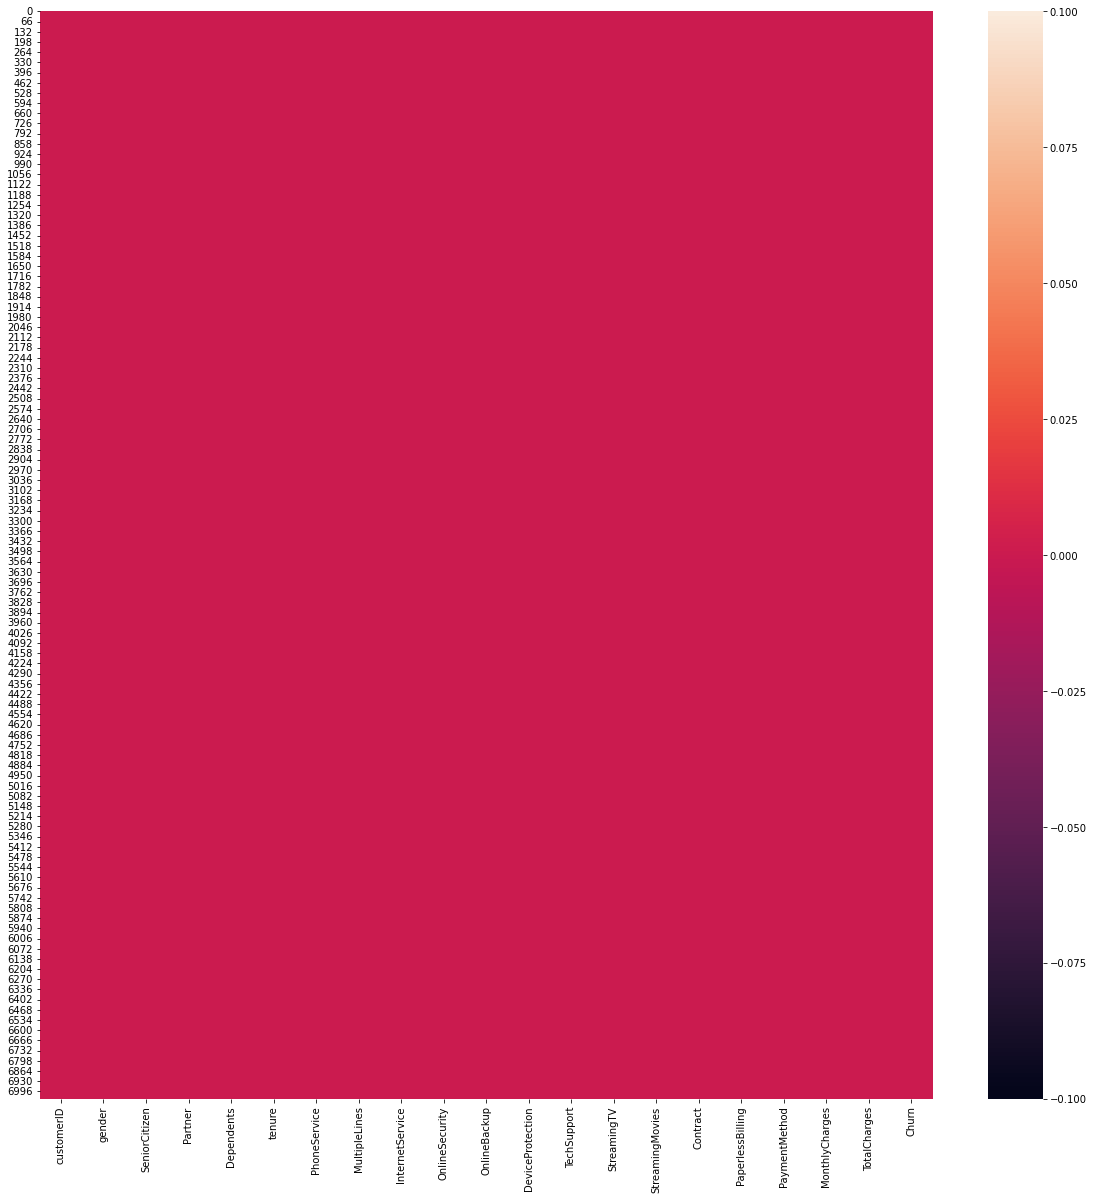

In [275]:
sns.heatmap(Tele.isnull())

Hence, No Null Values in the dataframe

In [276]:
#Lets check the Unique Values in each columns
Tele.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [277]:
Tele.drop(['customerID'],axis=1,inplace=True) # customer Id is unique and doesnot play vital role hence droping it
Tele

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

Univariate Analysis 'Subscribed' variable

In [278]:
#Frequency of 'TotalCharges'
Tele['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

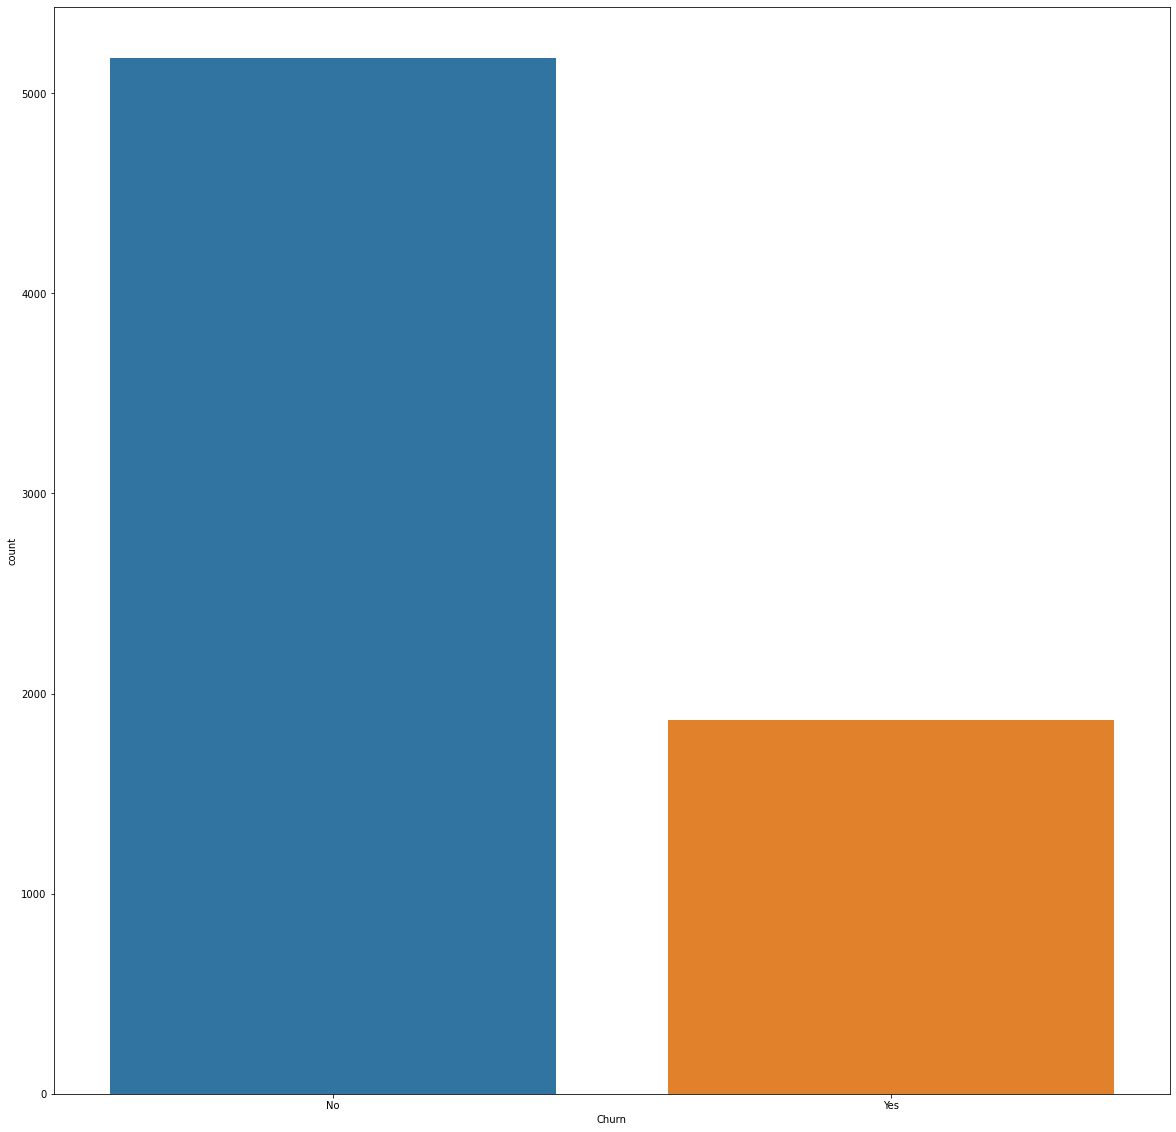

In [279]:
# Plotting the 'TotalCharges' frequency
sns.countplot(data=Tele,x='Churn')

In [280]:
#Normalizing the frequency table of 'TotalCharges' variable
Tele['Churn'].value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [281]:
#Frequency table
Tele['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# EDA

Encoding Technique

In [282]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in Tele.columns:
    if Tele[i].dtypes=='object':
        Tele[i]=enc.fit_transform(Tele[i].values.reshape(-1,1))
Tele

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
...      ...            ...      ...         ...     ...           ...   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7040     0.0              0      1.0         1.0      11           0.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0               1.0              0.0             0.0           2.0   
1               0.0              0.0             2.0           0.0   
2               0.0              0.0             2.0           2.0   
3               1.0              0.0             2.0           0.0   
4               0.0              1.0             0.0           0.0   
...             ...              ...             ...           ...   
7038            2.0              0.0             2.0           0.0   
7039            2.0              1.0             0.0           2.0   
7040            1.0              0.0             2.0           0.0   
7041            2.0              1.0             0.0           0.0   
7042            0.0              1.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                  0.0          0.0          0.0              0.0       0.0   
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
3                  2.0          2.0          0.0              0.0       1.0   
4                  0.0          0.0          0.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7040               0.0          0.0          0.0              0.0       0.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                  1.0            2.0           29.85         29.85    0.0  
1                  0.0            3.0           56.95       1889.50    0.0  
2                  1.0            3.0           53.85        108.15    1.0  
3                  0.0            0.0           42.30       1840.75    0.0  
4                  1.0            2.0           70.70        151.65    1.0  
...                ...            ...             ...           ...    ...  
7038               1.0            3.0           84.80       1990.50    0.0  
7039               1.0            1.0          103.20       7362.90    0.0  
7040               1.0            2.0           29.60        346.45    0.0  
7041               1.0            3.0           74.40        306.60    1.0  
7042               1.0            0.0          105.65       6844.50    0.0  

[7043 rows x 20 columns]

Visualization using Count and Bar Plot for Input and output Variables

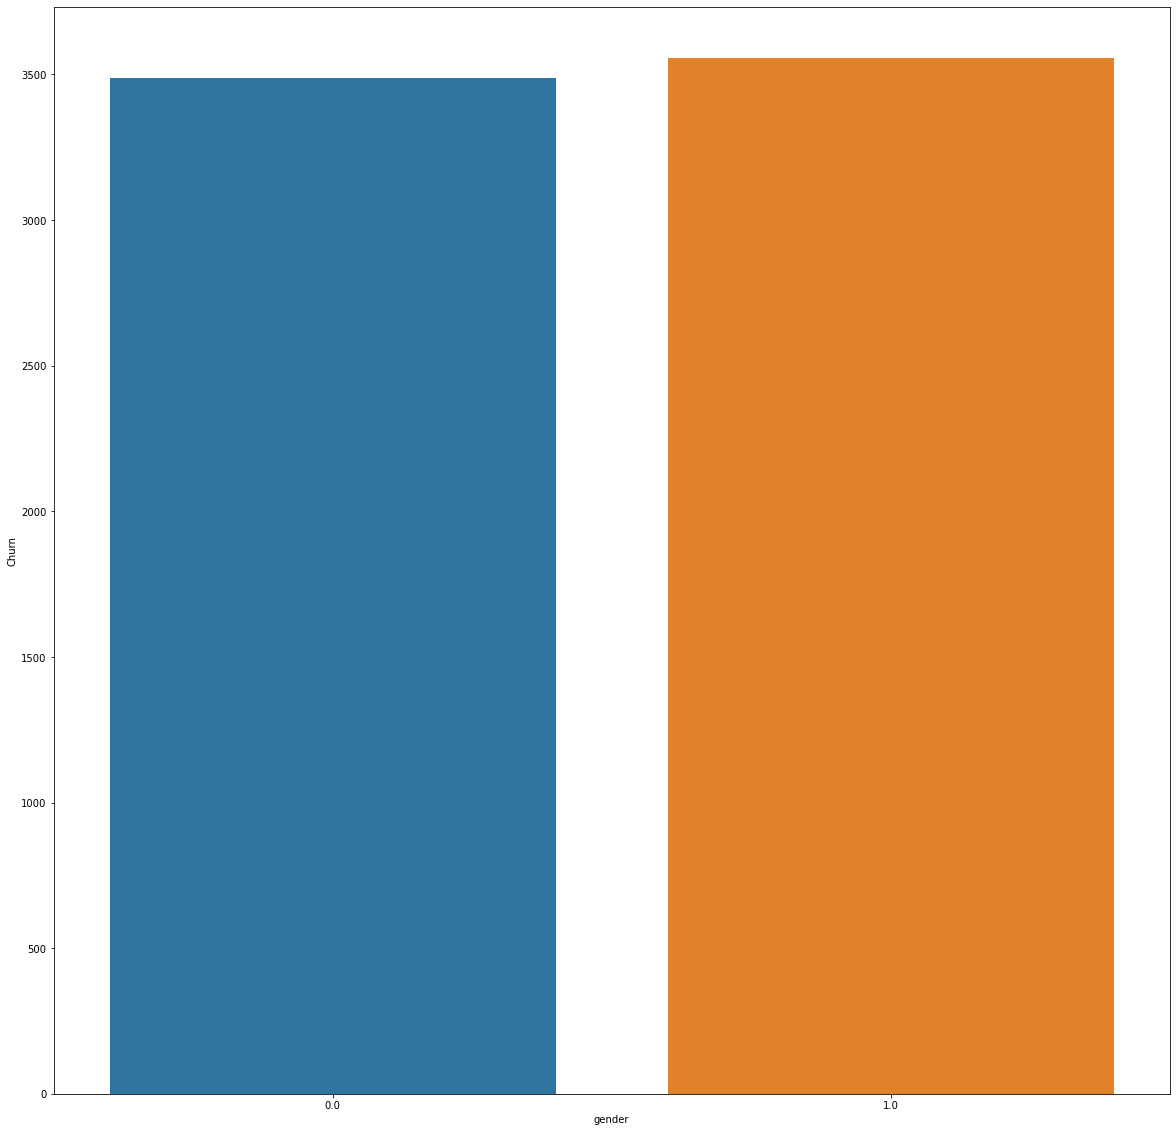

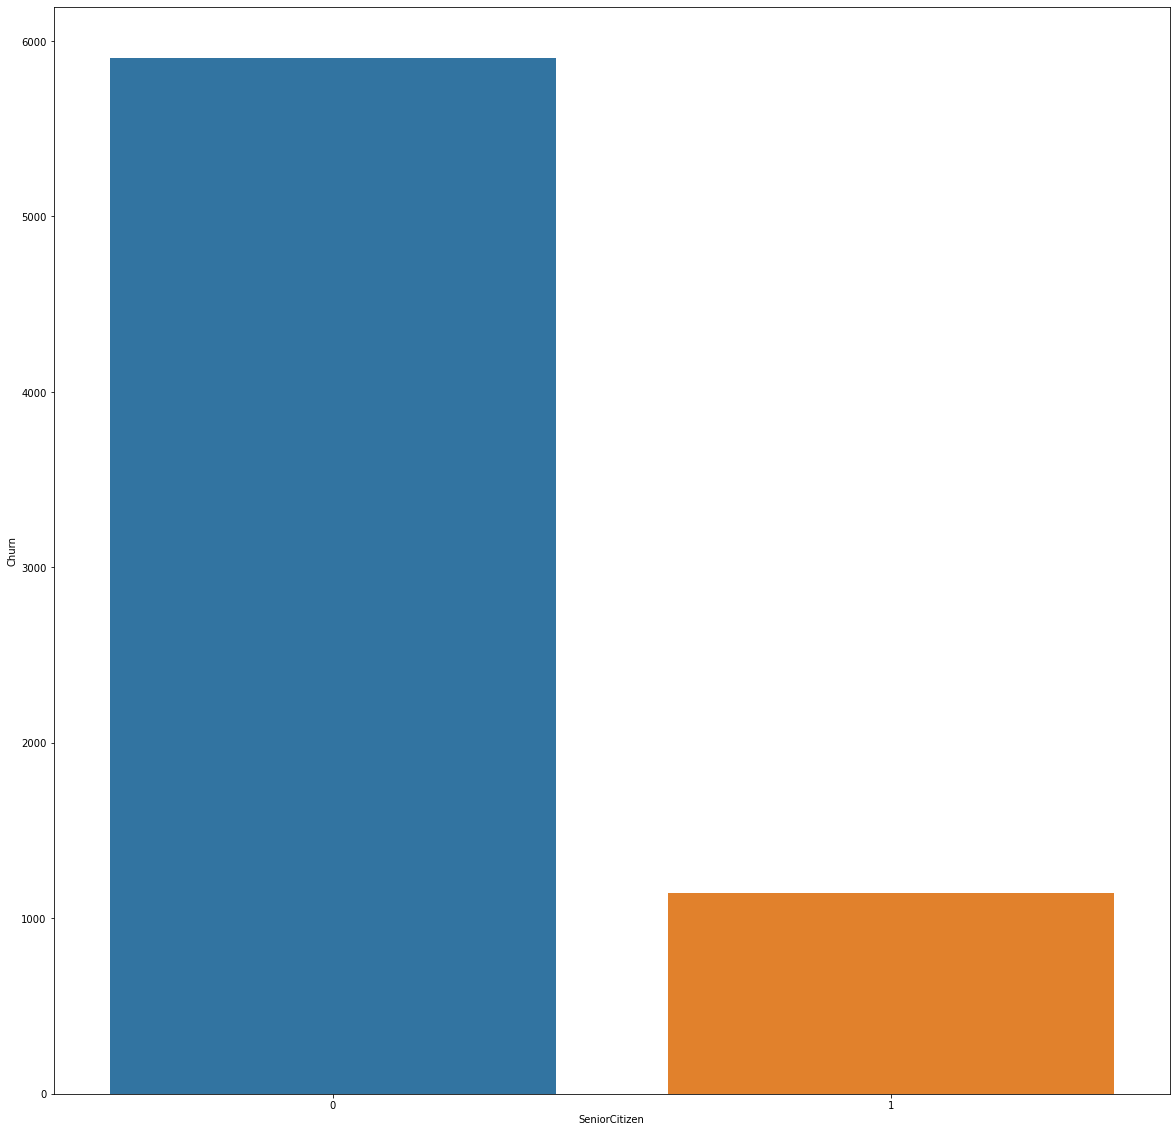

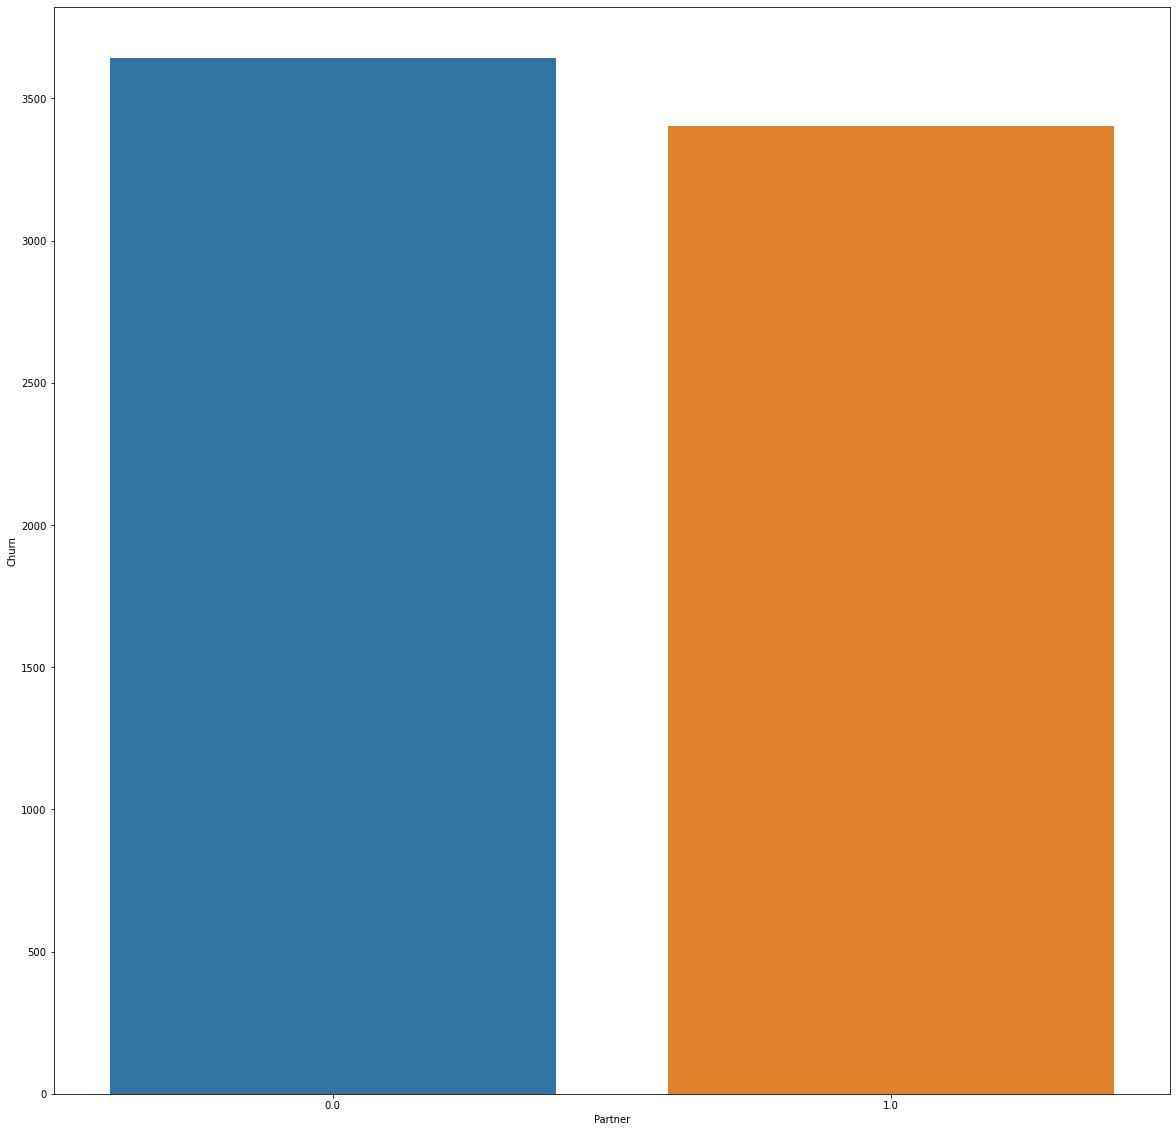

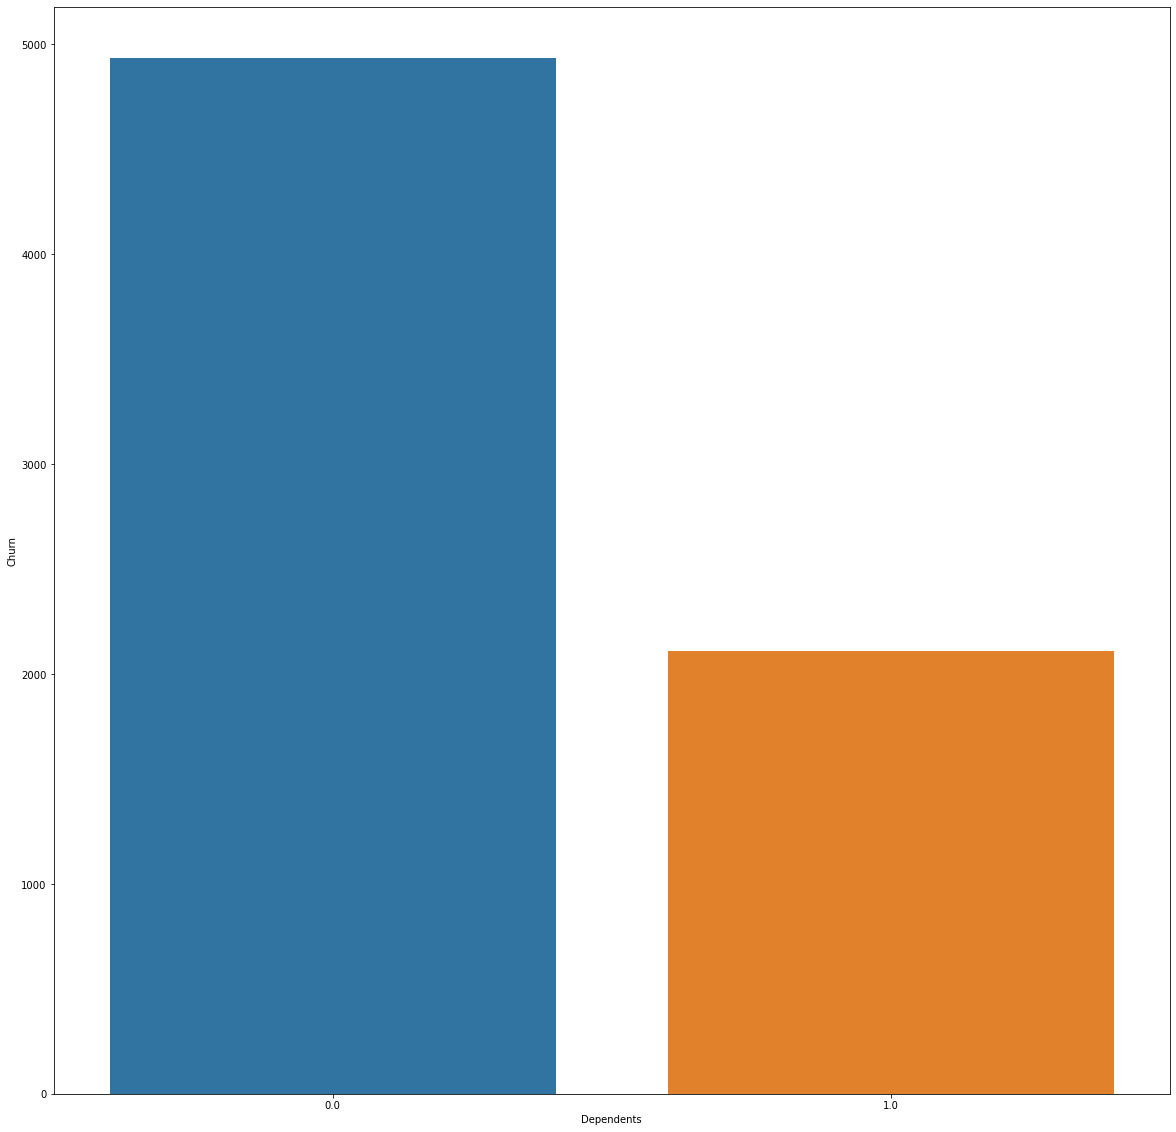

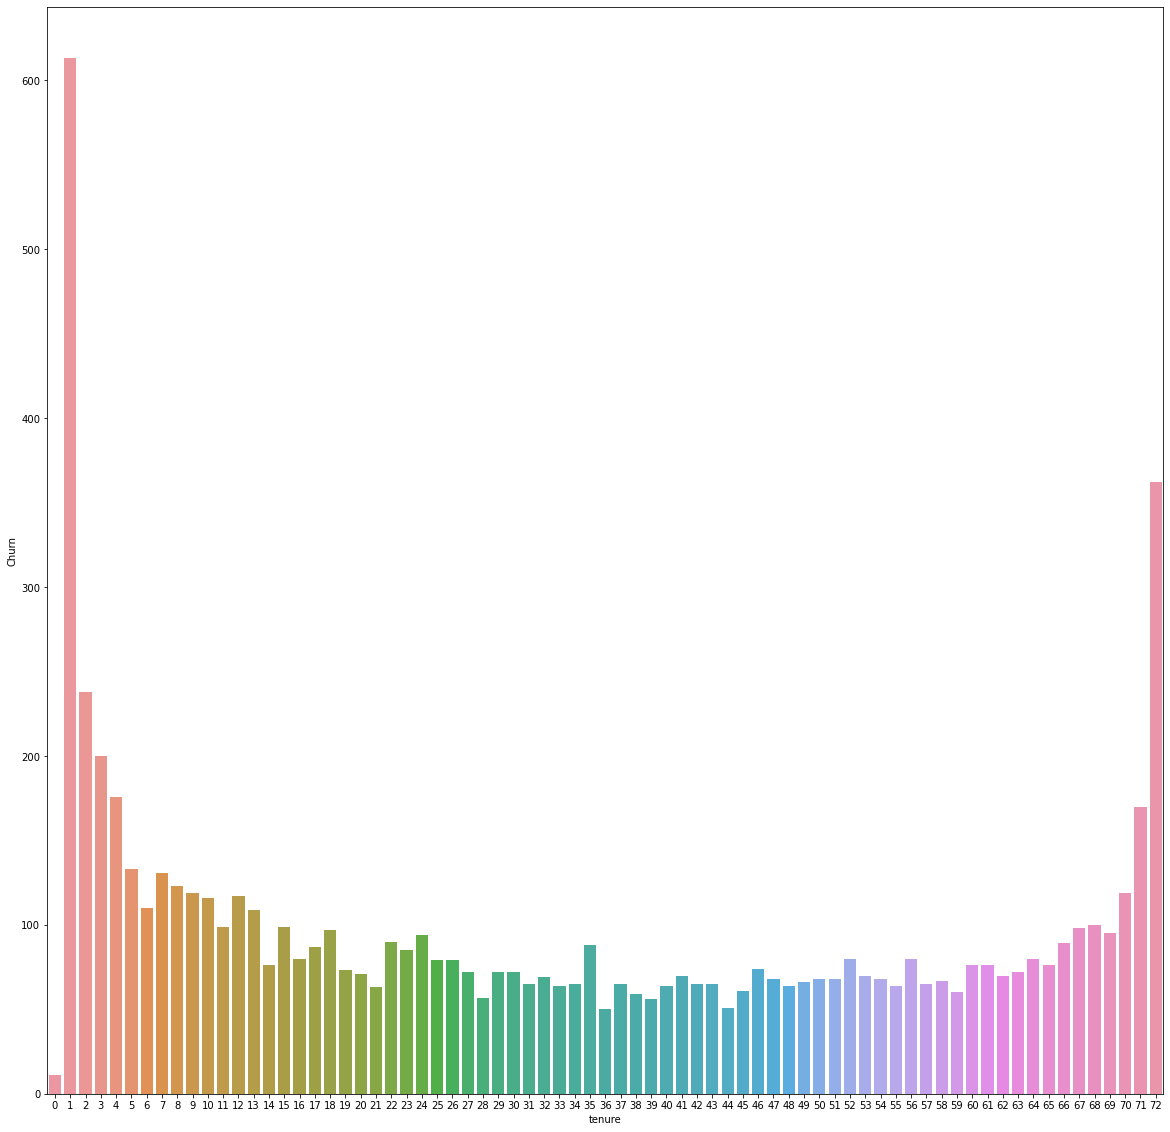

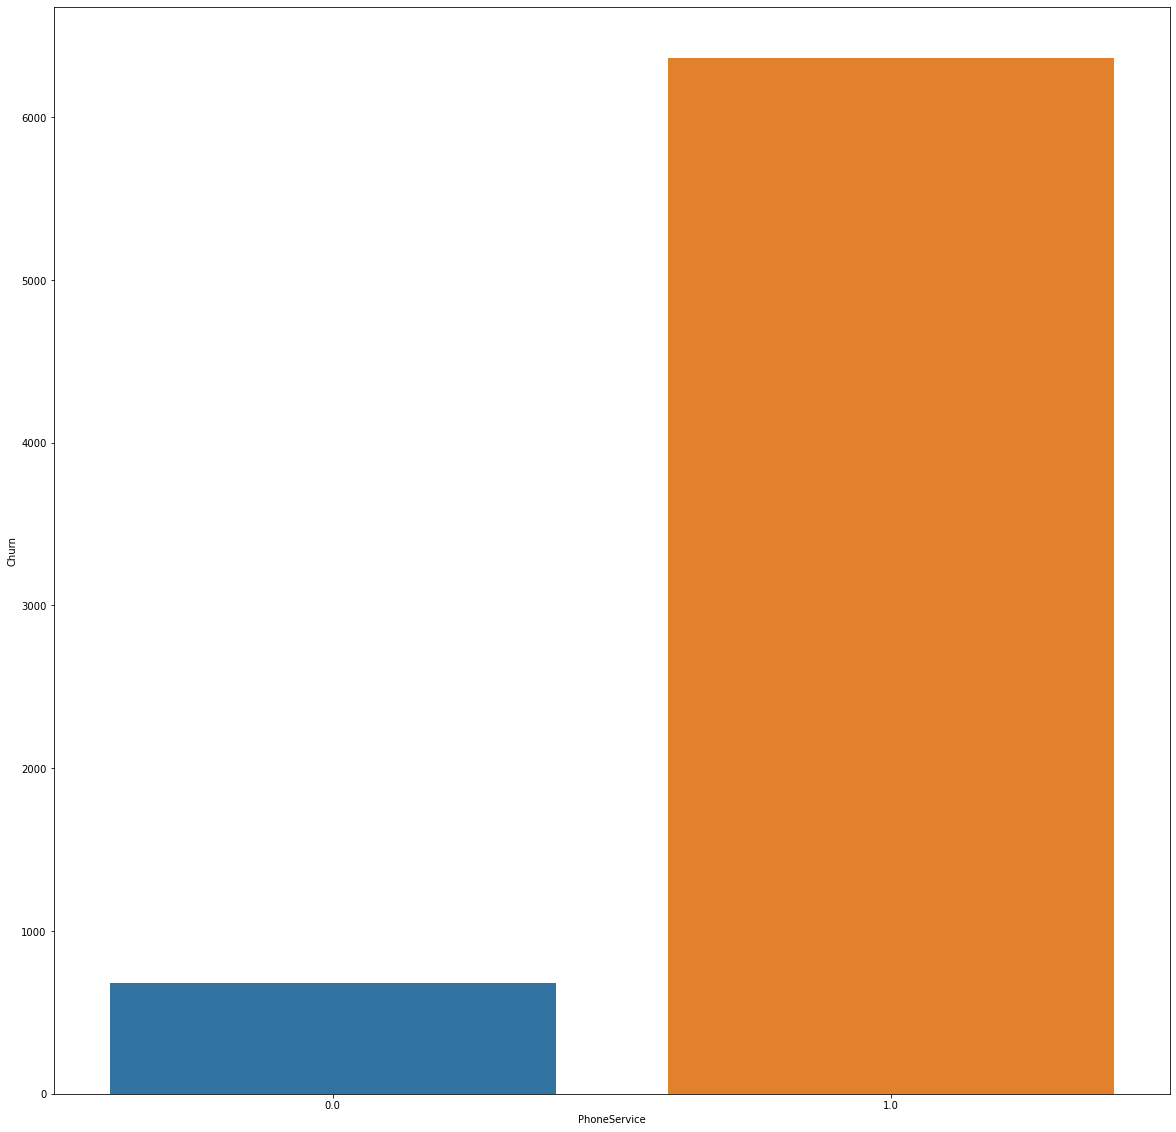

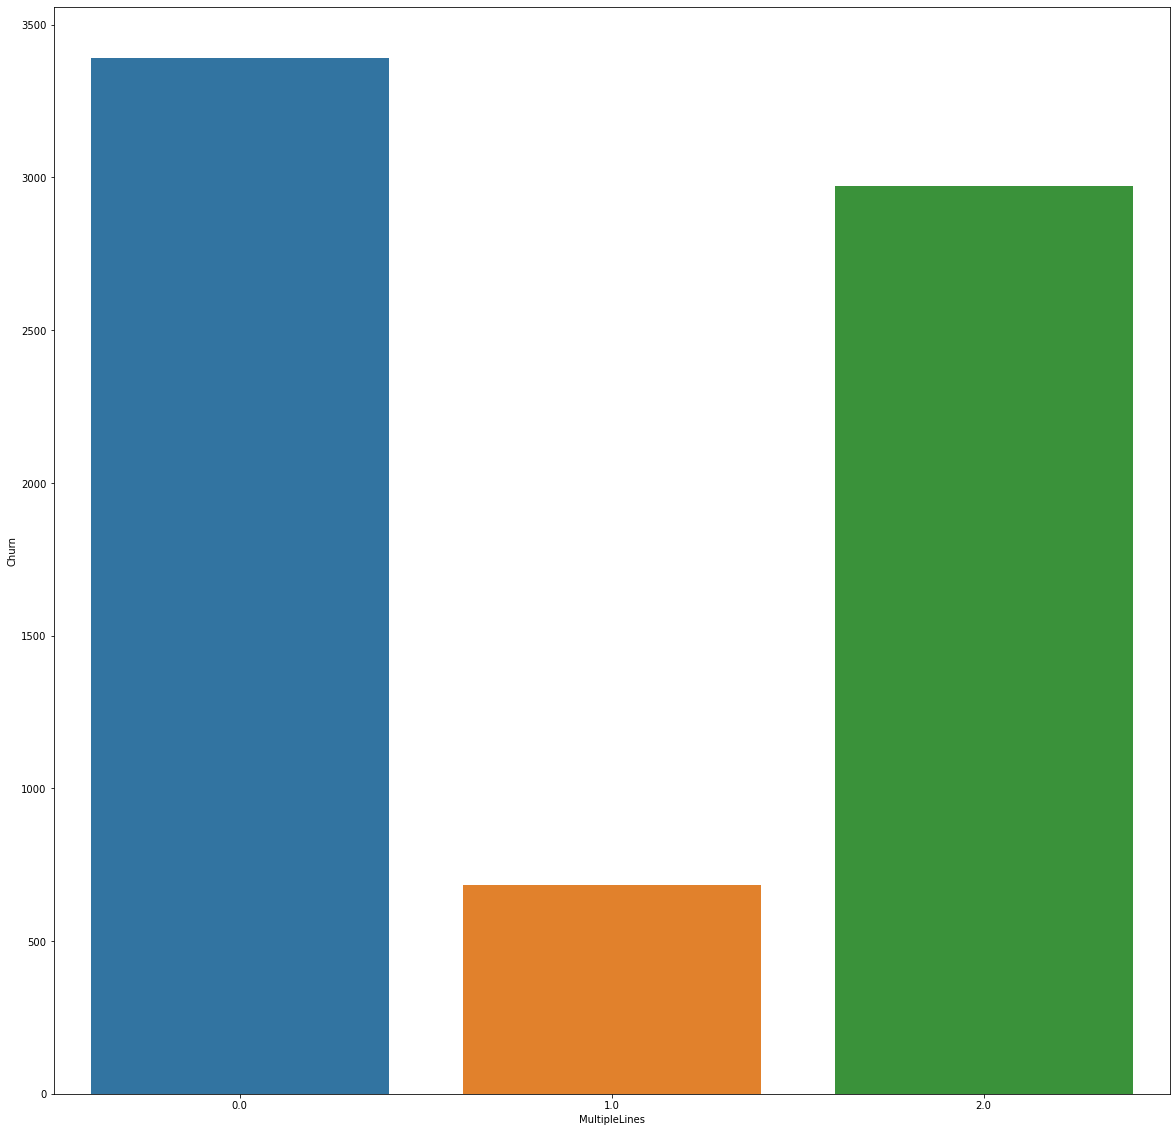

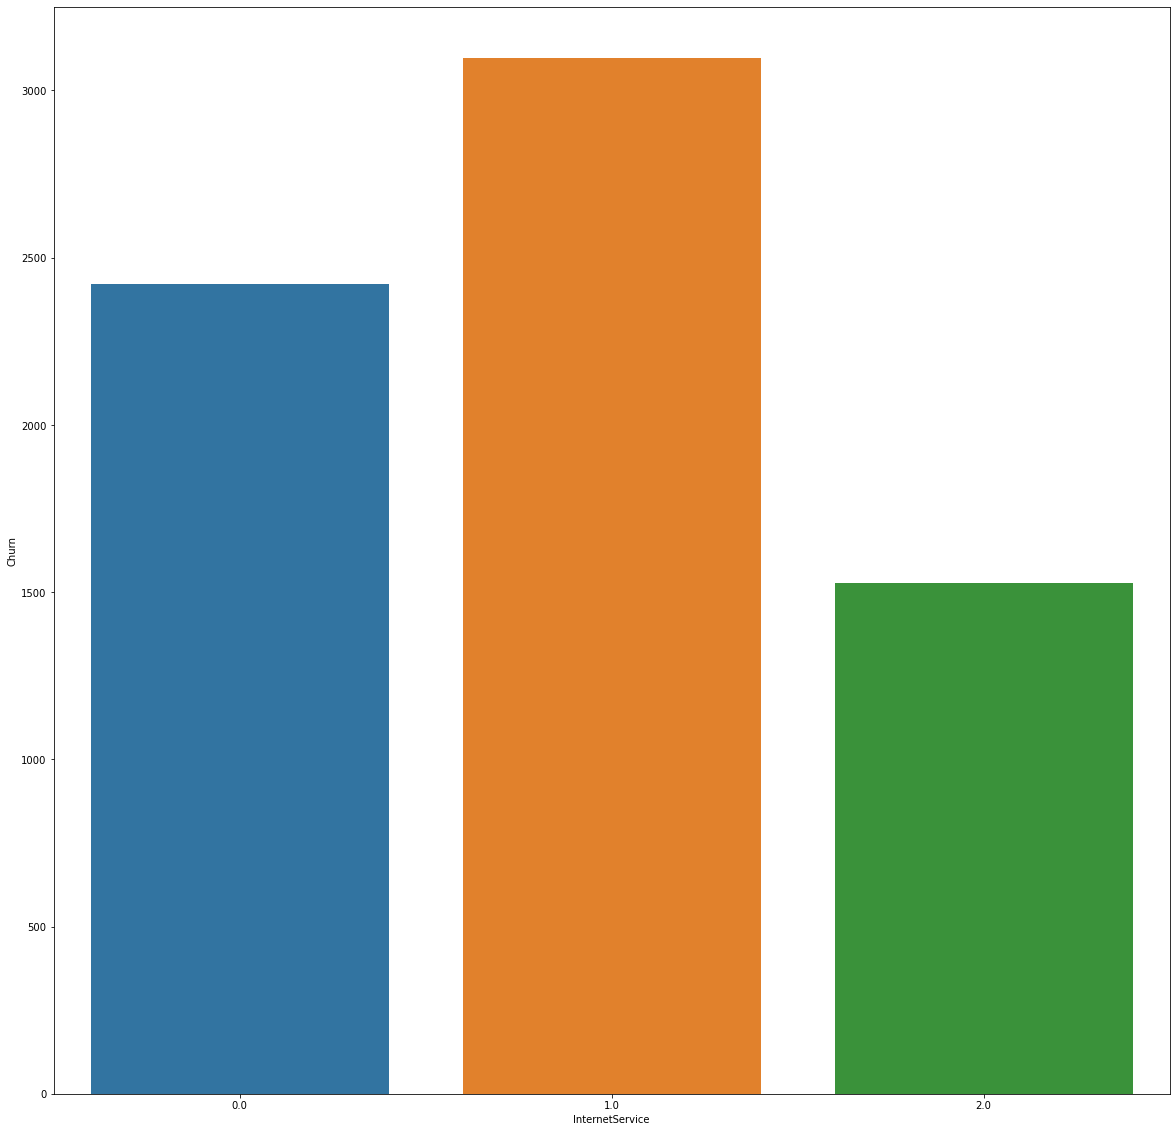

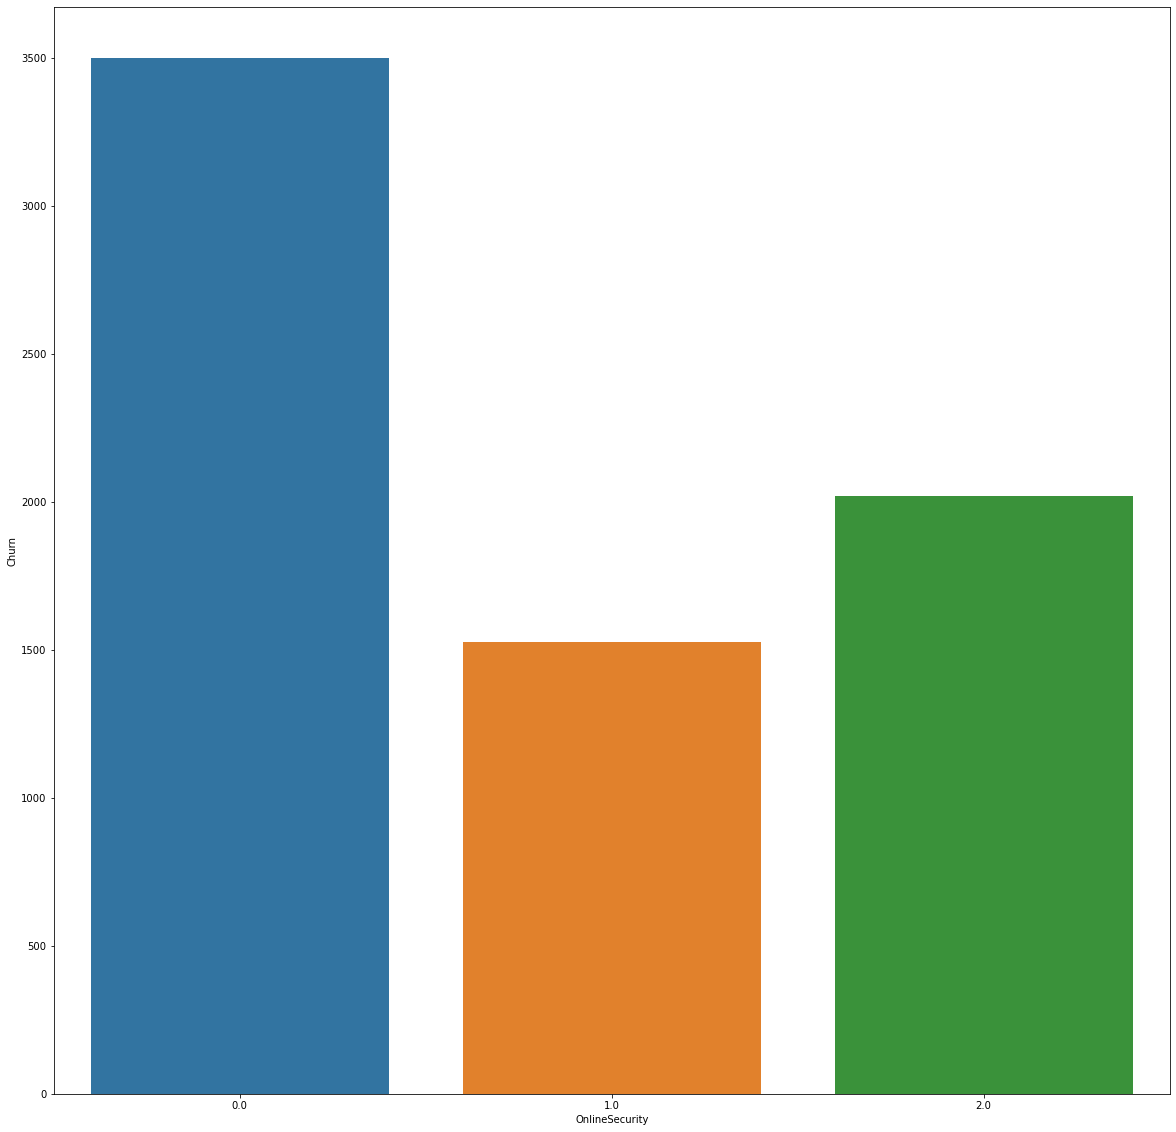

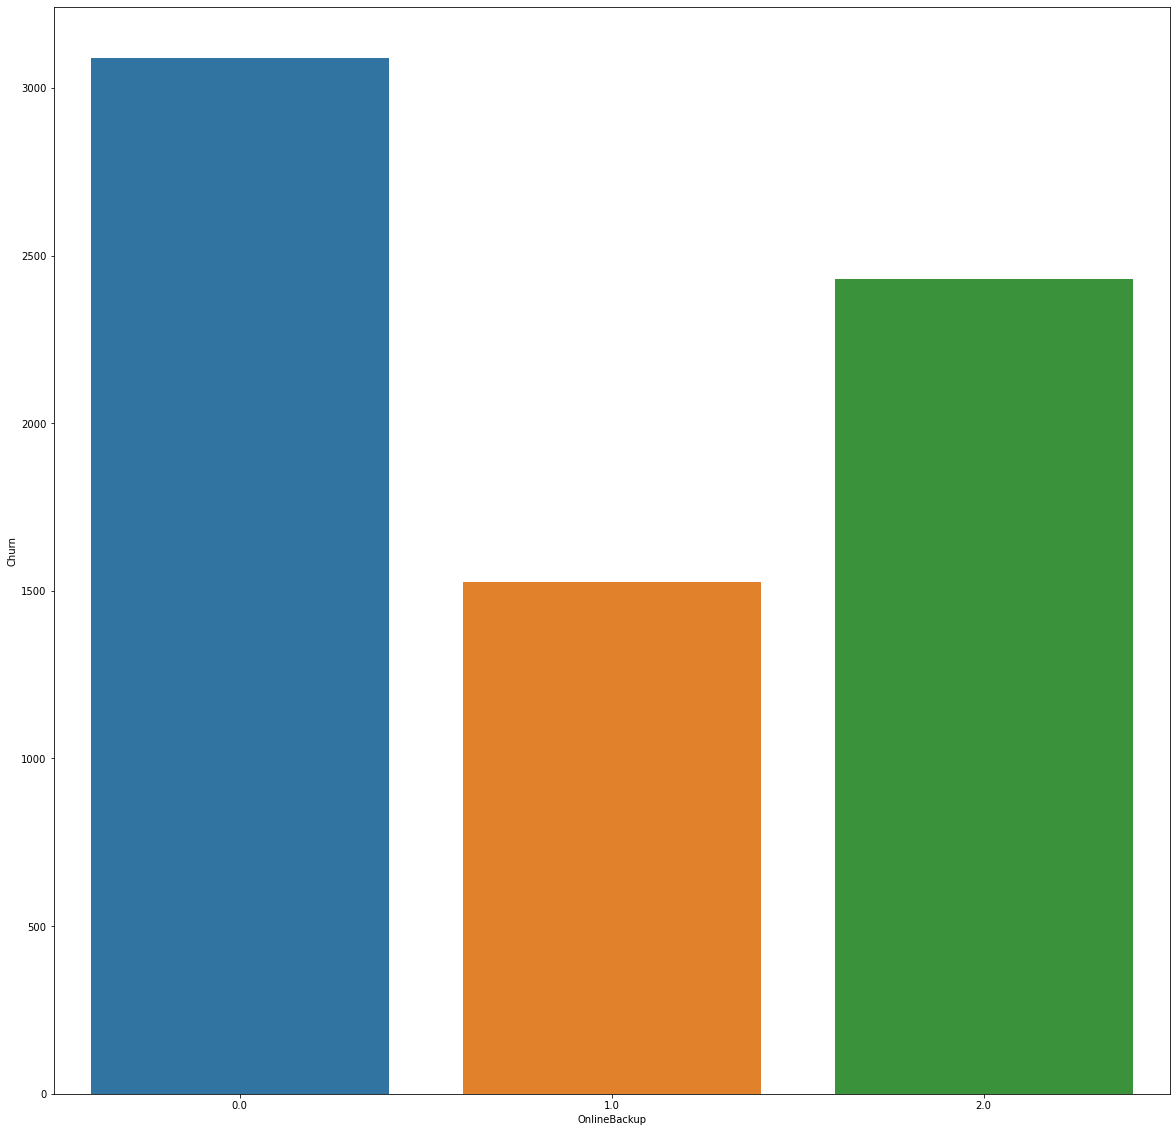

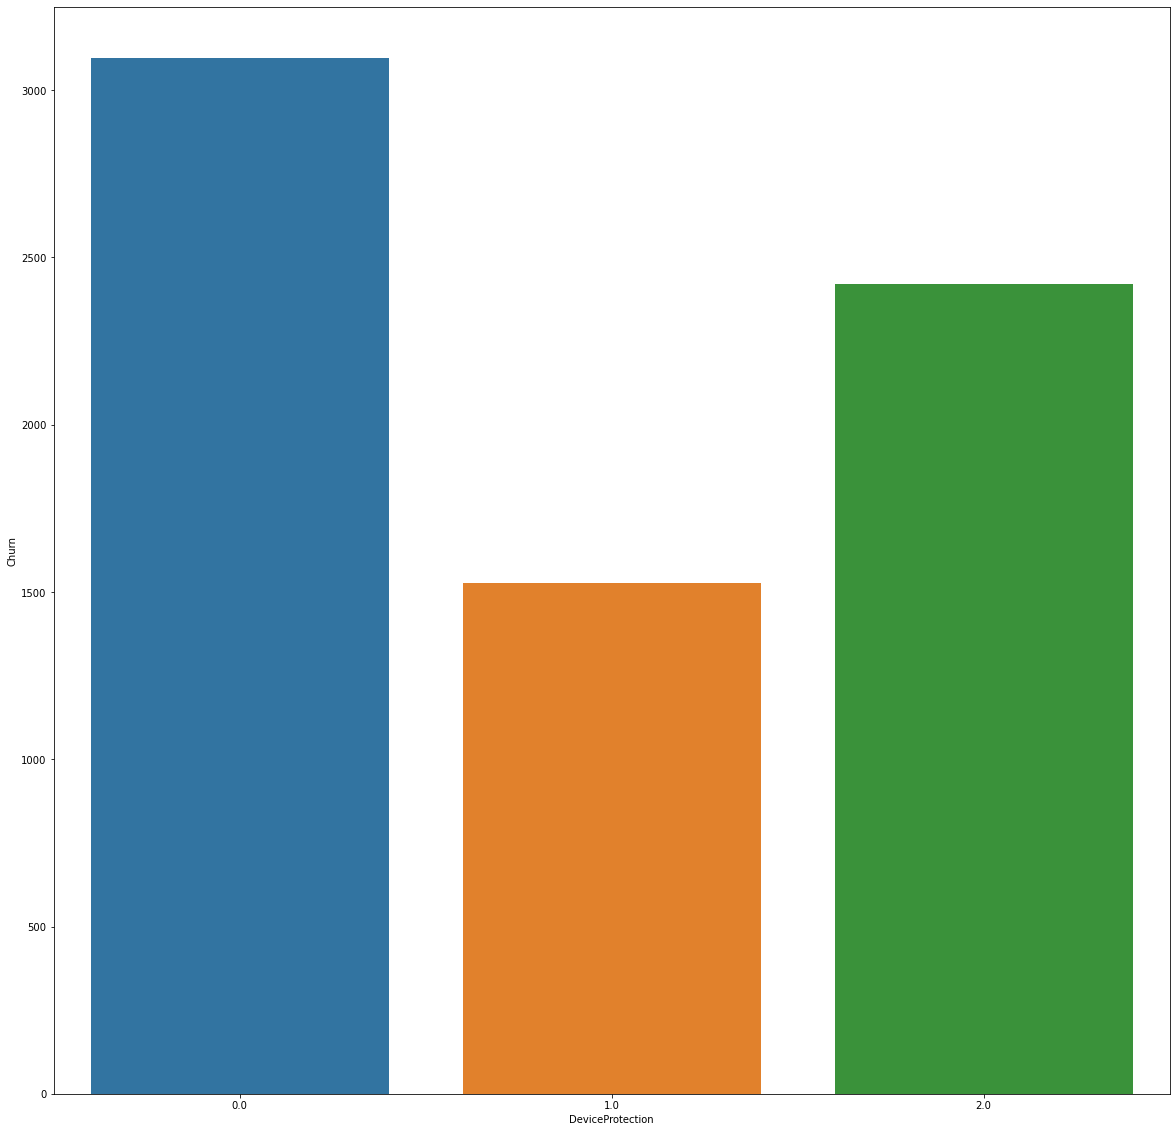

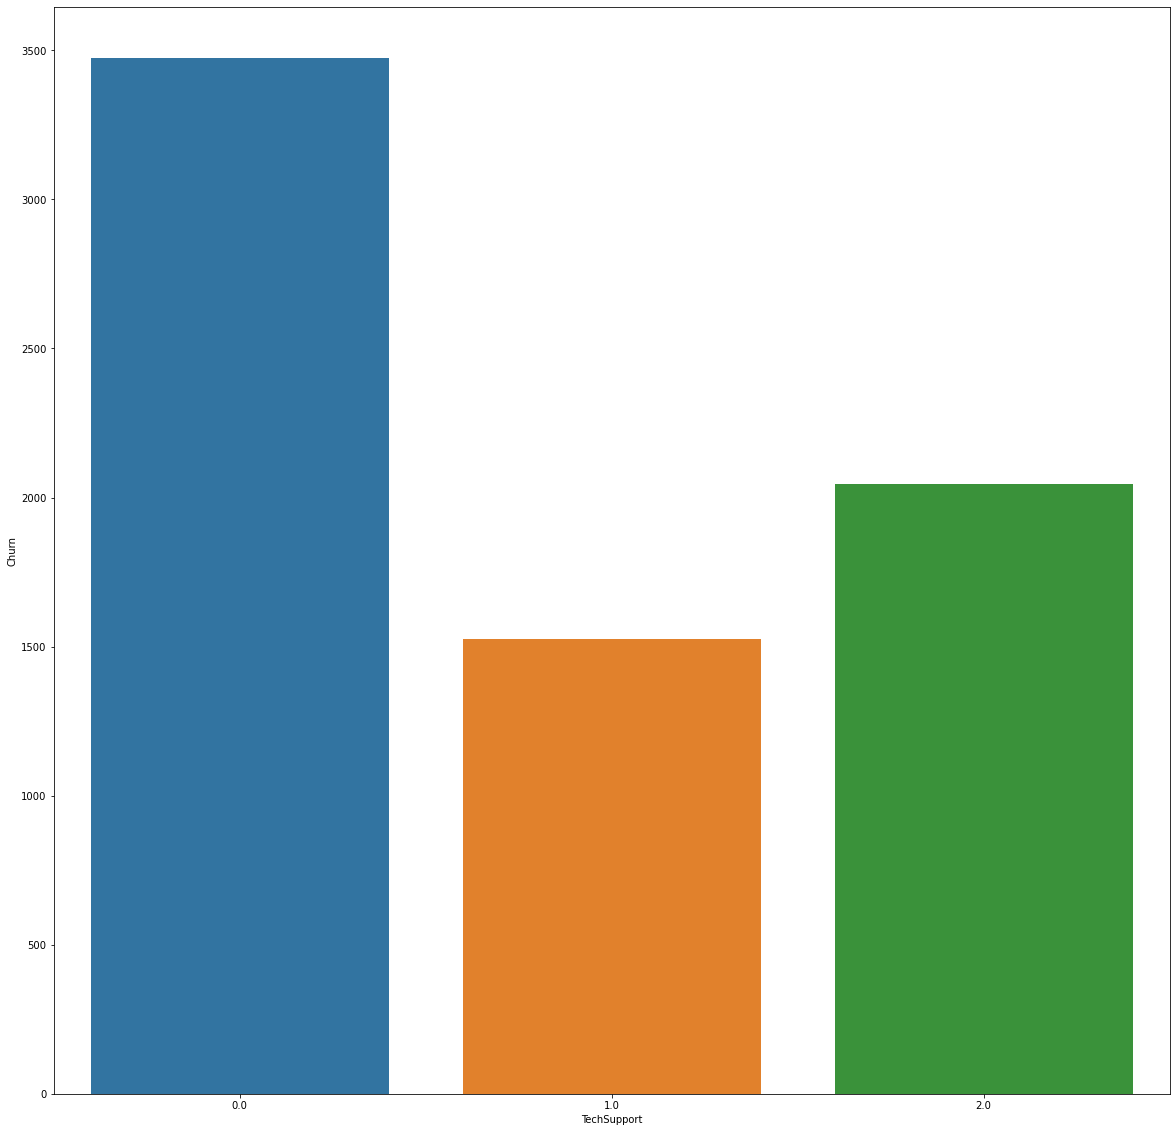

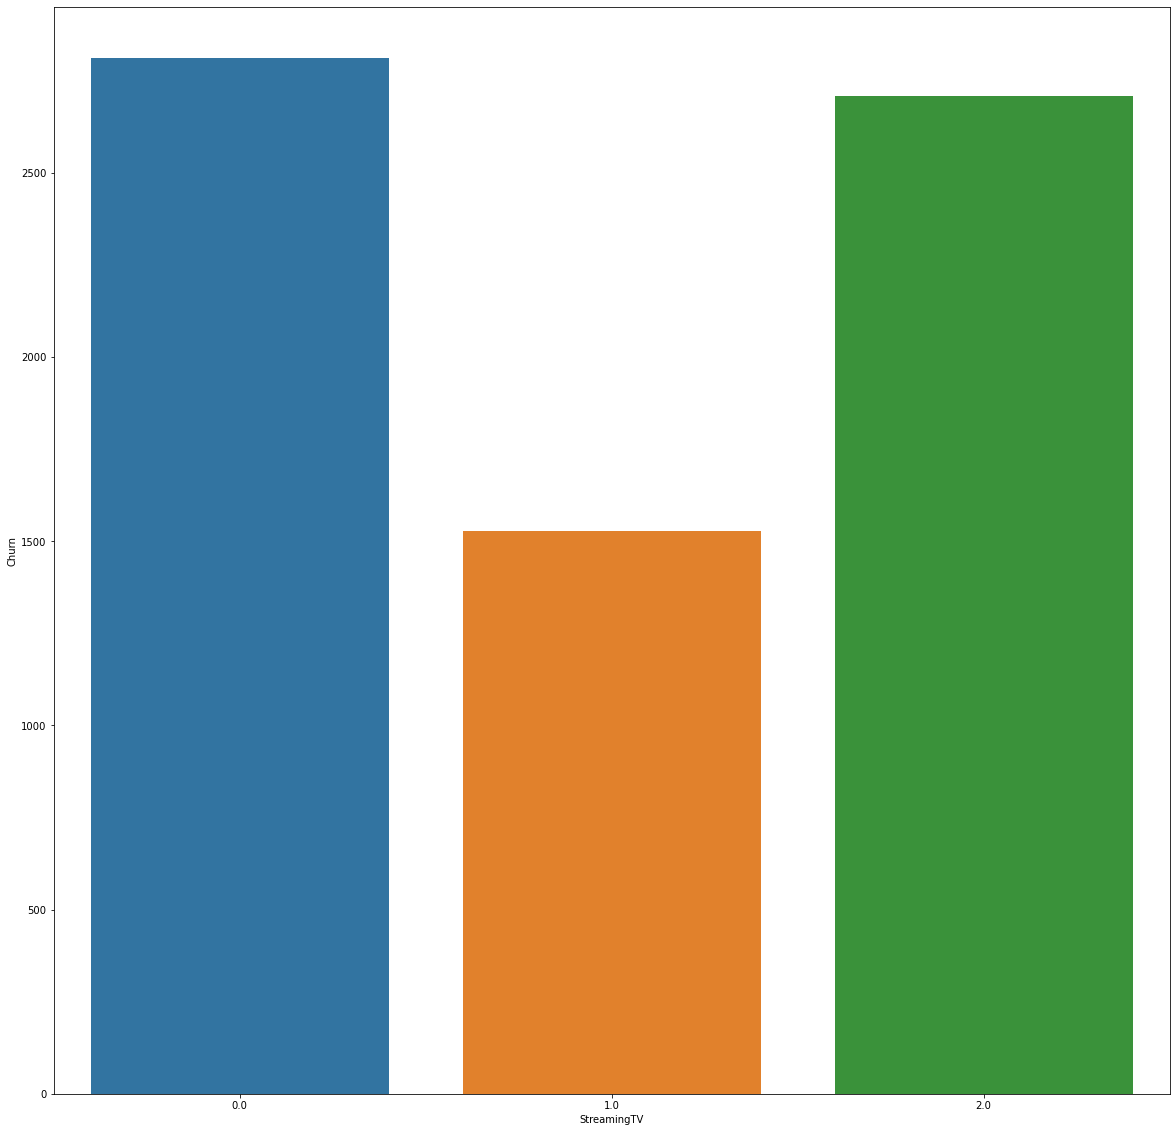

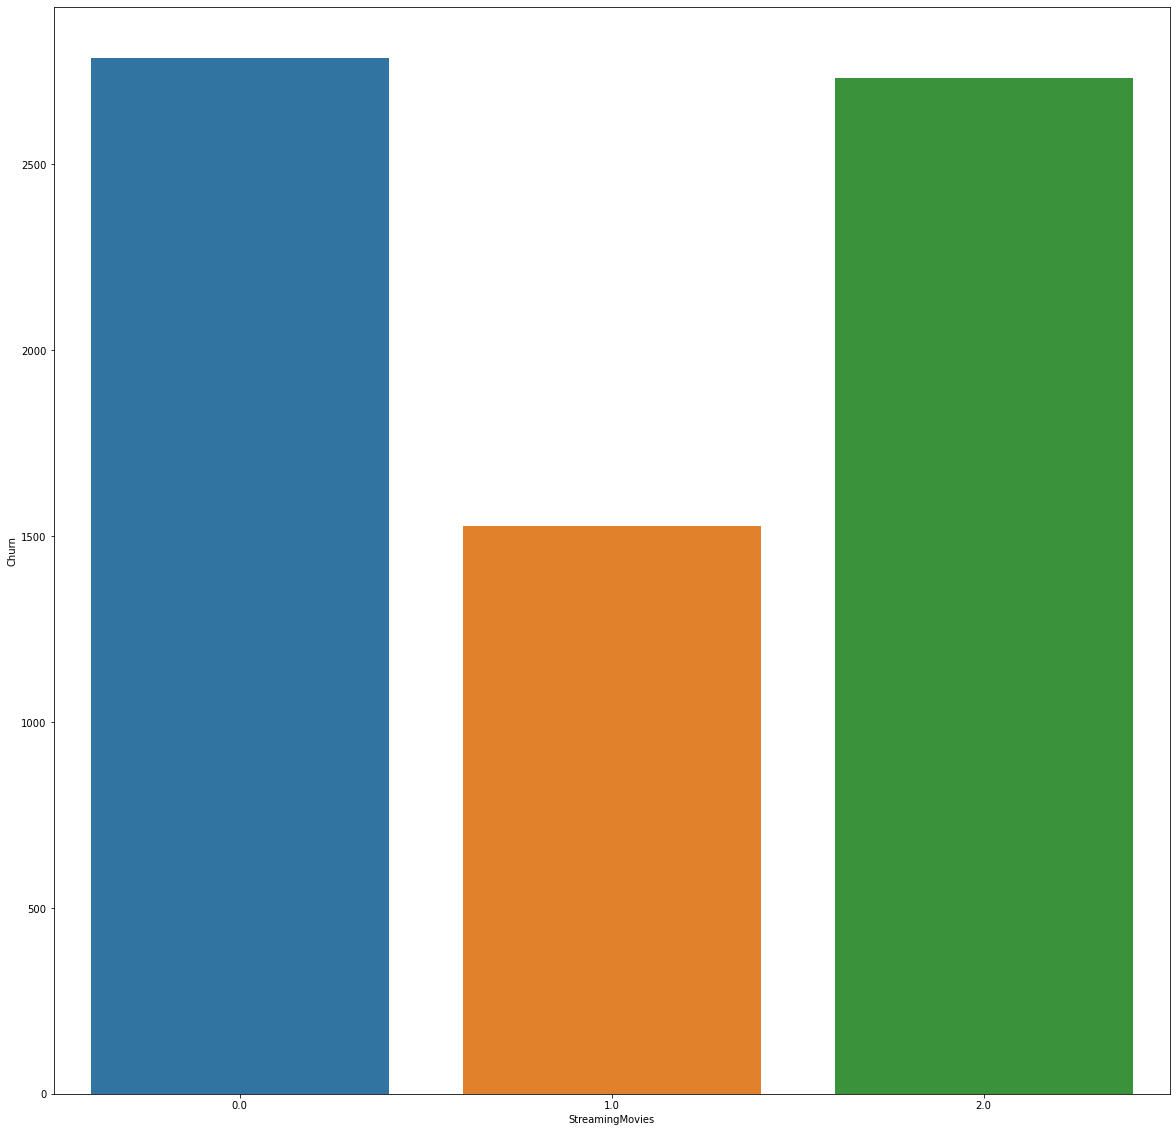

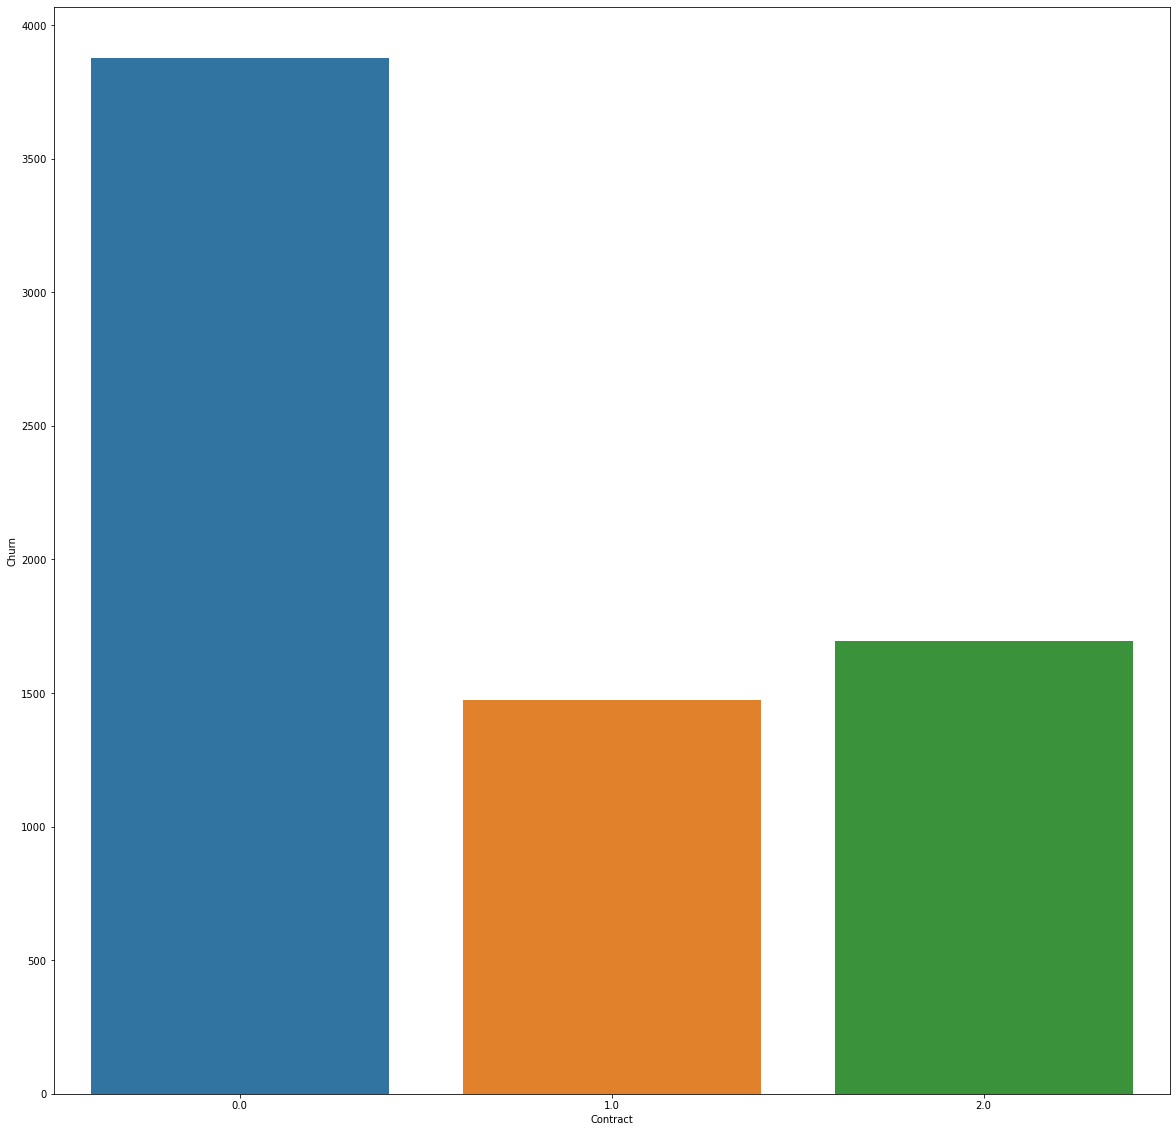

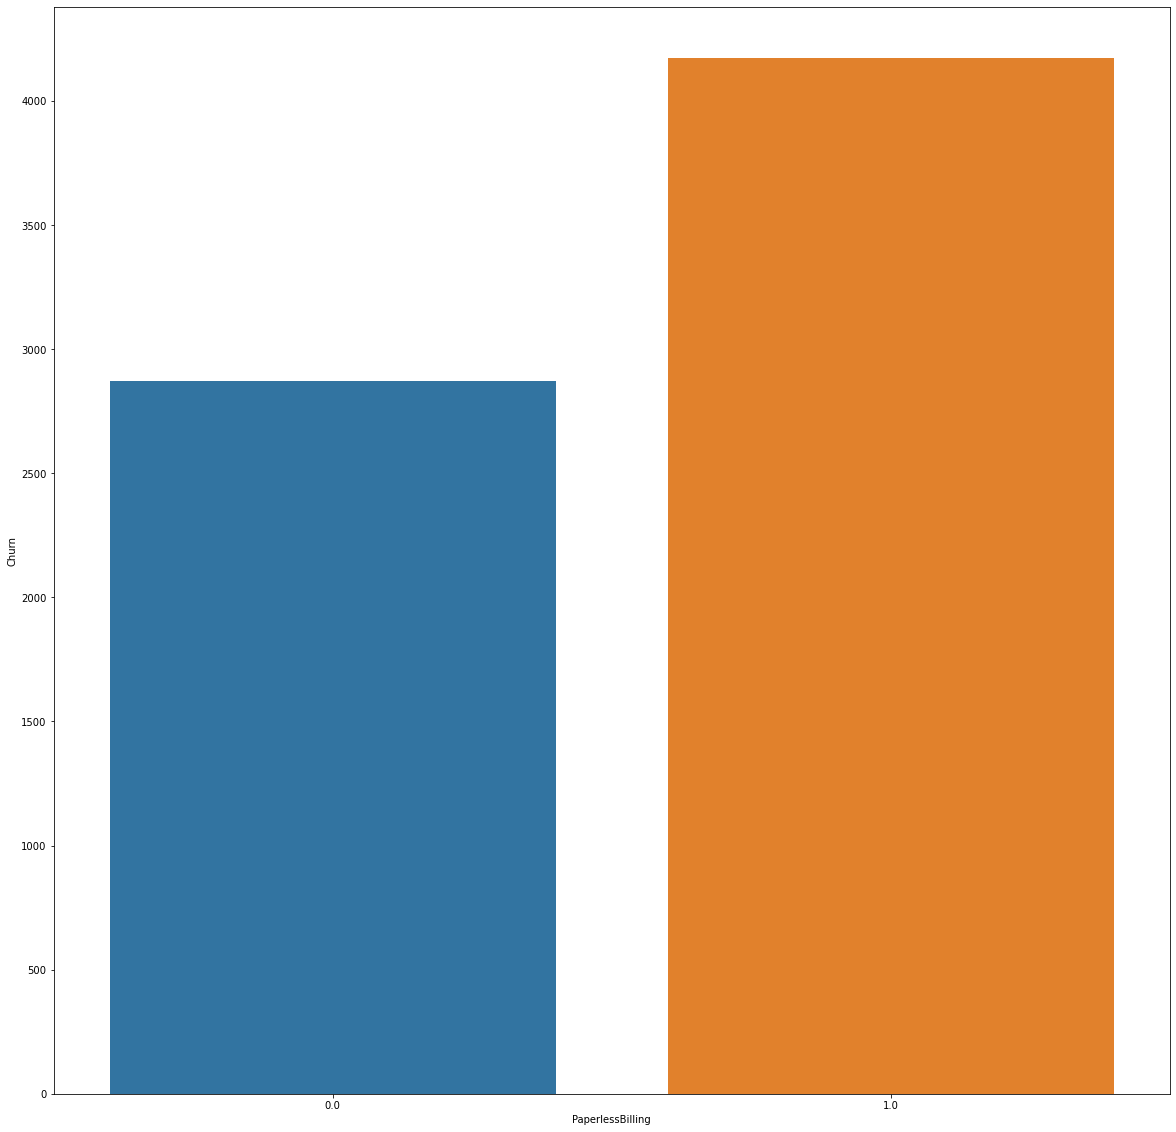

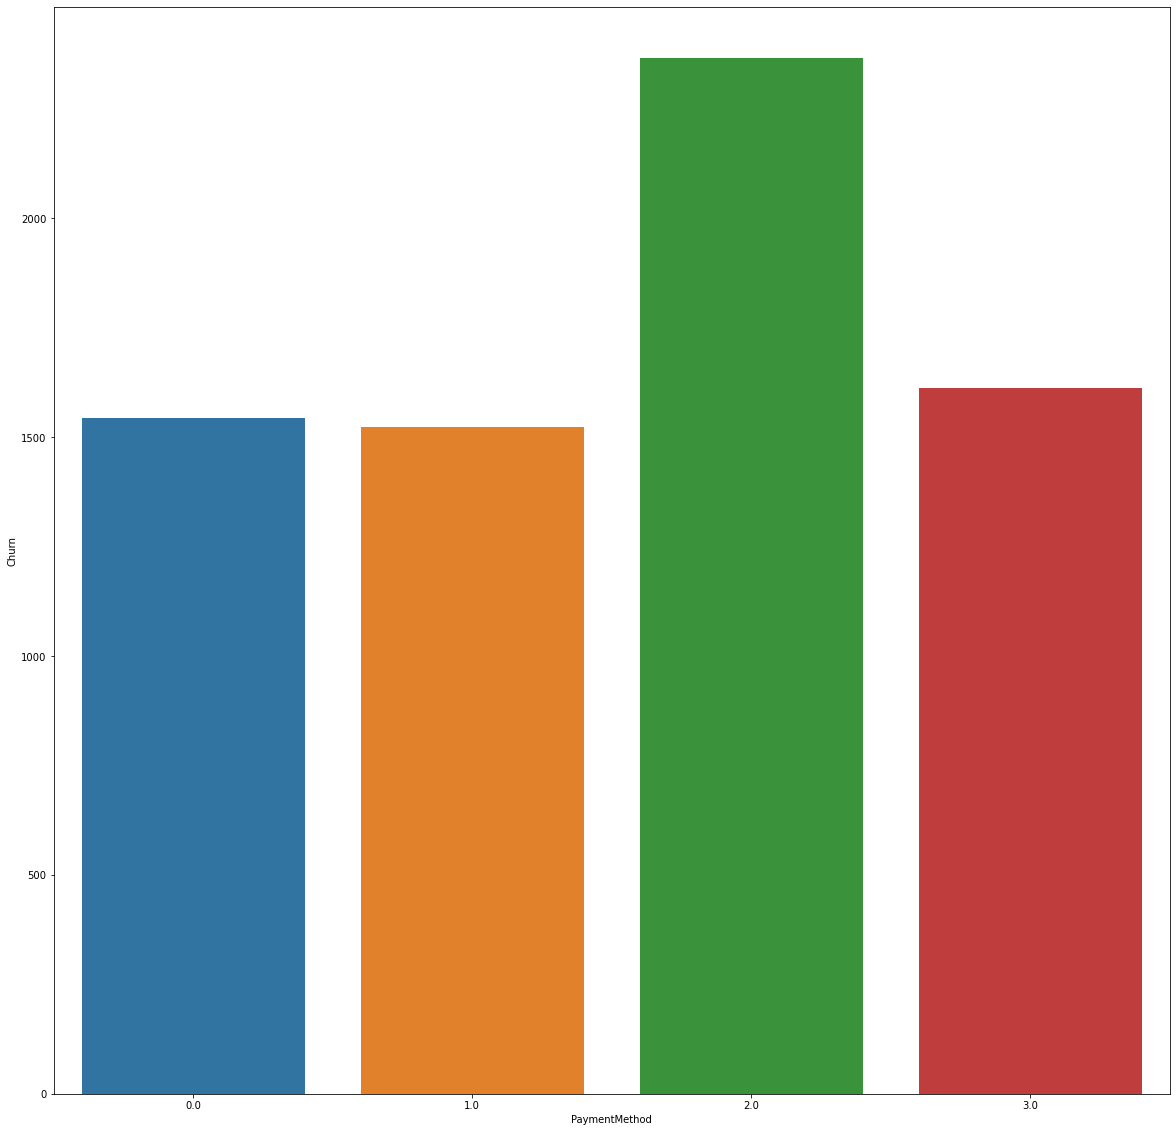

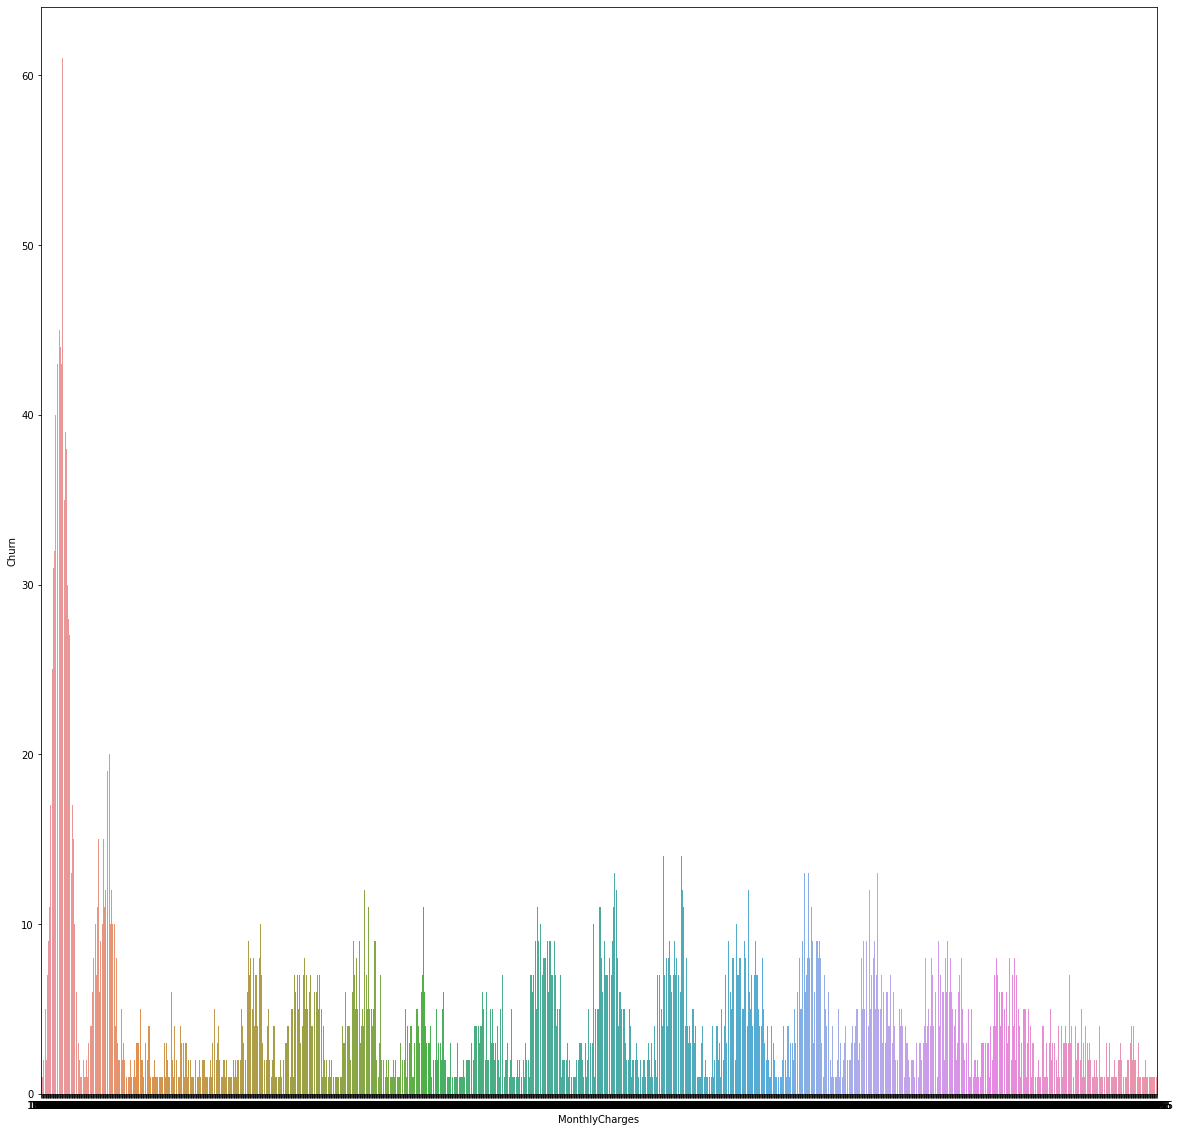

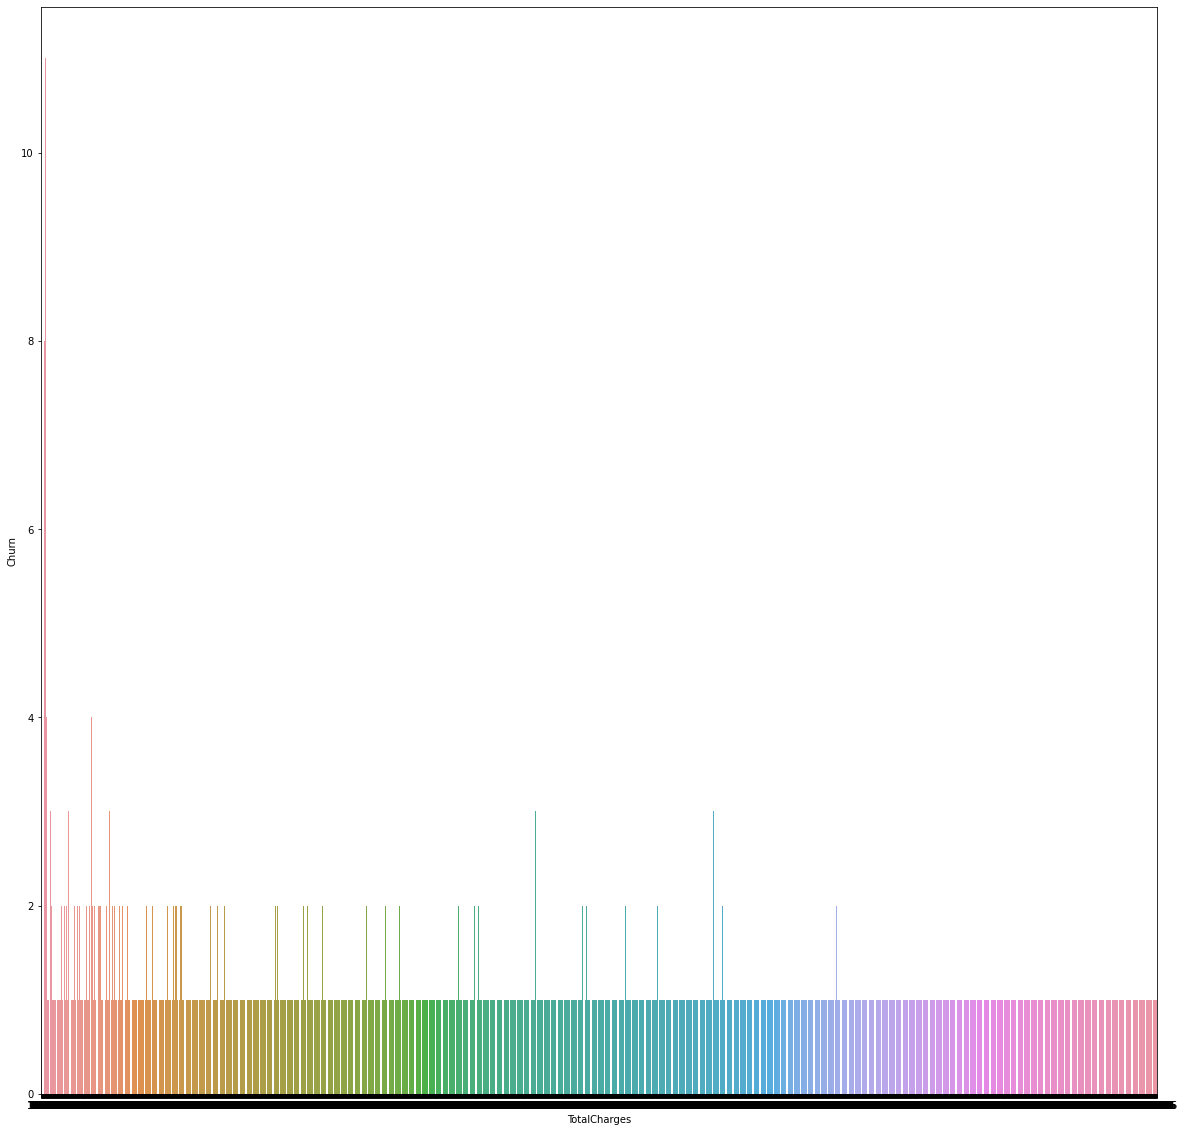

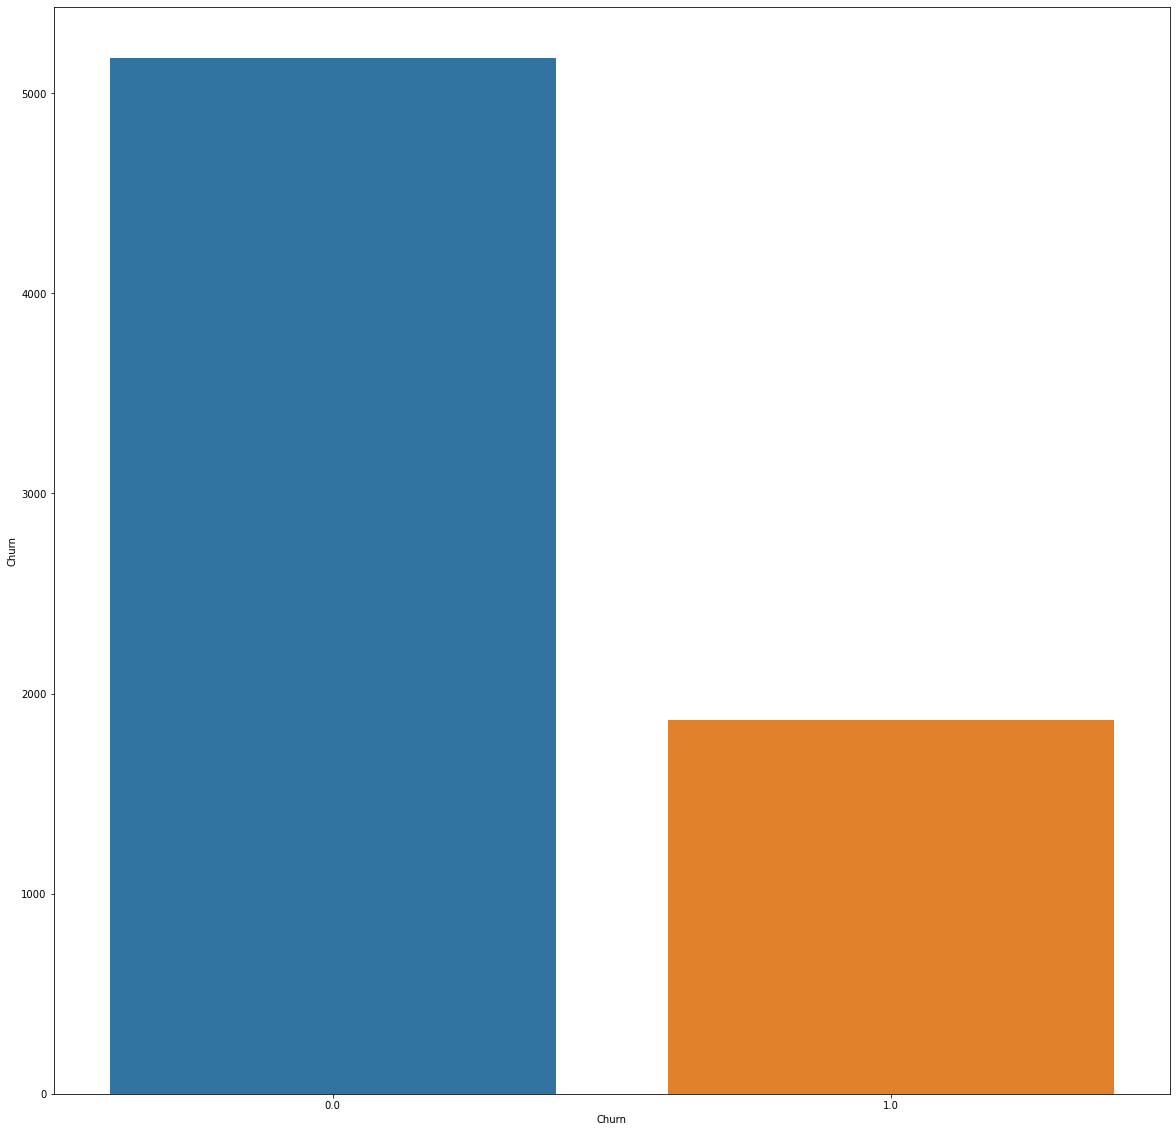

In [283]:
for column in Tele.columns:
    sns.countplot(x=column, data=Tele)
    plt.xlabel(column)
    plt.ylabel('Churn')
    plt.show()

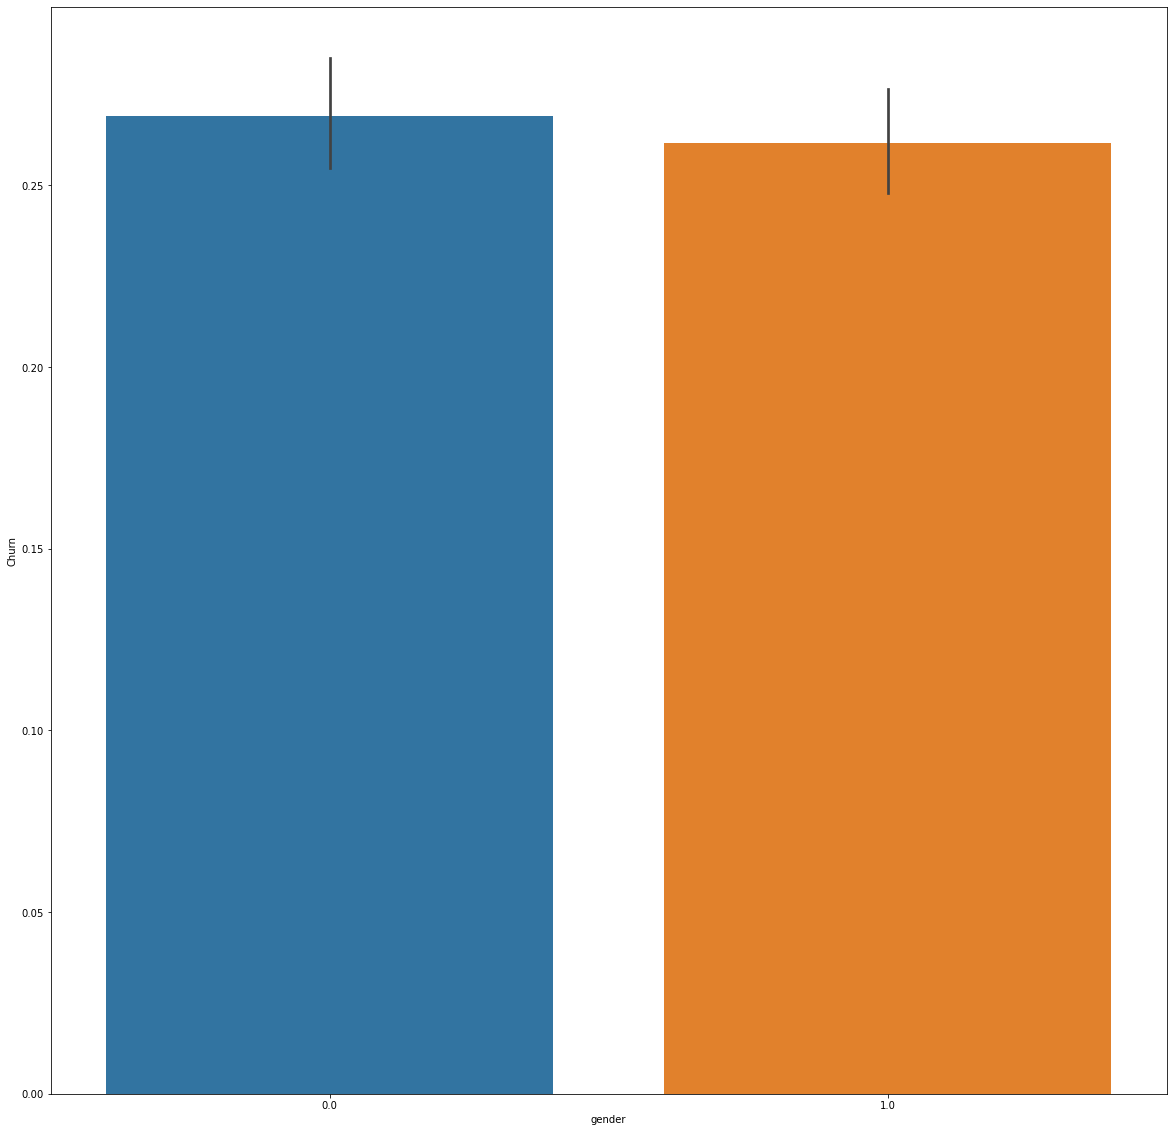

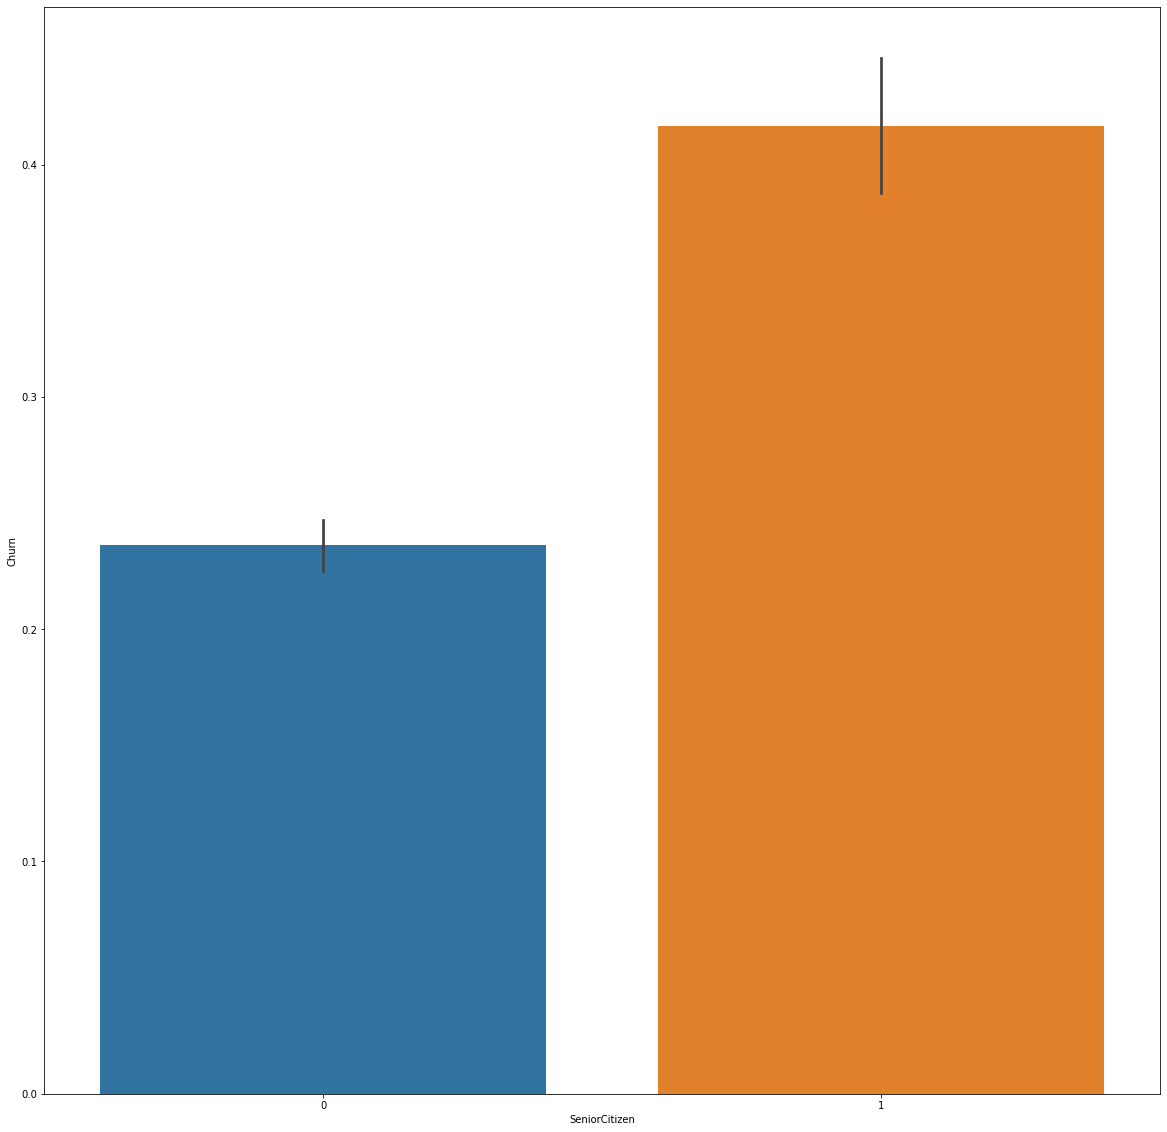

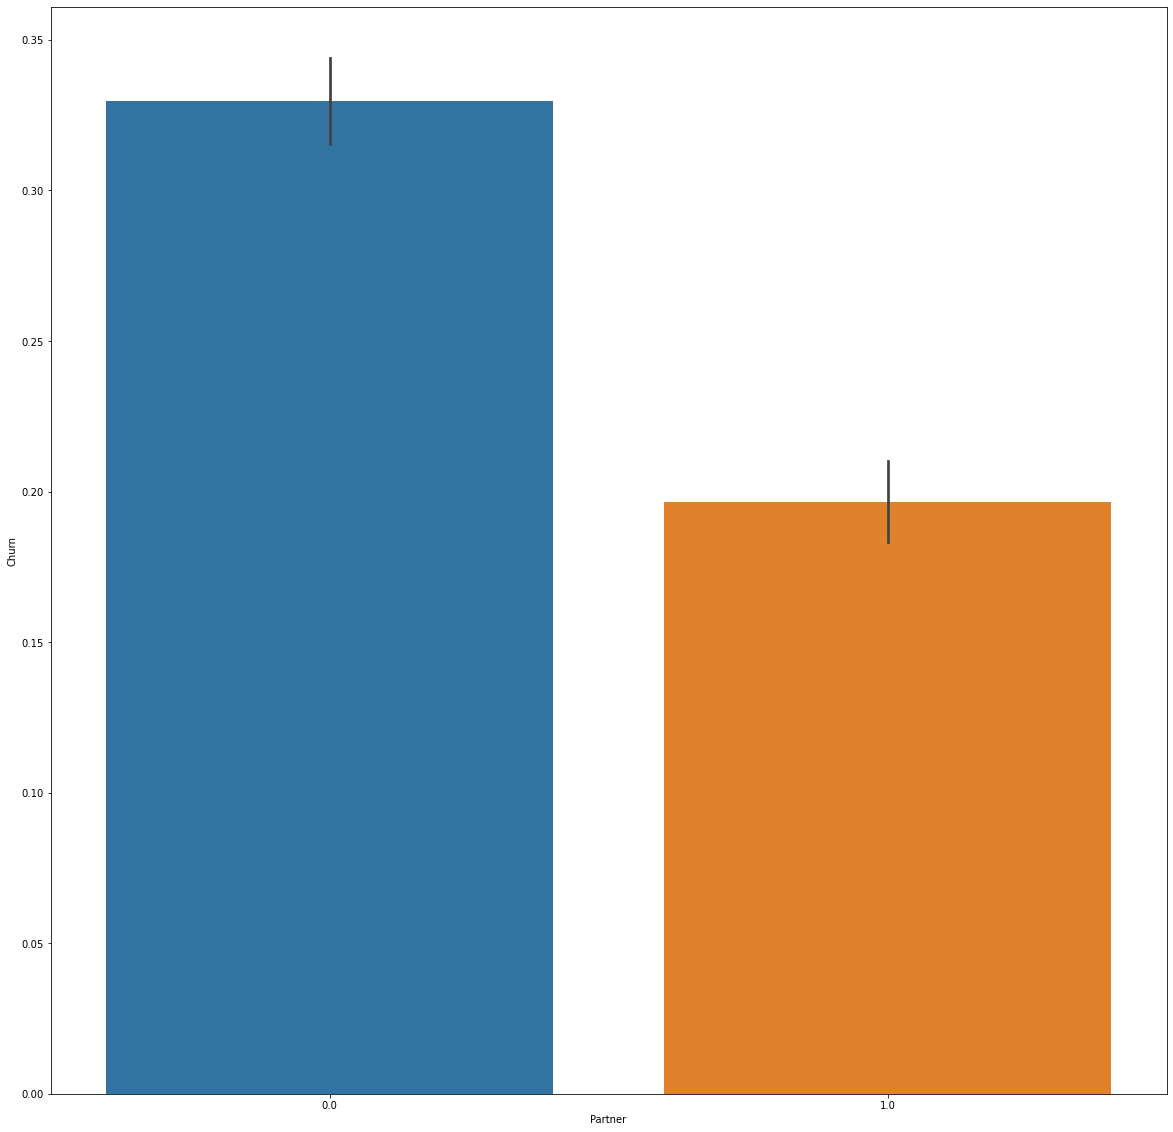

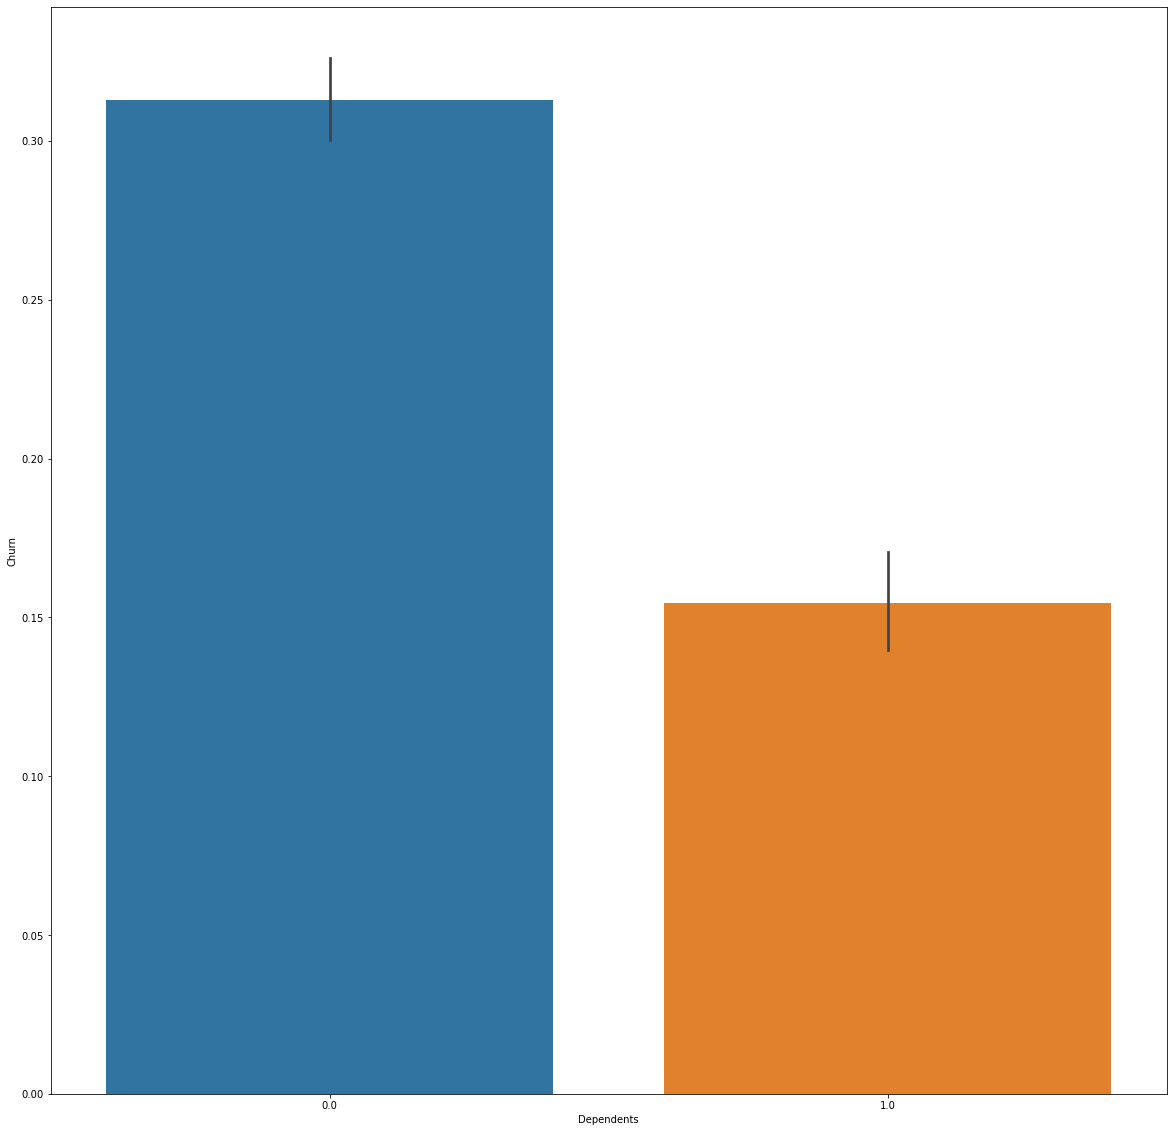

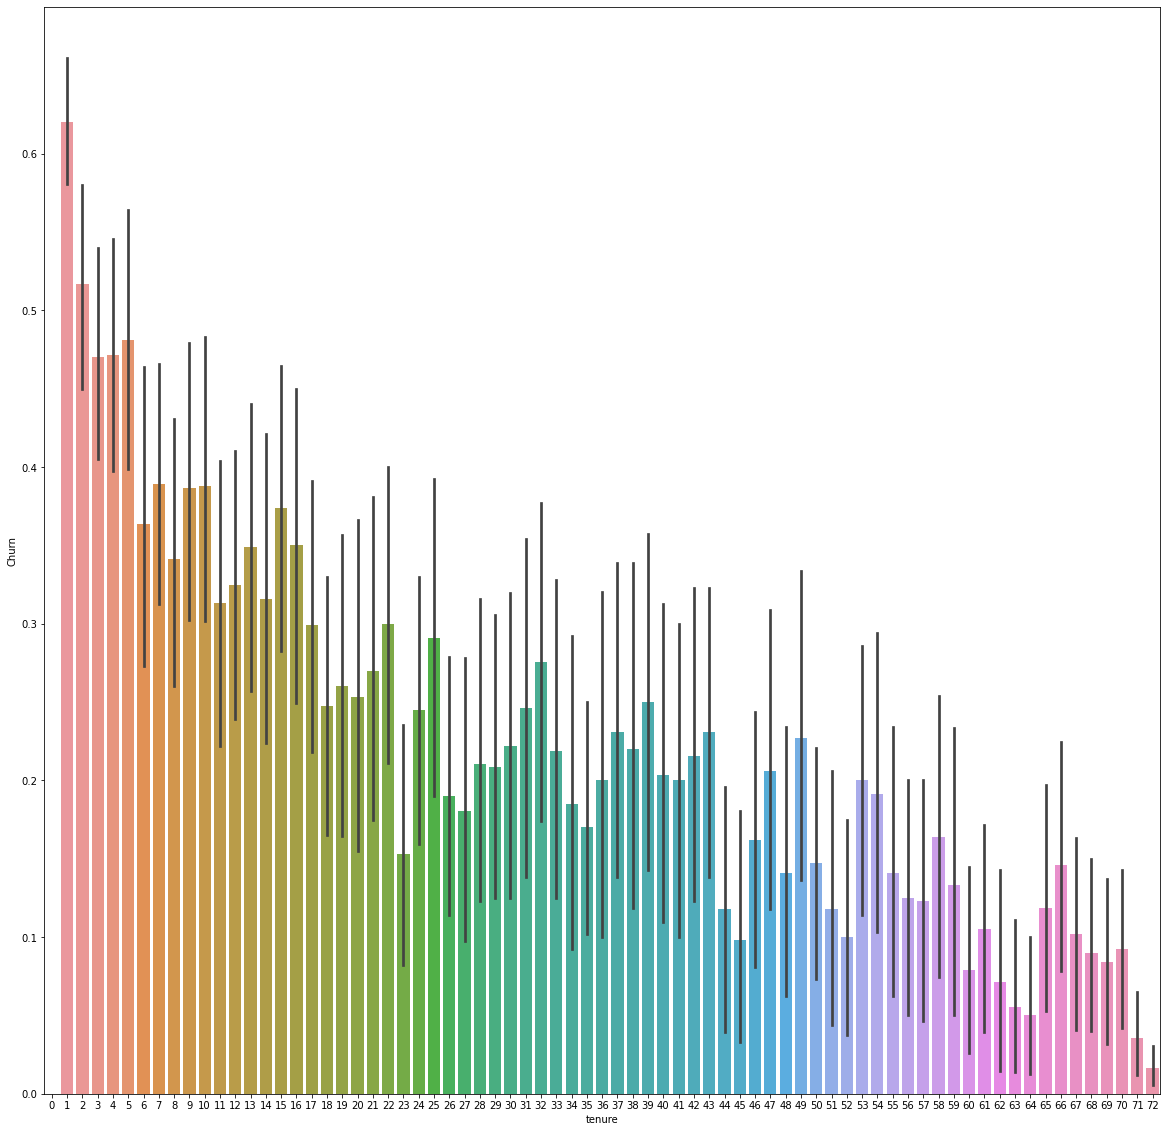

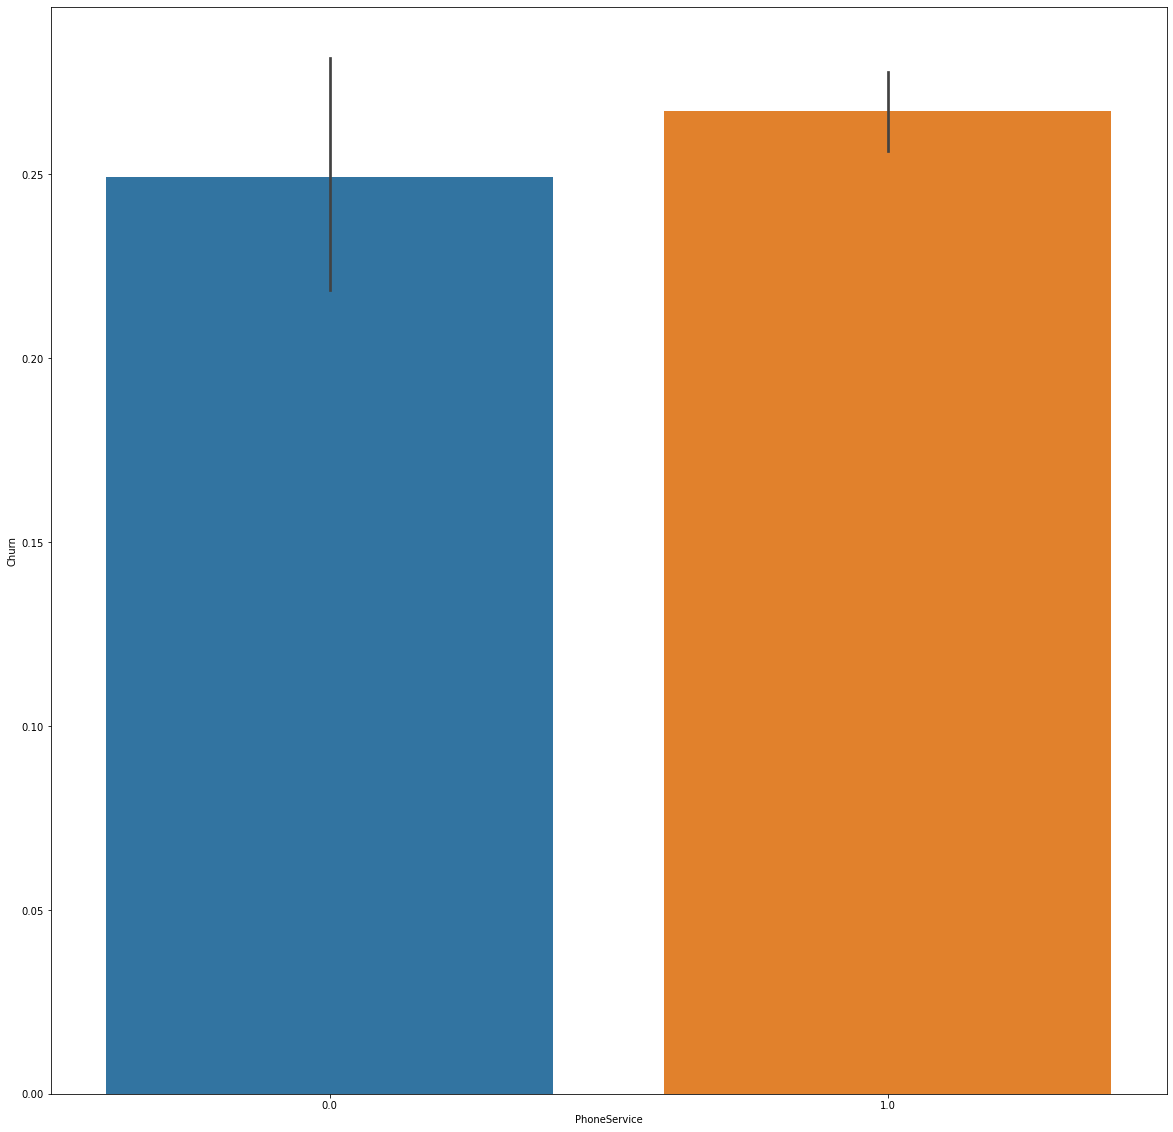

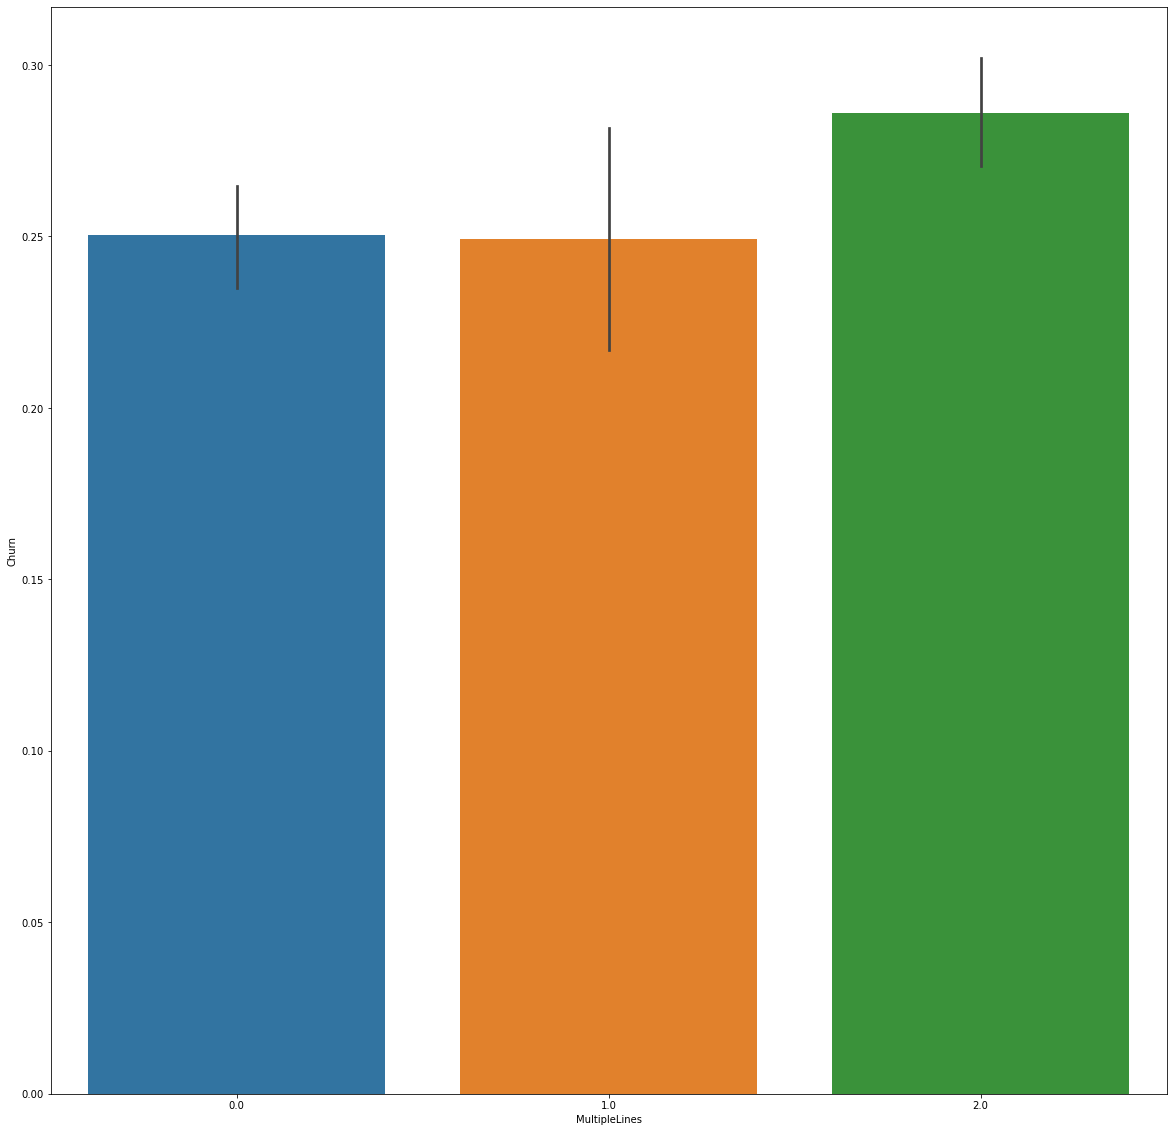

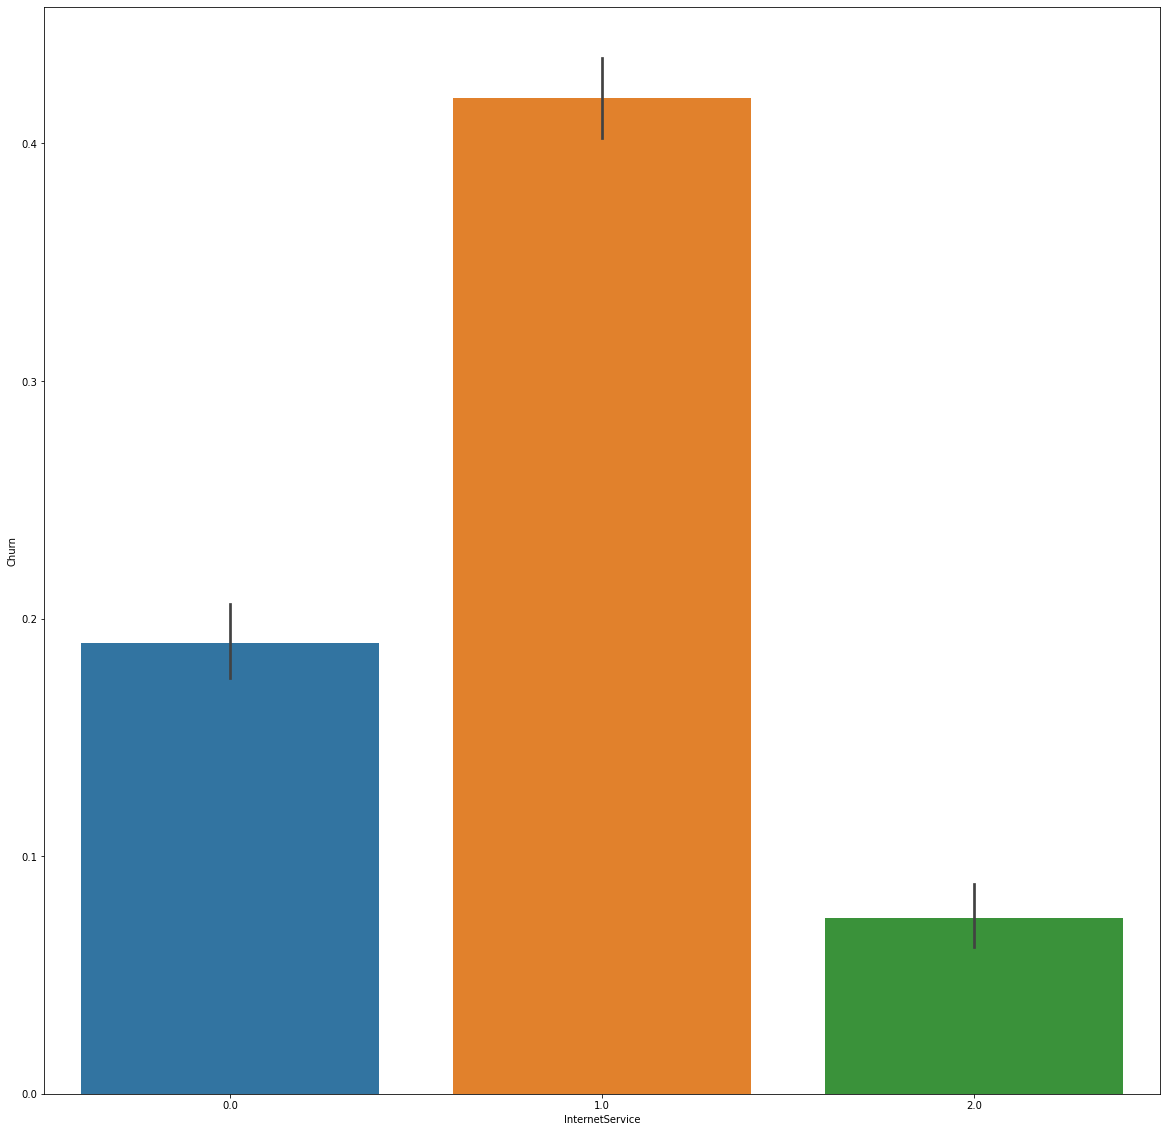

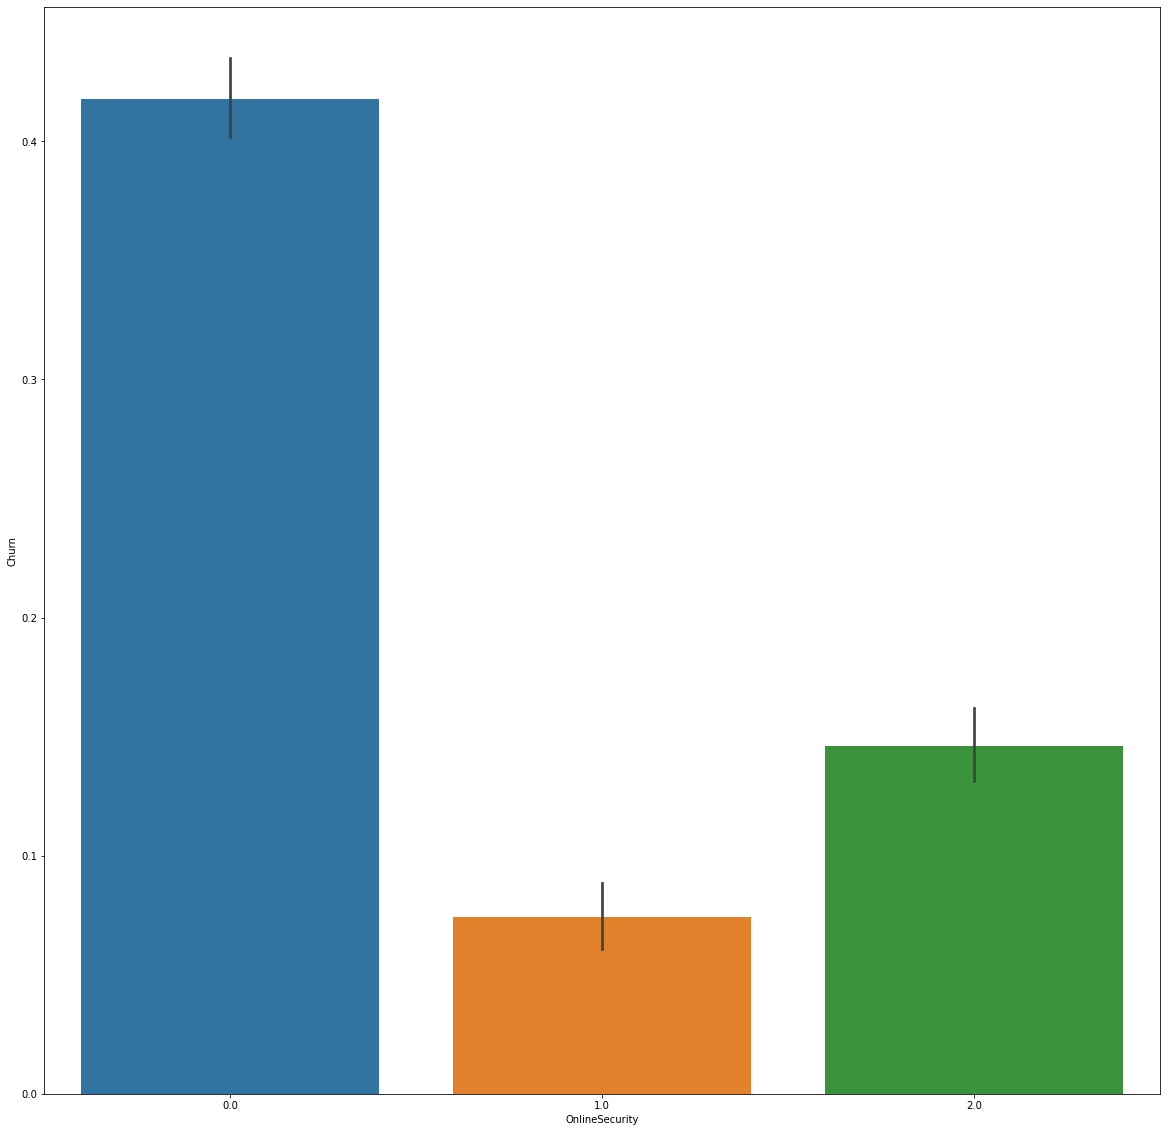

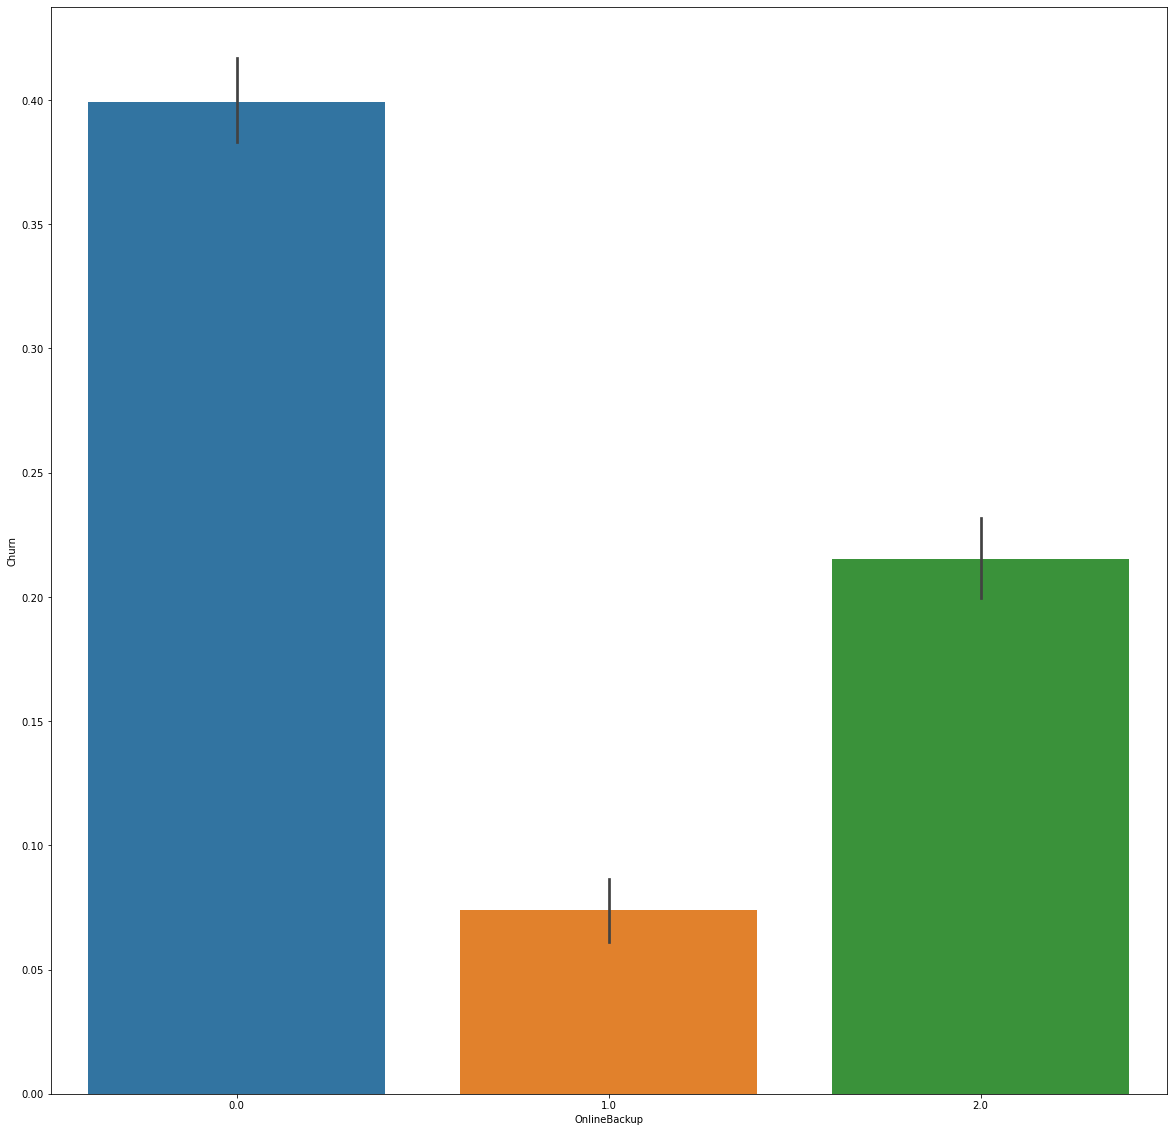

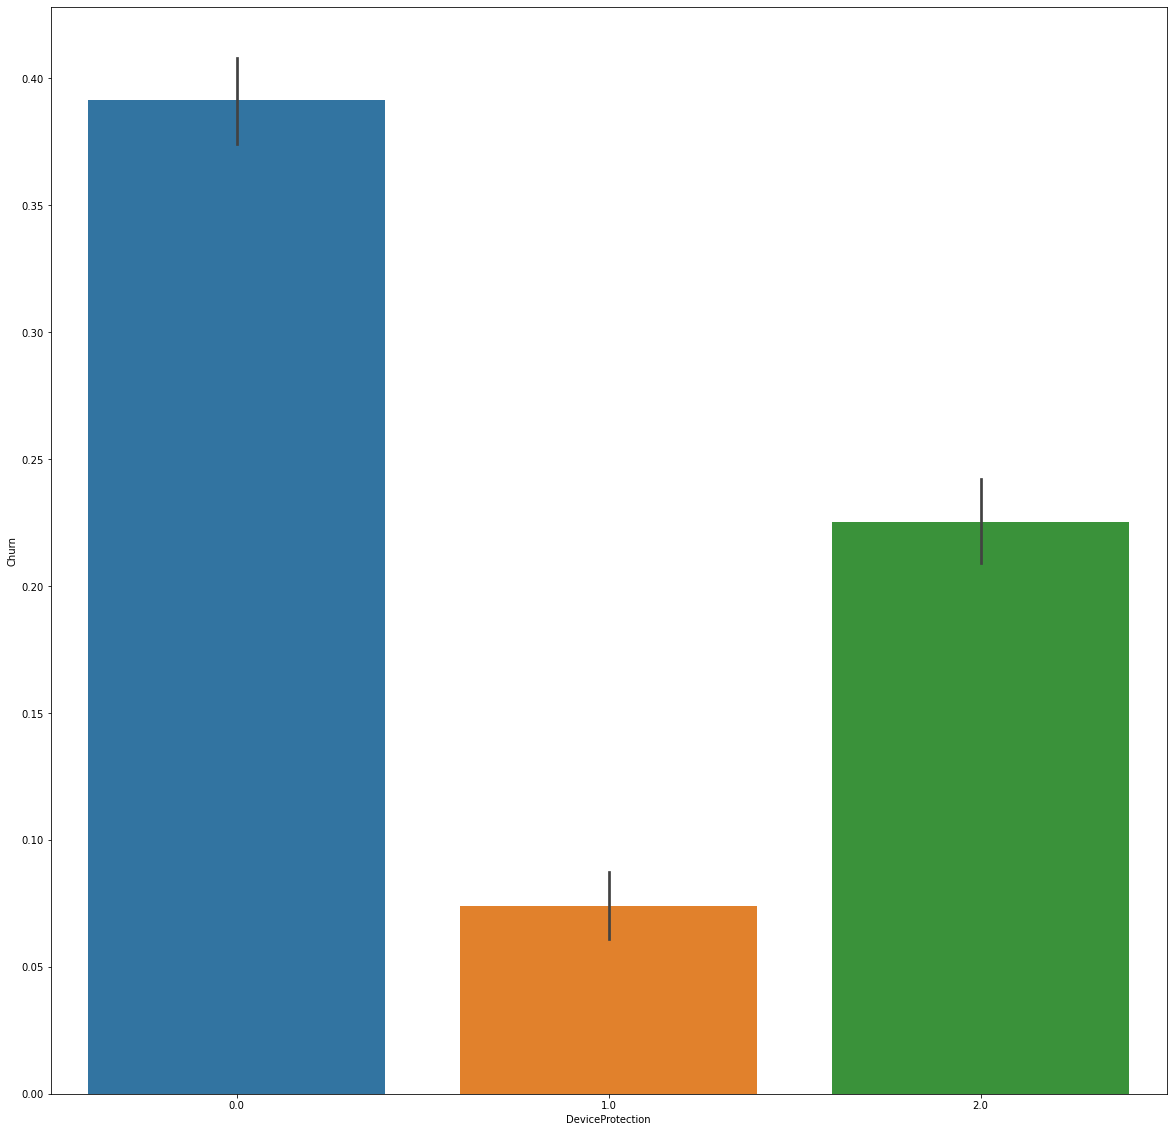

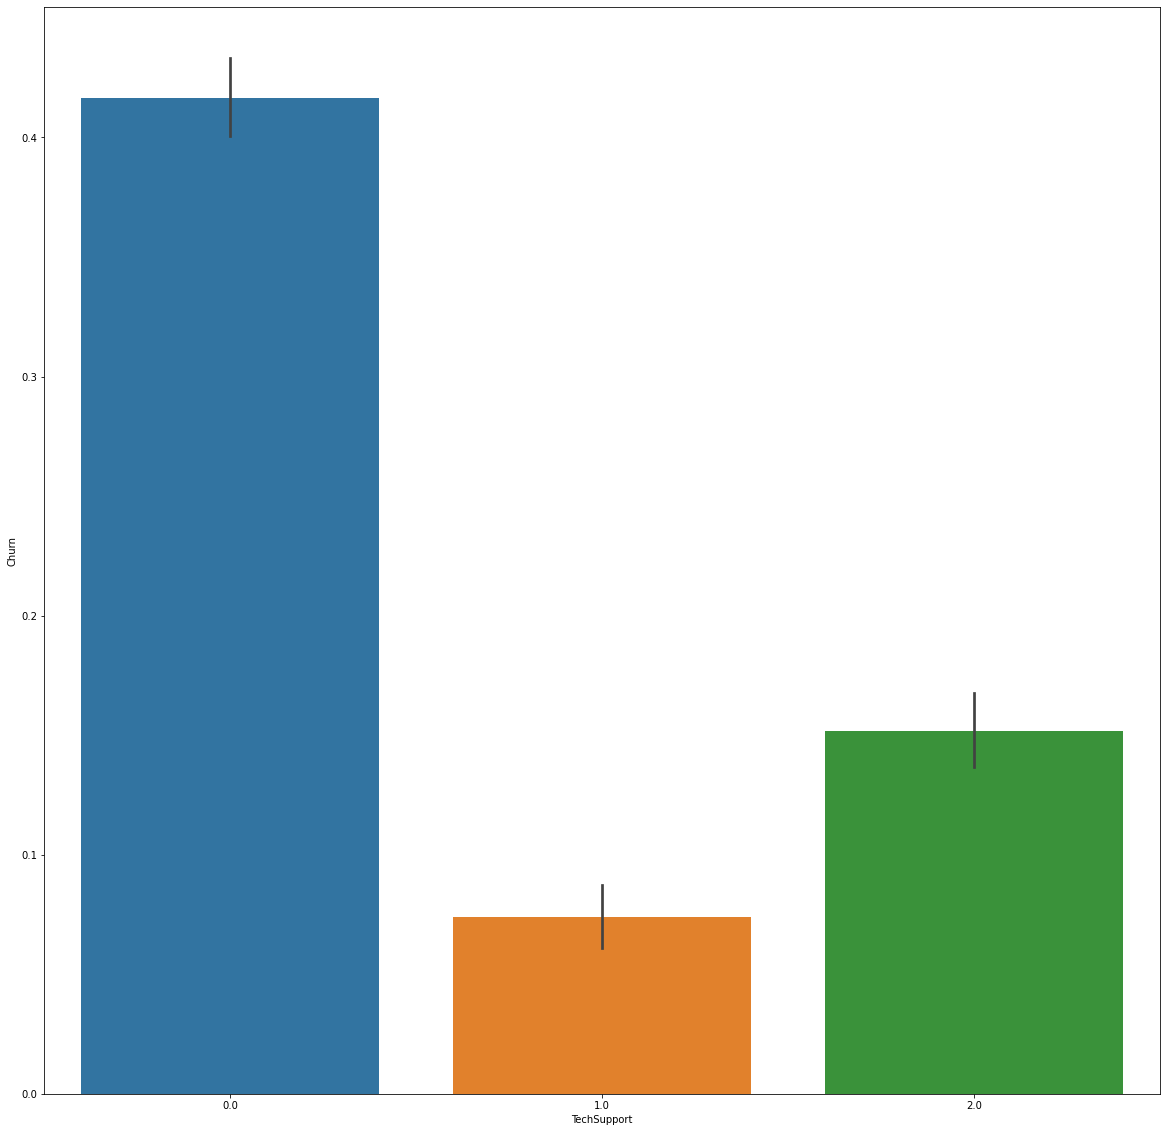

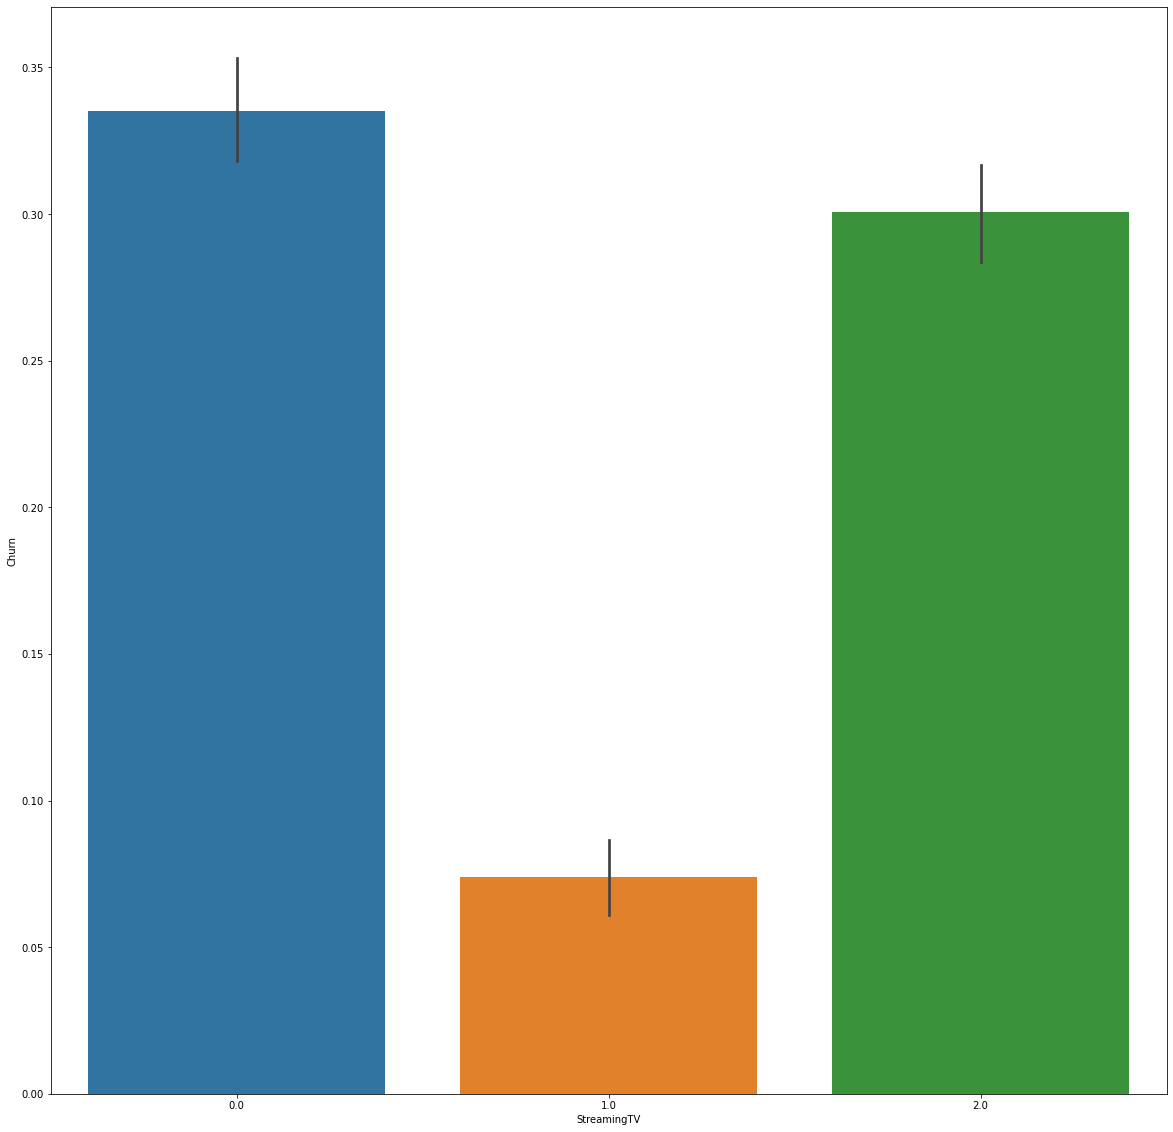

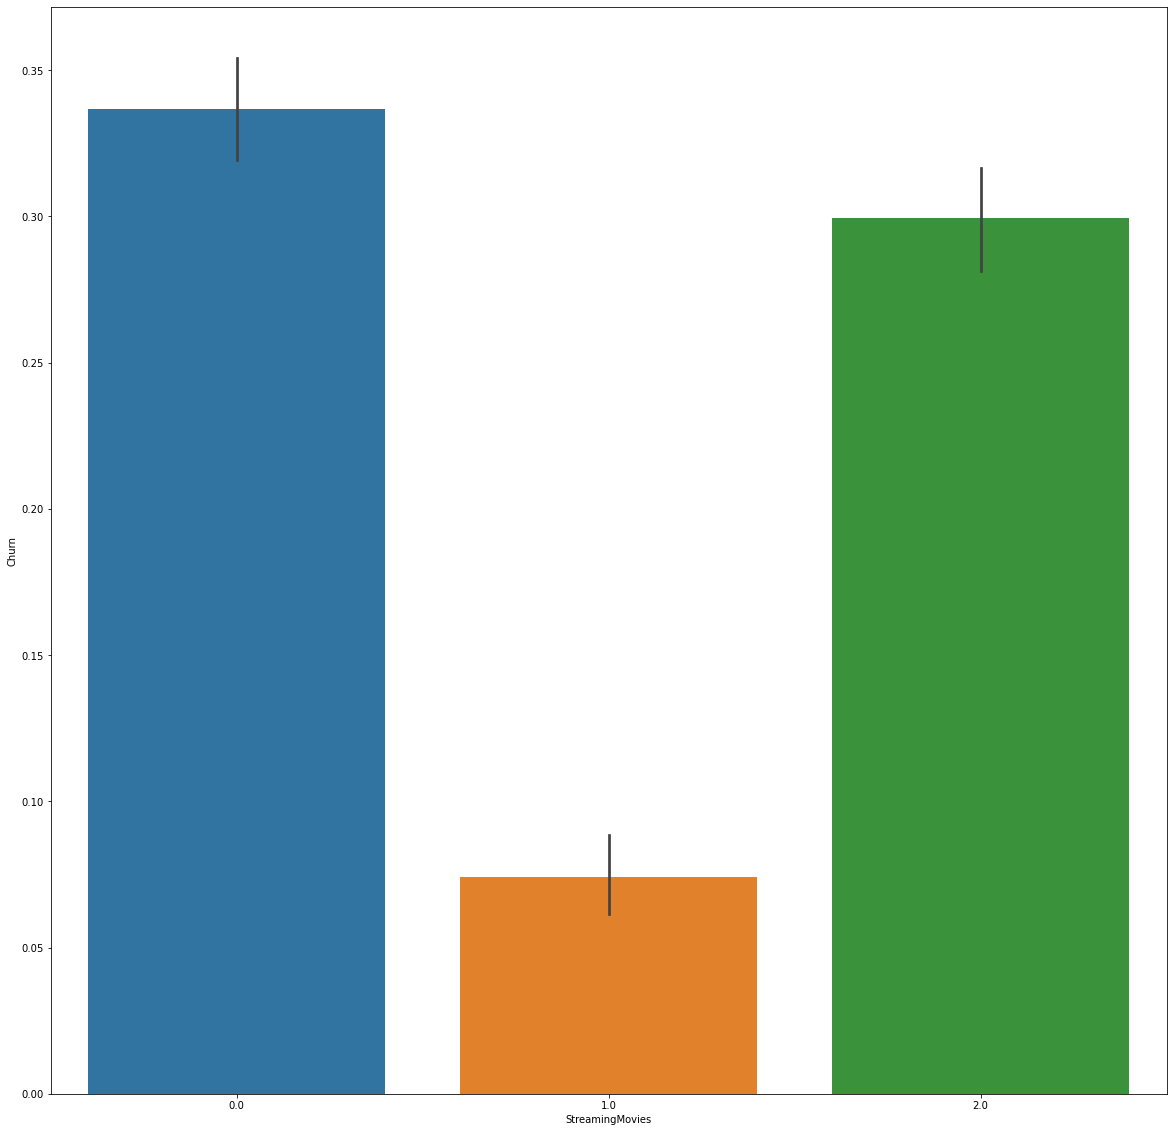

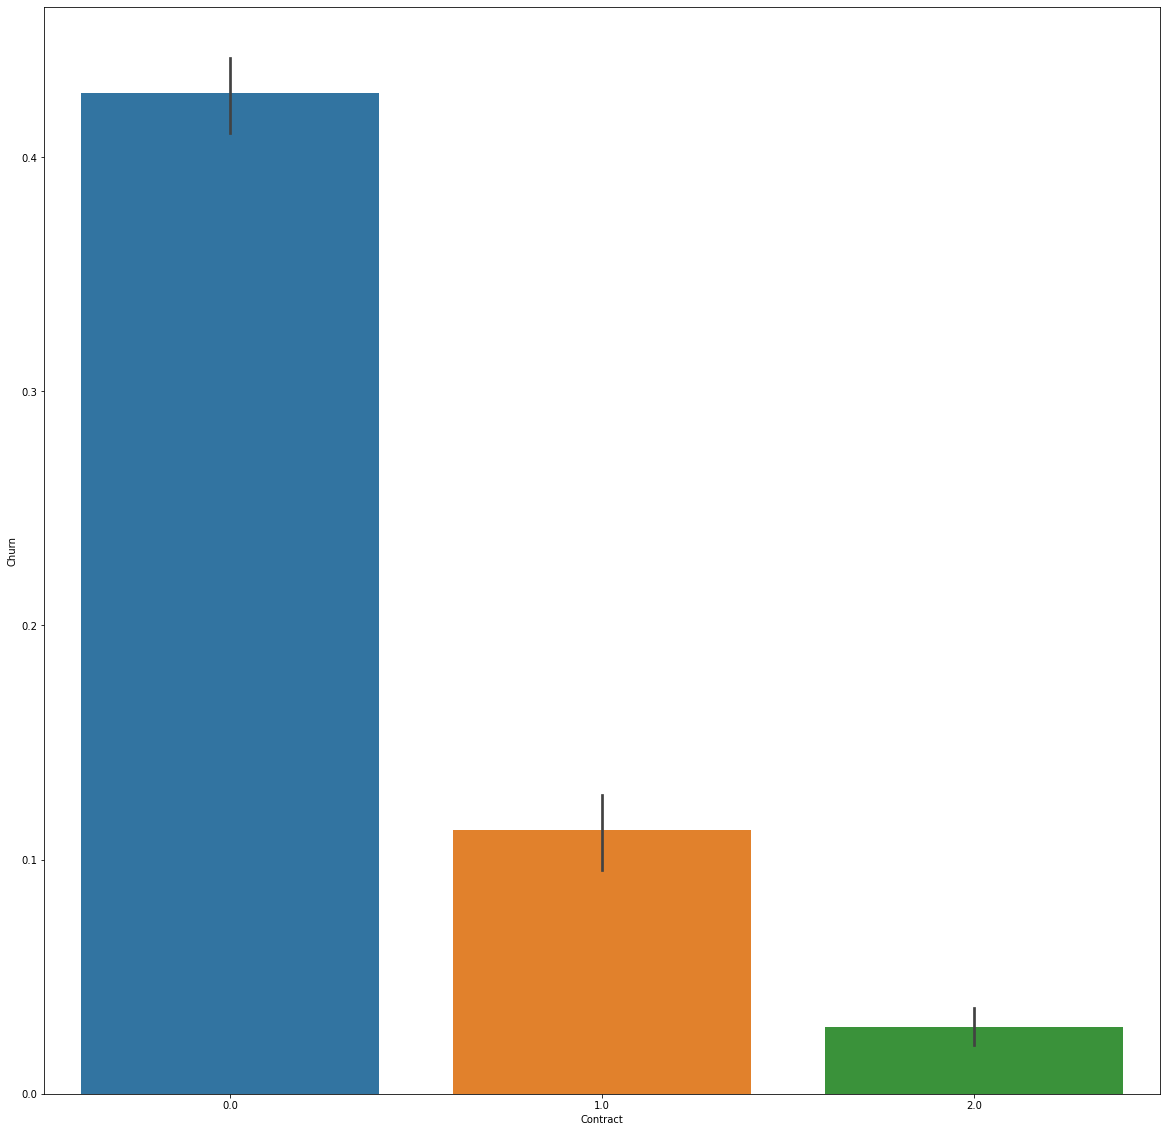

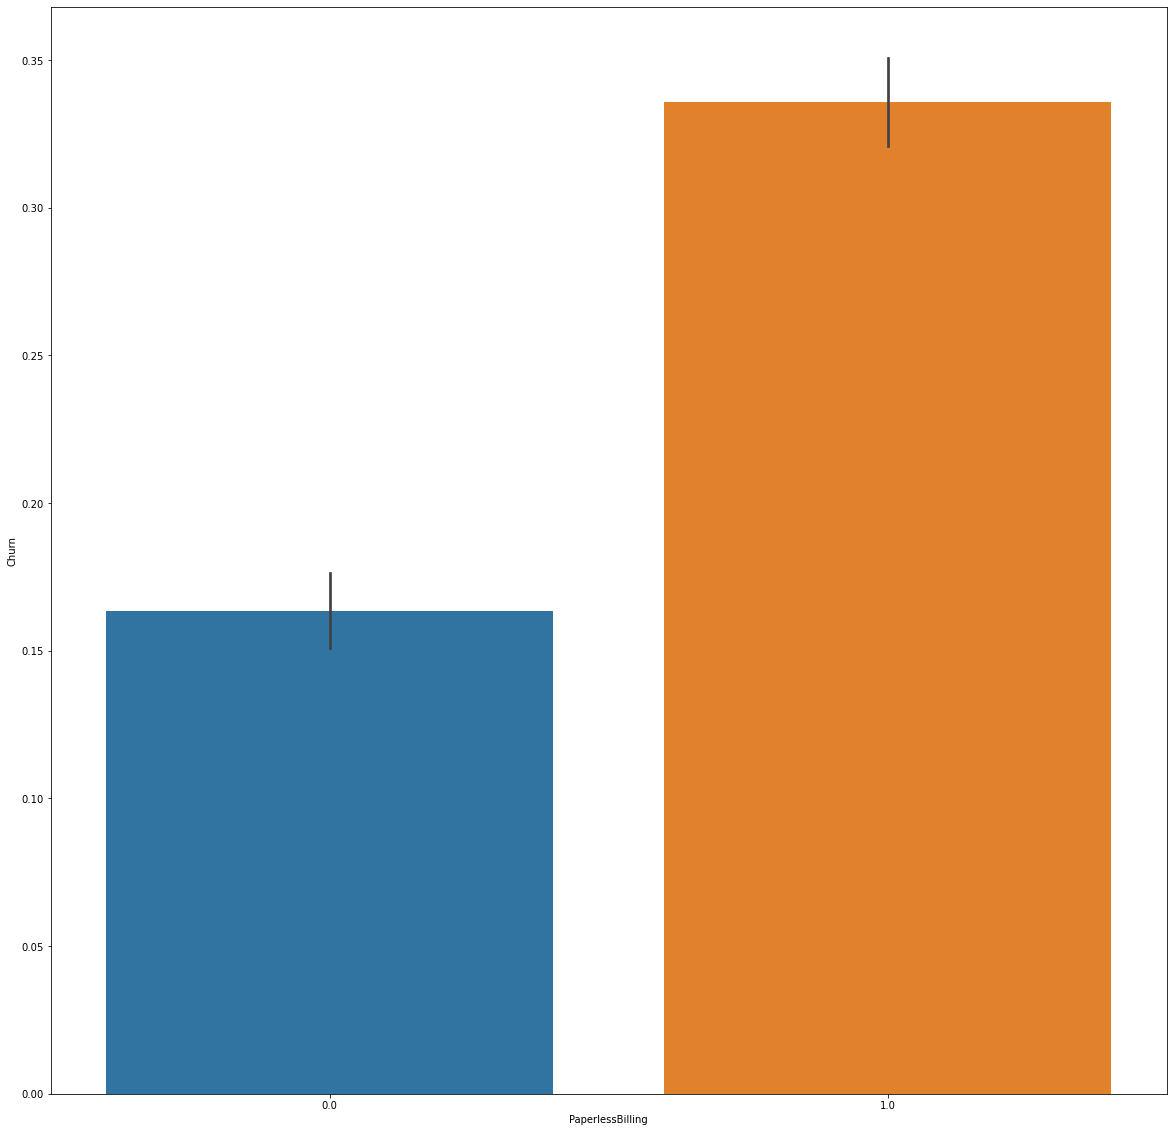

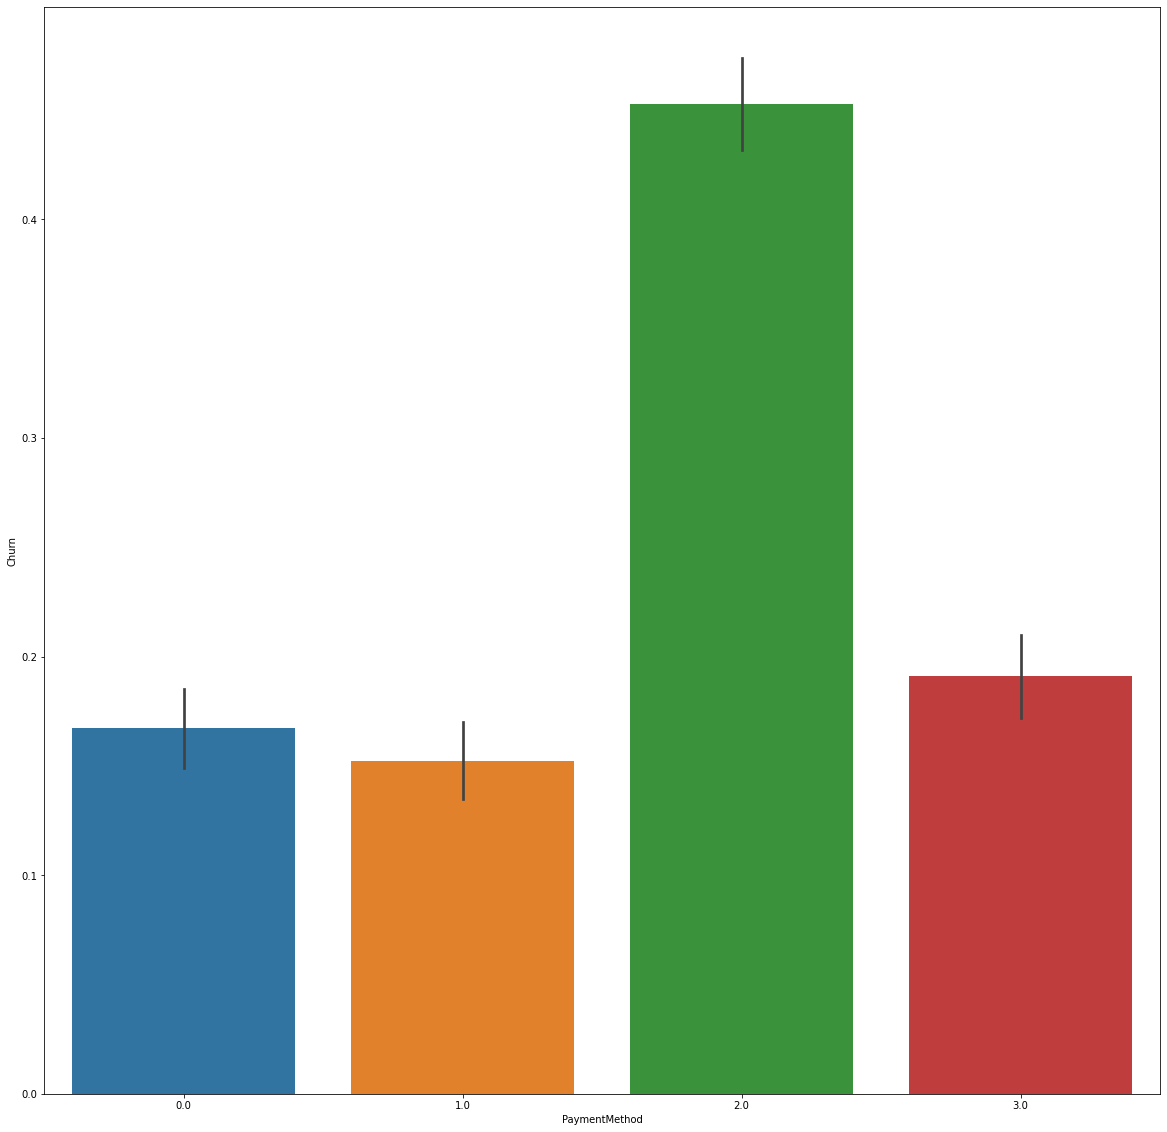

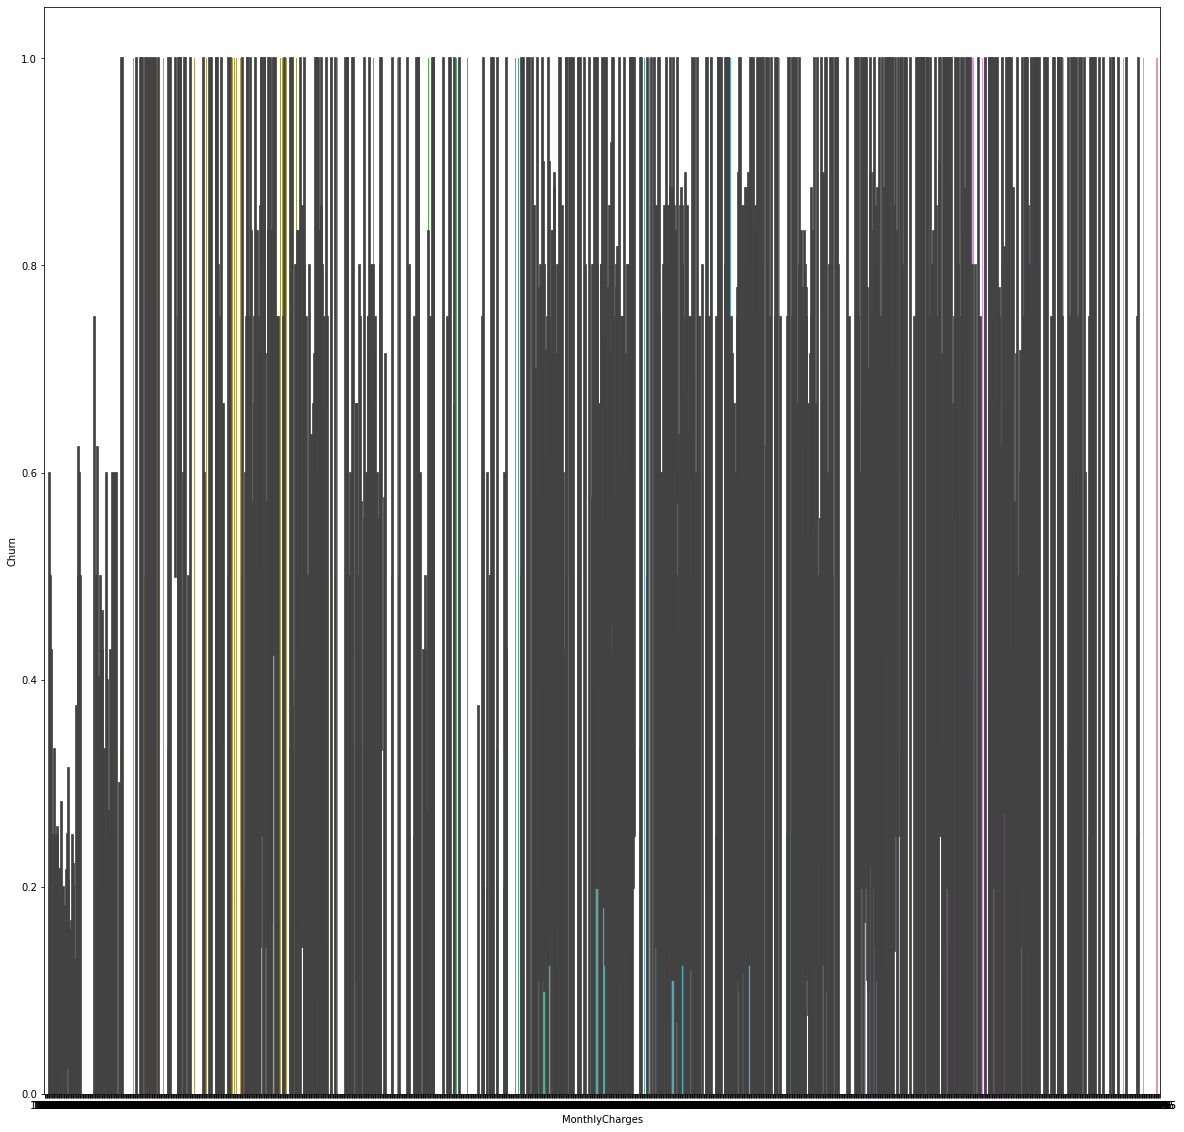

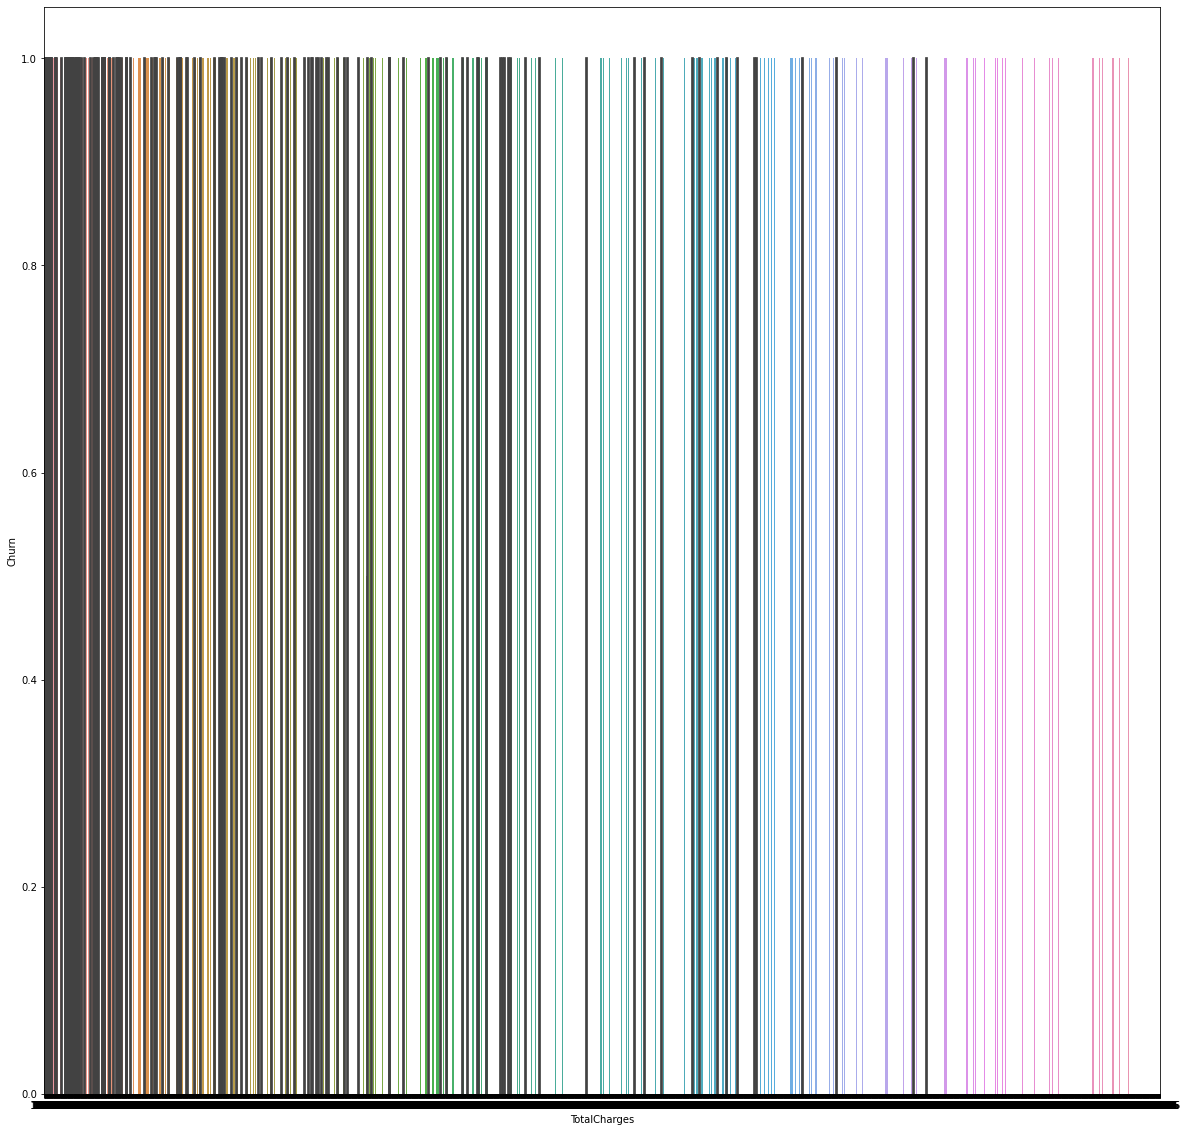

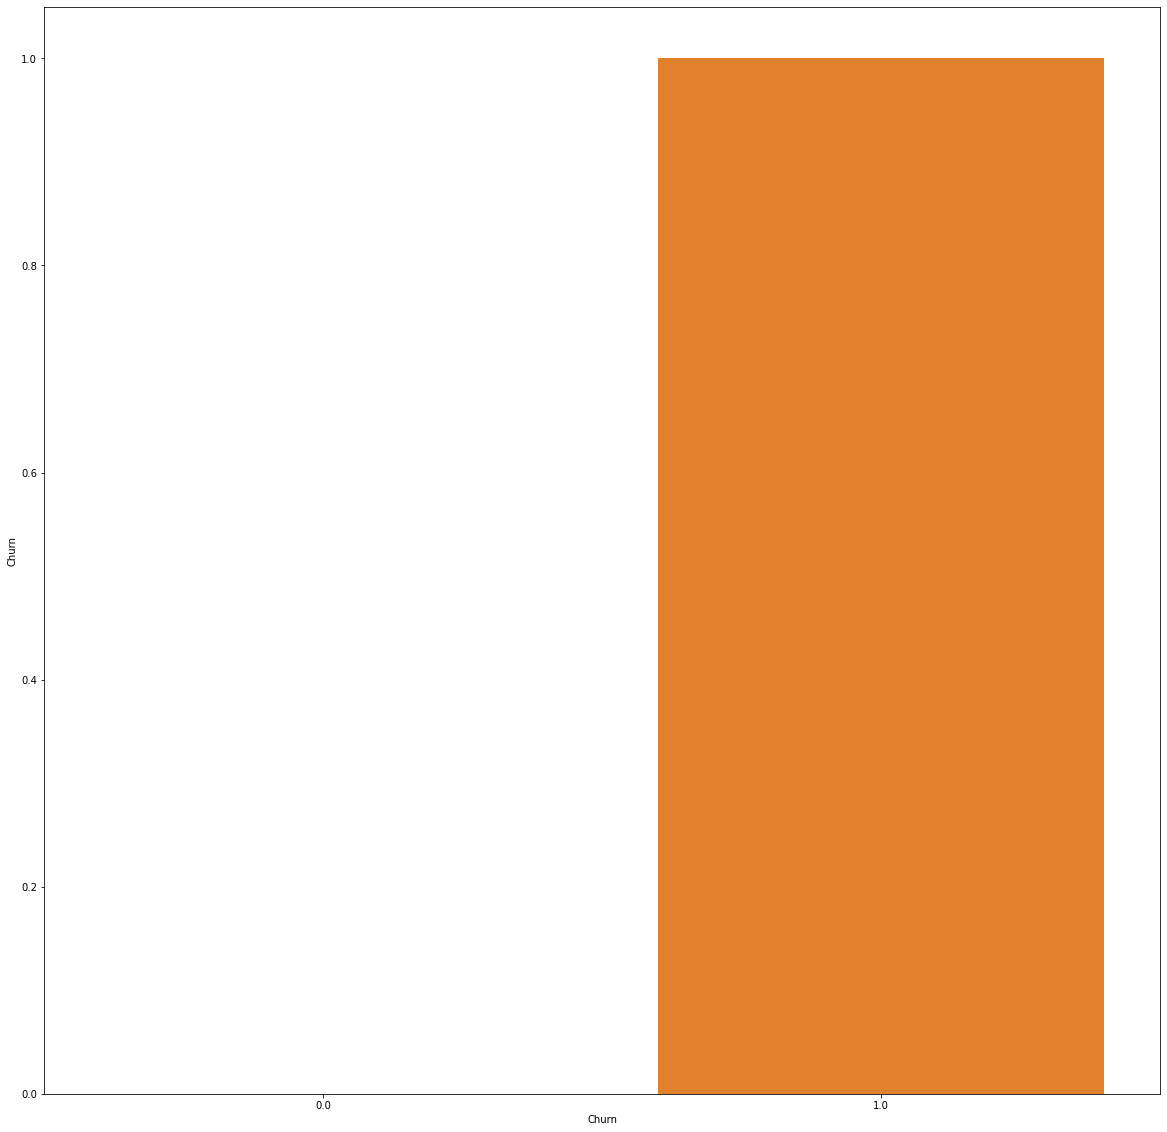

In [284]:
for column in Tele.columns:
    sns.barplot(x=column,y='Churn',data=Tele)
    plt.xlabel(column)
    plt.show()

Histogram View 

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>],
       [<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>],
       [<AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <A

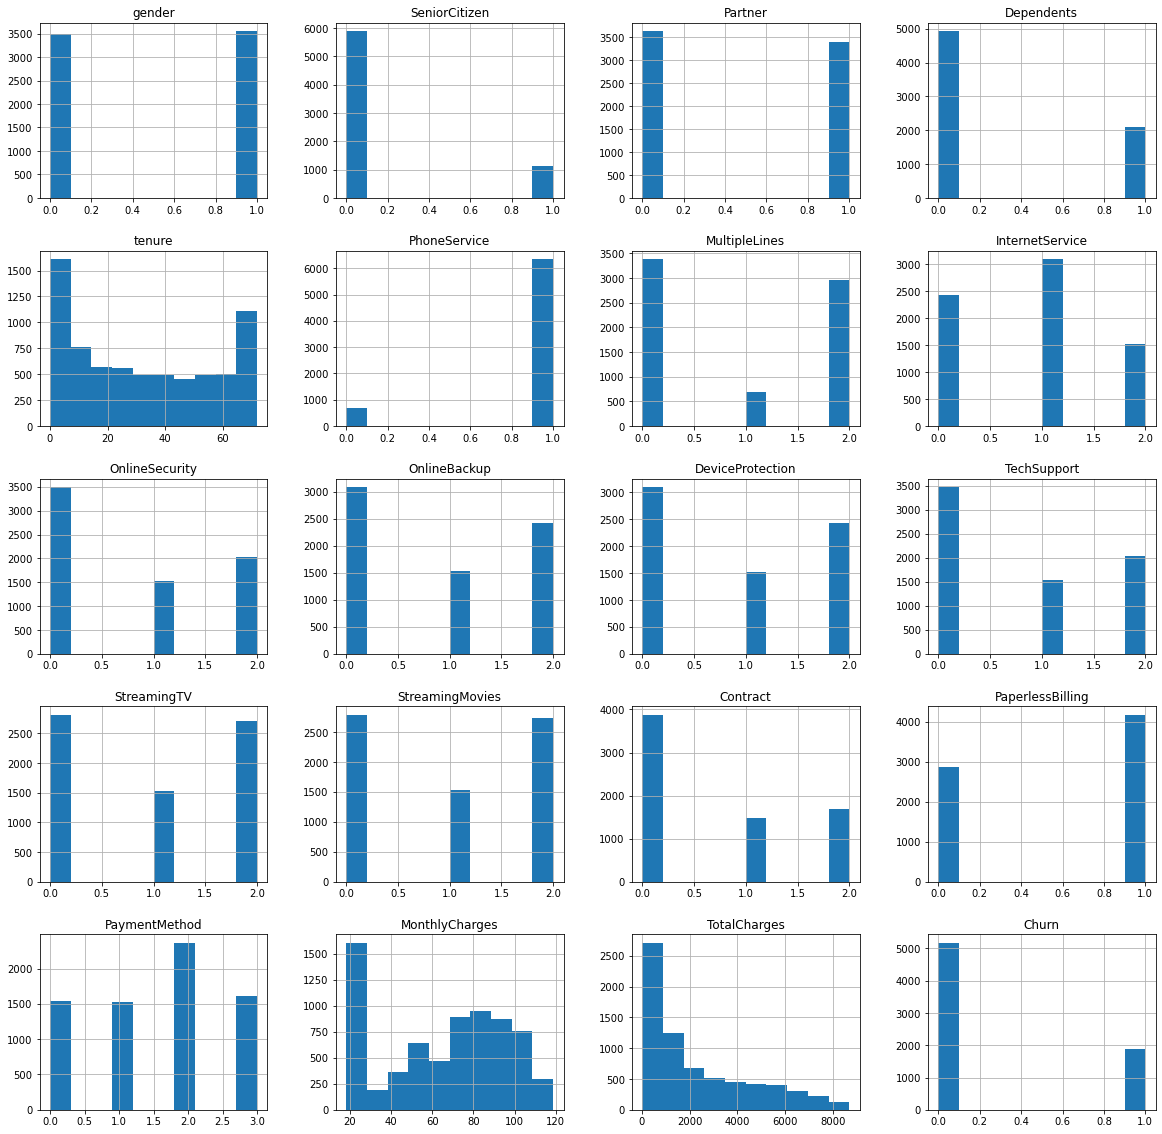

In [285]:
Tele.hist(bins=10, figsize=(20,20))

<AxesSubplot:xlabel='gender', ylabel='Density'>

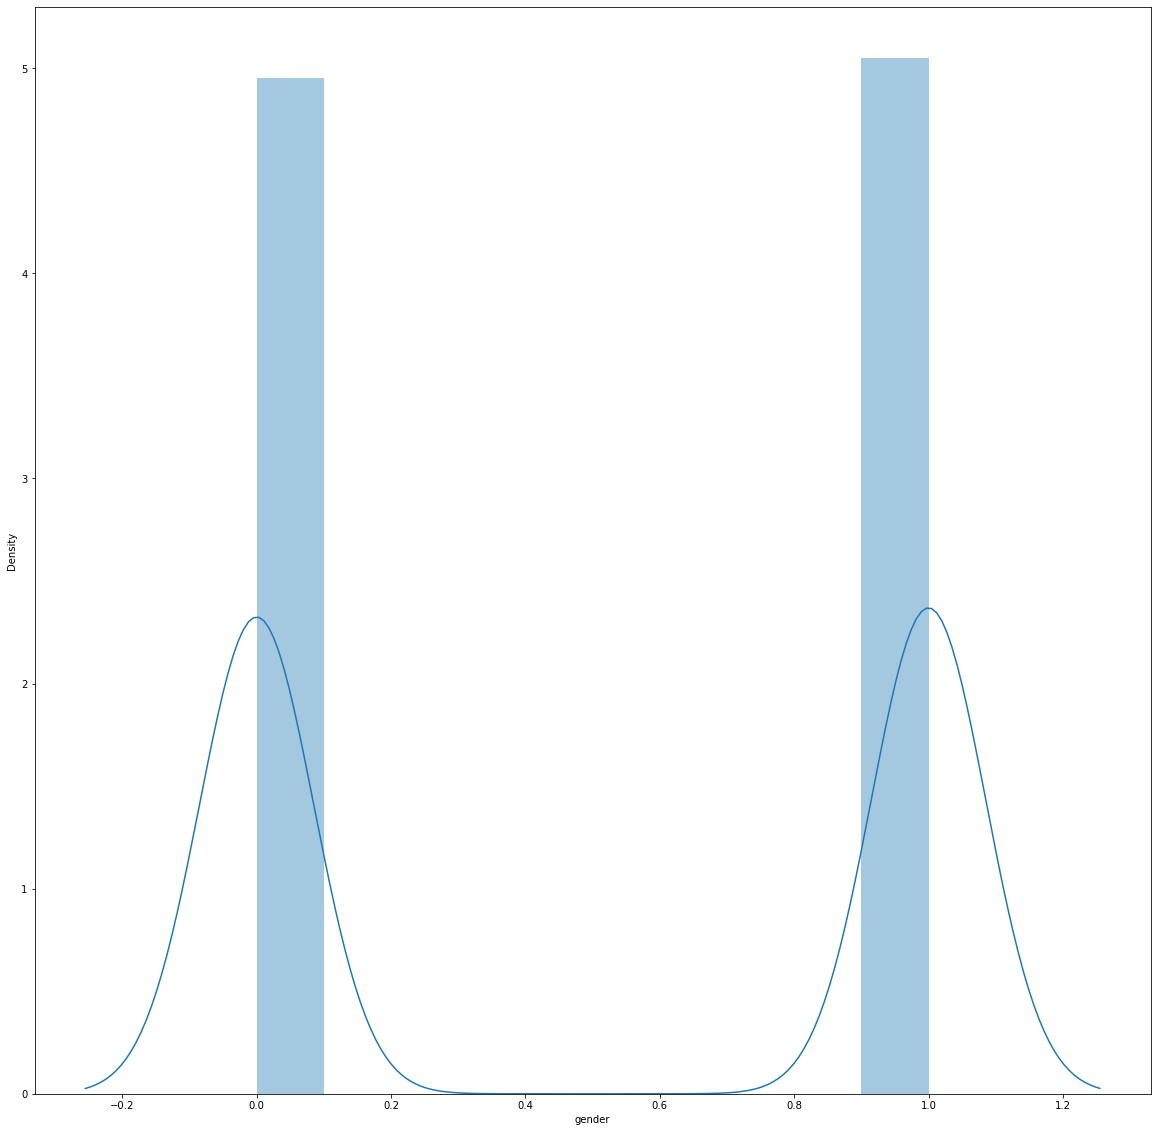

In [286]:
sns.distplot(Tele['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

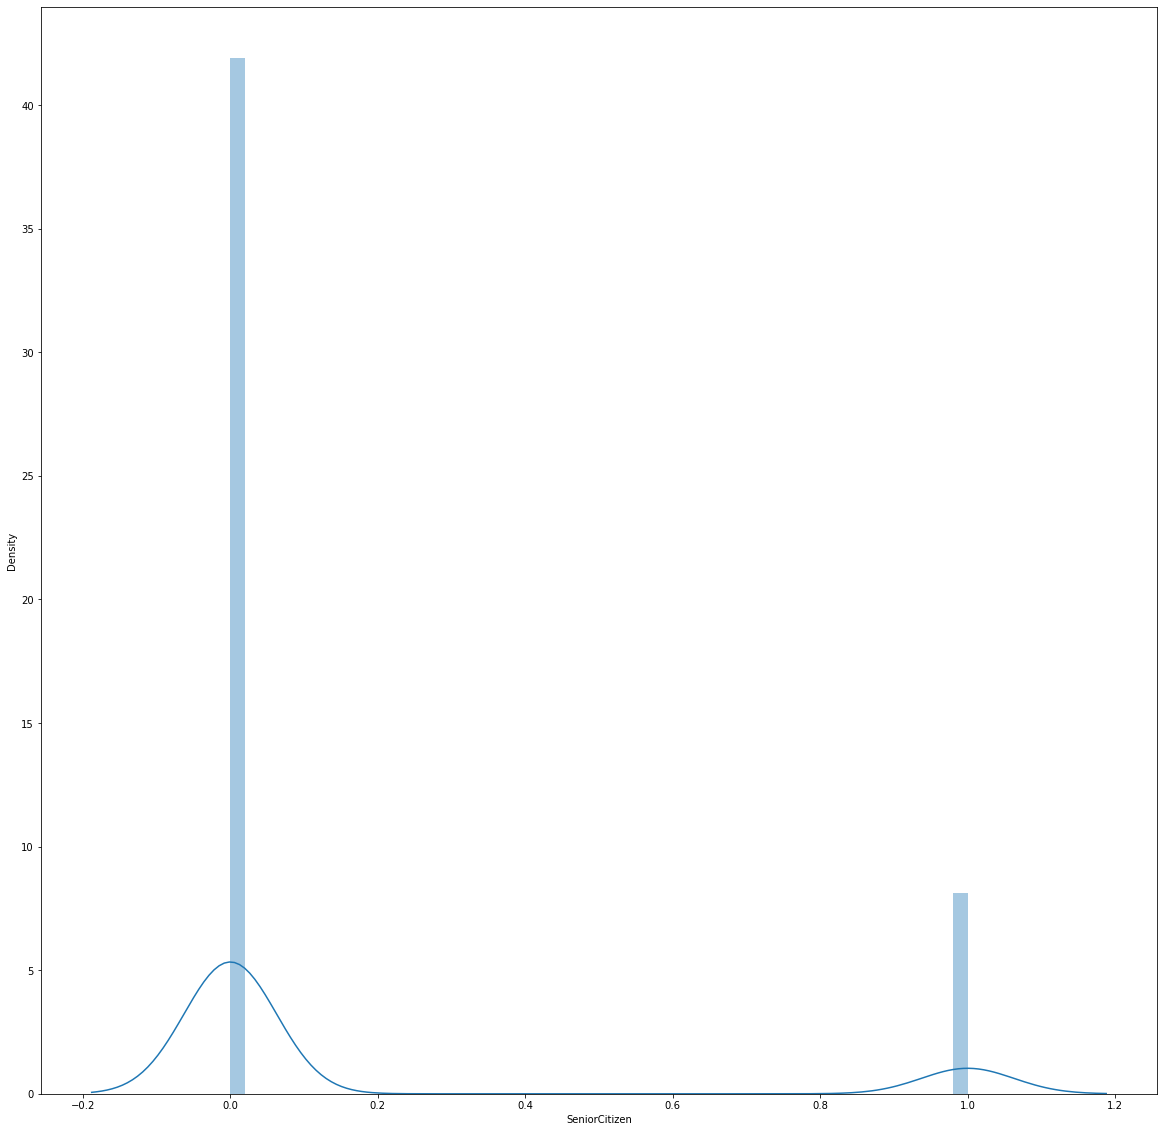

In [287]:
sns.distplot(Tele['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

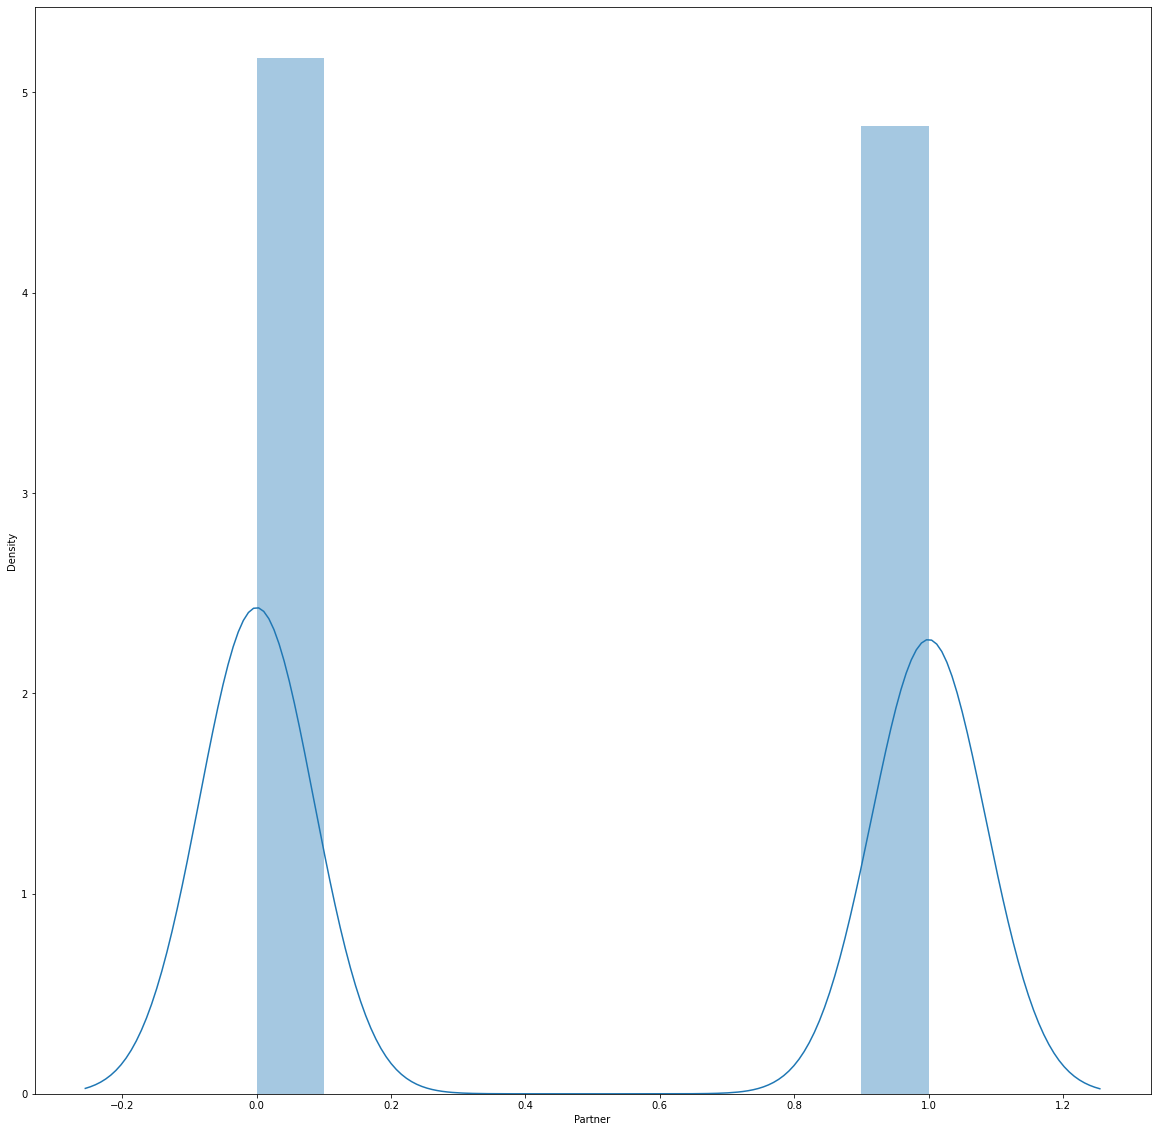

In [288]:
sns.distplot(Tele['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

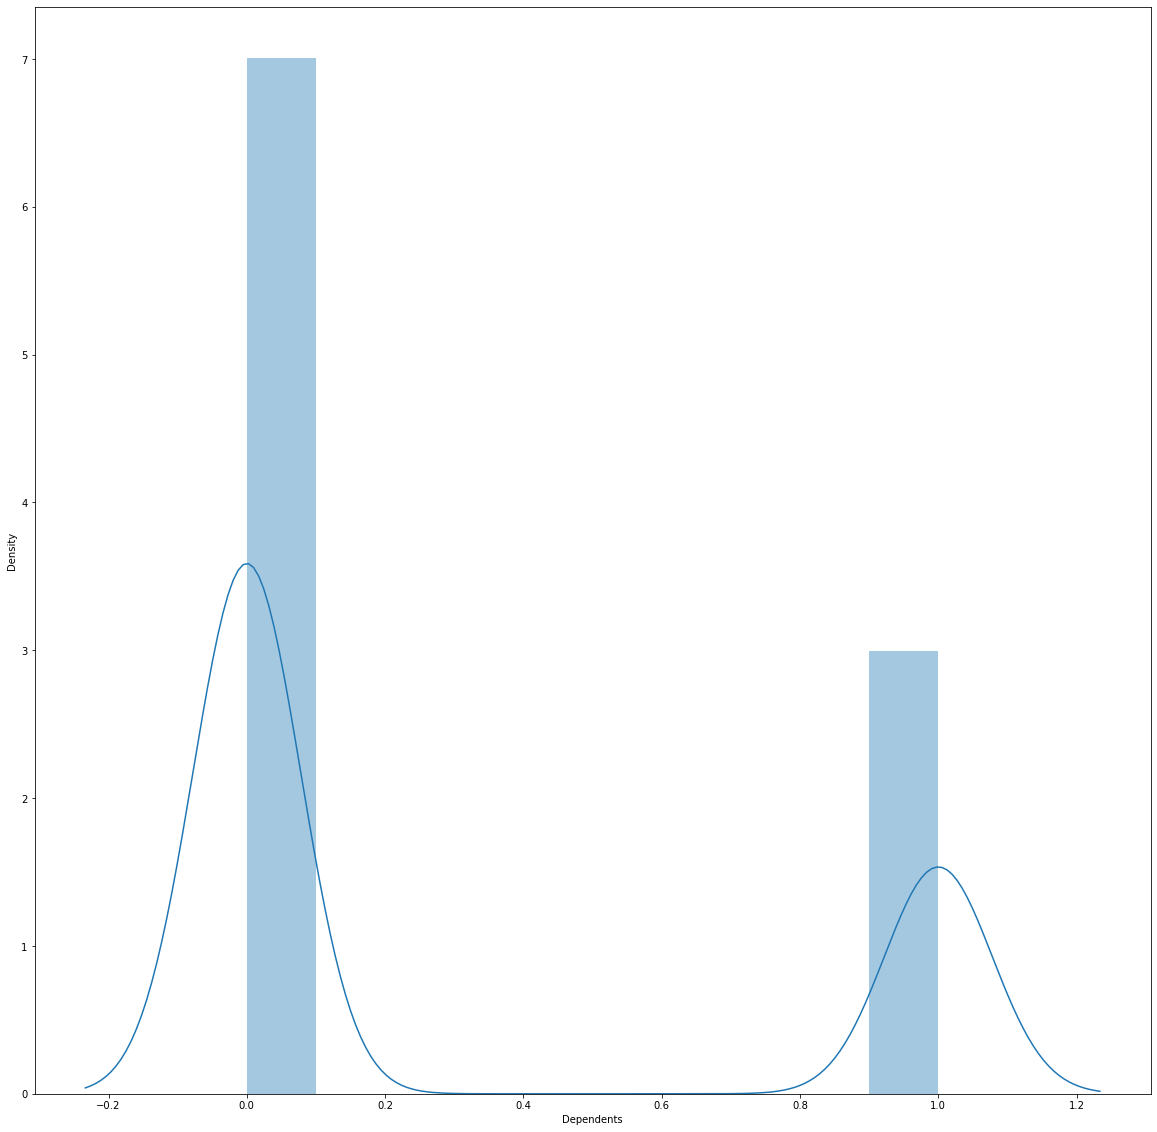

In [289]:
sns.distplot(Tele['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

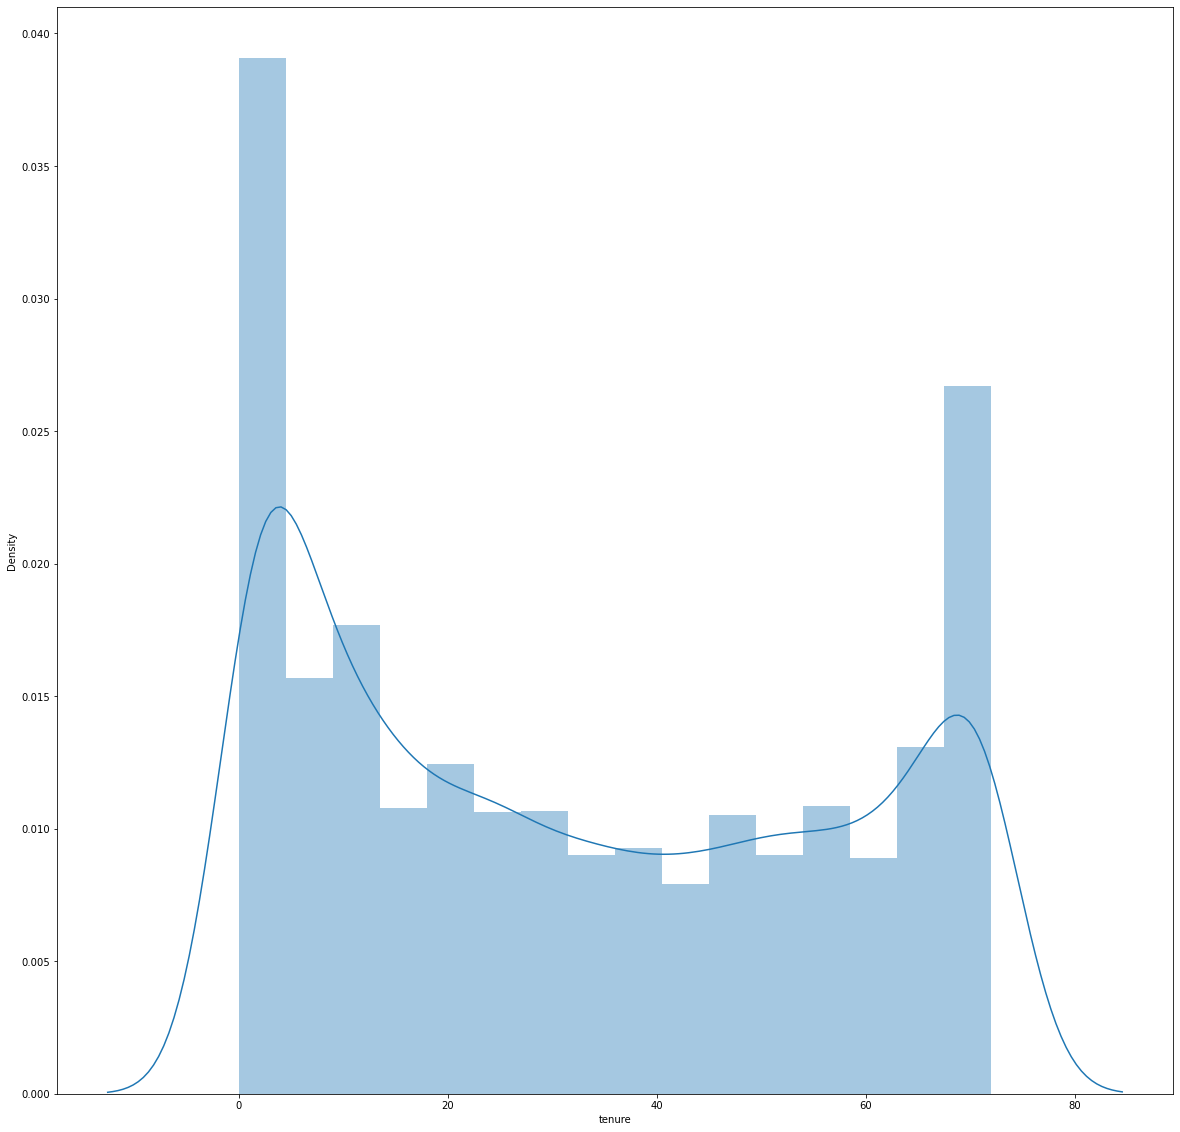

In [290]:
sns.distplot(Tele['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

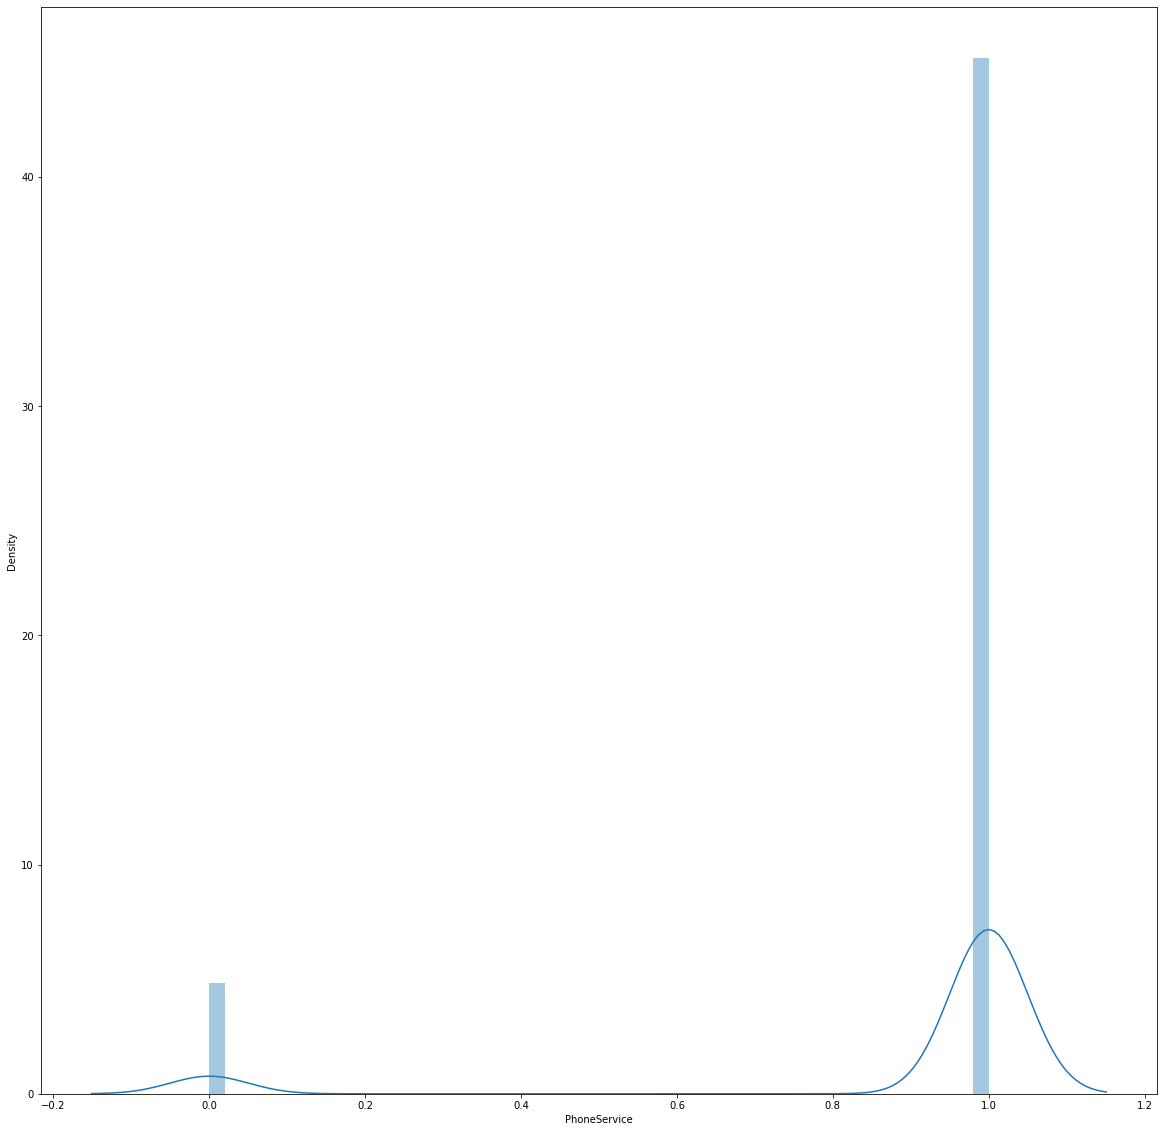

In [291]:
sns.distplot(Tele['PhoneService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

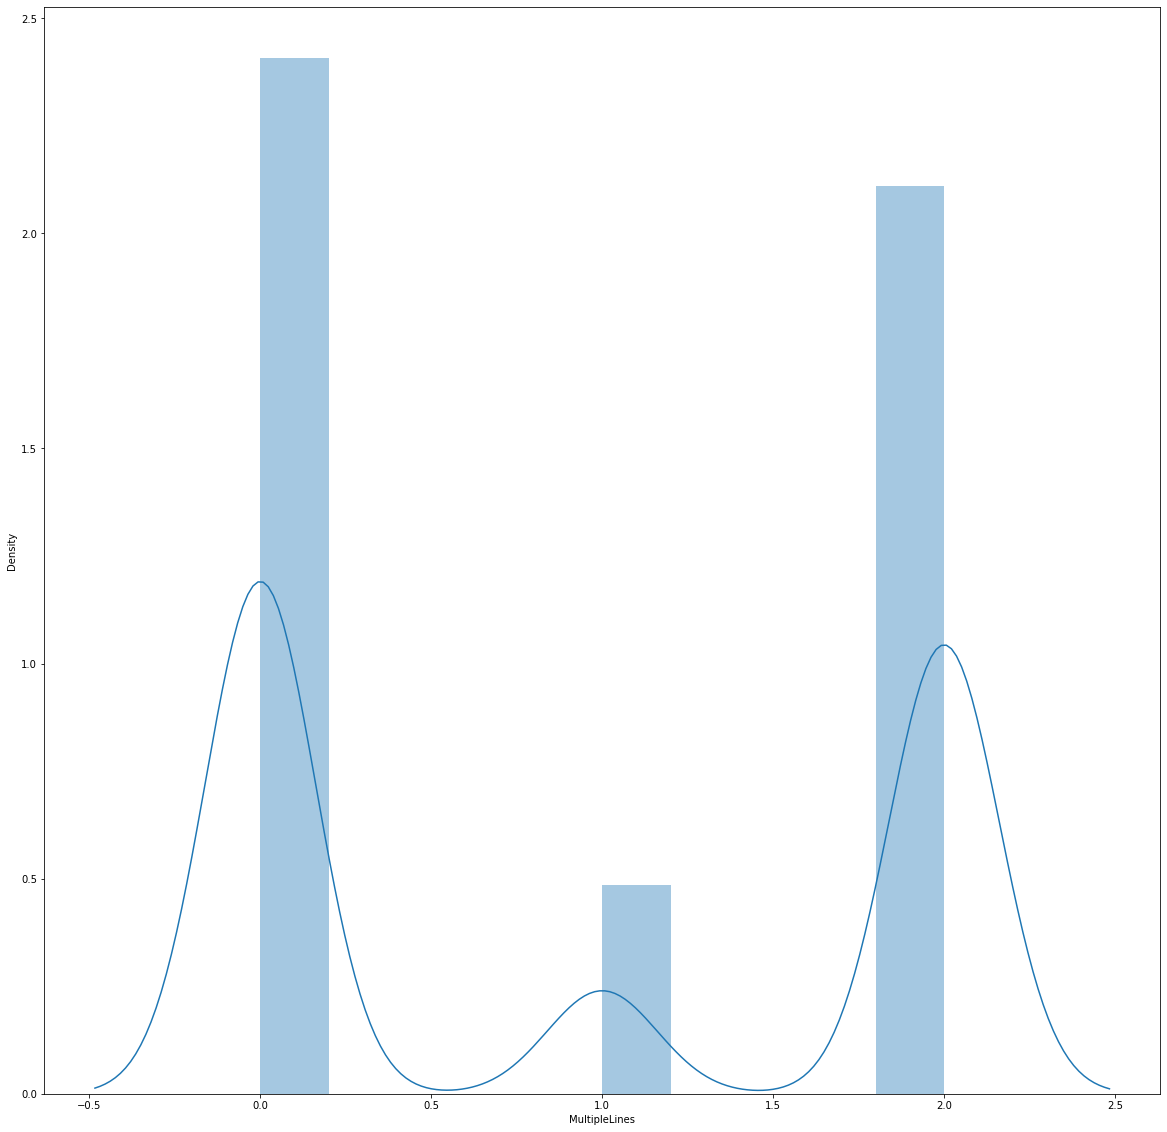

In [292]:
sns.distplot(Tele['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

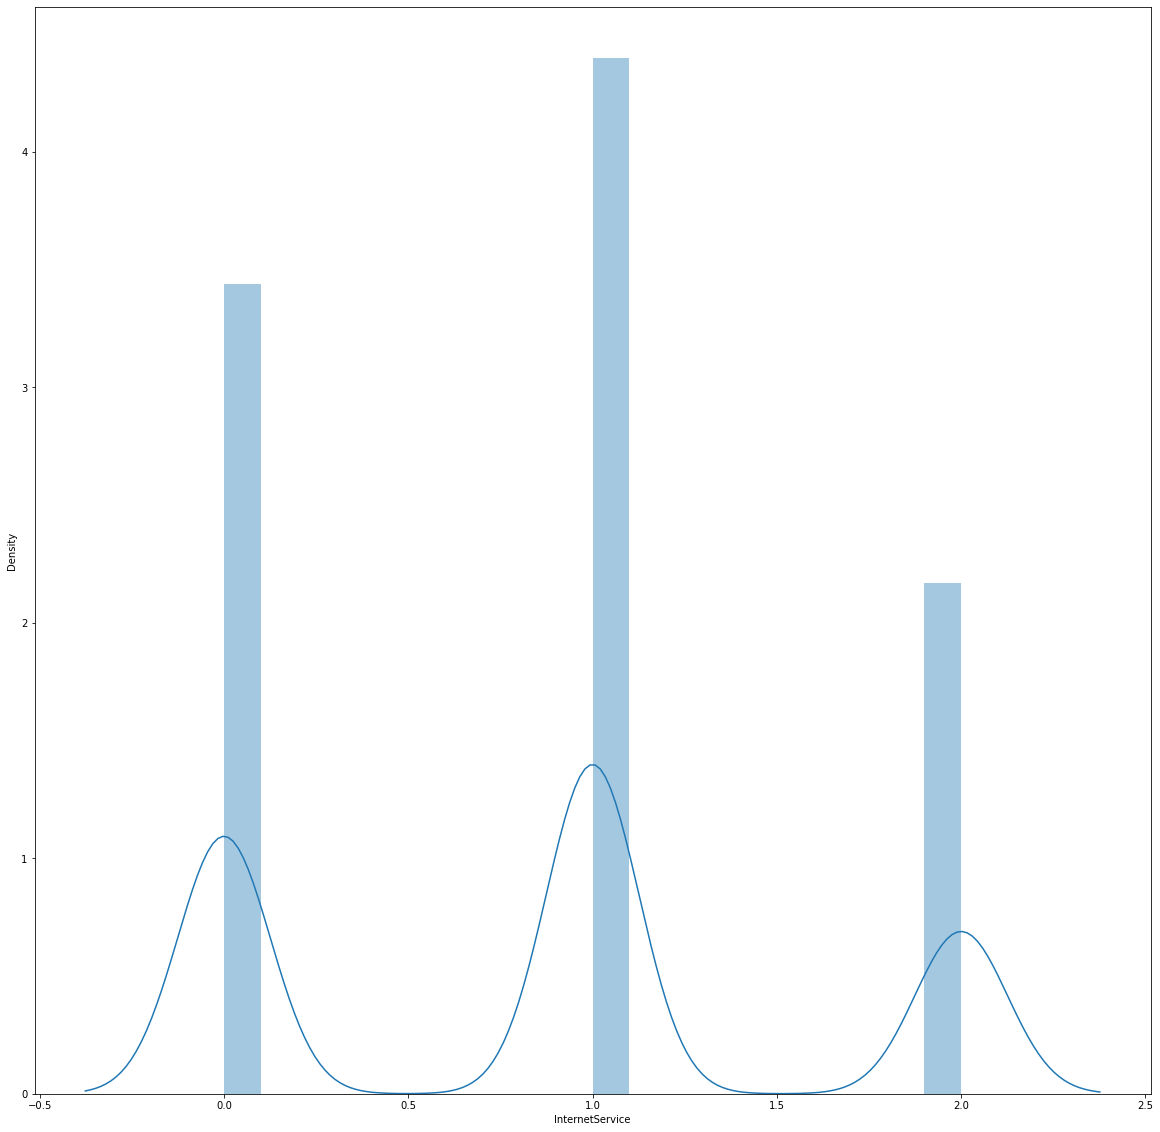

In [293]:
sns.distplot(Tele['InternetService'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

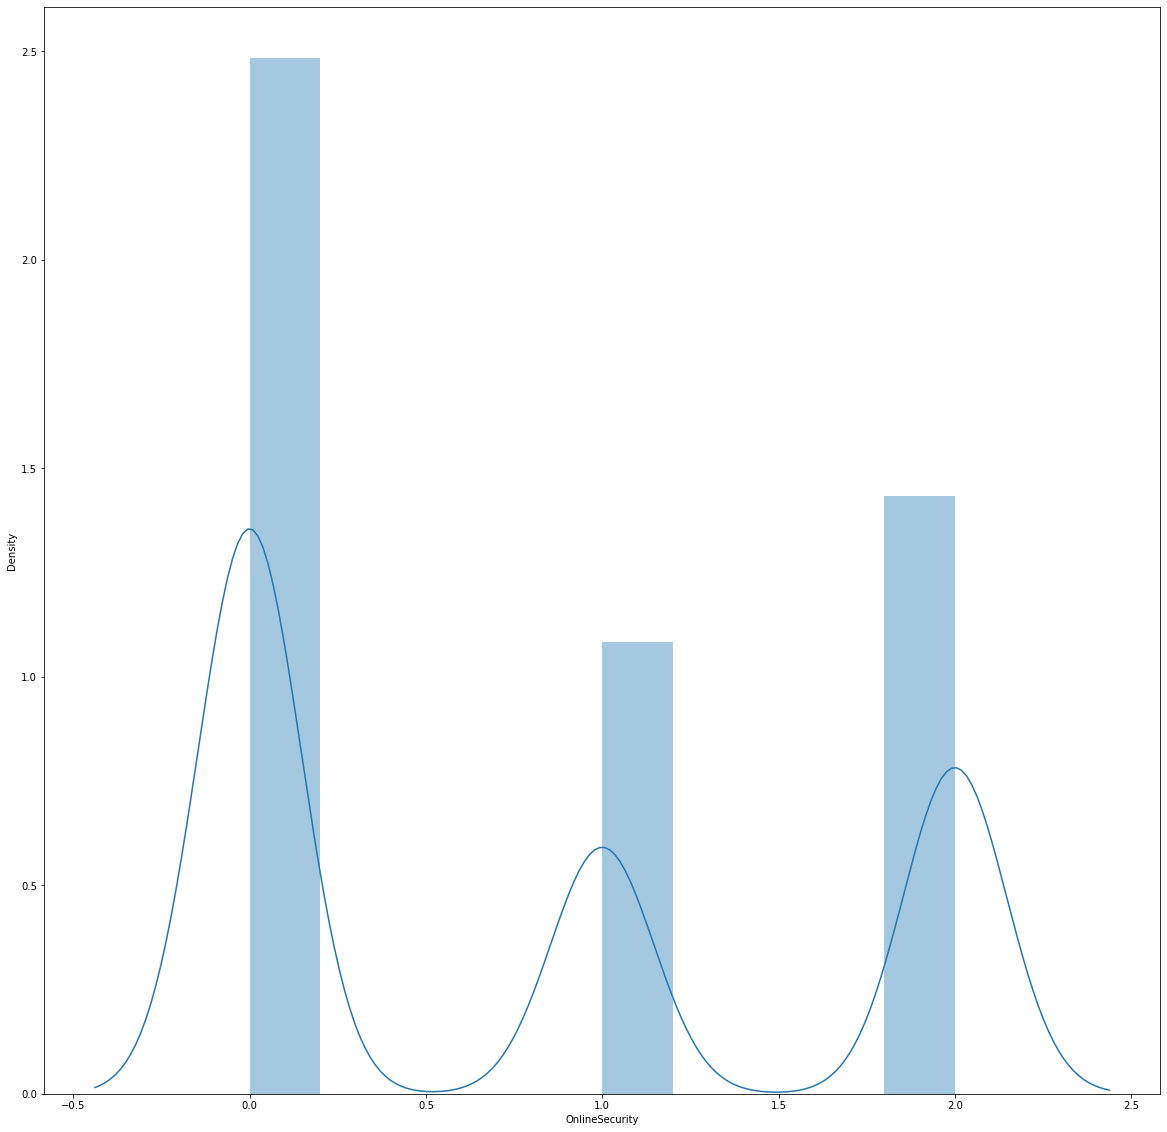

In [294]:
sns.distplot(Tele['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

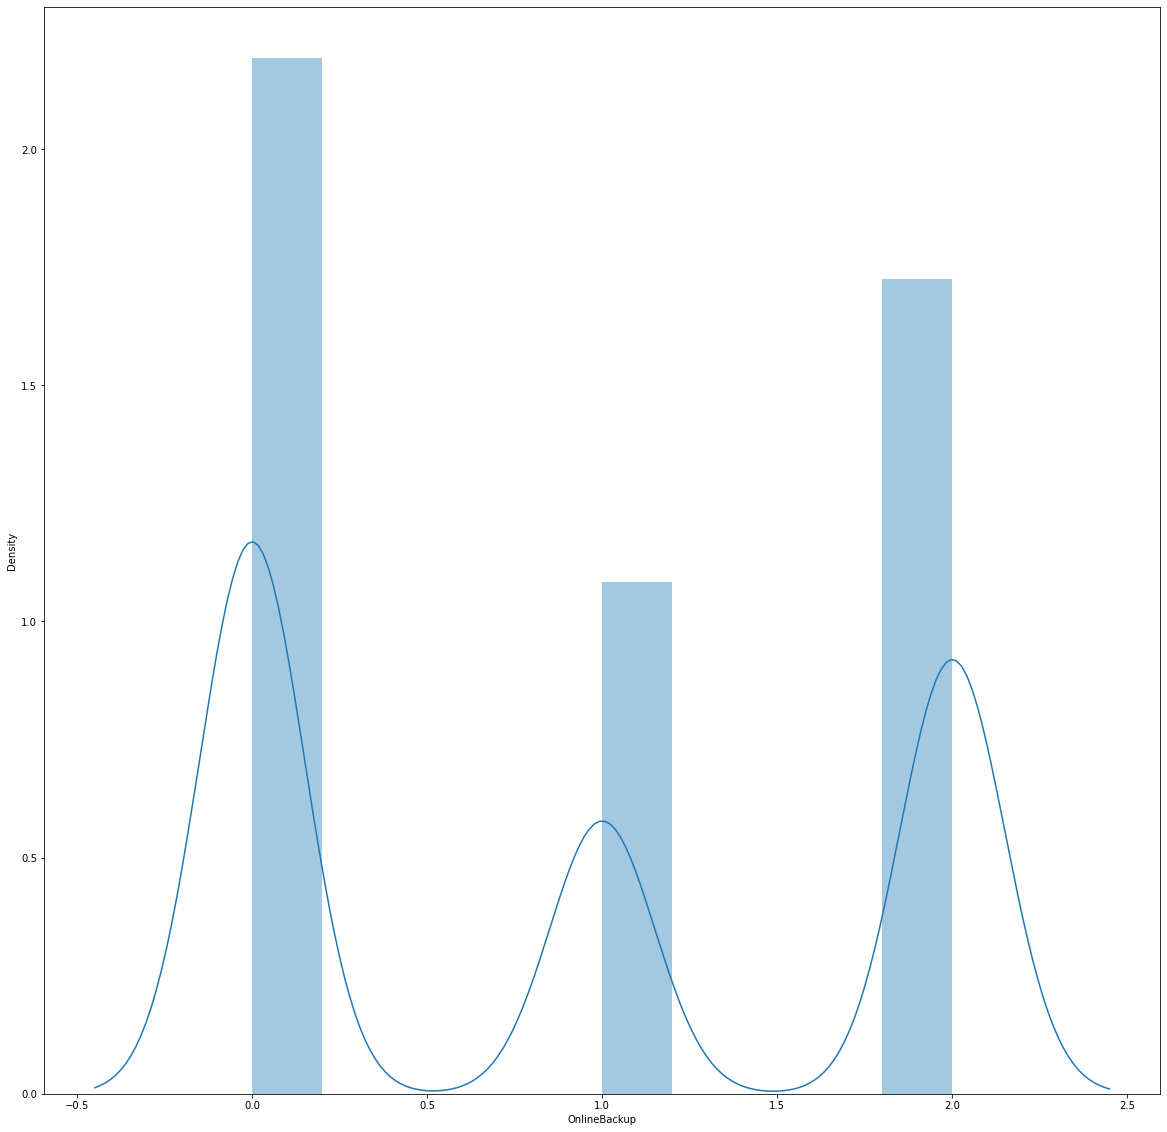

In [295]:
sns.distplot(Tele['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

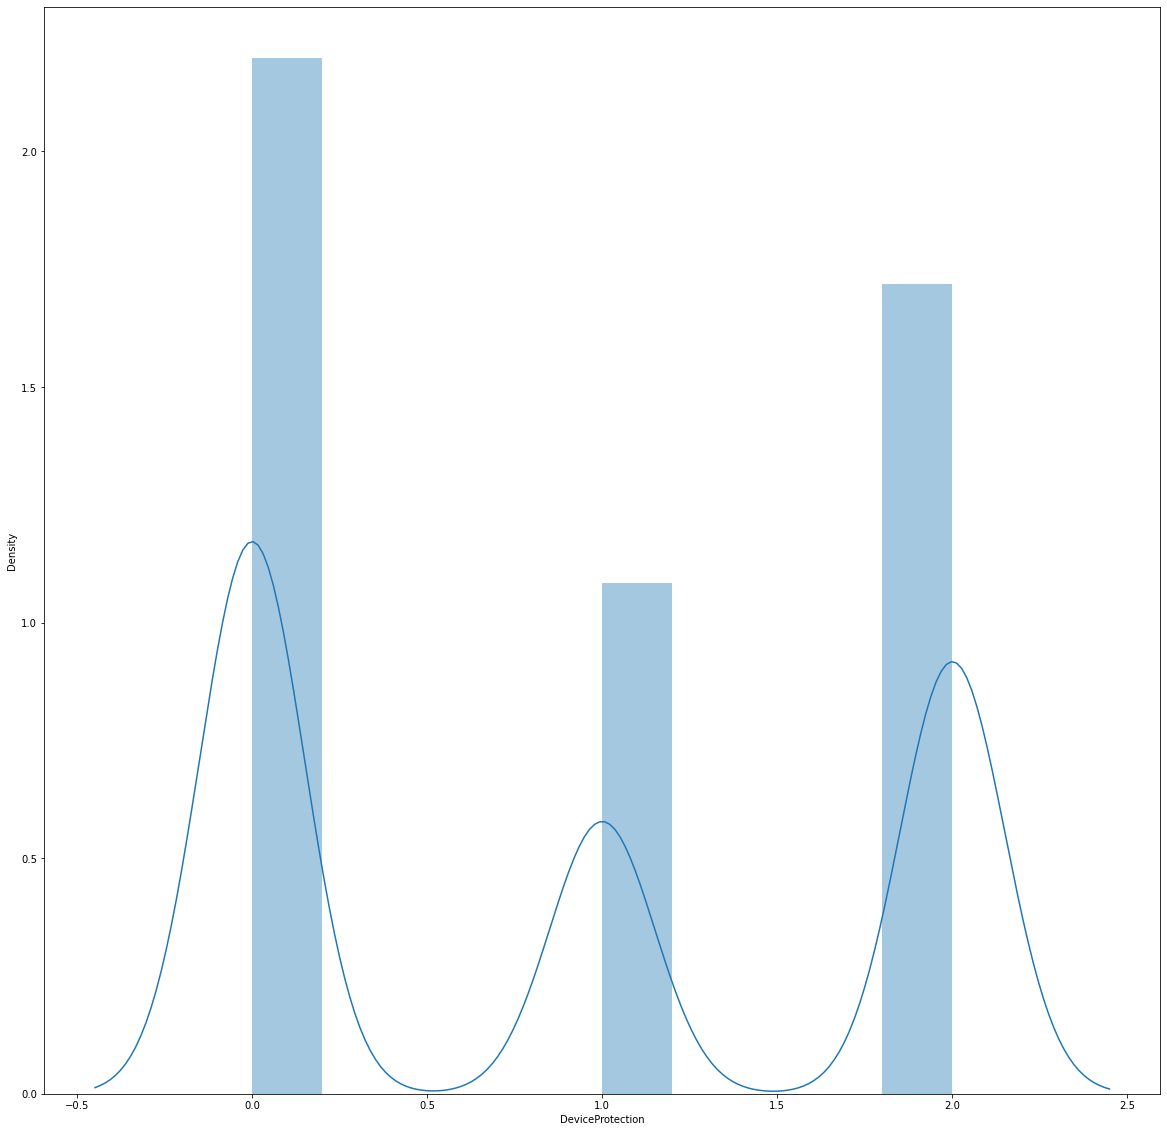

In [296]:
sns.distplot(Tele['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

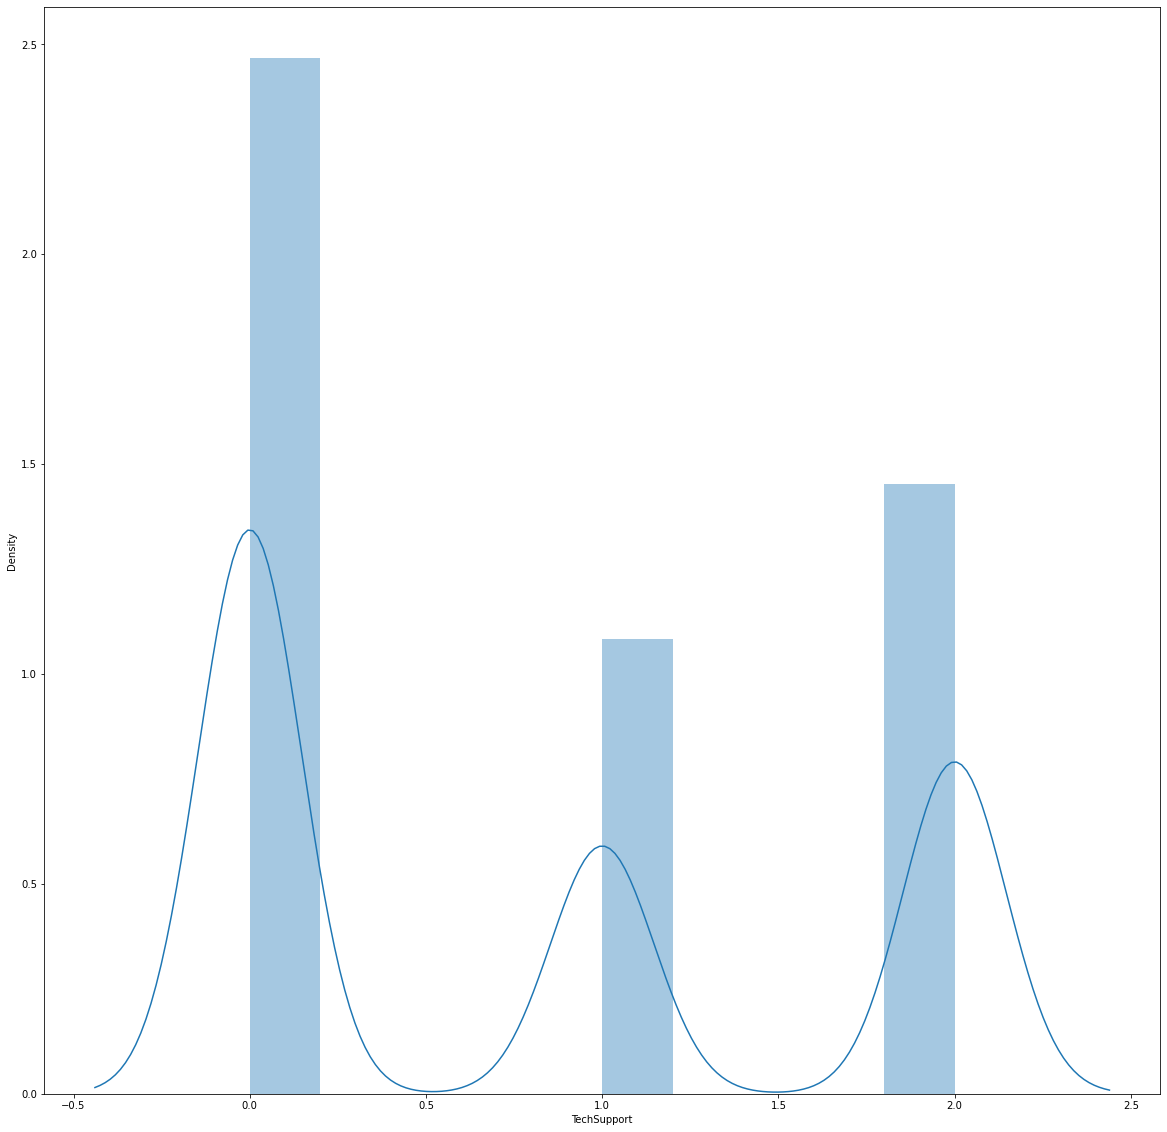

In [297]:
sns.distplot(Tele['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

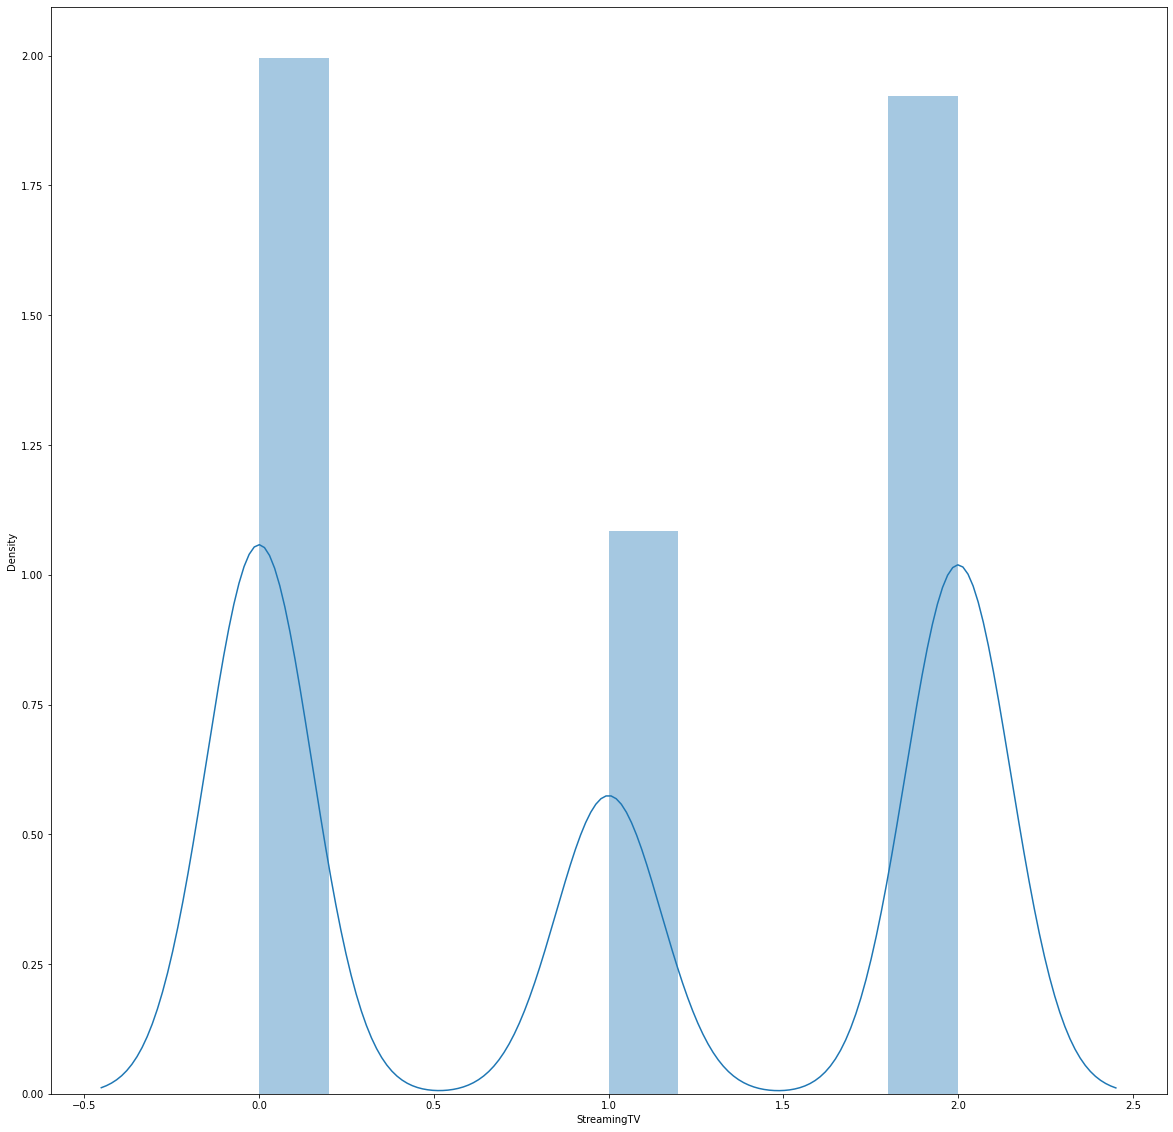

In [298]:
sns.distplot(Tele['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

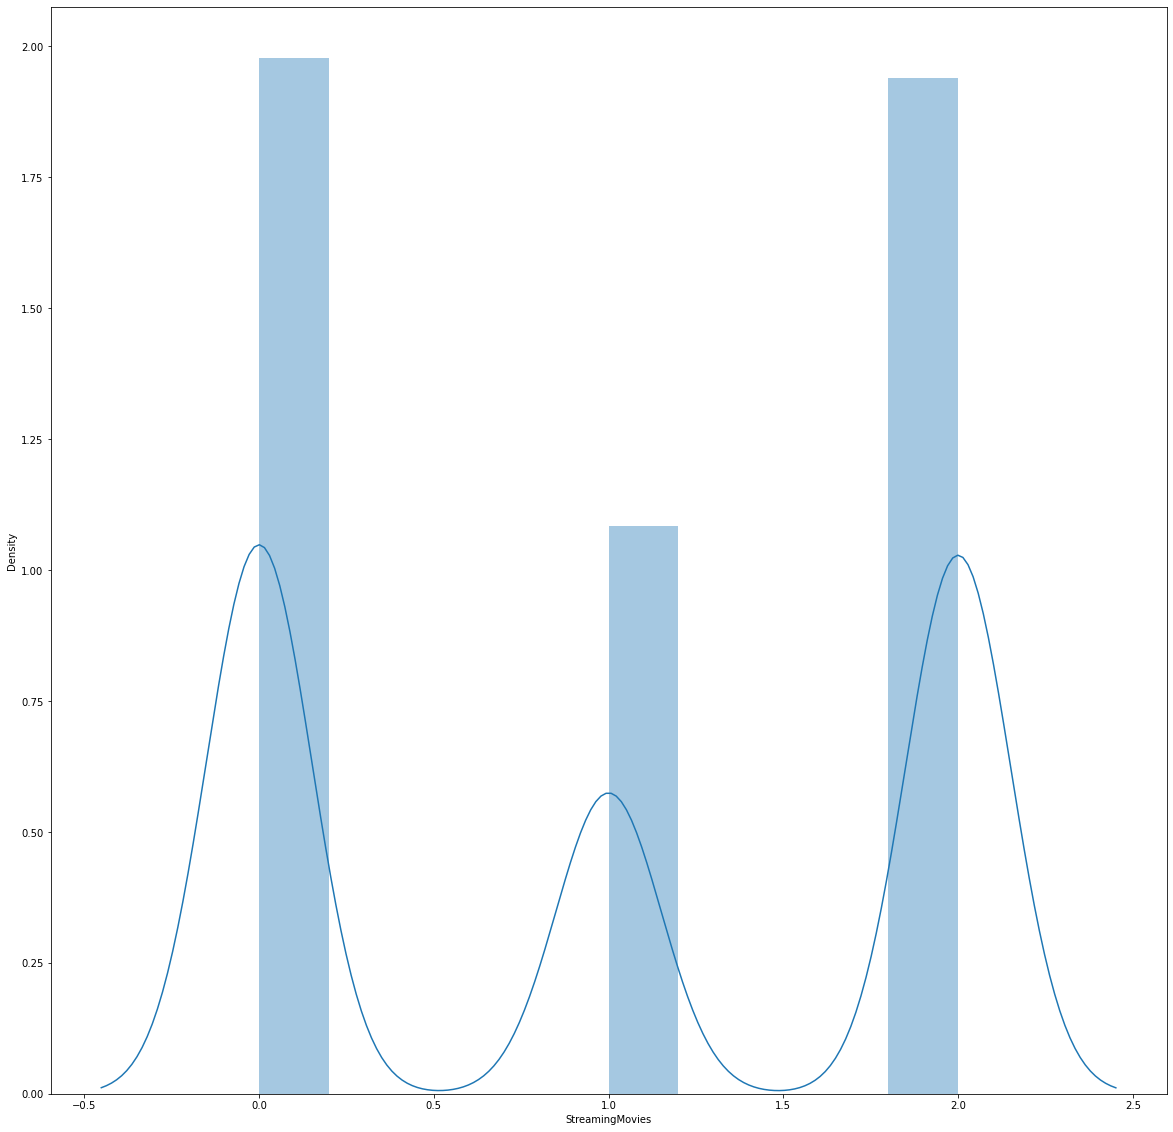

In [299]:
sns.distplot(Tele['StreamingMovies'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

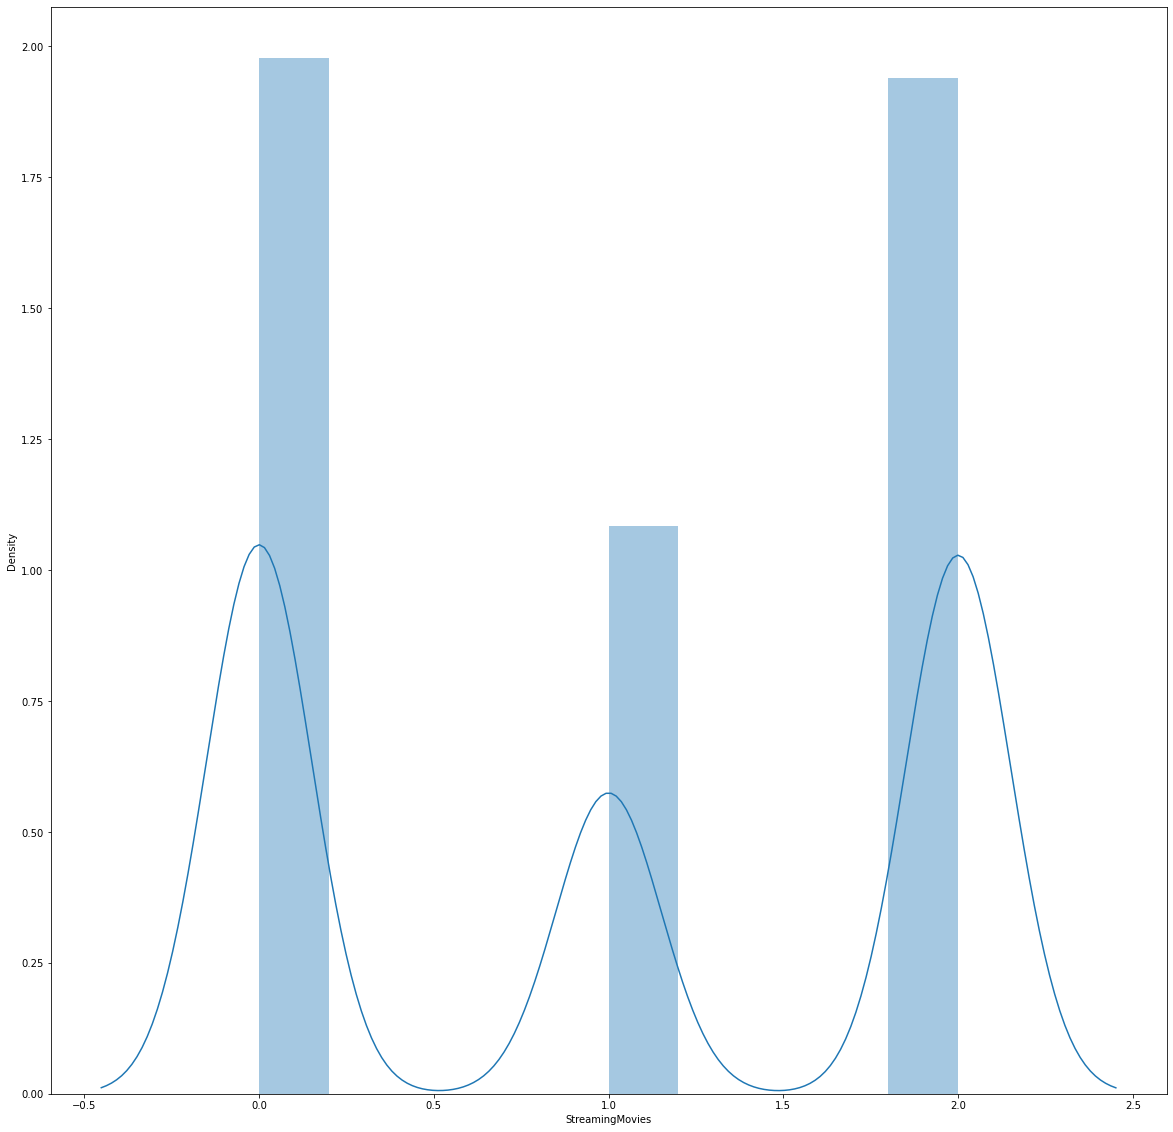

In [300]:
sns.distplot(Tele['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

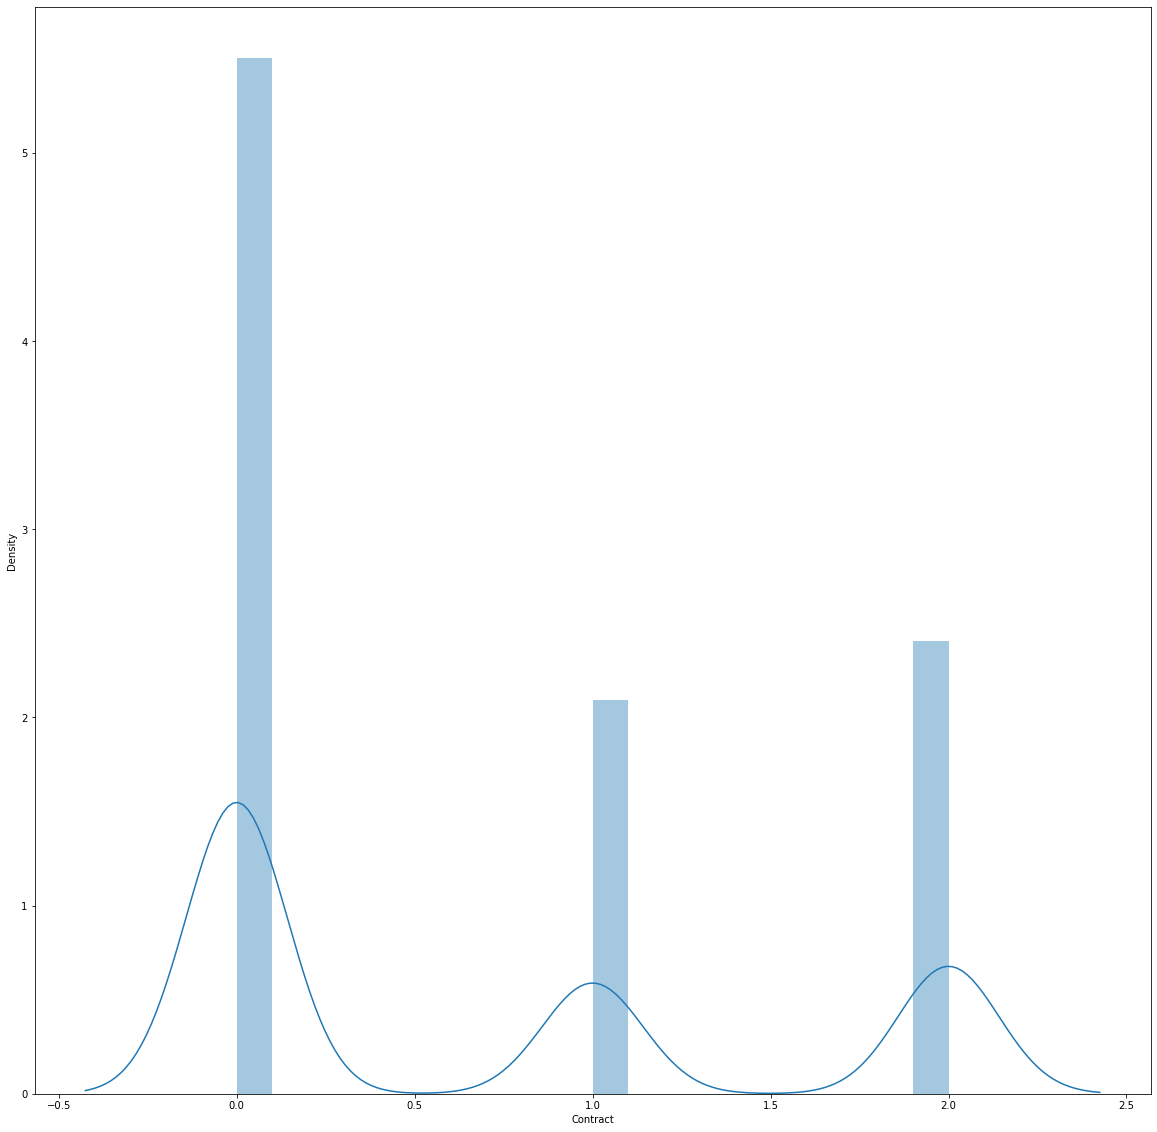

In [301]:
sns.distplot(Tele['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

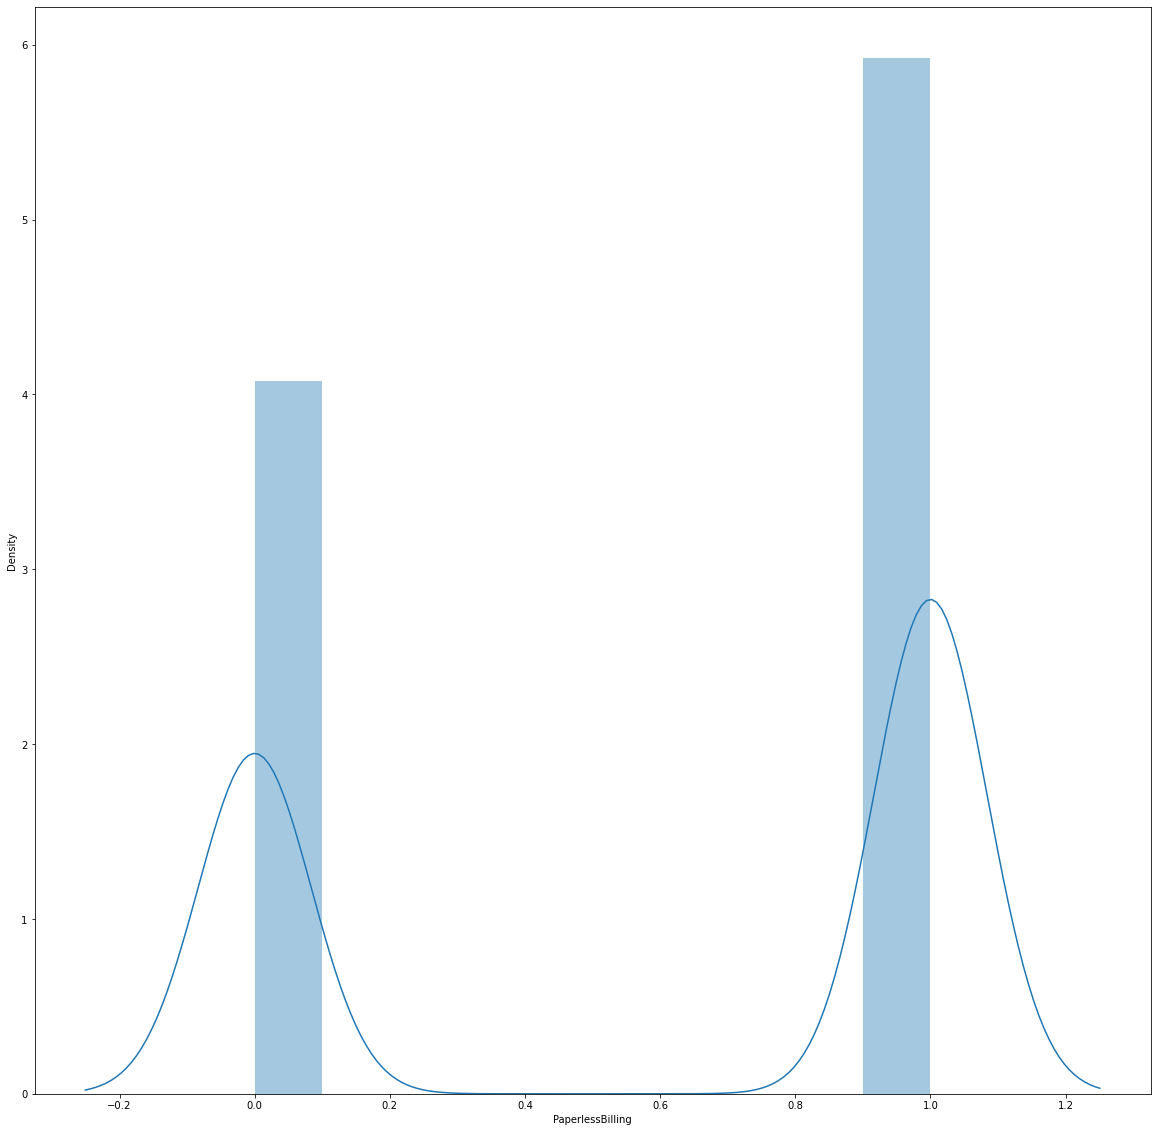

In [302]:
sns.distplot(Tele['PaperlessBilling'])

<AxesSubplot:xlabel='PaymentMethod', ylabel='Density'>

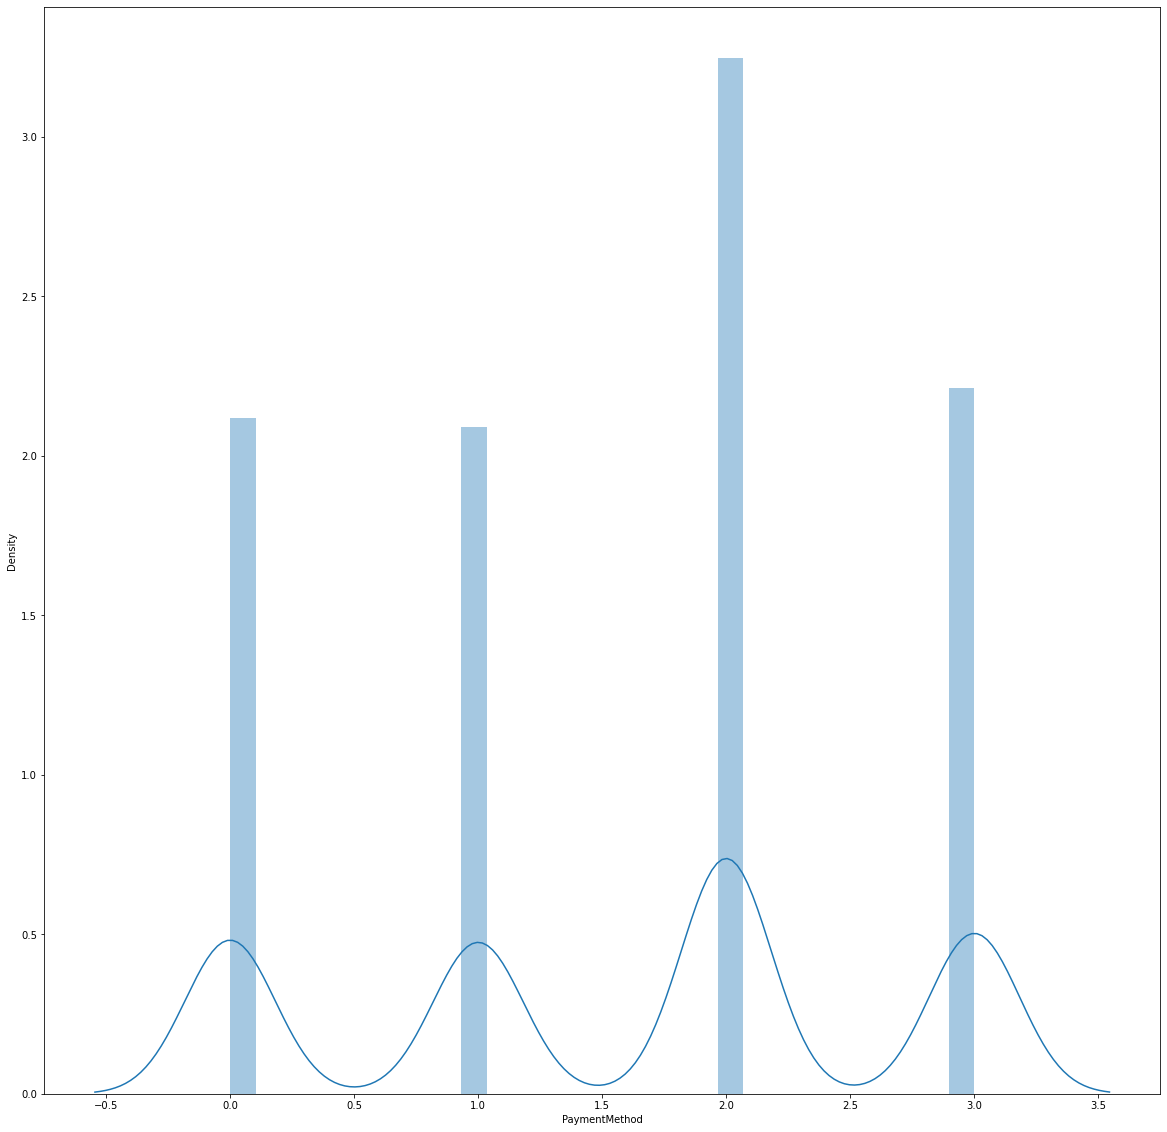

In [303]:
sns.distplot(Tele['PaymentMethod'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

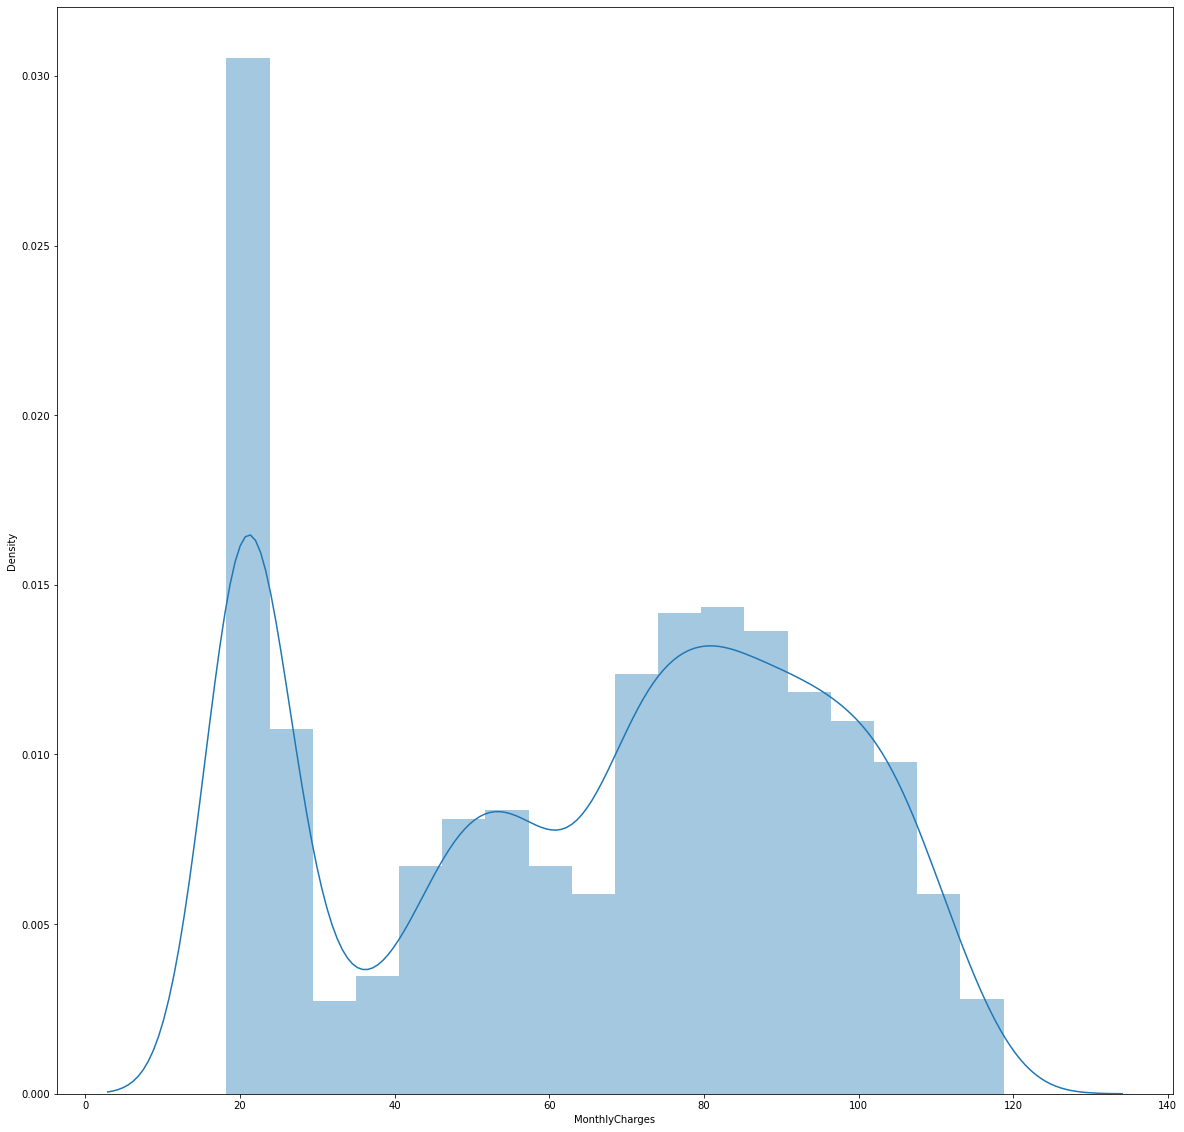

In [304]:
sns.distplot(Tele['MonthlyCharges'])

<AxesSubplot:xlabel='Churn', ylabel='Density'>

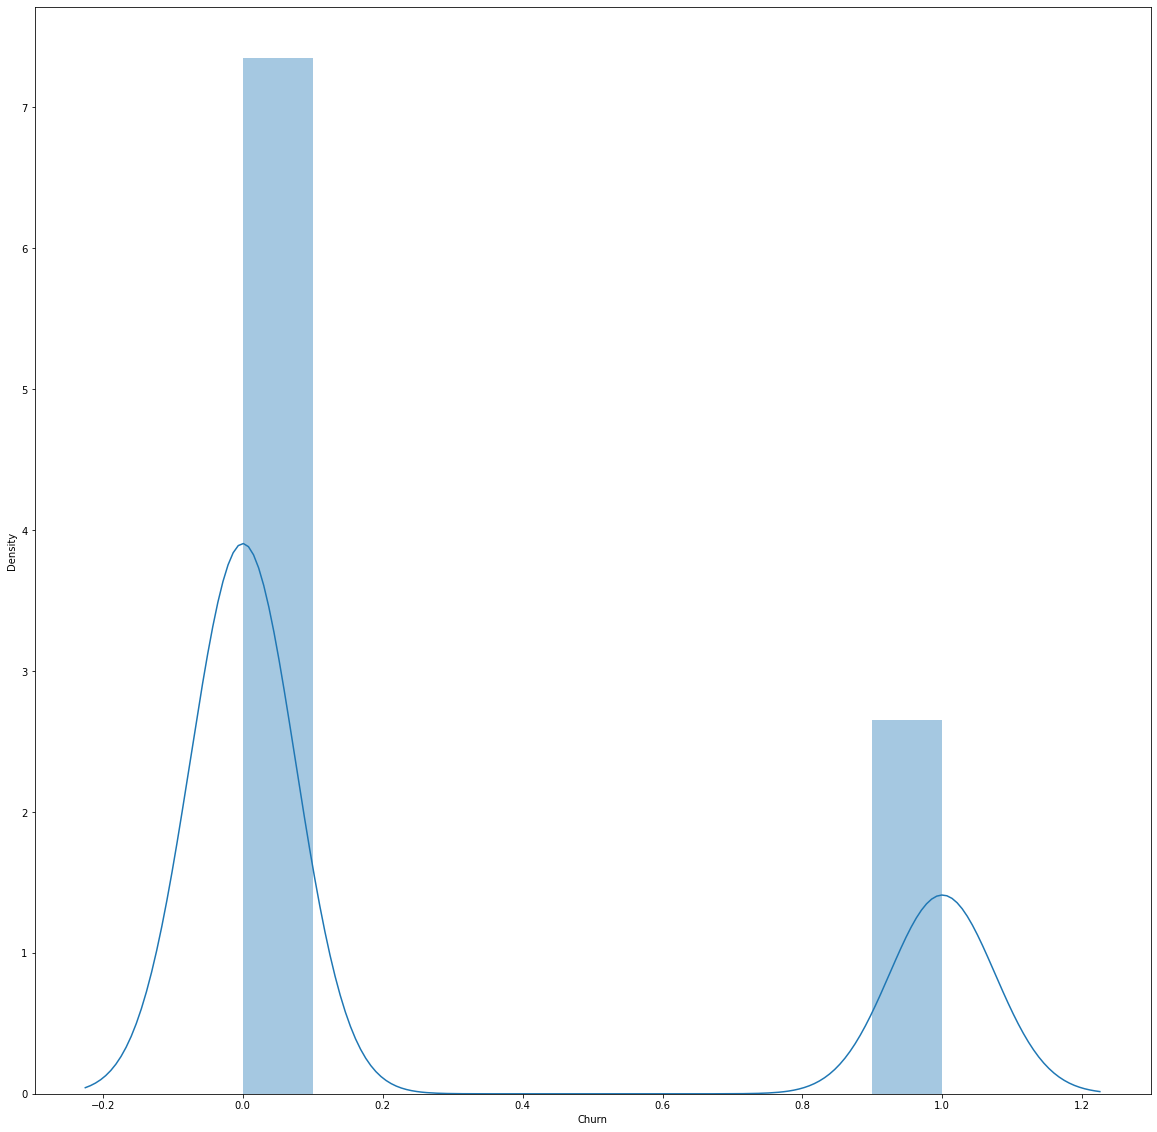

In [305]:
sns.distplot(Tele['Churn'])

# Bivarate


<AxesSubplot:xlabel='gender', ylabel='Churn'>

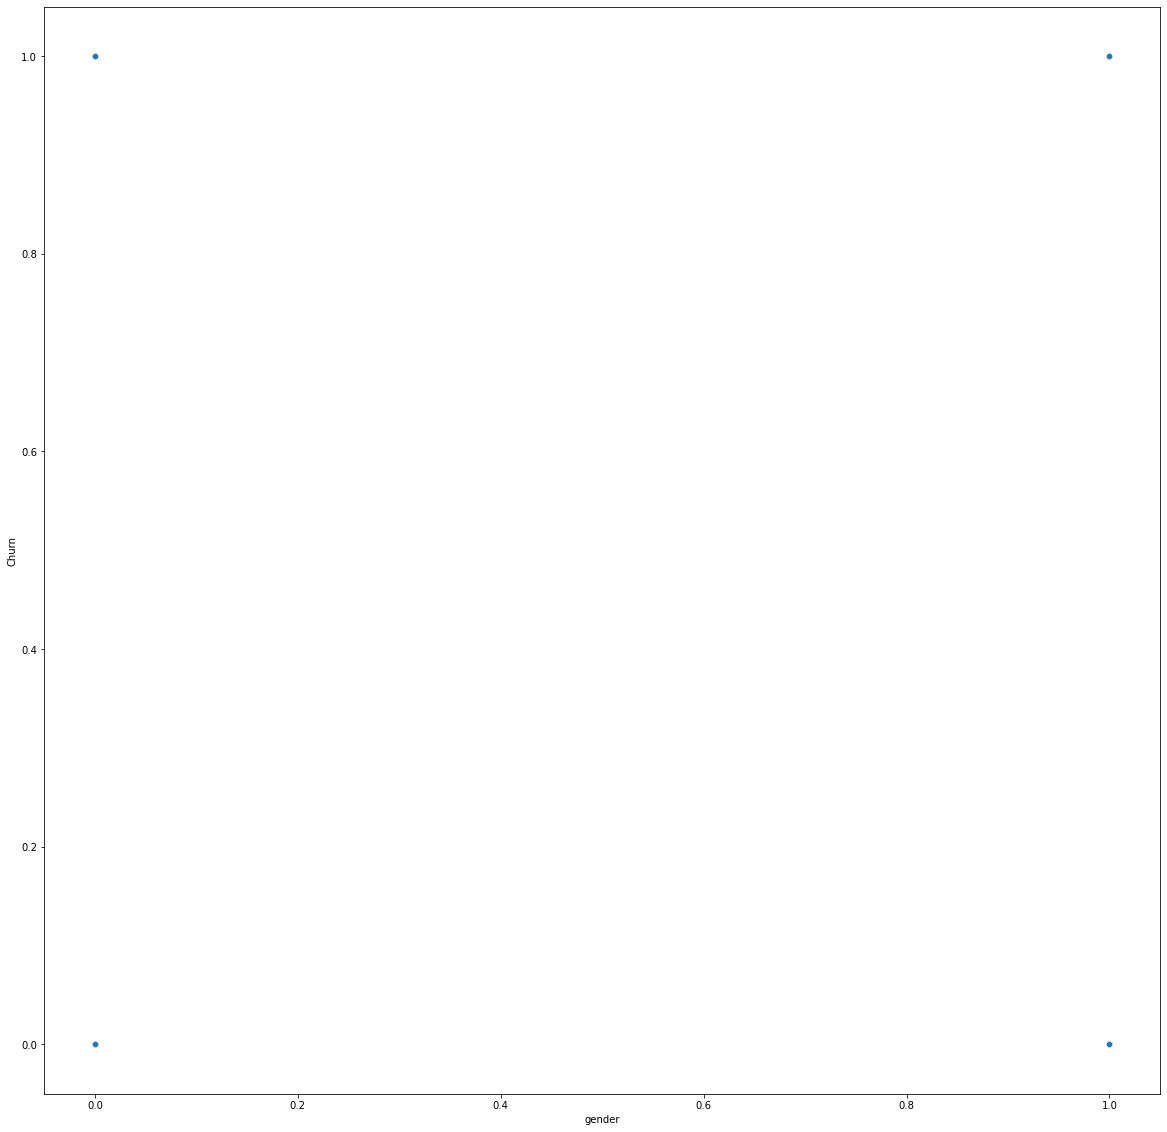

In [306]:
sns.scatterplot(x='gender',y='Churn',data=Tele)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

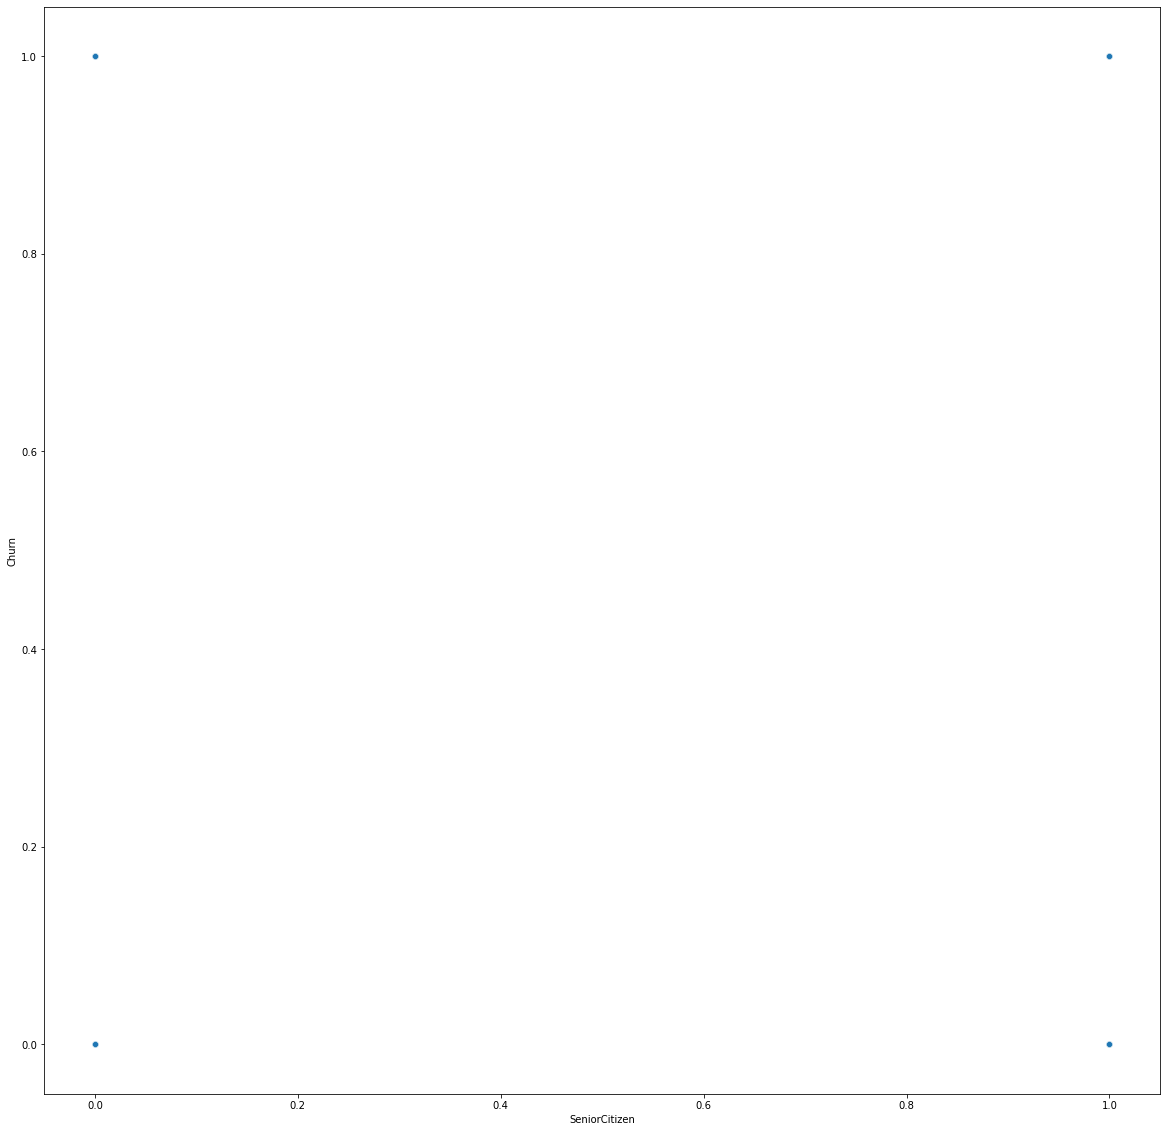

In [307]:
sns.scatterplot(x='SeniorCitizen',y='Churn',data=Tele)

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

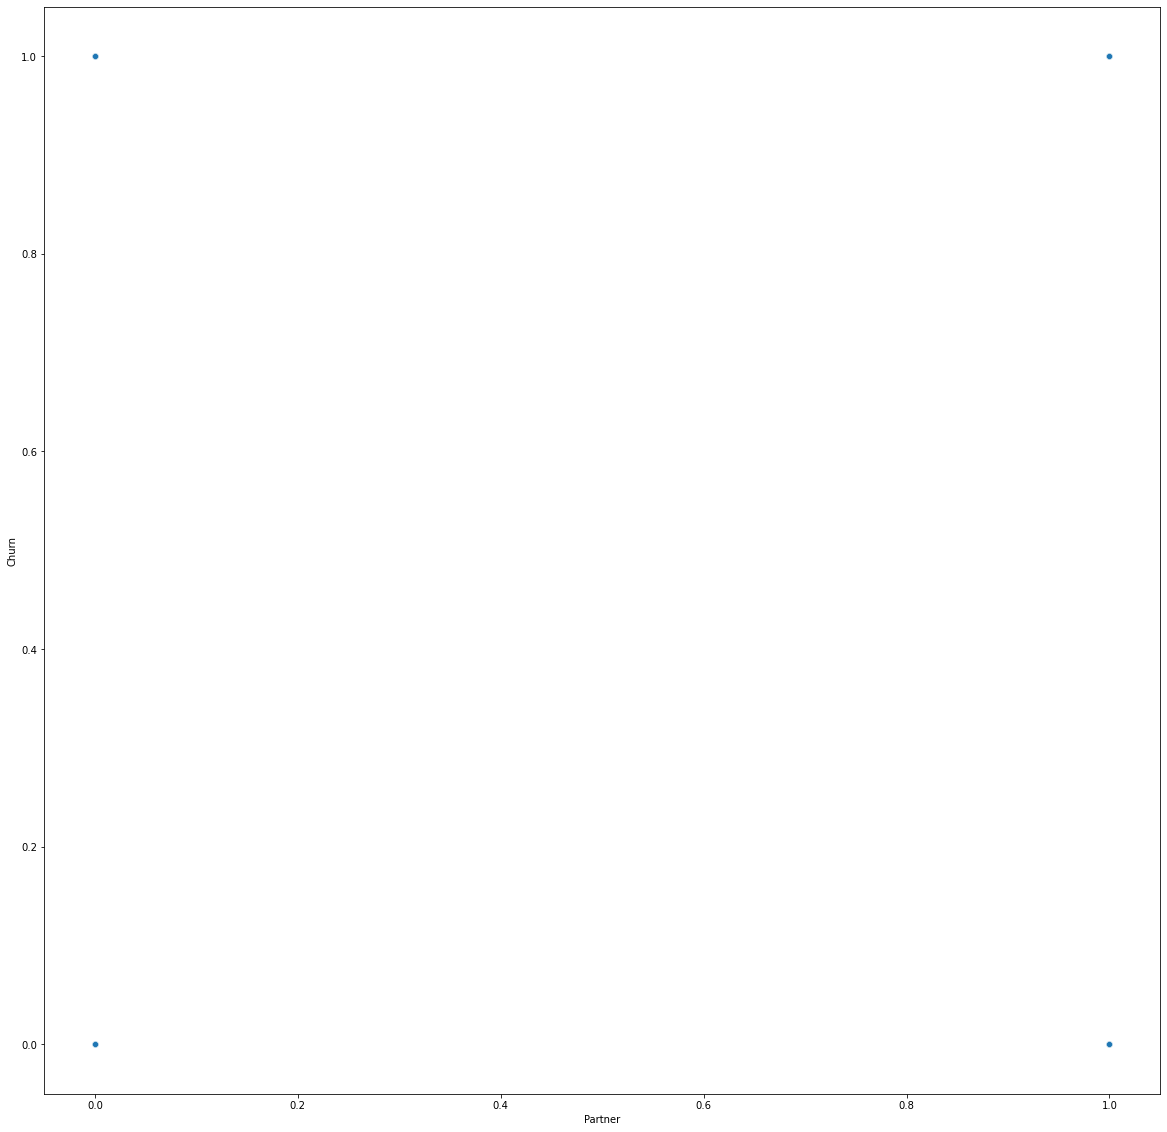

In [308]:
sns.scatterplot(x='Partner',y='Churn',data=Tele)

<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

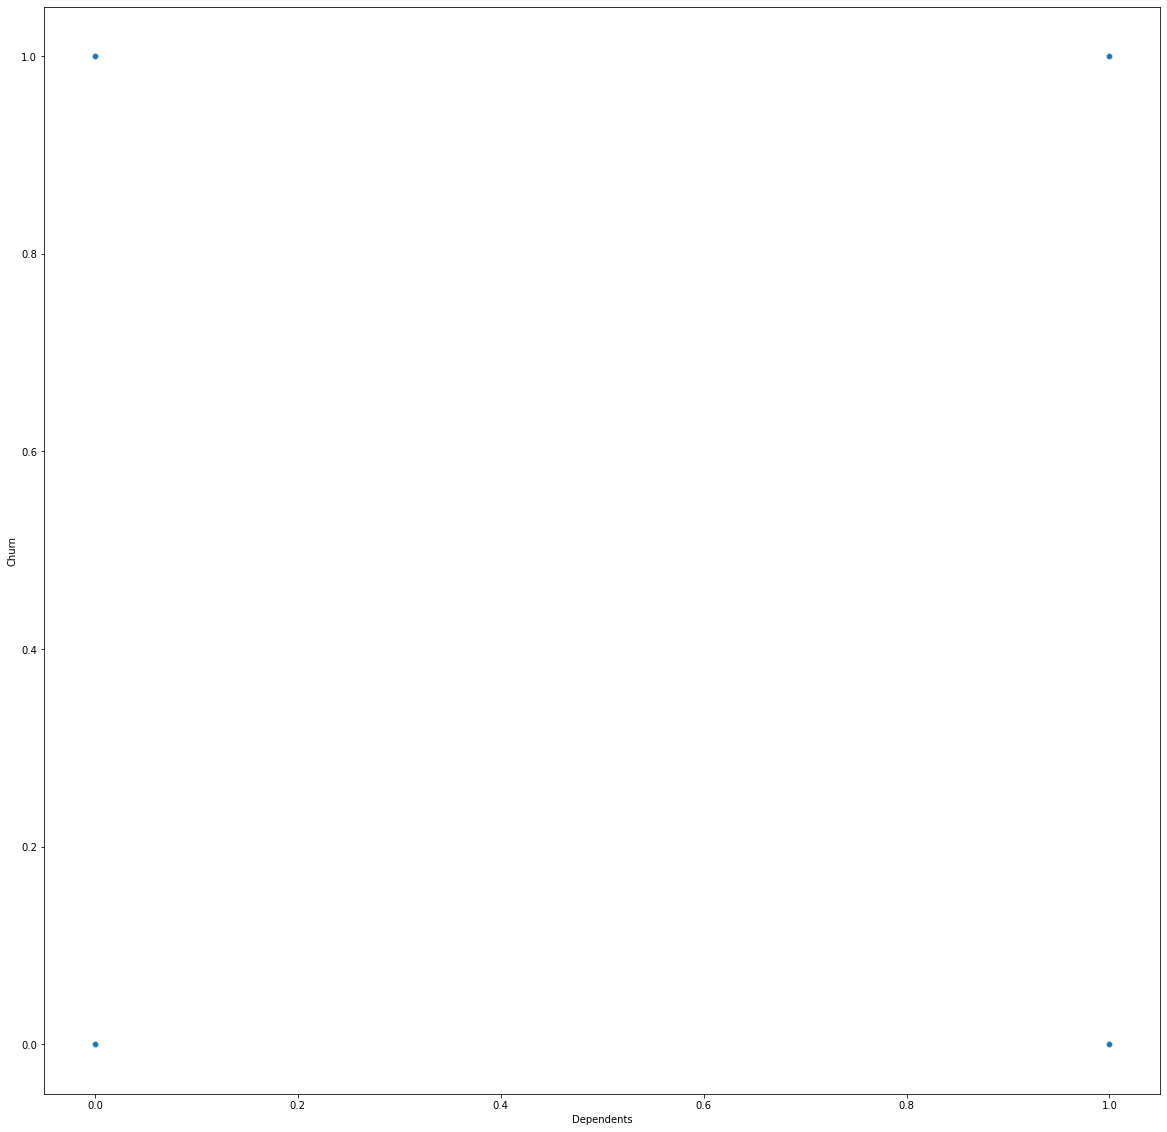

In [309]:
sns.scatterplot(x='Dependents',y='Churn',data=Tele)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

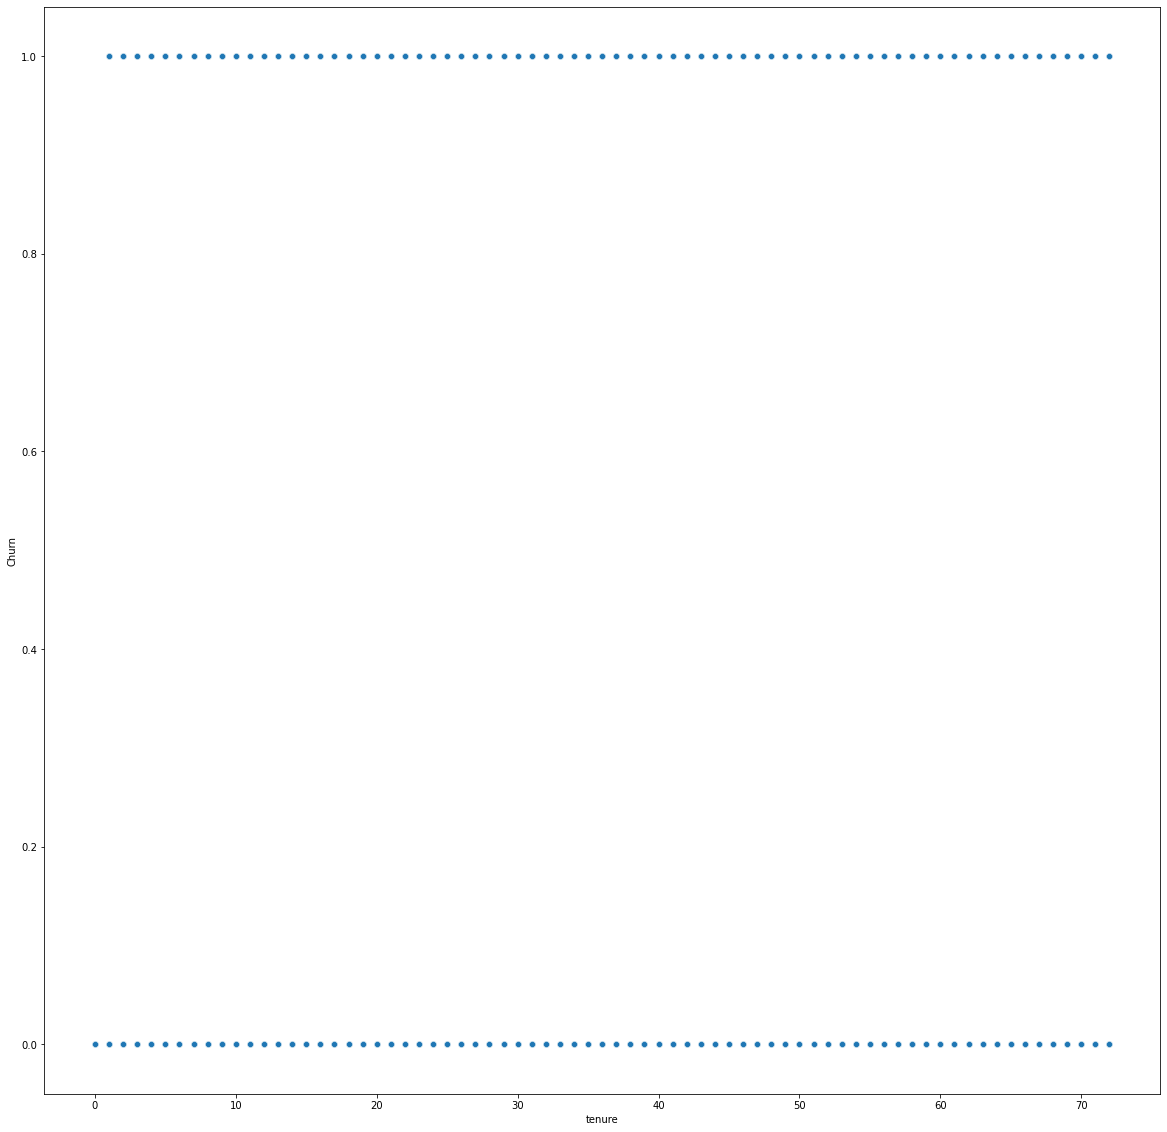

In [310]:
sns.scatterplot(x='tenure',y='Churn',data=Tele)

<AxesSubplot:xlabel='PhoneService', ylabel='Churn'>

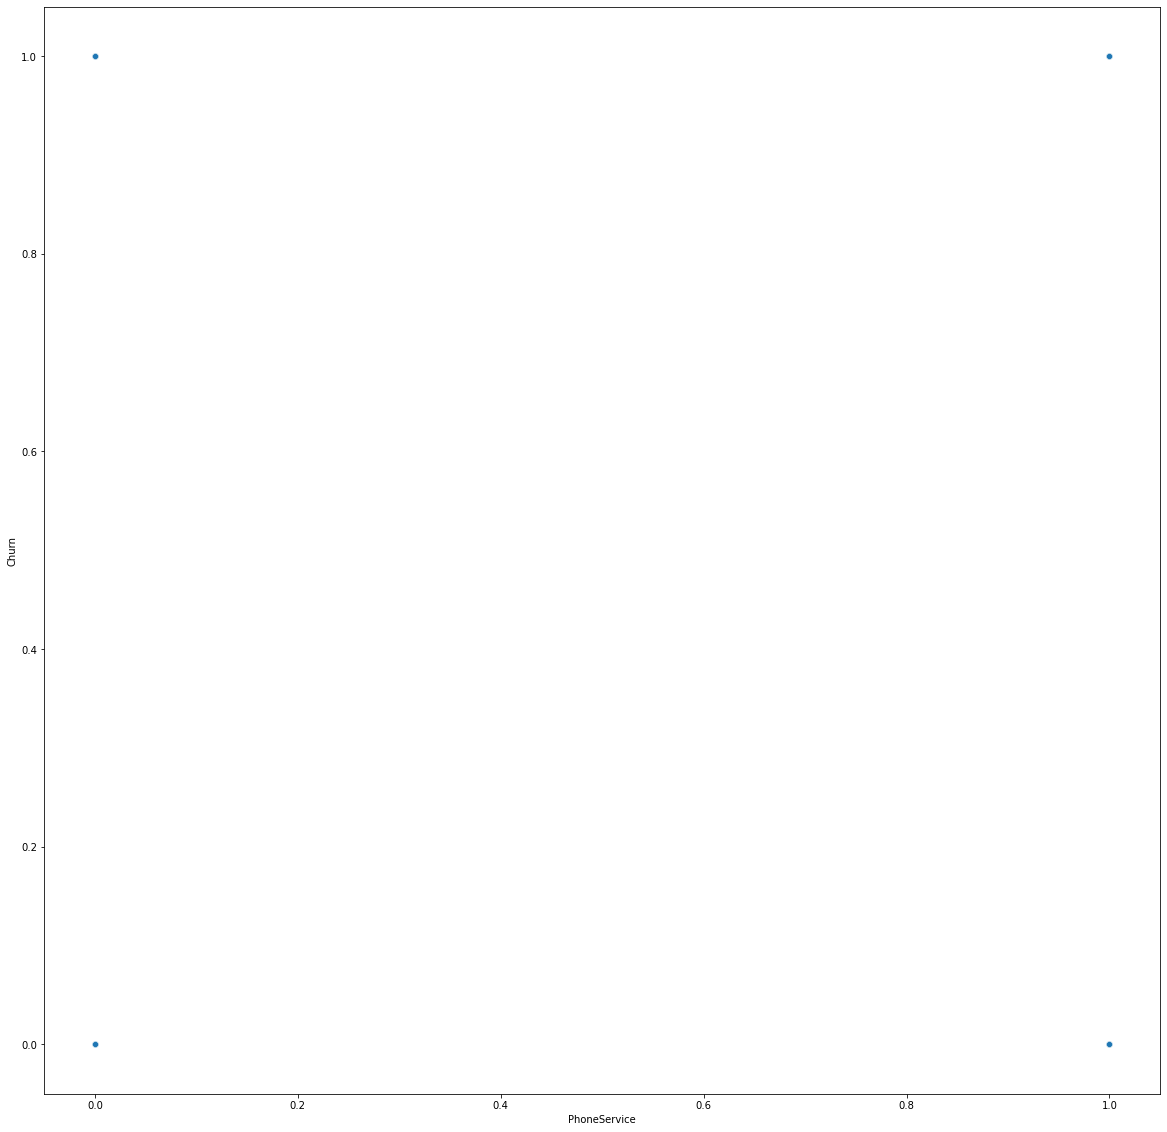

In [311]:
sns.scatterplot(x='PhoneService',y='Churn',data=Tele)

<AxesSubplot:xlabel='MultipleLines', ylabel='Churn'>

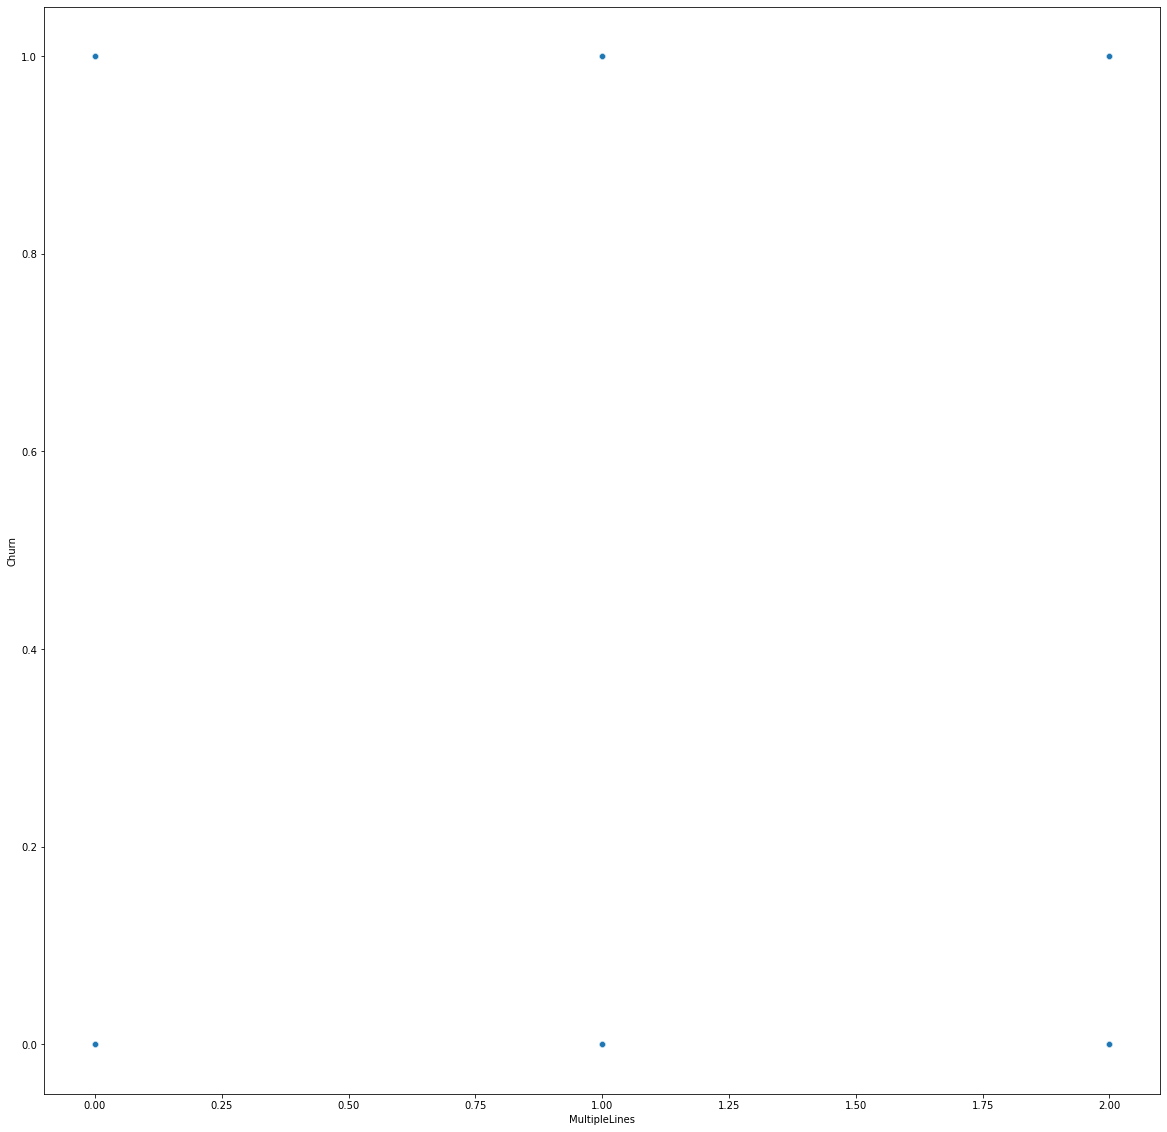

In [312]:
sns.scatterplot(x='MultipleLines',y='Churn',data=Tele)

<AxesSubplot:xlabel='InternetService', ylabel='Churn'>

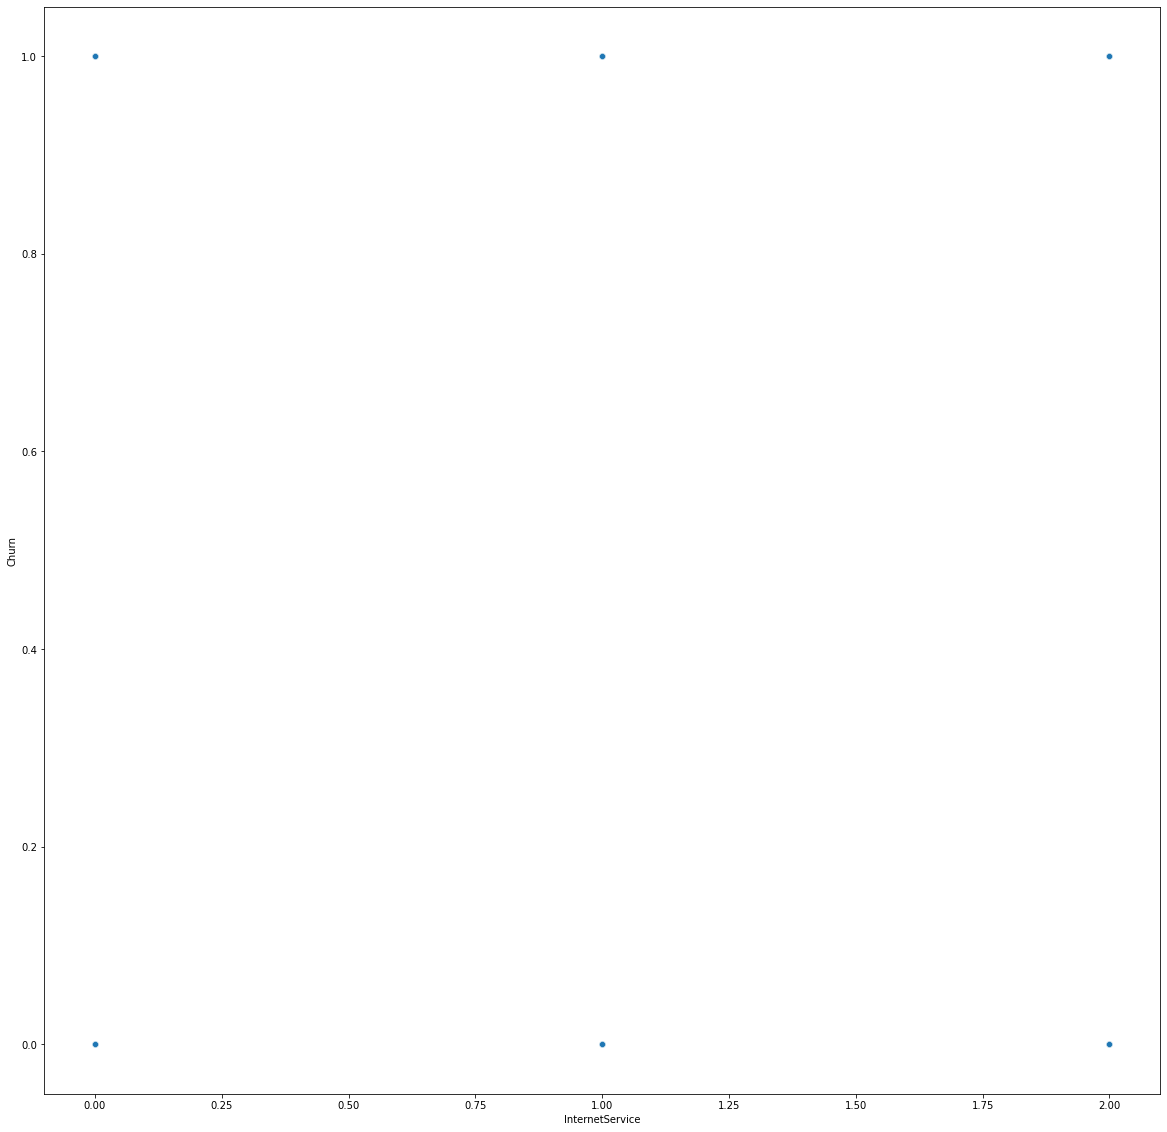

In [313]:
sns.scatterplot(x='InternetService',y='Churn',data=Tele)

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Churn'>

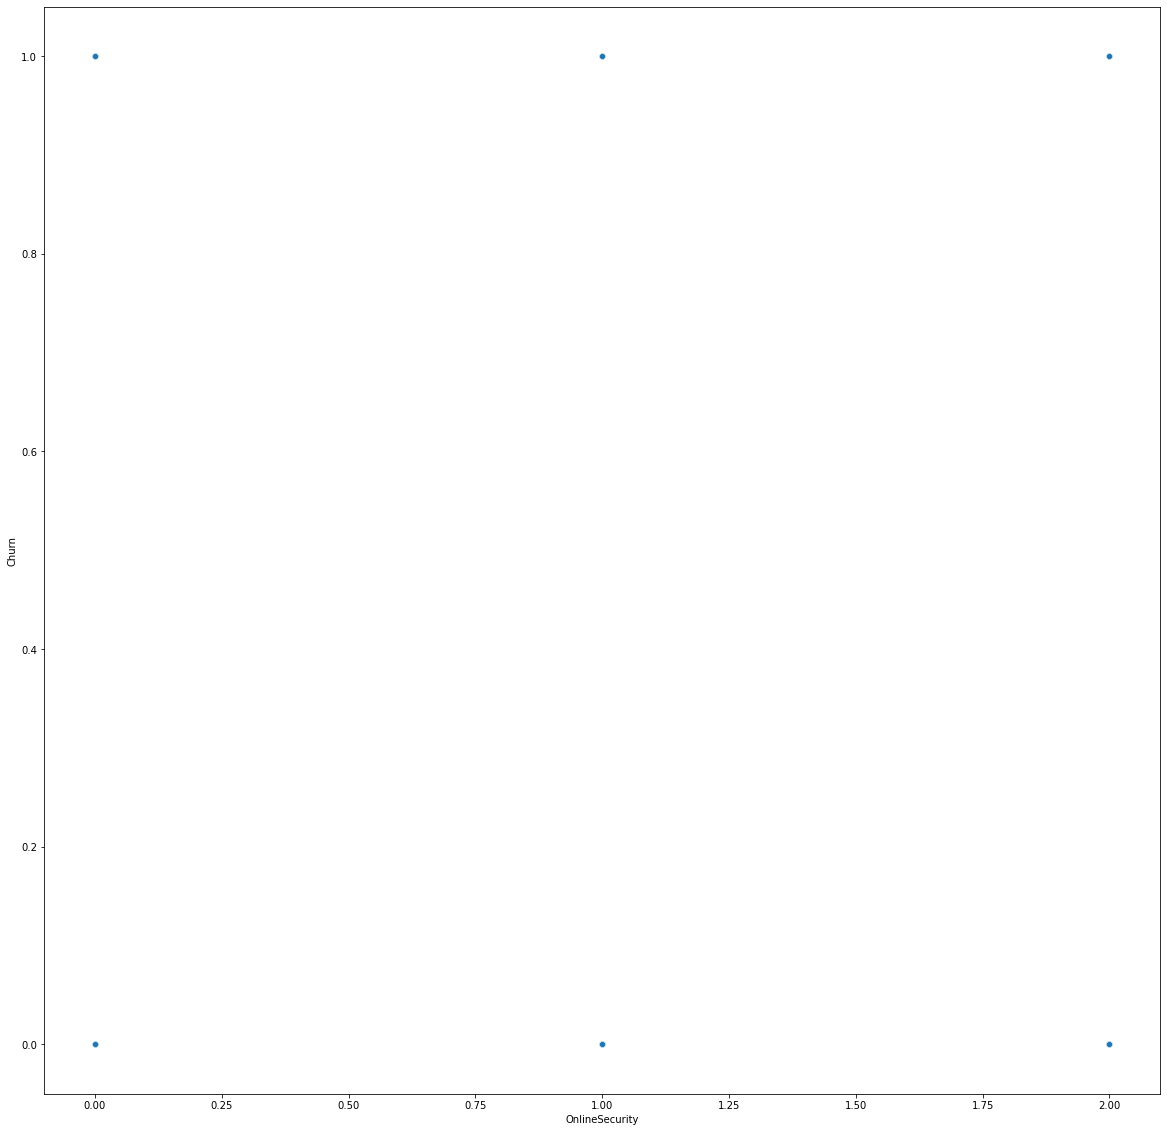

In [314]:
sns.scatterplot(x='OnlineSecurity',y='Churn',data=Tele)

<AxesSubplot:xlabel='OnlineBackup', ylabel='Churn'>

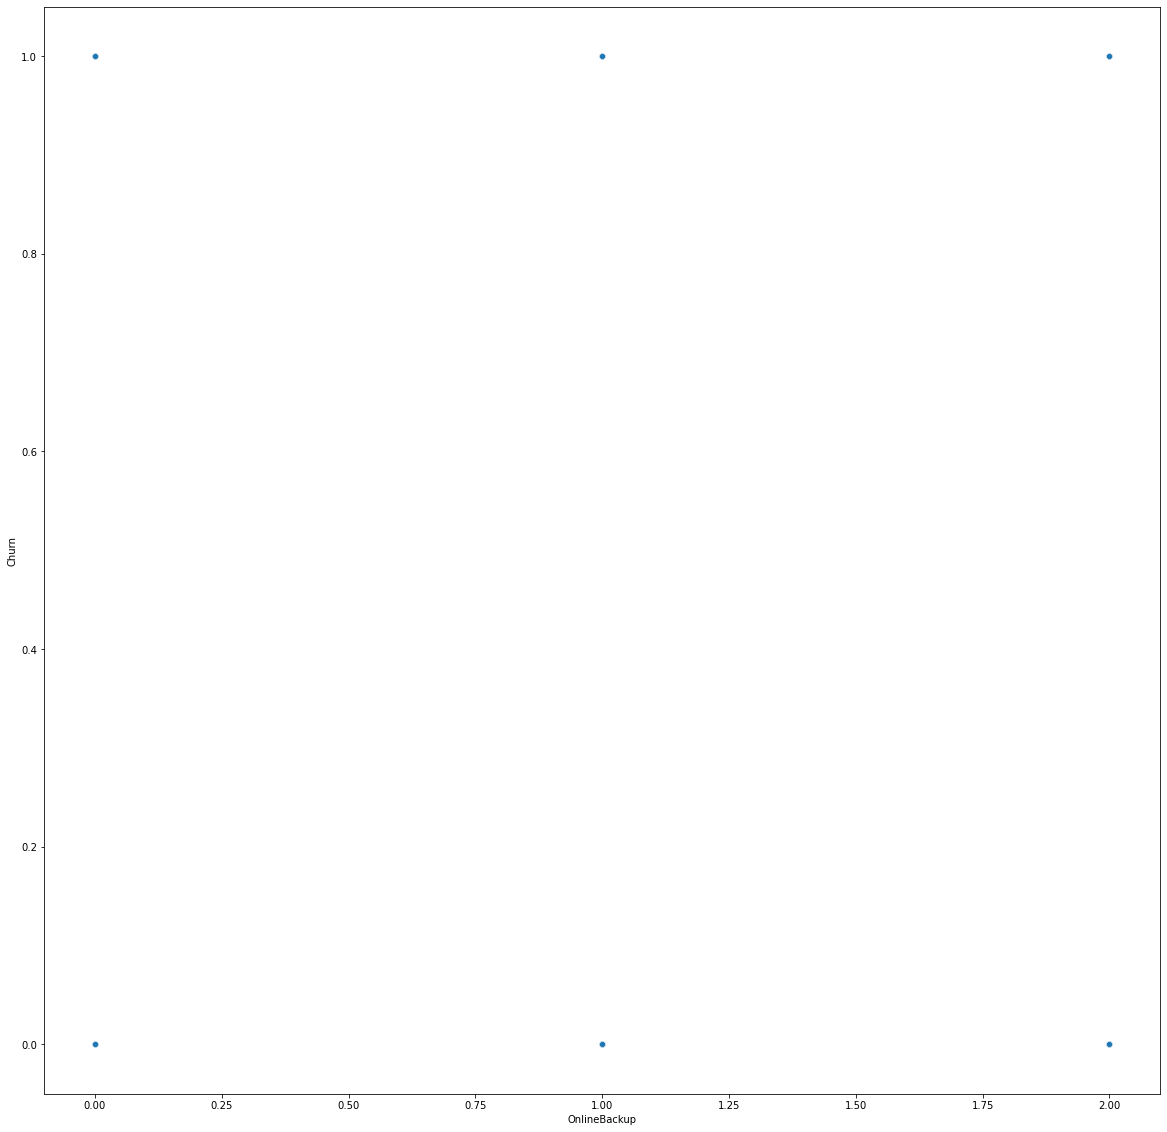

In [315]:
sns.scatterplot(x='OnlineBackup',y='Churn',data=Tele)

<AxesSubplot:xlabel='DeviceProtection', ylabel='Churn'>

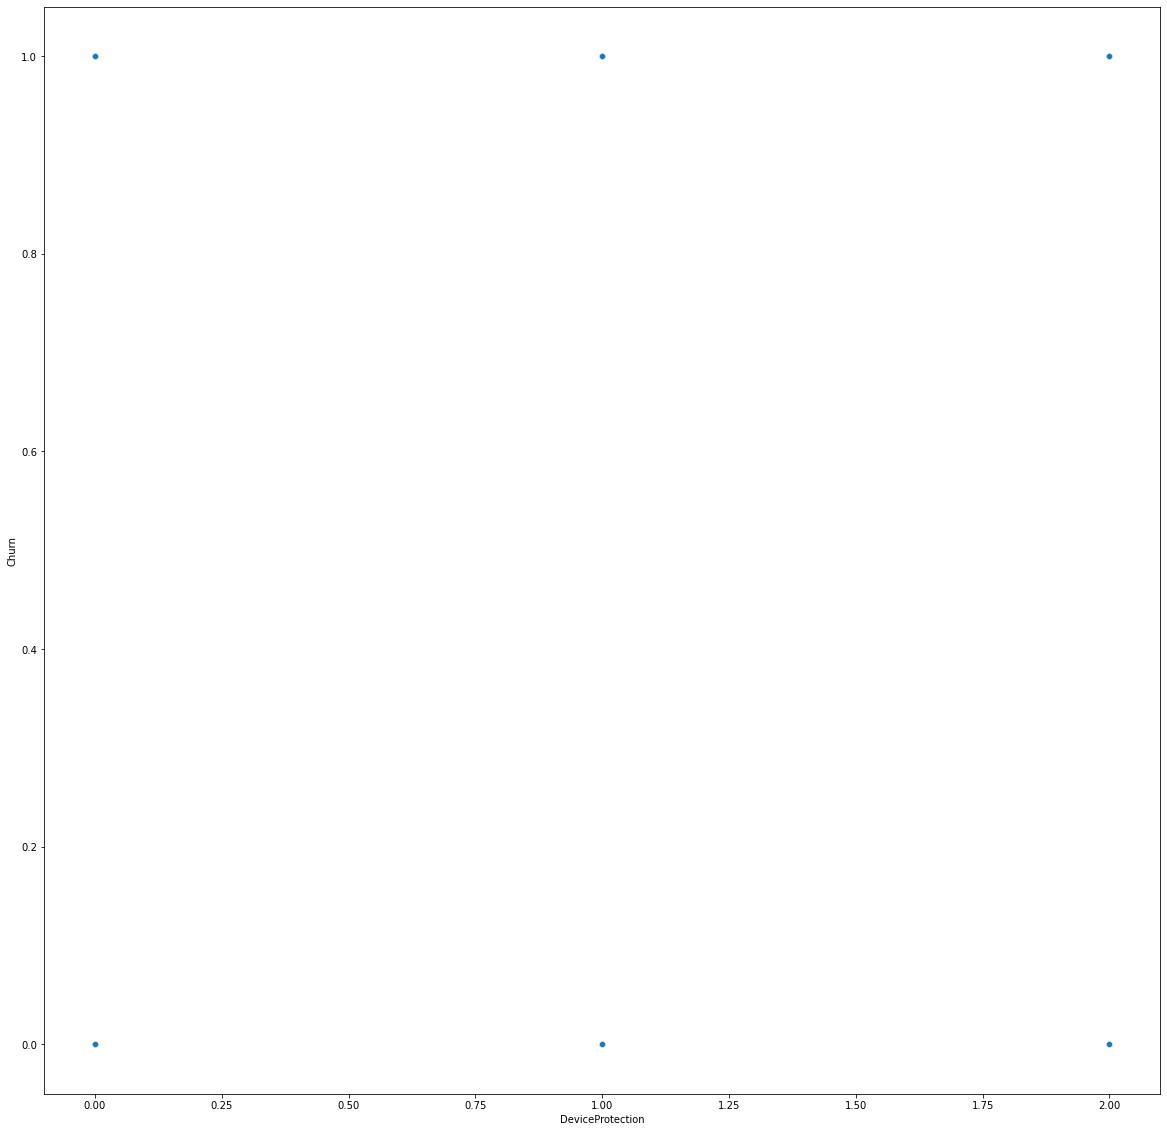

In [316]:
sns.scatterplot(x='DeviceProtection',y='Churn',data=Tele)

<AxesSubplot:xlabel='TechSupport', ylabel='Churn'>

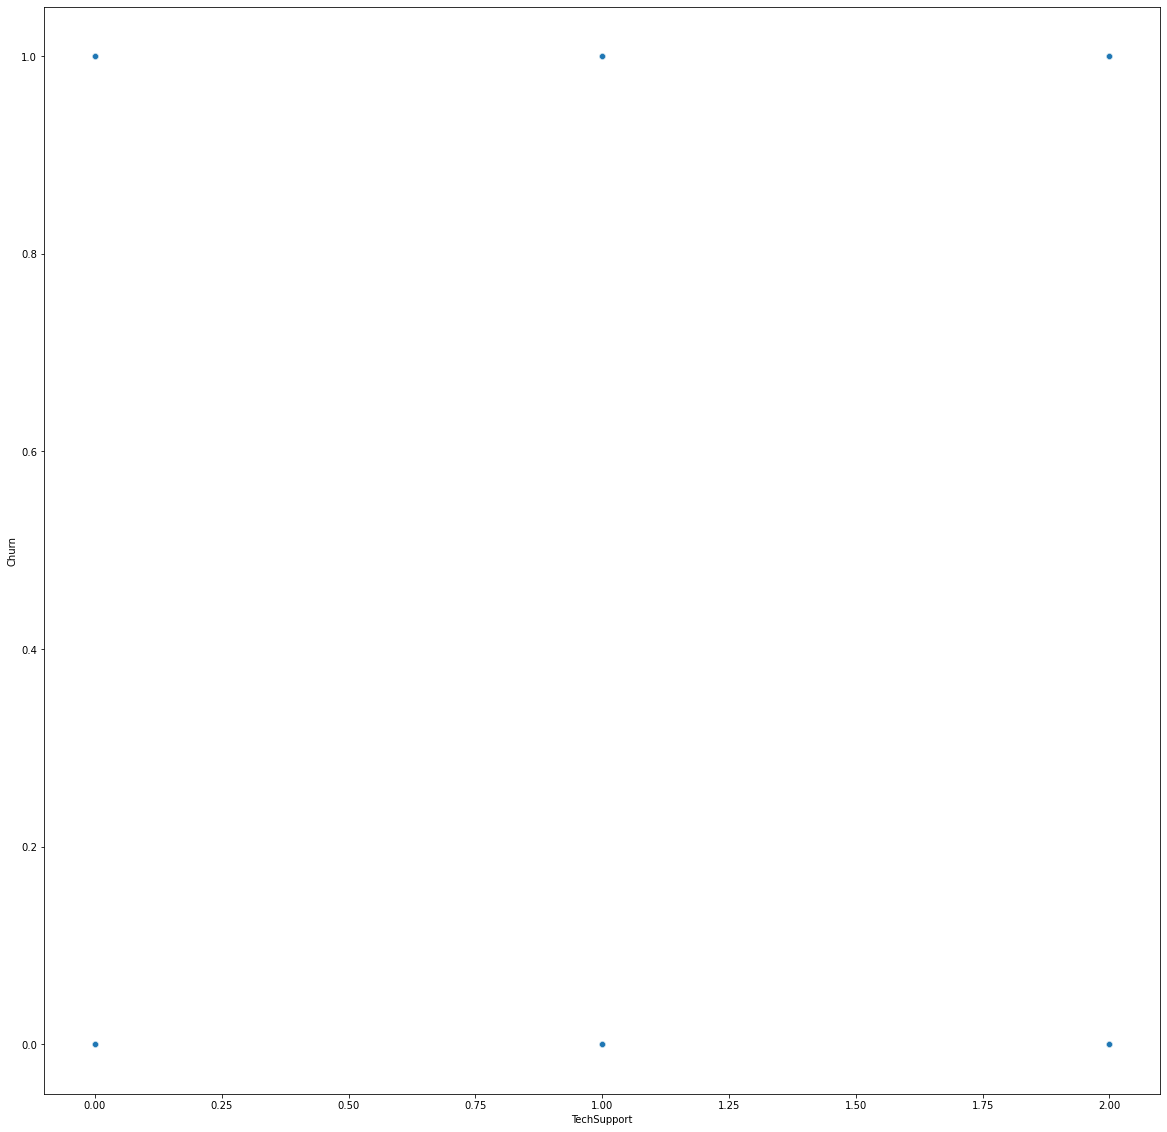

In [317]:
sns.scatterplot(x='TechSupport',y='Churn',data=Tele)

<AxesSubplot:xlabel='StreamingTV', ylabel='Churn'>

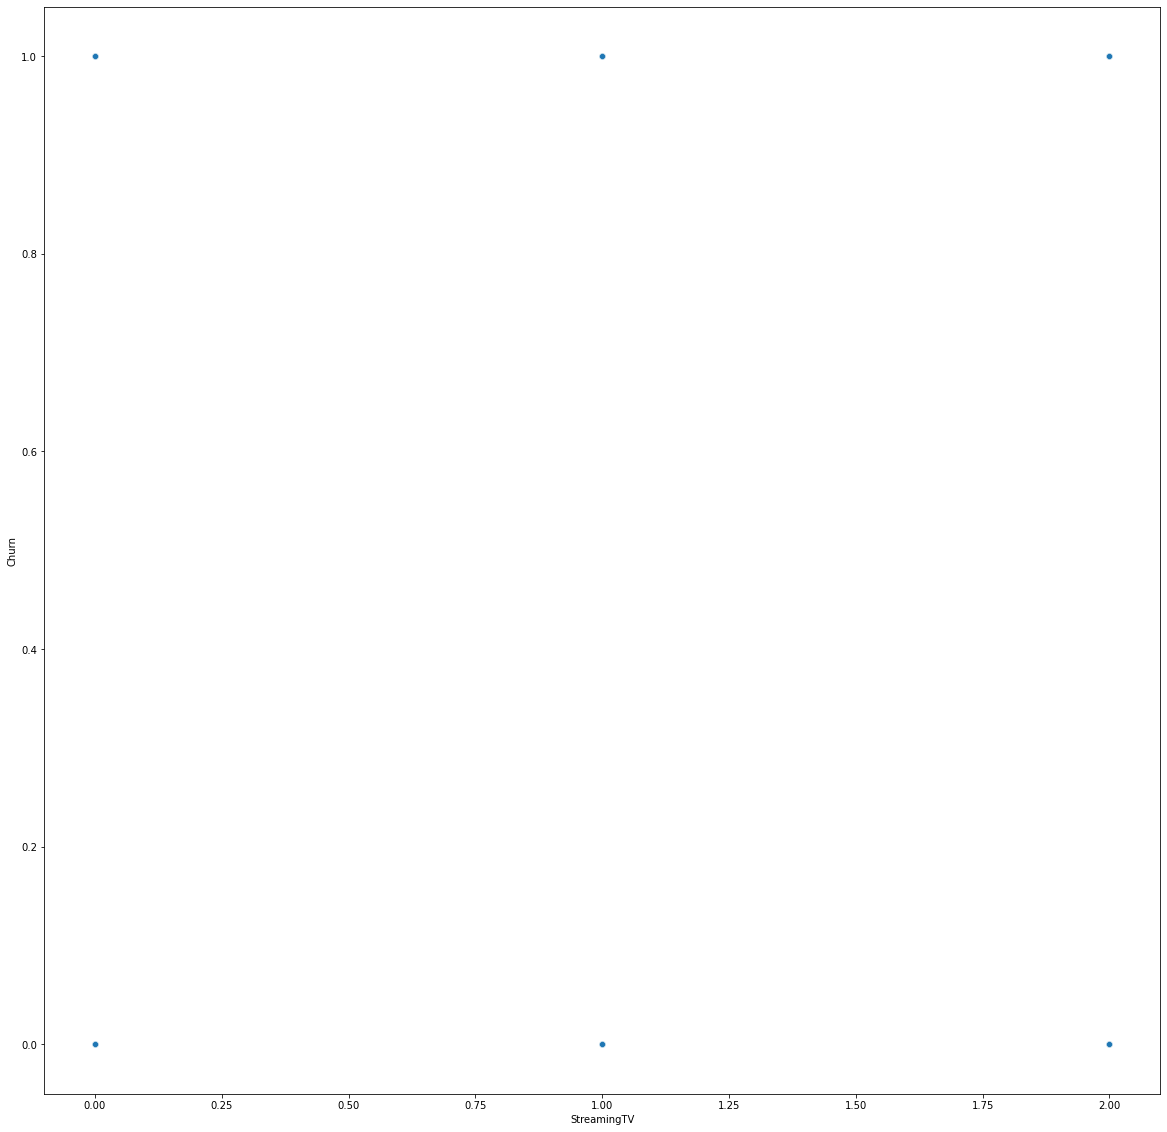

In [318]:
sns.scatterplot(x='StreamingTV',y='Churn',data=Tele)

<AxesSubplot:xlabel='StreamingMovies', ylabel='Churn'>

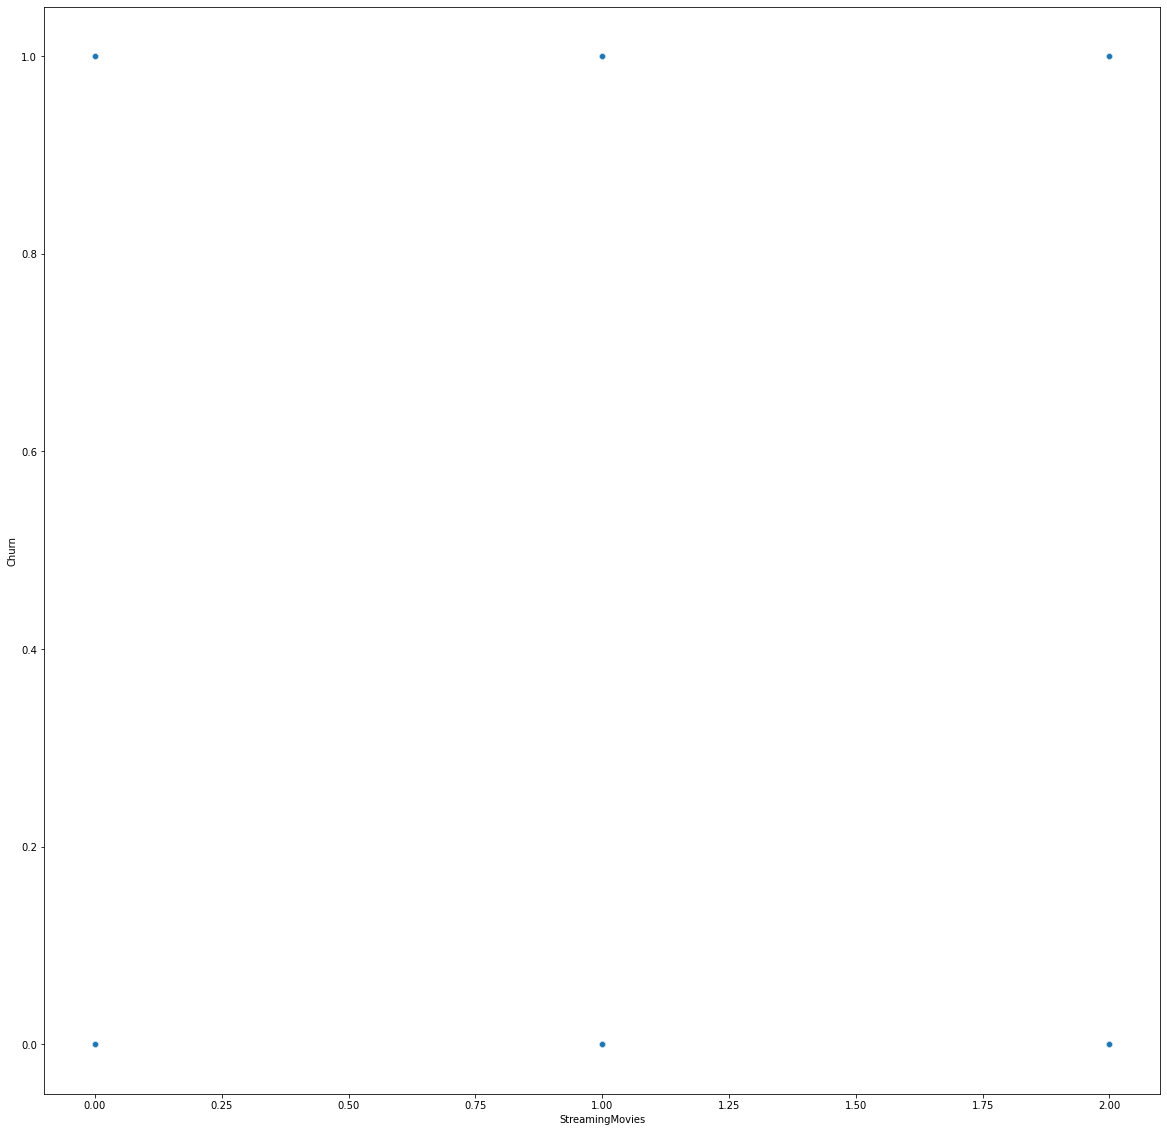

In [319]:
sns.scatterplot(x='StreamingMovies',y='Churn',data=Tele)

<AxesSubplot:xlabel='Contract', ylabel='Churn'>

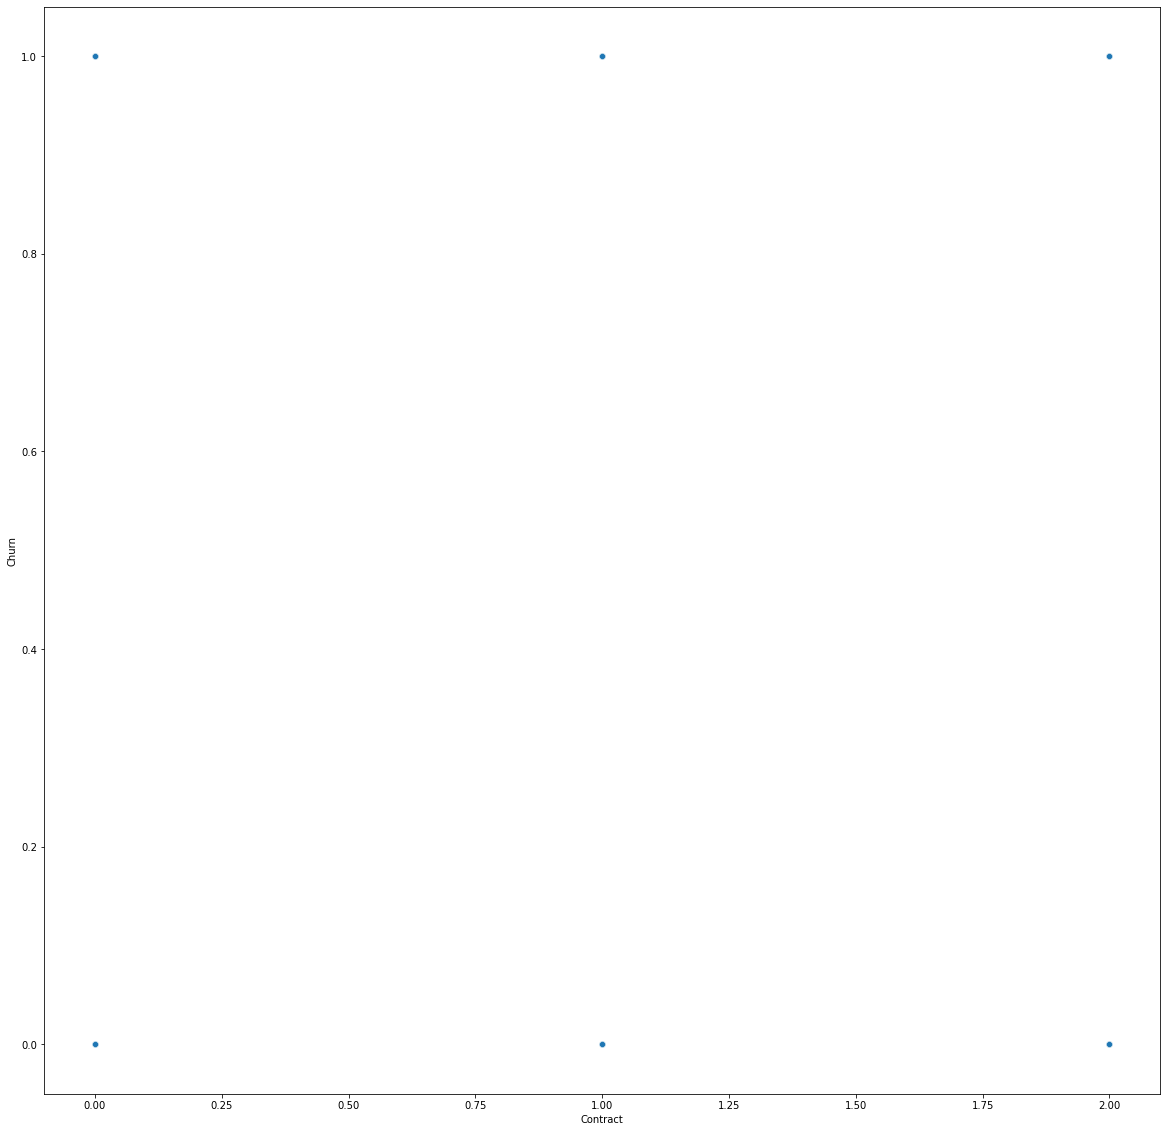

In [320]:
sns.scatterplot(x='Contract',y='Churn',data=Tele)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Churn'>

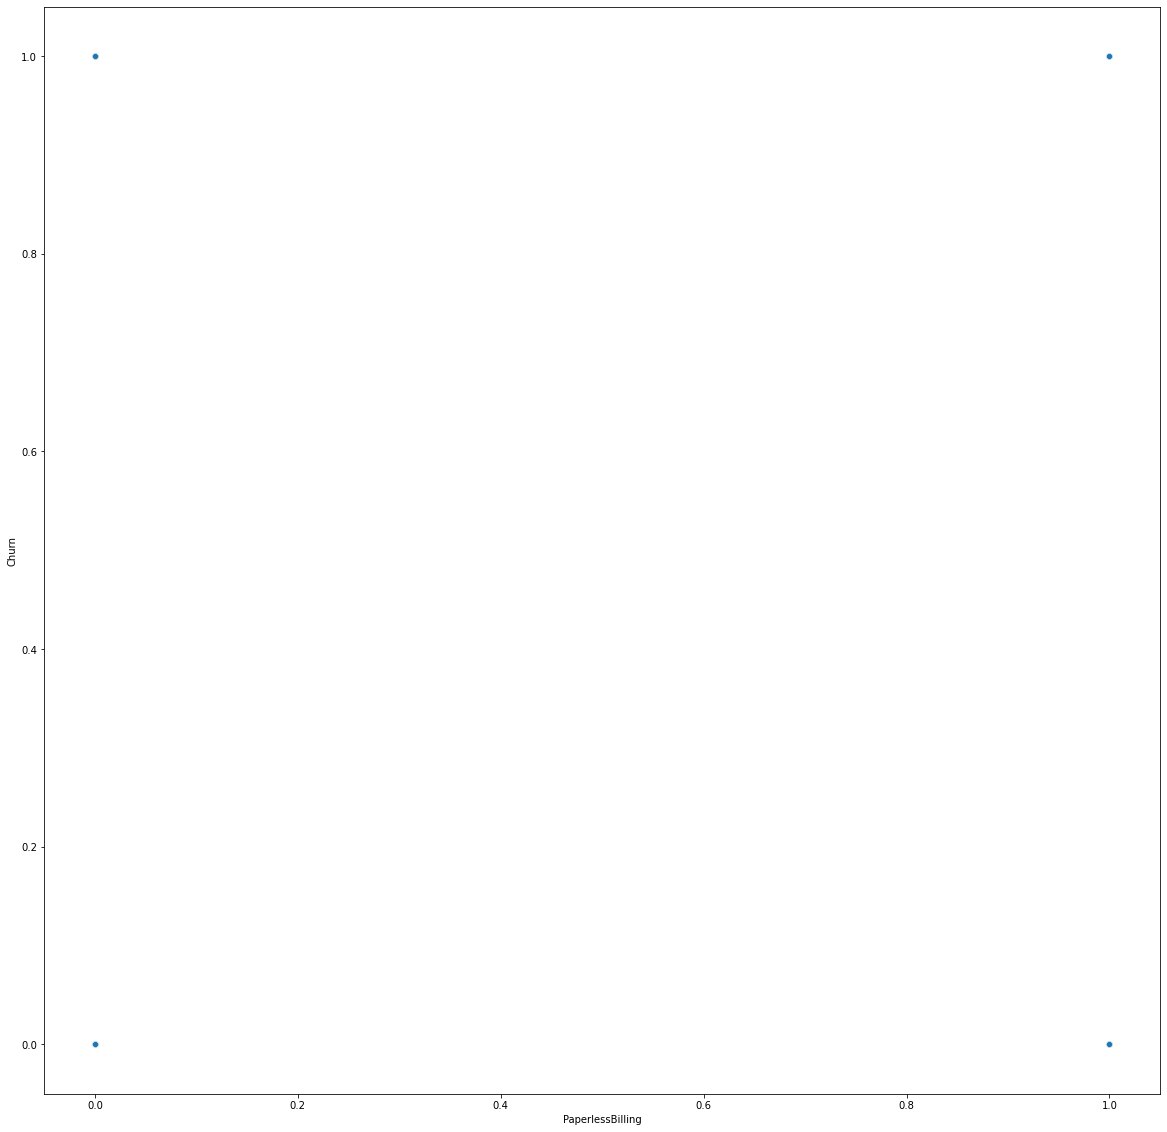

In [321]:
sns.scatterplot(x='PaperlessBilling',y='Churn',data=Tele)

<AxesSubplot:xlabel='PaymentMethod', ylabel='Churn'>

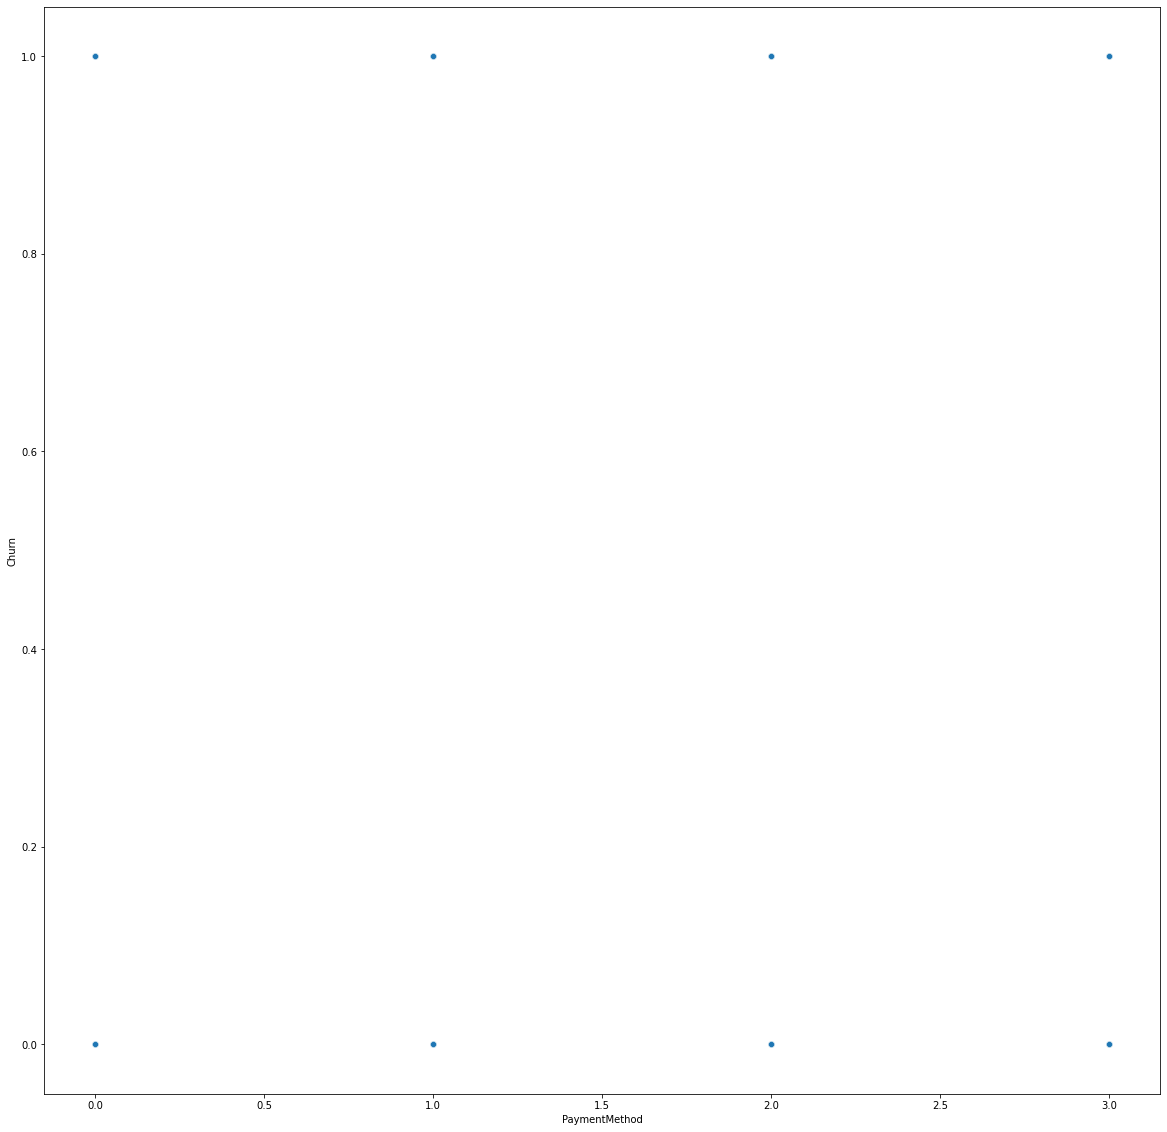

In [322]:
sns.scatterplot(x='PaymentMethod',y='Churn',data=Tele)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Churn'>

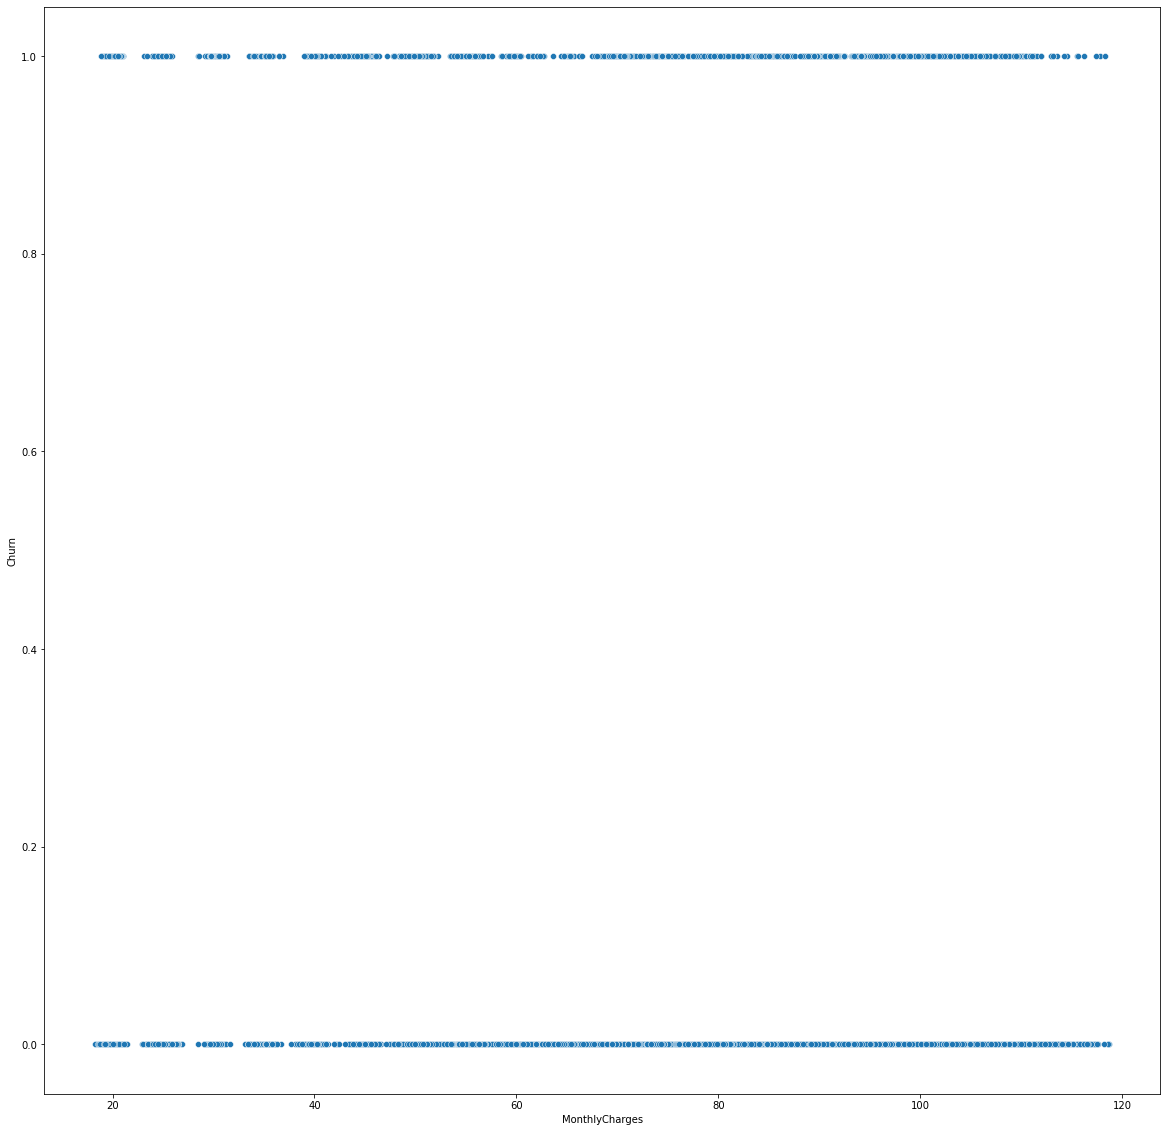

In [323]:
sns.scatterplot(x='MonthlyCharges',y='Churn',data=Tele)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

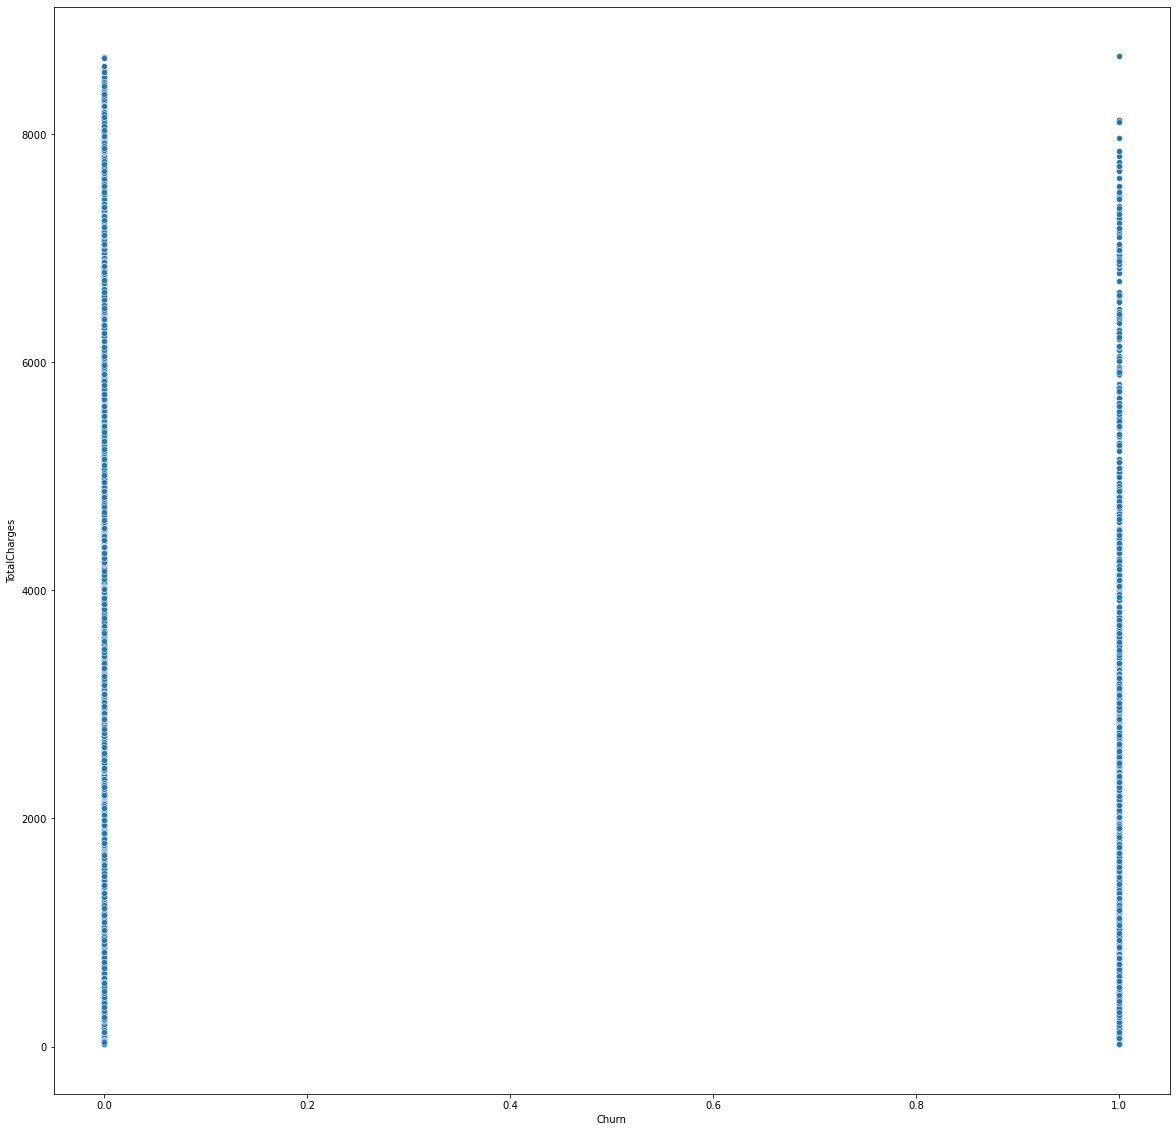

In [324]:
sns.scatterplot(x='Churn',y='TotalCharges',data=Tele)

univarate and BiVarate Analysis

Most of the customers are with No Dependents.

Most of customers are with PhoneService.

Most of the customers uses Fiber optic InternetService

So count of male is little bit more than female

So here people who have dependents on them are less and people who do not have dependents are more

So people who have Phone service are higher in number than a people who dont have phone service

The customers who have phone services from single line have high counts compared to the customers having phone services from multiple lines, also the customers who do not have phone services have covered very less data compared to others.

Most of the customers have chosen to get Fiber optic internet followed by DSL, but there are many customers who do not get an internet service.

WE can say that people who have internet service needs online security whereas people who do not have internet service dont need online security..But we can see in plot that most of people who have internet do not use online security

We can see in count plot that people with No device protection are higher in count as compared to people who have device protection.. and people who dont have internet service do not need devie protection

Customer who do not need tech support are higher in number than a coustomer who needs tech support.. where as people with no internet do not need any tech support

The customers who do not have Streaming movies are high in count followed by the customers who have Streaming movies services. And the customers who do not have internet services, they have less streaming movies services compared to others.

Most of the customer opt for month to month contract in comparision to one year or two year contract

Most of the customer prefer paperless billing in comparision to paper billing..

Most of customer prefer Electronic check over any payment method like mailed check, bank transfer(automatic), credit
cad(automatic)... while mailed check,bank transfer(automatic),credit card(automatic) are nearly equally choosen for payment




Multivariate Analysis

<Figure size 1800x2160 with 0 Axes>

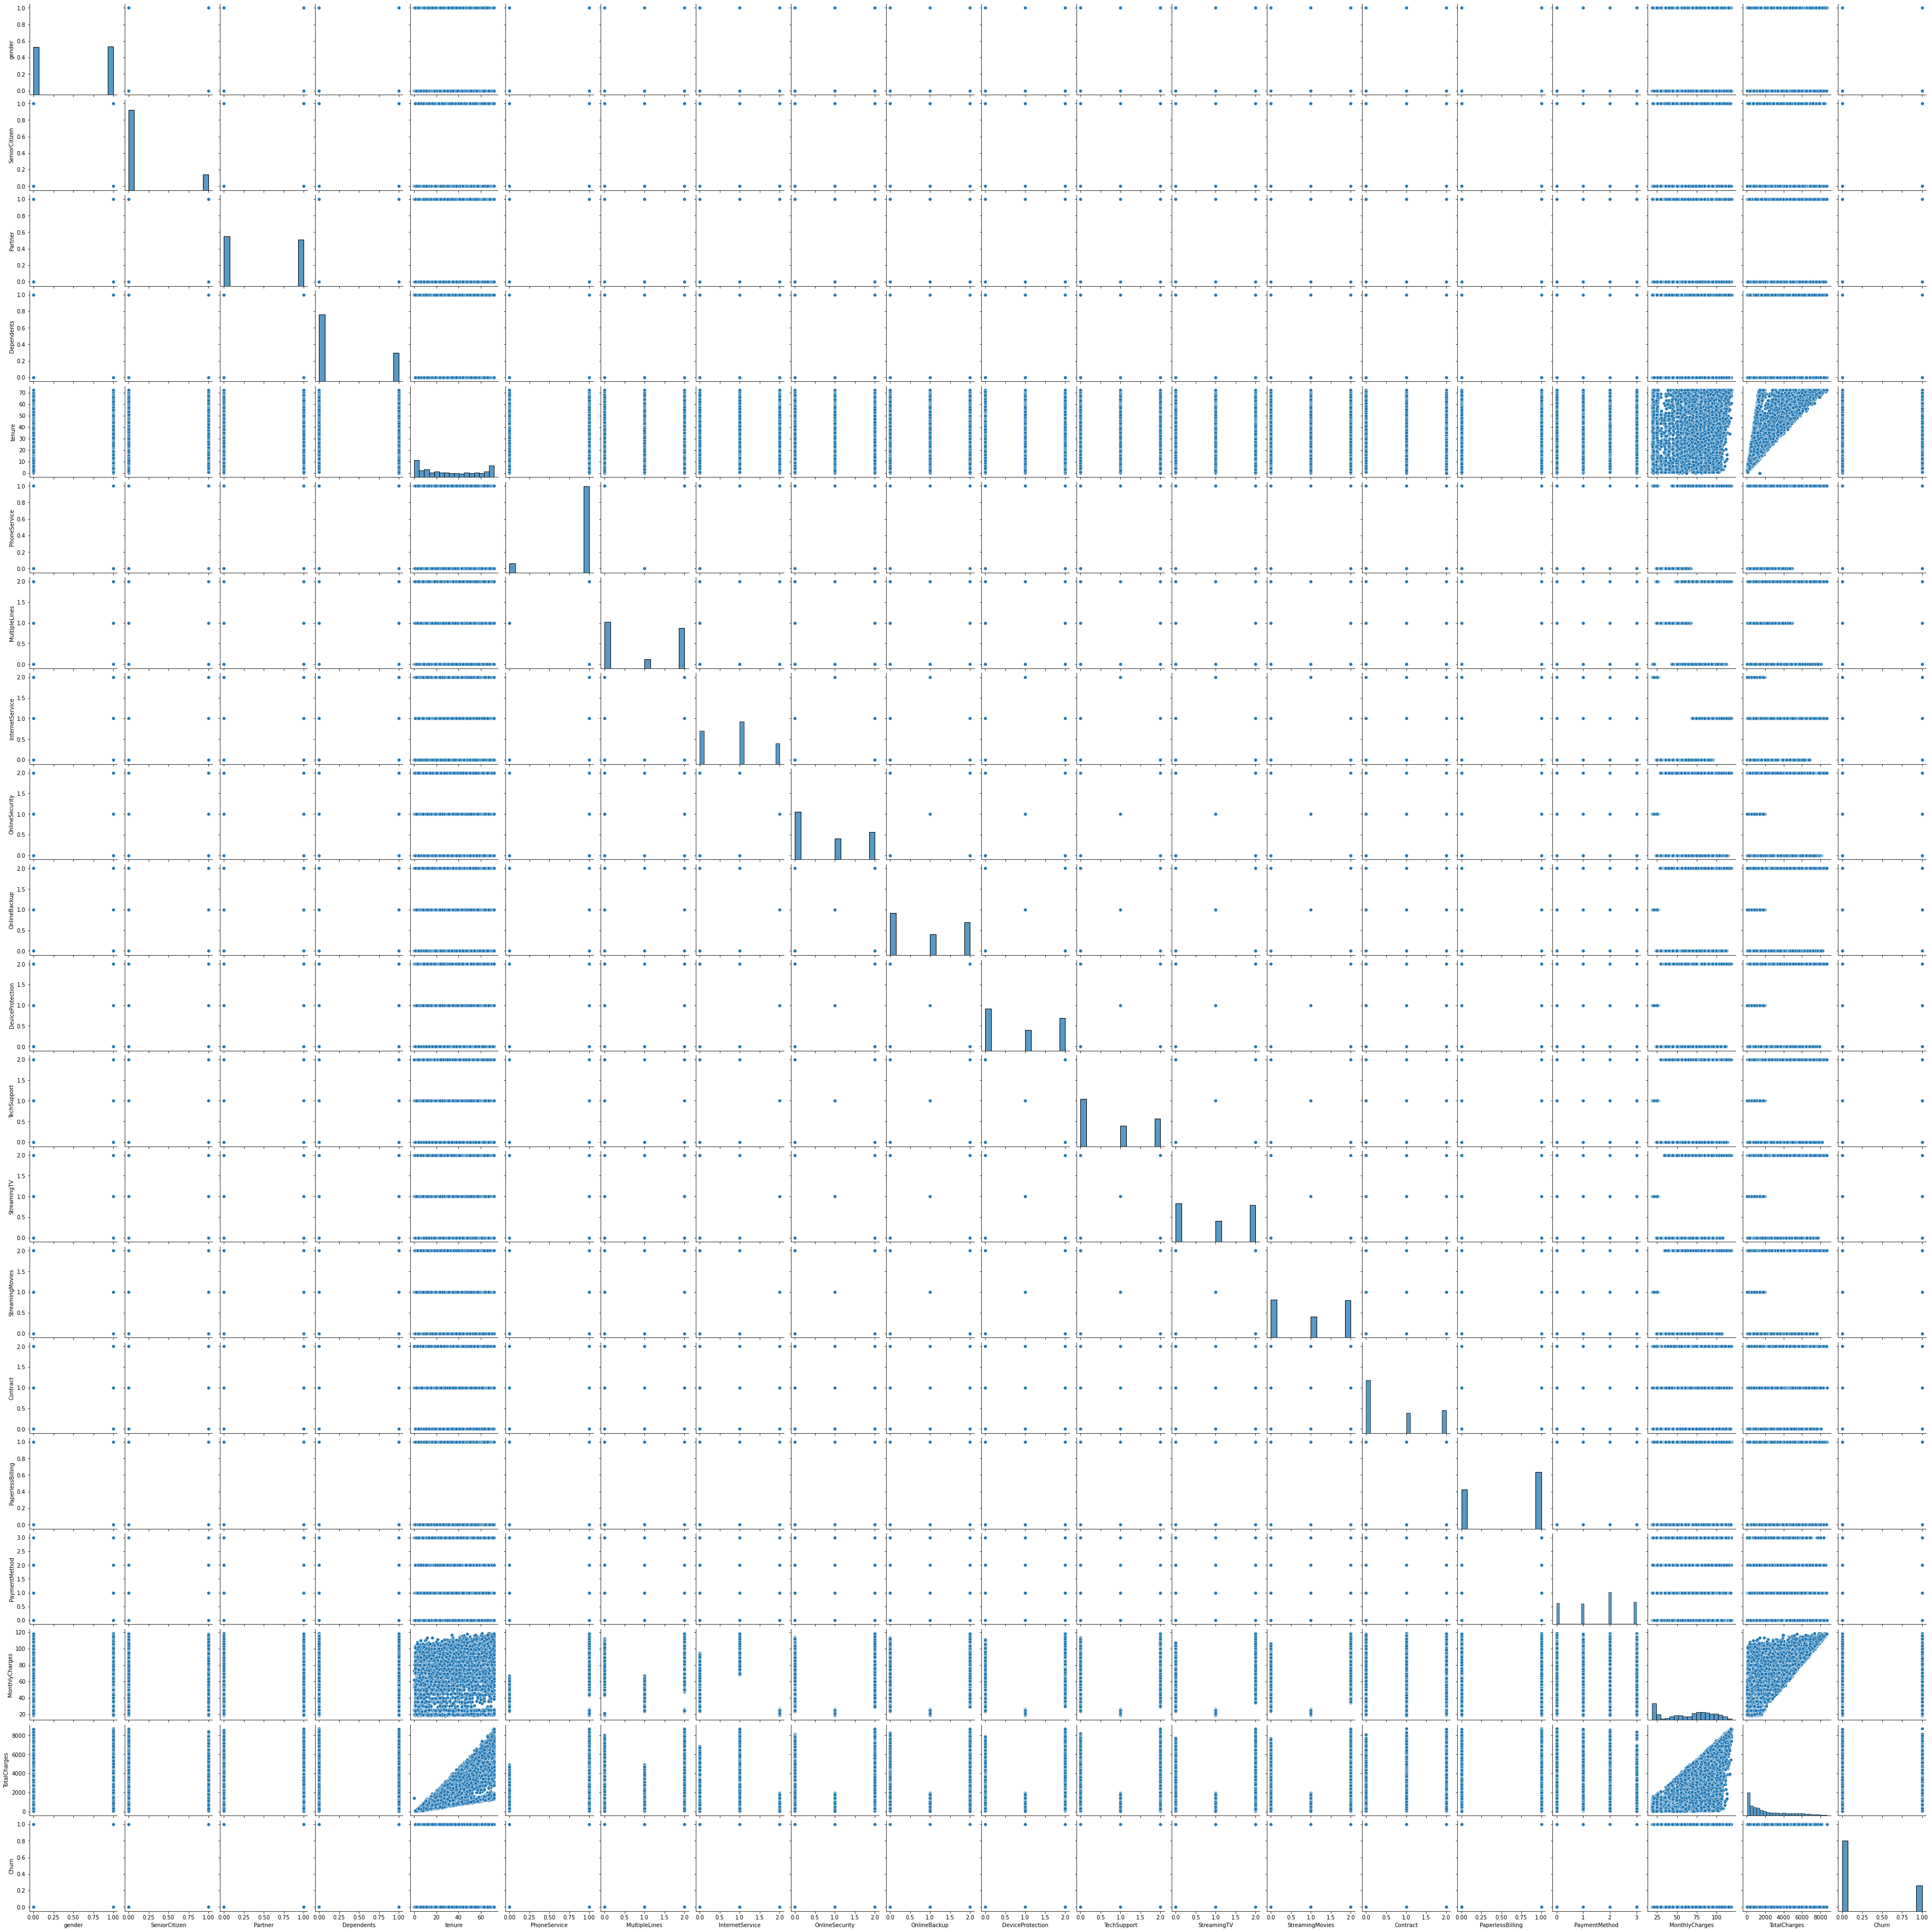

In [325]:
plt.figure(figsize=(25,30))
sns.pairplot(Tele)
plt.show()

This pair plot gives the relation between the columns which are plotted on the basis of target variable Churn

The pairplot gives the pairwise relation between the features on the basis of the target "Churn". On the diagonal we can notice the distribution plots. The features tenure and TotalCharges, Monthlycharges and TotalCharges have strong linear relation with each other.
There are no outliers in any of the columns but let's plot box plot to identify the outliers

Now Lets See that counts of each columns

In [326]:
for i in Tele.columns:
        print(Tele[i].value_counts())
        print('*'*100)

1.0    3555
0.0    3488
Name: gender, dtype: int64
****************************************************************************************************
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
****************************************************************************************************
0.0    3641
1.0    3402
Name: Partner, dtype: int64
****************************************************************************************************
0.0    4933
1.0    2110
Name: Dependents, dtype: int64
****************************************************************************************************
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
****************************************************************************************************
1.0    6361
0.0     682
Name: PhoneService, dtype: int64
*****************************************************************************

In [1]:
COR RELATION

SyntaxError: invalid syntax (Temp/ipykernel_11008/268991519.py, line 1)

In [327]:
Tele.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   
StreamingTV      -0.006421       0.030776  0.137341    0.046885  0.289373   
StreamingMovies  -0.008743       0.047266  0.129574    0.021321  0.296866   
Contract          0.000126      -0.142554  0.294806    0.243187  0.671607   
PaperlessBilling -0.011754       0.156530 -0.014877   -0.111377  0.006152   
PaymentMethod     0.017352      -0.038551 -0.154798   -0.040292 -0.370436   
MonthlyCharges   -0.014569       0.220173  0.096848   -0.113890  0.247900   
TotalCharges     -0.000002       0.102652  0.318364    0.063593  0.825464   
Churn            -0.008612       0.150889 -0.150448   -0.164221 -0.352229   

                  PhoneService  MultipleLines  InternetService  \
gender               -0.006488      -0.006739        -0.000863   
SeniorCitizen         0.008576       0.146185        -0.032310   
Partner               0.017706       0.142410         0.000891   
Dependents           -0.001762      -0.024991         0.044590   
tenure                0.008448       0.343032        -0.030359   
PhoneService          1.000000      -0.020538         0.387436   
MultipleLines        -0.020538       1.000000        -0.109216   
InternetService       0.387436      -0.109216         1.000000   
OnlineSecurity       -0.015198       0.007141        -0.028416   
OnlineBackup          0.024105       0.117327         0.036138   
DeviceProtection      0.003727       0.122318         0.044944   
TechSupport          -0.019158       0.011466        -0.026047   
StreamingTV           0.055353       0.175059         0.107417   
StreamingMovies       0.043870       0.180957         0.098350   
Contract              0.002247       0.110842         0.099721   
PaperlessBilling      0.016505       0.165146        -0.138625   
PaymentMethod        -0.004184      -0.176793         0.086140   
MonthlyCharges        0.247398       0.433576        -0.323260   
TotalCharges          0.113013       0.452849        -0.175588   
Churn                 0.011942       0.038037        -0.047291   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.015017     -0.012057          0.000549    -0.006825   
SeniorCitizen          -0.128221     -0.013632         -0.021398    -0.151268   
Partner                 0.150828      0.153130          0.166330     0.126733   
Dependents              0.152166      0.091015          0.080537     0.133524   
tenure                  0.325468      0.370876          0.371105     0.322942   
PhoneService           -0.015198      0.024105          0.003727    -0.019158   
MultipleLines           0.007141      0.117327          0.122318     0.011466   
InternetService        -0.028416      0.036138          0.044944    -0.026047   
OnlineSecurity          1.000000      0.185126          0.175985     0.285028   
OnlineBackup            0.185126      1.000000          0.187757     0.195748   
DeviceProtection        0.175985      0.187757          1.000000     0.240593   
TechSupport             0.285028      0.195

<AxesSubplot:>

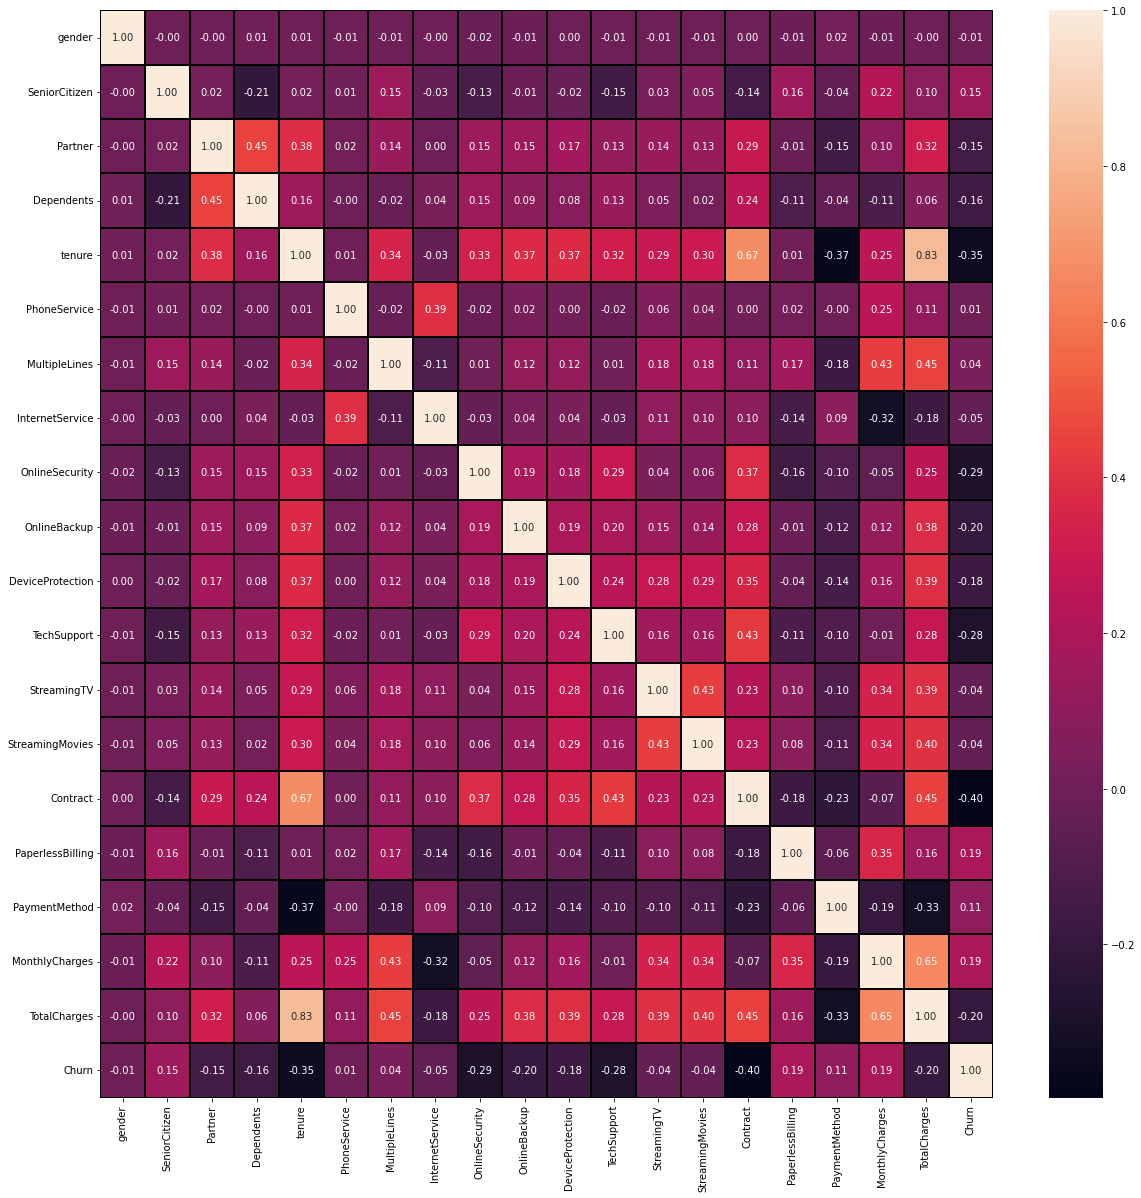

In [328]:
plt.figure(figsize = (20,20))
sns.heatmap(Tele.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

Observation:
This heatmap shows the correlation matrix by visualizing the data. we can observe the relation between feature to feature and feature to label. This heat mapcontains both positive and negative correlation.

There is no much positive correlation between the target and features.

The columns MonthlyCharges, PaperlessBilling, SeniorCitizen and PaymentMethod have positive collrelation with the label Churn.

The label is negatively correlated with Contract, tenure, OnlineSecurity, TechSupport, TotalCharges, DeviceProtection, OnlineBackup, Partner and Dependents.

Also the column gender has very less correlation with the label, we can drop it if necessary.

There is a multicolinearity issue between tenure and TotalCharges,Contract and tenure.

With target gender is very less correlated.

To get better insight on target correlation with other features let me plot bar plot of target correlation.

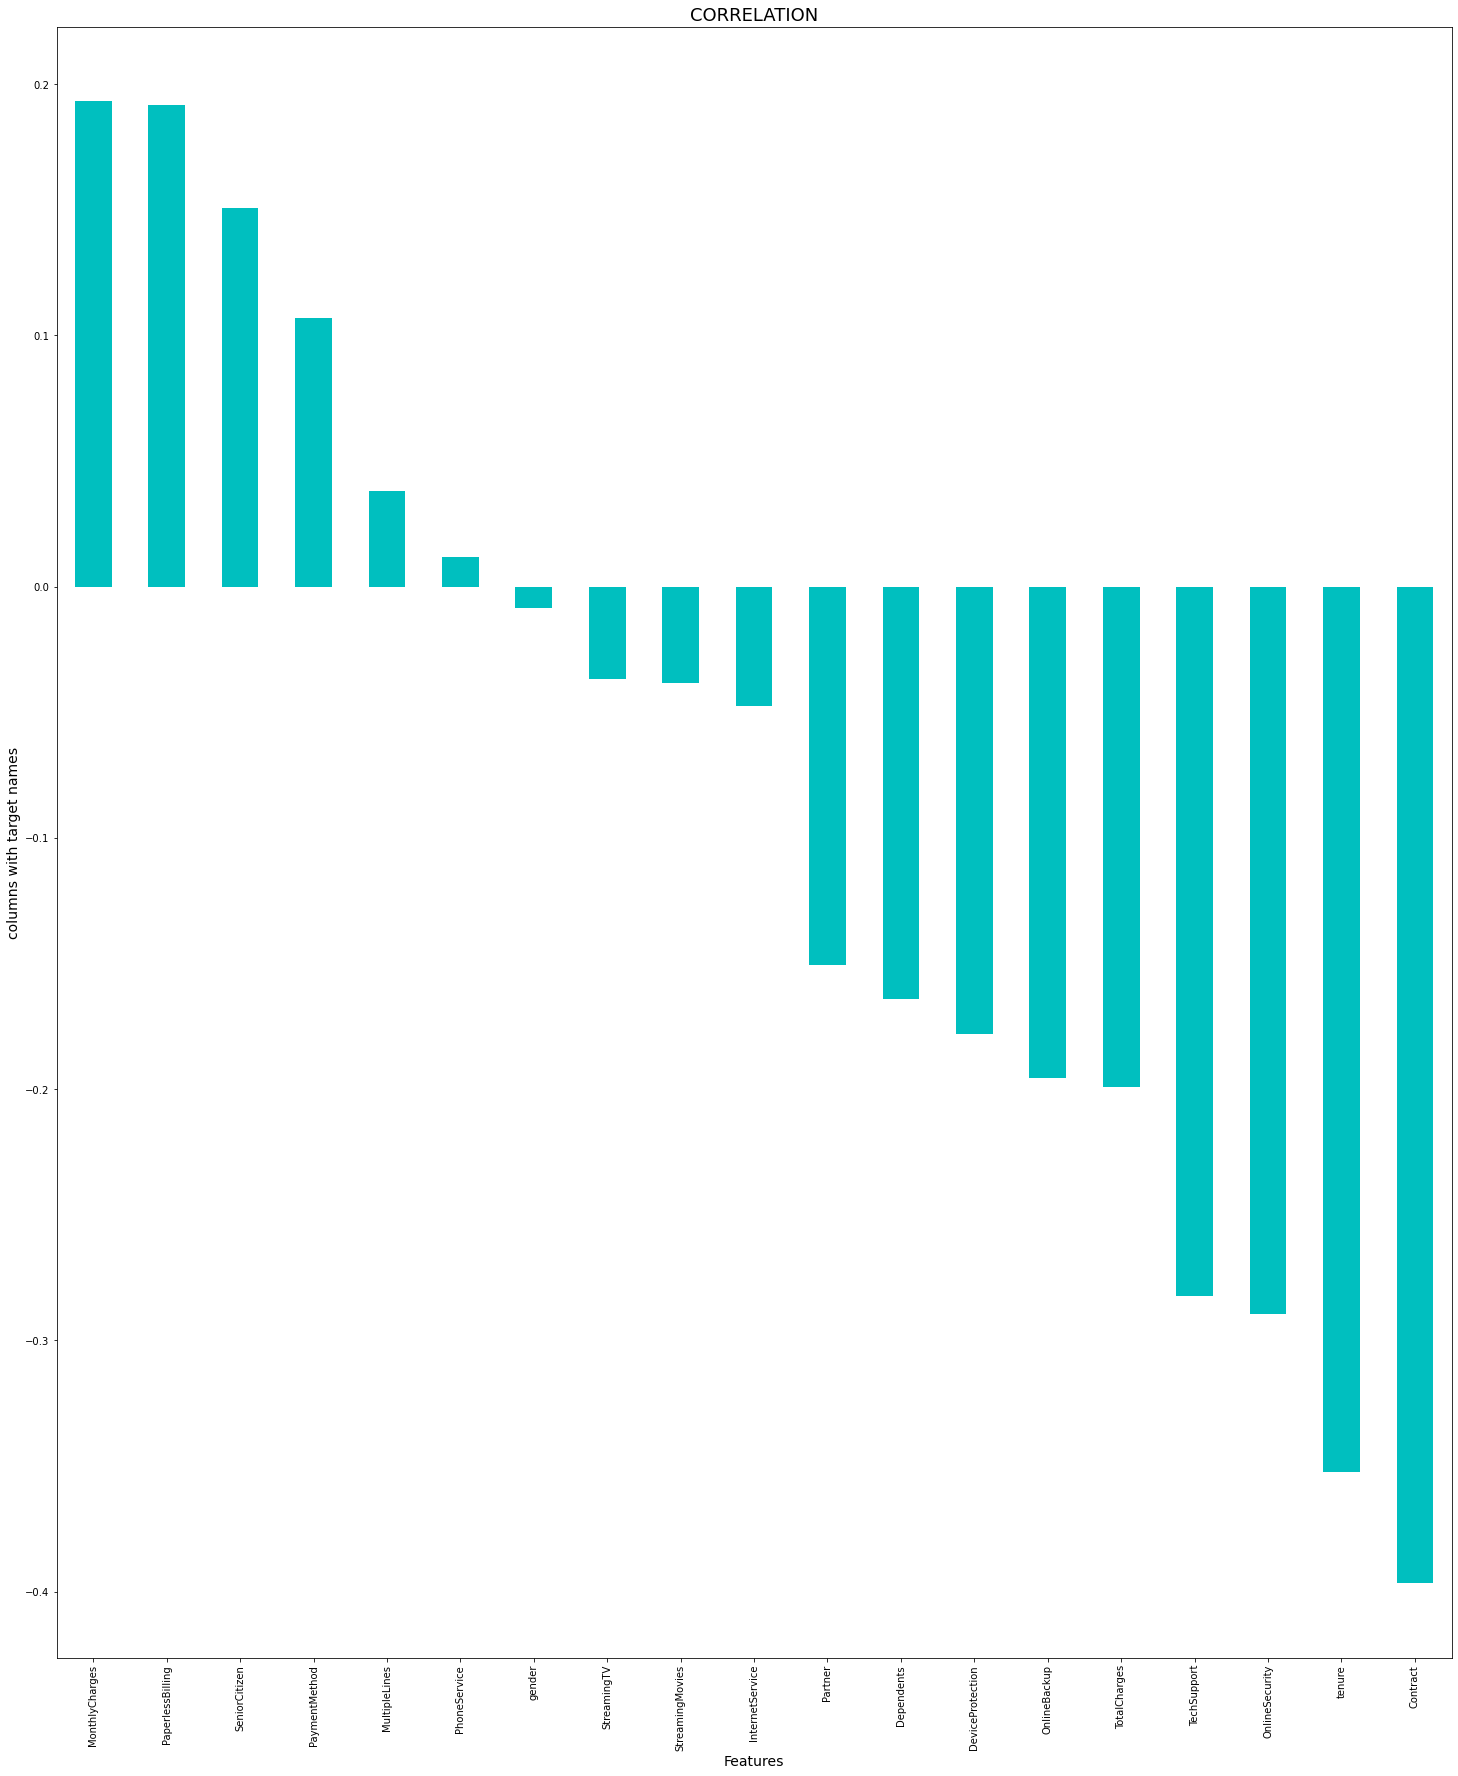

In [329]:
#checking the columns which are positively and negatively correlated
plt.figure(figsize=(25,30))
Tele.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('CORRELATION',fontsize=18)
plt.show()

This shows features relationship with target... column gender and phone service have least relationship with target.

In [330]:
Tele.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199037
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

# DESCRIPTIVE STATSTICS

In [331]:
Tele.describe().T

count         mean          std    min      25%       50%  \
gender            7043.0     0.504756     0.500013   0.00    0.000     1.000   
SeniorCitizen     7043.0     0.162147     0.368612   0.00    0.000     0.000   
Partner           7043.0     0.483033     0.499748   0.00    0.000     0.000   
Dependents        7043.0     0.299588     0.458110   0.00    0.000     0.000   
tenure            7043.0    32.371149    24.559481   0.00    9.000    29.000   
PhoneService      7043.0     0.903166     0.295752   0.00    1.000     1.000   
MultipleLines     7043.0     0.940508     0.948554   0.00    0.000     1.000   
InternetService   7043.0     0.872923     0.737796   0.00    0.000     1.000   
OnlineSecurity    7043.0     0.790004     0.859848   0.00    0.000     1.000   
OnlineBackup      7043.0     0.906432     0.880162   0.00    0.000     1.000   
DeviceProtection  7043.0     0.904444     0.879949   0.00    0.000     1.000   
TechSupport       7043.0     0.797104     0.861551   0.00    0.000     1.000   
StreamingTV       7043.0     0.985376     0.885002   0.00    0.000     1.000   
StreamingMovies   7043.0     0.992475     0.885091   0.00    0.000     1.000   
Contract          7043.0     0.690473     0.833755   0.00    0.000     0.000   
PaperlessBilling  7043.0     0.592219     0.491457   0.00    0.000     1.000   
PaymentMethod     7043.0     1.574329     1.068104   0.00    1.000     2.000   
MonthlyCharges    7043.0    64.761692    30.090047  18.25   35.500    70.350   
TotalCharges      7043.0  2281.916928  2265.270398  18.80  402.225  1397.475   
Churn             7043.0     0.265370     0.441561   0.00    0.000     0.000   

                      75%      max  
gender               1.00     1.00  
SeniorCitizen        0.00     1.00  
Partner              1.00     1.00  
Dependents           1.00     1.00  
tenure              55.00    72.00  
PhoneService         1.00     1.00  
MultipleLines        2.00     2.00  
InternetService      1.00     2.00  
OnlineSecurity       2.00     2.00  
OnlineBackup         2.00     2.00  
DeviceProtection     2.00     2.00  
TechSupport          2.00     2.00  
StreamingTV          2.00     2.00  
StreamingMovies      2.00     2.00  
Contract             1.00     2.00  
PaperlessBilling     1.00     1.00  
PaymentMethod        2.00     3.00  
MonthlyCharges      89.85   118.75  
TotalCharges      3786.60  8684.80  
Churn                1.00     1.00

*Its Clearly shown above that all the columns have the count value of 30 there are no negative values in the dataset and Few columns have very low values in it, where few have very high values in the datset.

<AxesSubplot:>

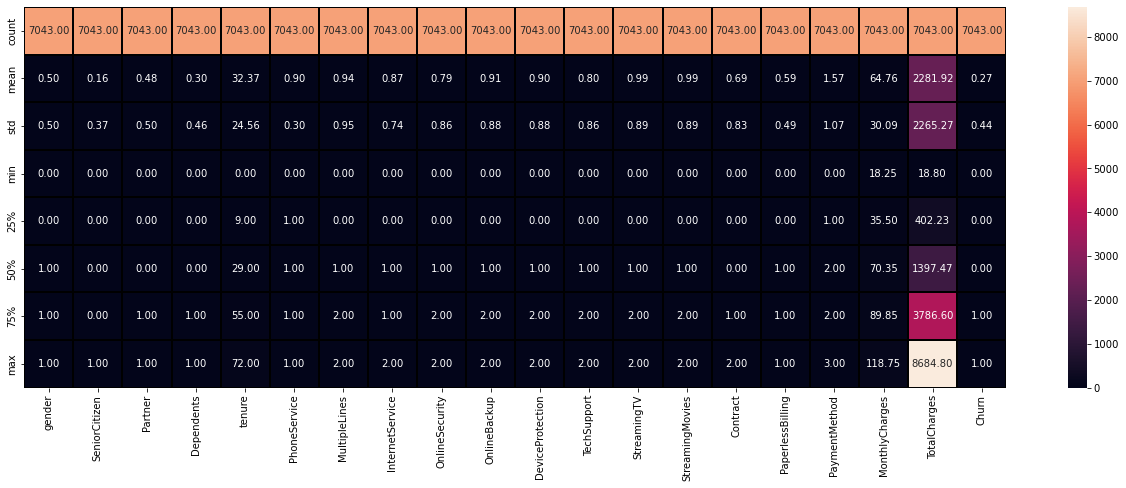

In [332]:
plt.figure(figsize = (22,7))
sns.heatmap(Tele.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

OUTLIERS CHECKING(Any One outlier method can be  used)

In [333]:
colmlist=Tele.columns.values
ncol=30
nrows=14

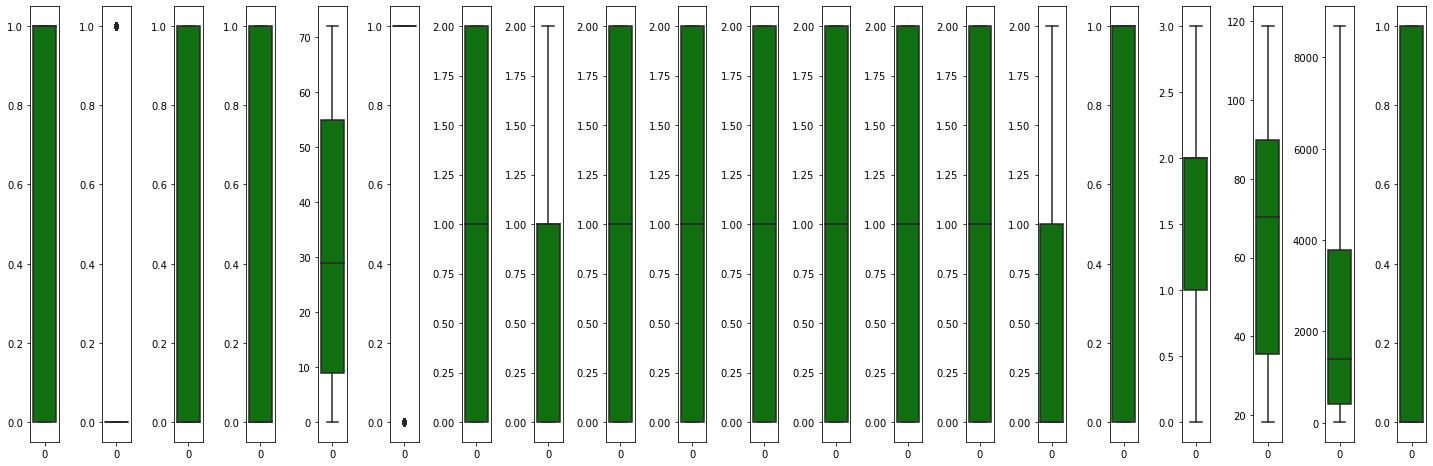

In [334]:
plt.figure(figsize=(ncol,3*ncol))
for i in range (0,len(colmlist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data= Tele[colmlist[i]],color='green',orient='v')
    plt.tight_layout()

gender                 AxesSubplot(0.125,0.125;0.032563x0.755)
SeniorCitizen       AxesSubplot(0.164076,0.125;0.032563x0.755)
Partner             AxesSubplot(0.203151,0.125;0.032563x0.755)
Dependents          AxesSubplot(0.242227,0.125;0.032563x0.755)
tenure              AxesSubplot(0.281303,0.125;0.032563x0.755)
PhoneService        AxesSubplot(0.320378,0.125;0.032563x0.755)
MultipleLines       AxesSubplot(0.359454,0.125;0.032563x0.755)
InternetService     AxesSubplot(0.398529,0.125;0.032563x0.755)
OnlineSecurity      AxesSubplot(0.437605,0.125;0.032563x0.755)
OnlineBackup        AxesSubplot(0.476681,0.125;0.032563x0.755)
DeviceProtection    AxesSubplot(0.515756,0.125;0.032563x0.755)
TechSupport         AxesSubplot(0.554832,0.125;0.032563x0.755)
StreamingTV         AxesSubplot(0.593908,0.125;0.032563x0.755)
StreamingMovies     AxesSubplot(0.632983,0.125;0.032563x0.755)
Contract            AxesSubplot(0.672059,0.125;0.032563x0.755)
PaperlessBilling    AxesSubplot(0.711134,0.125;0.032563

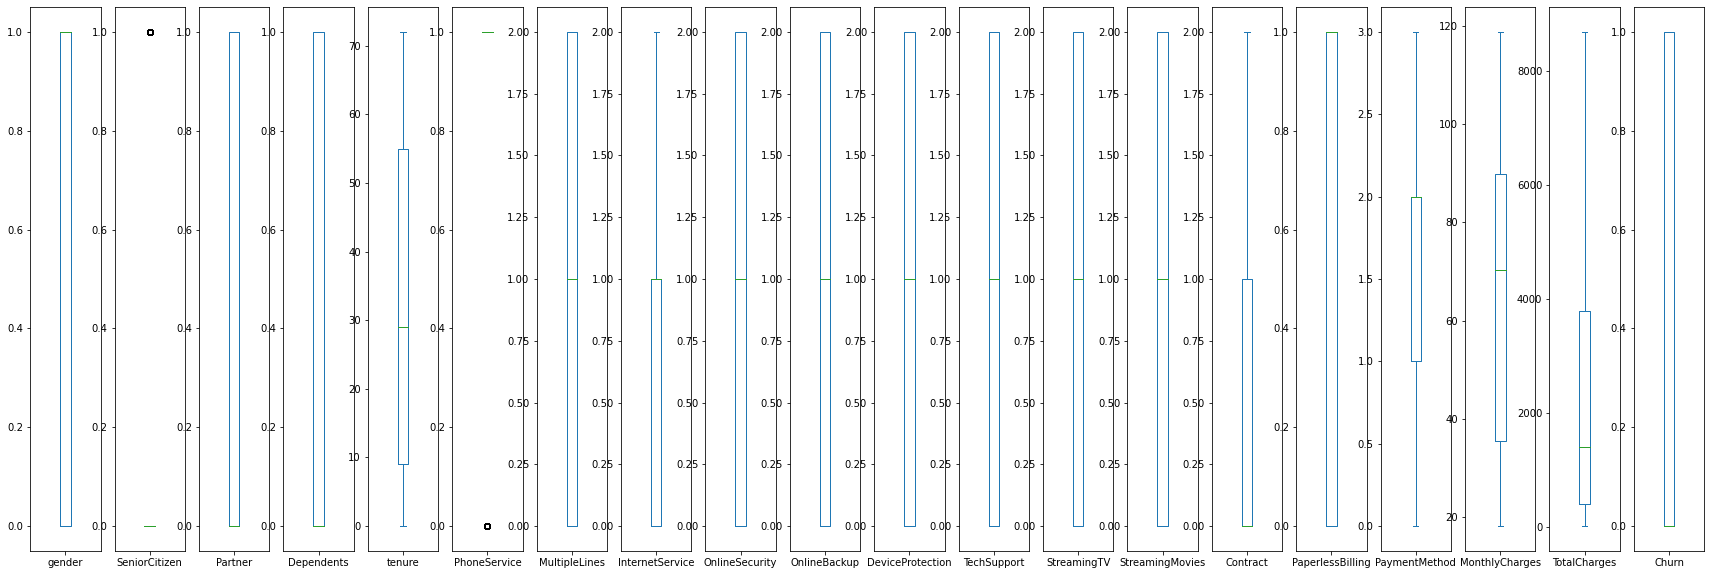

In [335]:
# to find out outliers in the dataset
Tele.plot(kind='box',subplots=True,figsize=(30,10))

We can see that the Outliers are present in the columns  ...we have to treat this Outliers ..

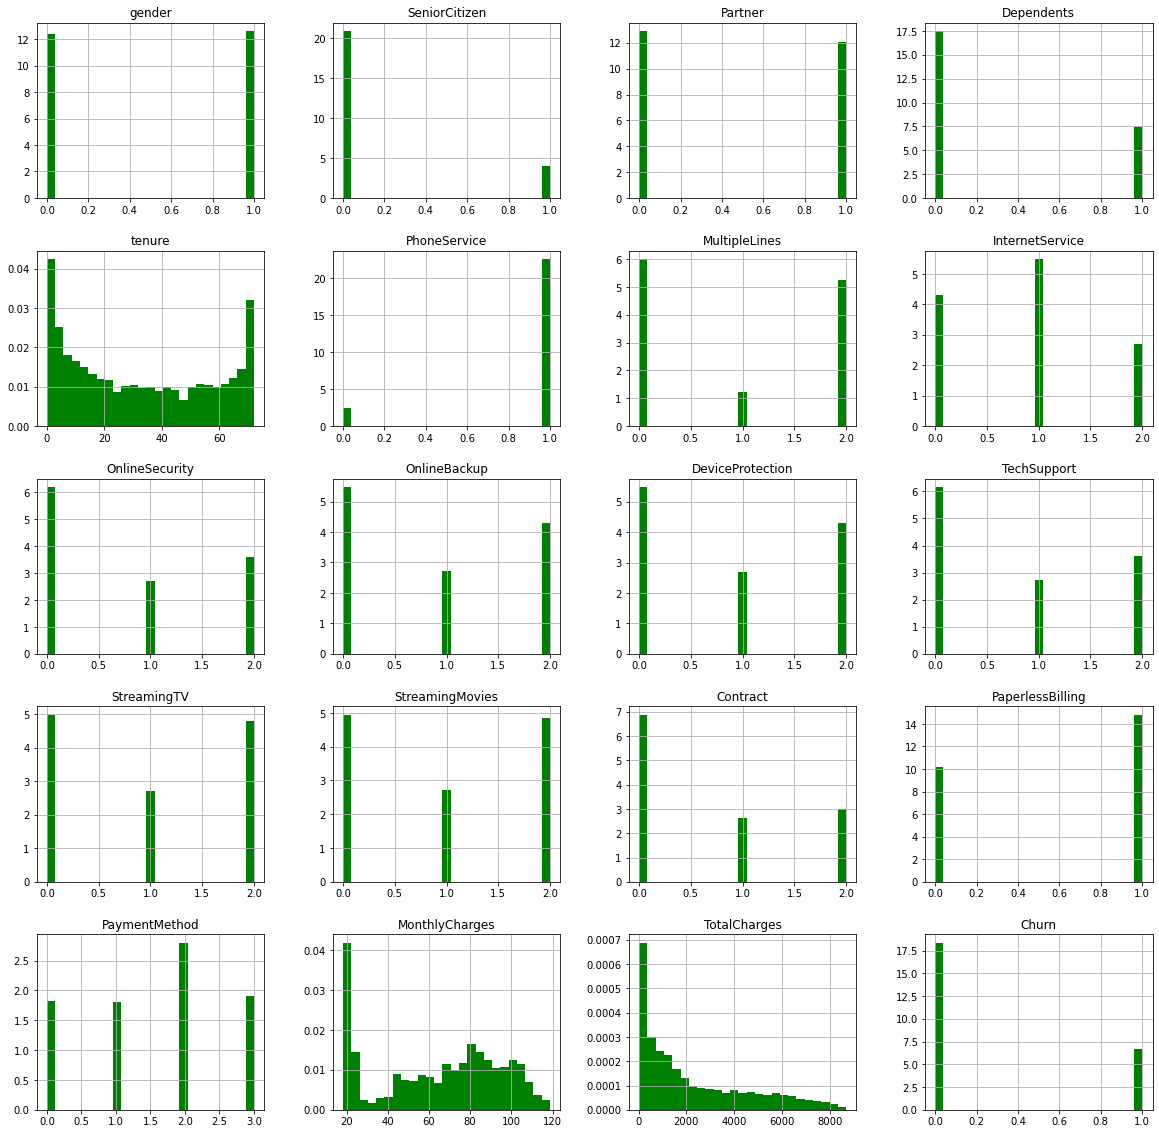

In [336]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Tele.hist(bins=25,color='green',density=True,label='Value',histtype='bar')
plt.show()

WE can see maximum data is not  normally distributed rest all are skewed or unbalanced data
Lets take some of the data and do some of the plotting of skewness although we can see all skewed columns on above plotting

Now Lets Remove Outliers Now

Error(E) is not normally distributed as per the graph ,its skewed to left side . .

the data of the column is not normalised ...The building block is out of normalized curve..It a right skewed data..
Maximum columns are normally distributed but some columns like R,SO,CG and E have skewness. . . .


Normal distribution curve of outcome column is irrelevent

In [337]:
#to check for outliers through zscore 
from scipy.stats import zscore
(np.abs(zscore( Tele)) < 3).all()

gender               True
SeniorCitizen        True
Partner              True
Dependents           True
tenure               True
PhoneService        False
MultipleLines        True
InternetService      True
OnlineSecurity       True
OnlineBackup         True
DeviceProtection     True
TechSupport          True
StreamingTV          True
StreamingMovies      True
Contract             True
PaperlessBilling     True
PaymentMethod        True
MonthlyCharges       True
TotalCharges         True
Churn                True
dtype: bool

In [338]:
#to remove outliers in data set through zscore
z = np.abs(zscore( Tele))
z.shape

(7043, 20)

In [339]:
threshold = 3
print(np.where(z>3))

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [340]:
Tele_new=Tele[(z<3).all(axis=1)]
print(Tele_new.shape)


(6361, 20)


In [341]:
Tele.shape

(7043, 20)

In [342]:
print ("Old DataFrame =",Tele.shape)
print ("New DataFrame =",Tele_new.shape)
print ("Total dropped rows = ",Tele.shape[0] -Tele_new.shape[0])

Old DataFrame = (7043, 20)
New DataFrame = (6361, 20)
Total dropped rows =  682


In [343]:
#to find % loss in data
loss = (7043-6361)/7043 * 100
print(loss)

9.683373562402386


In [344]:
Tele_new

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
4        0.0              0      0.0         0.0       2           1.0   
5        0.0              0      0.0         0.0       8           1.0   
6        1.0              0      0.0         1.0      22           1.0   
...      ...            ...      ...         ...     ...           ...   
7037     0.0              0      0.0         0.0      72           1.0   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1               0.0              0.0             2.0           0.0   
2               0.0              0.0             2.0           2.0   
4               0.0              1.0             0.0           0.0   
5               2.0              1.0             0.0           0.0   
6               2.0              1.0             0.0           2.0   
...             ...              ...             ...           ...   
7037            0.0              2.0             1.0           1.0   
7038            2.0              0.0             2.0           0.0   
7039            2.0              1.0             0.0           2.0   
7041            2.0              1.0             0.0           0.0   
7042            0.0              1.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
4                  0.0          0.0          0.0              0.0       0.0   
5                  2.0          0.0          2.0              2.0       0.0   
6                  0.0          0.0          2.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7037               1.0          1.0          1.0              1.0       2.0   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
1                  0.0            3.0           56.95       1889.50    0.0  
2                  1.0            3.0           53.85        108.15    1.0  
4                  1.0            2.0           70.70        151.65    1.0  
5                  1.0            2.0           99.65        820.50    1.0  
6                  1.0            1.0           89.10       1949.40    0.0  
...                ...            ...             ...           ...    ...  
7037               1.0            0.0           21.15       1419.40    0.0  
7038               1.0            3.0           84.80       1990.50    0.0  
7039               1.0            1.0          103.20       7362.90    0.0  
7041               1.0            3.0           74.40        306.60    1.0  
7042               1.0            0.0          105.65       6844.50    0.0  

[6361 rows x 20 columns]

Now Lets Split the dataset into dependent and independent variable*

In [345]:
# Independent column

x=Tele_new.iloc[:,0:-1]
x

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
4        0.0              0      0.0         0.0       2           1.0   
5        0.0              0      0.0         0.0       8           1.0   
6        1.0              0      0.0         1.0      22           1.0   
...      ...            ...      ...         ...     ...           ...   
7037     0.0              0      0.0         0.0      72           1.0   
7038     1.0              0      1.0         1.0      24           1.0   
7039     0.0              0      1.0         1.0      72           1.0   
7041     1.0              1      1.0         0.0       4           1.0   
7042     1.0              0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1               0.0              0.0             2.0           0.0   
2               0.0              0.0             2.0           2.0   
4               0.0              1.0             0.0           0.0   
5               2.0              1.0             0.0           0.0   
6               2.0              1.0             0.0           2.0   
...             ...              ...             ...           ...   
7037            0.0              2.0             1.0           1.0   
7038            2.0              0.0             2.0           0.0   
7039            2.0              1.0             0.0           2.0   
7041            2.0              1.0             0.0           0.0   
7042            0.0              1.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
4                  0.0          0.0          0.0              0.0       0.0   
5                  2.0          0.0          2.0              2.0       0.0   
6                  0.0          0.0          2.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7037               1.0          1.0          1.0              1.0       2.0   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
1                  0.0            3.0           56.95       1889.50  
2                  1.0            3.0           53.85        108.15  
4                  1.0            2.0           70.70        151.65  
5                  1.0            2.0           99.65        820.50  
6                  1.0            1.0           89.10       1949.40  
...                ...            ...             ...           ...  
7037               1.0            0.0           21.15       1419.40  
7038               1.0            3.0           84.80       1990.50  
7039               1.0            1.0          103.20       7362.90  
7041               1.0            3.0           74.40        306.60  
7042               1.0            0.0          105.65       6844.50  

[6361 rows x 19 columns]

In [346]:
# Target or dependent variable

y=Tele_new.iloc[:,-1]
y

1       0.0
2       1.0
4       1.0
5       1.0
6       0.0
       ... 
7037    0.0
7038    0.0
7039    0.0
7041    1.0
7042    0.0
Name: Churn, Length: 6361, dtype: float64

# TRANSFORMING DATA TO REMOVE SKEWNESS

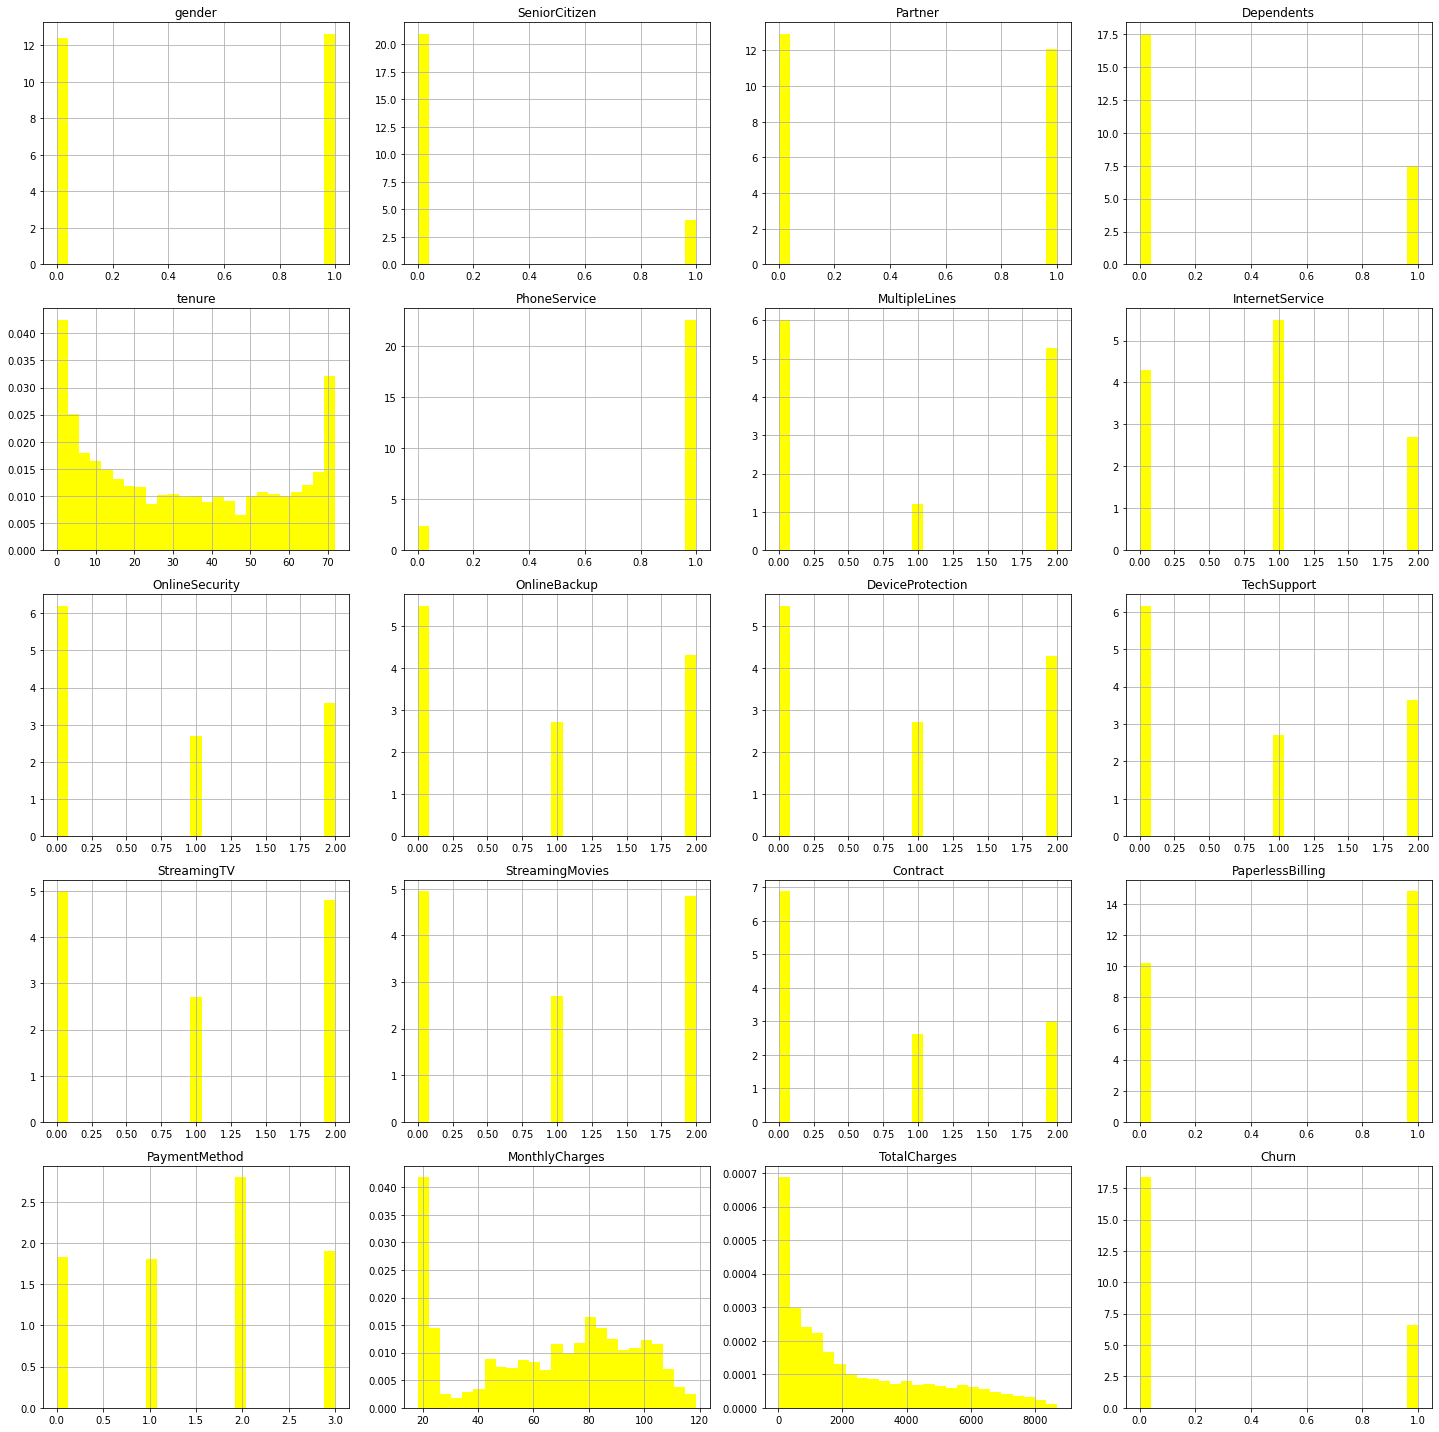

In [347]:
#Lets plot all using Histogram and see the skewness again
 
plt.rcParams['figure.figsize']=(20,20)
Tele.hist(bins=25,color='yellow',density=True,label='Value',histtype='bar')
plt.tight_layout()
plt.show()

there is skewness present in Run(R),Hits(H),Completed games(CG),Shoutouts(SHO),Saves(SV),Errors(E).. 

Now Lets Remove Skewness Now

Here We have skewness in columns such as H,CG,SHO,SV and E .. Now remove the skewness from the given columns

In [348]:
Tele_new.skew()


gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.900834
Churn               1.053055
dtype: float64

In [349]:
from sklearn.preprocessing import power_transform
x_new=power_transform(Tele_new,method='yeo-johnson')

In [350]:
pd.DataFrame(x_new).skew()

0    -0.014781
1     1.823376
2     0.056316
3     0.876594
4    -0.243524
5     0.000000
6     0.132058
7    -0.108986
8     0.131110
9    -0.023610
10   -0.014523
11    0.123477
12   -0.122478
13   -0.126613
14    0.301765
15   -0.386613
16   -0.207901
17   -0.331859
18   -0.148454
19    1.053055
dtype: float64

We can see that the skewness has been removed from the given columns 'H','E','SHO','SV','CG' .

In [351]:
# It will be a 2 dimensional data containg rows and columns

from sklearn.preprocessing import StandardScaler
#transforming my dataset into a standard normal distribution
sc=StandardScaler()

x= pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0     0.992638      -0.441591 -0.972245   -0.653600  0.063470           0.0   
1     0.992638      -0.441591 -0.972245   -0.653600 -1.237704           0.0   
2    -1.007416      -0.441591 -0.972245   -0.653600 -1.237704           0.0   
3    -1.007416      -0.441591 -0.972245   -0.653600 -0.993734           0.0   
4     0.992638      -0.441591 -0.972245    1.529987 -0.424470           0.0   
...        ...            ...       ...         ...       ...           ...   
6356 -1.007416      -0.441591 -0.972245   -0.653600  1.608613           0.0   
6357  0.992638      -0.441591  1.028548    1.529987 -0.343147           0.0   
6358 -1.007416      -0.441591  1.028548    1.529987  1.608613           0.0   
6359  0.992638       2.264538  1.028548   -0.653600 -1.156381           0.0   
6360  0.992638      -0.441591 -0.972245   -0.653600  1.364643           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0         -0.936163        -1.350531        1.436848     -1.052857   
1         -0.936163        -1.350531        1.436848      1.252556   
2         -0.936163         0.046790       -0.929747     -1.052857   
3          1.068190         0.046790       -0.929747     -1.052857   
4          1.068190         0.046790       -0.929747      1.252556   
...             ...              ...             ...           ...   
6356      -0.936163         1.444110        0.253551      0.099849   
6357       1.068190        -1.350531        1.436848     -1.052857   
6358       1.068190         0.046790       -0.929747      1.252556   
6359       1.068190         0.046790       -0.929747     -1.052857   
6360      -0.936163         0.046790        1.436848     -1.052857   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0             1.262811    -0.935165    -1.148627        -1.152974  0.370335   
1            -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
2            -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
3             1.262811    -0.935165     1.145381         1.141072 -0.828495   
4            -1.044785    -0.935165     1.145381        -1.152974 -0.828495   
...                ...          ...          ...              ...       ...   
6356          0.109013     0.246047    -0.001623        -0.005951  1.569166   
6357          1.262811     1.427259     1.145381         1.141072  0.370335   
6358          1.262811    -0.935165     1.145381         1.141072  0.370335   
6359         -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
6360          1.262811     1.427259     1.145381         1.141072  1.569166   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0            -1.211765       1.335443       -0.336617     -0.204632  
1             0.825243       1.335443       -0.438432     -0.970053  
2             0.825243       0.399691        0.114985     -0.951361  
3             0.825243       0.399691        1.065811     -0.663966  
4             0.825243      -0.536060        0.719309     -0.178894  
...                ...            ...             ...           ...  
6356          0.825243      -1.471812       -1.512422     -0.406627  
6357          0.825243       1.335443        0.578081     -0.161234  
6358          0.825243      -0.536060        1.182406      2.147210  
6359          0.825243       1.335443        0.236506     -0.884782  
6360          0.825243      -1.471812        1.262873      1.924461  

[6361 rows x 19 columns]

In [352]:
x.mean()

gender             -1.787946e-16
SeniorCitizen       5.595011e-16
Partner            -1.286504e-16
Dependents         -7.047412e-16
tenure             -7.103612e-17
PhoneService        0.000000e+00
MultipleLines      -4.770067e-17
InternetService     2.237332e-16
OnlineSecurity     -1.430846e-16
OnlineBackup        1.990408e-16
DeviceProtection    9.092973e-16
TechSupport         5.240616e-16
StreamingTV        -1.788295e-16
StreamingMovies    -3.998618e-16
Contract           -2.047306e-16
PaperlessBilling   -2.596396e-16
PaymentMethod       2.623275e-16
MonthlyCharges      2.928713e-16
TotalCharges        4.412268e-17
dtype: float64

In [353]:
x.std()

gender              1.000079
SeniorCitizen       1.000079
Partner             1.000079
Dependents          1.000079
tenure              1.000079
PhoneService        0.000000
MultipleLines       1.000079
InternetService     1.000079
OnlineSecurity      1.000079
OnlineBackup        1.000079
DeviceProtection    1.000079
TechSupport         1.000079
StreamingTV         1.000079
StreamingMovies     1.000079
Contract            1.000079
PaperlessBilling    1.000079
PaymentMethod       1.000079
MonthlyCharges      1.000079
TotalCharges        1.000079
dtype: float64

Balancing the dataset over here,otherwise it will be a baised dataset

In [354]:
Tele['Churn'].value_counts()

0.0    5174
1.0    1869
Name: Churn, dtype: int64

In [355]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [356]:
x.shape

(9324, 19)

In [357]:
y.value_counts()

0.0    4662
1.0    4662
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

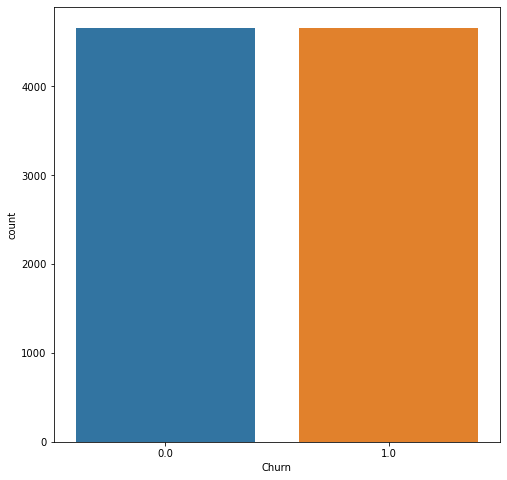

In [358]:
plt.figure(figsize=(8,8))
sns.countplot(y)

Now Lets Whether Multicollinearity is present in the dataset or not 

WE CHECK MULTICOLLINEARITY BY VARIANCE INFLATION FACTOR (VIF)

In [359]:
def vif_cal():
    vif=pd.DataFrame()
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["FEATURES"]=x.columns
    print (vif)

In [1]:
vif_cal()

NameError: name 'vif_cal' is not defined

In [409]:
#Removing other most multi corelated column

Tele.drop('TotalCharges',axis=1,inplace=True)

#No Multicollinearity is present in the dataset...Here we can observe all the columns have VIF less than 10 which means we are free from multicollinearity problem. Let's move to buliding machine learning models...

Now Lets Train and Test the model using Regression Models

In [410]:
# to predict best random state value
maxAcc =0
maxRS=0

for i in range(1,6361):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best accuracy is',maxAcc,'on Random_State',maxRS)

Best accuracy is 0.8123324396782842 on Random_State 4718


In [411]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4718)

In [412]:
x_train

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
4717 -1.007416      -0.441591 -0.972245   -0.653600  0.754718           0.0   
3288  0.992638       2.264538  1.028548    1.529987 -0.261824           0.0   
295  -1.007416      -0.441591 -0.972245   -0.653600 -1.034396           0.0   
7933 -1.007416      -0.441591 -0.972245   -0.653600 -0.876178           0.0   
7904  0.992638      -0.441591 -0.972245   -0.653600 -1.278366           0.0   
...        ...            ...       ...         ...       ...           ...   
3395 -1.007416       2.264538 -0.972245   -0.653600  1.608613           0.0   
1773  0.992638      -0.441591 -0.972245   -0.653600 -1.278366           0.0   
8841  0.992638      -0.441591  1.028548    1.529987 -0.152114           0.0   
8325 -1.007416      -0.441591 -0.972245   -0.653600 -1.215524           0.0   
2600  0.992638       2.264538  1.028548   -0.653600  1.120673           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
4717       1.068190         0.046790       -0.929747      1.252556   
3288       1.068190         0.046790       -0.929747      1.252556   
295        1.068190         0.046790       -0.929747     -1.052857   
7933      -0.380490         0.046790        1.436848     -1.052857   
7904       0.314496        -1.350531       -0.929747     -1.052857   
...             ...              ...             ...           ...   
3395       1.068190         0.046790       -0.929747      1.252556   
1773       1.068190        -1.350531       -0.929747     -1.052857   
8841      -0.936163         0.046790        1.436848     -1.052857   
8325      -0.936163        -1.350531       -0.929747      1.252556   
2600       1.068190         0.046790       -0.929747     -1.052857   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
4717          1.262811     1.427259     1.145381         1.141072  0.370335   
3288          1.262811    -0.935165     1.145381         1.141072 -0.828495   
295          -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
7933         -1.044785     1.427259     1.145381         1.141072 -0.828495   
7904          1.262811     0.538921    -1.148627        -1.152974 -0.828495   
...                ...          ...          ...              ...       ...   
3395          1.262811     1.427259     1.145381         1.141072  1.569166   
1773         -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
8841         -1.044785    -0.816303     1.145381         1.141072 -0.828495   
8325         -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
2600         -1.044785     1.427259     1.145381         1.141072 -0.828495   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
4717          0.825243       0.399691        1.455009      1.434082  
3288         -1.211765       0.399691        1.266157      0.148032  
295           0.825243       0.399691        0.218442     -0.796846  
7933          0.825243      -1.471812        1.081697     -0.567465  
7904         -1.211765       1.335443       -0.306818     -0.991663  
...                ...            ...             ...           ...  
3395          0.825243      -1.471812        1.343340      2.323875  
1773          0.825243      -0.536060       -0.571449     -0.995125  
8841         -1.109276      -0.488979        0.910185      0.114907  
8325          0.269668      -0.536060       -0.581302     -0.970324  
2600          0.825243       0.399691        1.044462      1.569282  

[6526 rows x 19 columns]

In [413]:
x_test

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
6203 -1.007416      -0.441591 -0.972245   -0.653600  0.185455           0.0   
5476 -1.007416      -0.441591  1.028548    1.529987  1.527290           0.0   
2888  0.992638      -0.441591  1.028548   -0.653600  0.795380           0.0   
5767  0.992638       2.264538 -0.972245   -0.653600 -1.237704           0.0   
3218 -1.007416      -0.441591 -0.972245   -0.653600 -1.278366           0.0   
...        ...            ...       ...         ...       ...           ...   
7795 -0.690490      -0.441591 -0.972245    1.183978  0.602955           0.0   
6788  0.992638      -0.441591 -0.972245   -0.653600 -1.206073           0.0   
6236  0.992638      -0.441591  1.028548    1.529987 -0.424470           0.0   
1839 -1.007416      -0.441591 -0.972245   -0.653600 -0.912411           0.0   
2952 -1.007416      -0.441591  1.028548    1.529987  0.144793           0.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
6203       1.068190          0.04679       -0.929747      1.252556   
5476       1.068190          0.04679        1.436848      1.252556   
2888      -0.936163          0.04679        1.436848     -1.052857   
5767       1.068190          0.04679       -0.929747     -1.052857   
3218       1.068190          0.04679       -0.929747      1.252556   
...             ...              ...             ...           ...   
7795      -0.936163          0.04679        1.436848      1.252556   
6788      -0.936163          1.44411        0.253551      0.099849   
6236      -0.936163          0.04679       -0.929747      1.252556   
1839       1.068190          0.04679       -0.929747     -1.052857   
2952       1.068190          0.04679        1.436848     -1.052857   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
6203          1.262811    -0.935165     1.145381         1.141072 -0.828495   
5476          1.262811     1.427259     1.145381         1.141072  1.569166   
2888         -1.044785    -0.935165     1.145381        -1.152974 -0.828495   
5767         -1.044785    -0.935165     1.145381         1.141072 -0.828495   
3218         -1.044785    -0.935165    -1.148627        -1.152974 -0.828495   
...                ...          ...          ...              ...       ...   
7795         -1.044785     1.427259     1.145381         1.141072  0.370335   
6788          0.109013     0.246047    -0.001623        -0.005951 -0.828495   
6236          1.262811    -0.935165     1.145381         1.141072  0.370335   
1839         -1.044785    -0.935165    -1.148627         1.141072 -0.828495   
2952          1.262811    -0.935165     1.145381         1.141072 -0.828495   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
6203          0.825243      -1.471812        1.139709      0.506863  
5476          0.825243      -1.471812        1.543687      2.302326  
2888         -1.211765       0.399691        0.555091      0.852029  
5767          0.825243       0.399691        0.880243     -0.938449  
3218          0.825243       1.335443        0.392514     -0.982514  
...                ...            ...             ...           ...  
7795          0.825243      -1.323533        1.249134      1.111656  
6788         -1.211765       0.399691       -1.544780     -0.996011  
6236          0.825243       1.335443        1.078948     -0.118373  
1839         -1.211765       0.399691        0.632273     -0.659519  
2952          0.825243      -0.536060        1.225103      0.566847  

[2798 rows x 19 columns]

In [414]:
y_train

4717    0.0
3288    1.0
295     1.0
7933    1.0
7904    1.0
       ... 
3395    0.0
1773    0.0
8841    1.0
8325    1.0
2600    0.0
Name: Churn, Length: 6526, dtype: float64

In [415]:
y_test

6203    1.0
5476    1.0
2888    1.0
5767    1.0
3218    0.0
       ... 
7795    1.0
6788    1.0
6236    0.0
1839    1.0
2952    0.0
Name: Churn, Length: 2798, dtype: float64

In [416]:
print('shape of x_train:',x_train.shape)
print('shape of y_train:',x_train.shape)
print('shape of x_test:',x_test.shape)
print('shape of y_test:',y_test.shape)

shape of x_train: (6526, 19)
shape of y_train: (6526, 19)
shape of x_test: (2798, 19)
shape of y_test: (2798,)


CROSS VALIDATION FOR LOGISTICS REGRESSION,ENSEMBLE TECHNIQUE(GradientBoostingClassifier,RandomForestClassifier)

In [417]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
gb = GradientBoostingClassifier()
RF = RandomForestClassifier()
ada = AdaBoostClassifier()

model=[lg,gnb,svc,dtc,knn,RF,gb,ada]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    print(confusion_matrix(y_test, predm))
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy_score: LogisticRegression() is
[[1079  301]
 [ 254 1164]]
0.8016440314510365
              precision    recall  f1-score   support

         0.0       0.81      0.78      0.80      1380
         1.0       0.79      0.82      0.81      1418

    accuracy                           0.80      2798
   macro avg       0.80      0.80      0.80      2798
weighted avg       0.80      0.80      0.80      2798



Accuracy_score: GaussianNB() is
[[1054  326]
 [ 275 1143]]
0.7852037169406719
              precision    recall  f1-score   support

         0.0       0.79      0.76      0.78      1380
         1.0       0.78      0.81      0.79      1418

    accuracy                           0.79      2798
   macro avg       0.79      0.78      0.78      2798
weighted avg       0.79      0.79      0.79      2798



Accuracy_score: SVC() is
[[1107  273]
 [ 236 1182]]
0.818084345961401
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1380

In [418]:
#cross validation to check the accuracy score
print('cross validation score of random forest model = ', cross_val_score(RF,x,y,cv=None).mean())
print('cross validation score of logistic regression model = ', cross_val_score(lg,x,y,cv=None).mean())
print('cross validation score of decison tree model = ', cross_val_score(dtc,x,y,cv=None).mean())
print('cross validation score of  KNeighborsClassifier model = ', cross_val_score(knn,x,y,cv=None).mean())
print('cross validation score of standard vector machine model = ', cross_val_score(svc,x,y,cv=None).mean())
print('cross validation score of GaussianNB model = ', cross_val_score(gnb,x,y,cv=None).mean())
print('cross validation score of GradientBoostingClassifier model = ',cross_val_score(gb,x,y,cv=None).mean())
print('cross validation score of AdaBoostingClassifier model = ',cross_val_score(ada,x,y,cv=None).mean())

cross validation score of random forest model =  0.8485689629382458
cross validation score of logistic regression model =  0.7790663797765478
cross validation score of decison tree model =  0.7872211738715208
cross validation score of  KNeighborsClassifier model =  0.7909711307229401
cross validation score of standard vector machine model =  0.8064172870473714
cross validation score of GaussianNB model =  0.7687699202614229
cross validation score of GradientBoostingClassifier model =  0.8324815611731811
cross validation score of AdaBoostingClassifier model =  0.811137339055794


In [419]:
# hyperparameter tuning with RandomForestClassifier, parameters of RandomForestClassifier
parameters ={'n_estimators':[200], 'criterion':['gini'], 
             'min_samples_split':[5], 'min_samples_leaf':[2], 
              'bootstrap':[True],'n_jobs':[-1], 'random_state':[34]}

In [420]:
# hyperparameter tuning with gridsearchCV
gcv = GridSearchCV(RandomForestClassifier(random_state=35), parameters, verbose=1, cv=10, n_jobs=-1)

In [421]:
#training the model
gcv.fit(x_train,y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=35),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini'],
                         'min_samples_leaf': [2], 'min_samples_split': [5],
                         'n_estimators': [200], 'n_jobs': [-1],
                         'random_state': [34]},
             verbose=1)

In [436]:
#finding out which parameter is giving best accuracy
gcv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200,
 'n_jobs': -1,
 'random_state': 34}

In [437]:
type(gcv)

sklearn.model_selection._search.GridSearchCV

In [438]:
# finding best estimator
gcv.best_estimator_

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=34)

In [439]:
# Applying the parameters to the final model
pred = gcv.best_estimator_.predict(x_test)
acc =accuracy_score(y_test,pred)
print(acc*100)

85.34667619728378


ROC AUC Scores

save the final model

In [440]:
#saving the model
import joblib
joblib.dump(gcv,'Tele Churn.pkl')

['Tele Churn.pkl']

In [441]:
#Loading the saved model
TC=joblib.load('Tele Churn.pkl')

Prediction

In [442]:
prediction = TC.predict(x_test)
prediction

array([1., 0., 0., ..., 0., 1., 1.])

In [443]:
pd.DataFrame([TC.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     ...  \
Predicted   1.0   0.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0  ...   
Original    1.0   1.0   1.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0  ...   

           2788  2789  2790  2791  2792  2793  2794  2795  2796  2797  
Predicted   0.0   0.0   1.0   0.0   0.0   1.0   0.0   0.0   1.0   1.0  
Original    0.0   0.0   1.0   0.0   0.0   1.0   1.0   0.0   1.0   0.0  

[2 rows x 2798 columns]

<AxesSubplot:xlabel='Churn', ylabel='Density'>

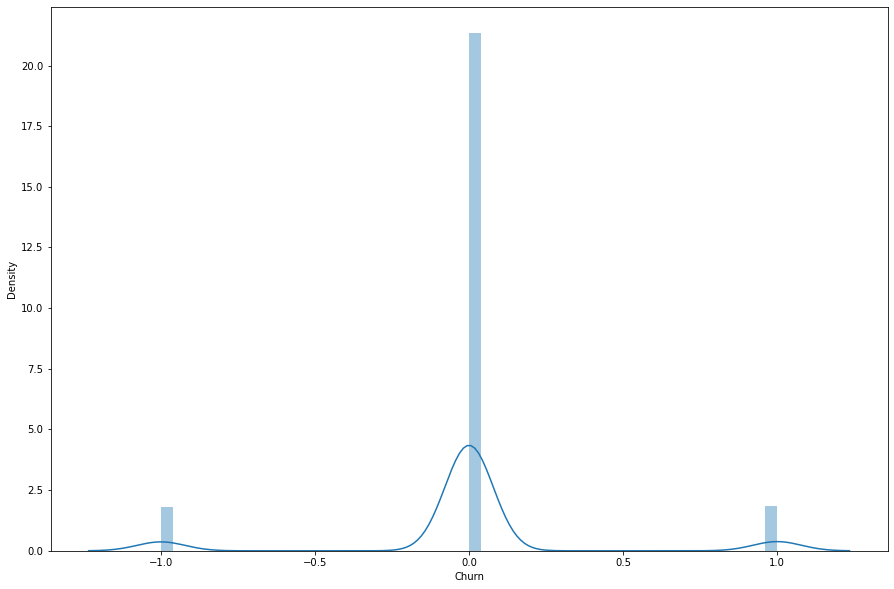

In [444]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

In [446]:
import pickle
filename = 'Tele Churn.pkl'
pickle.dump(gcv,open(filename, 'wb'))

In [447]:
loaded_model = pickle.load(open(filename, 'rb'))
predicted = loaded_model.score(x_test,y_test)*100
print(predicted)

85.34667619728378


<AxesSubplot:xlabel='Churn', ylabel='Density'>

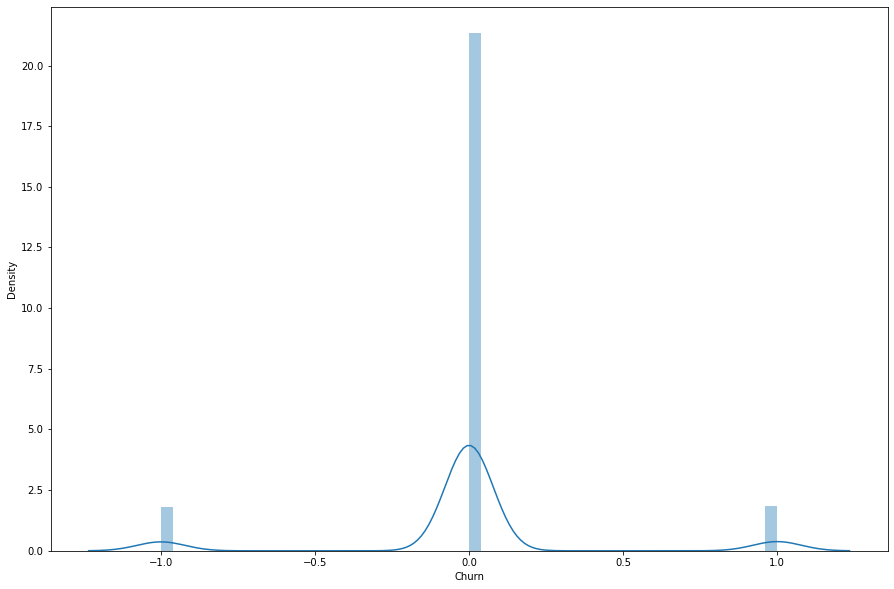

In [448]:
plt.figure(figsize=(15,10))
sns.distplot(y_test-prediction)

Text(0.5, 1.0, 'AUC ROC plot')

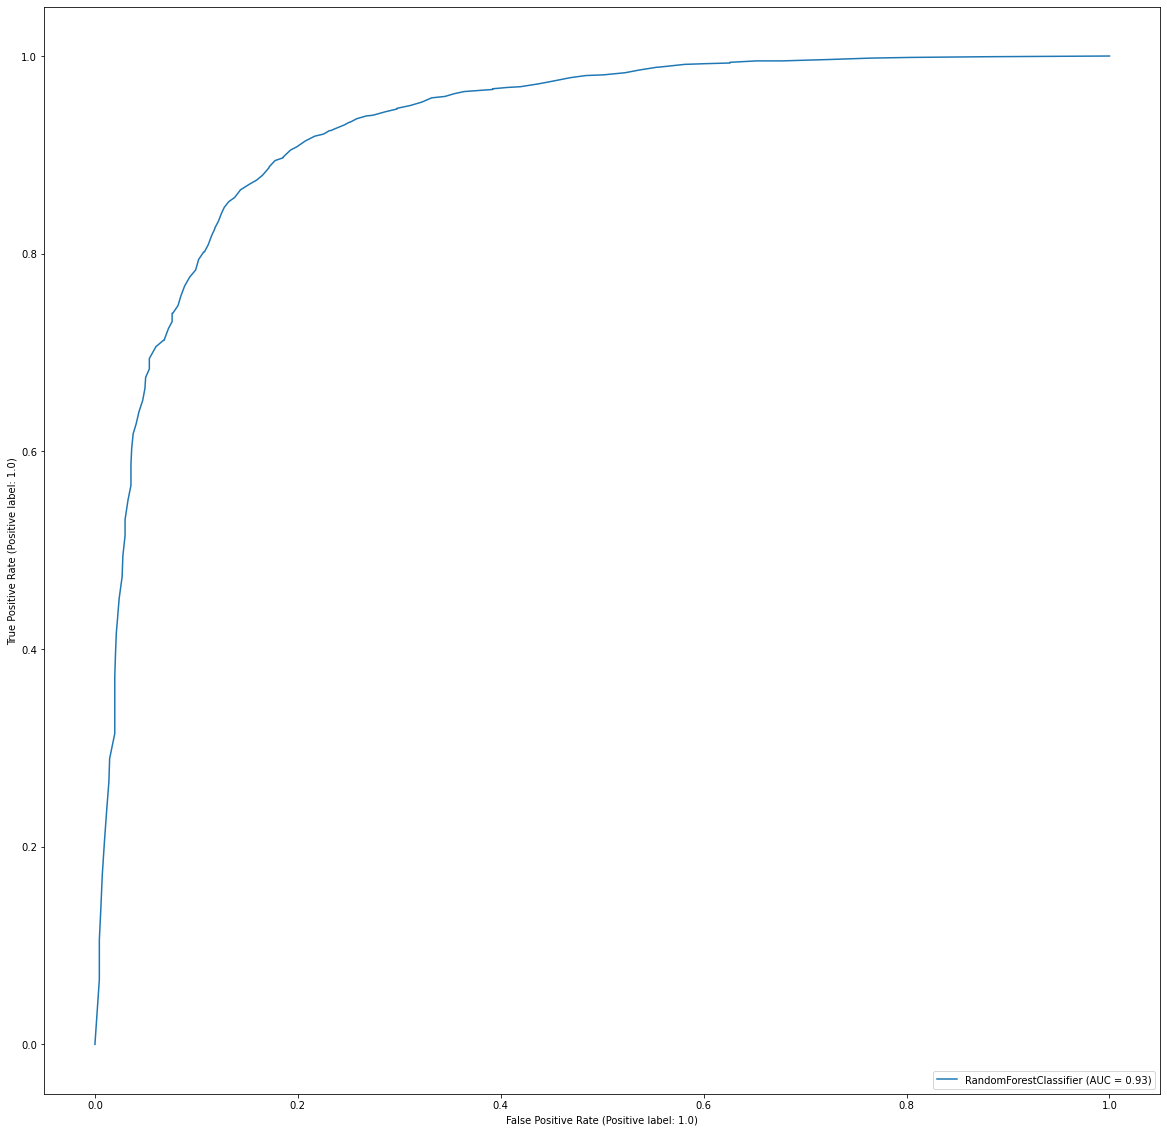

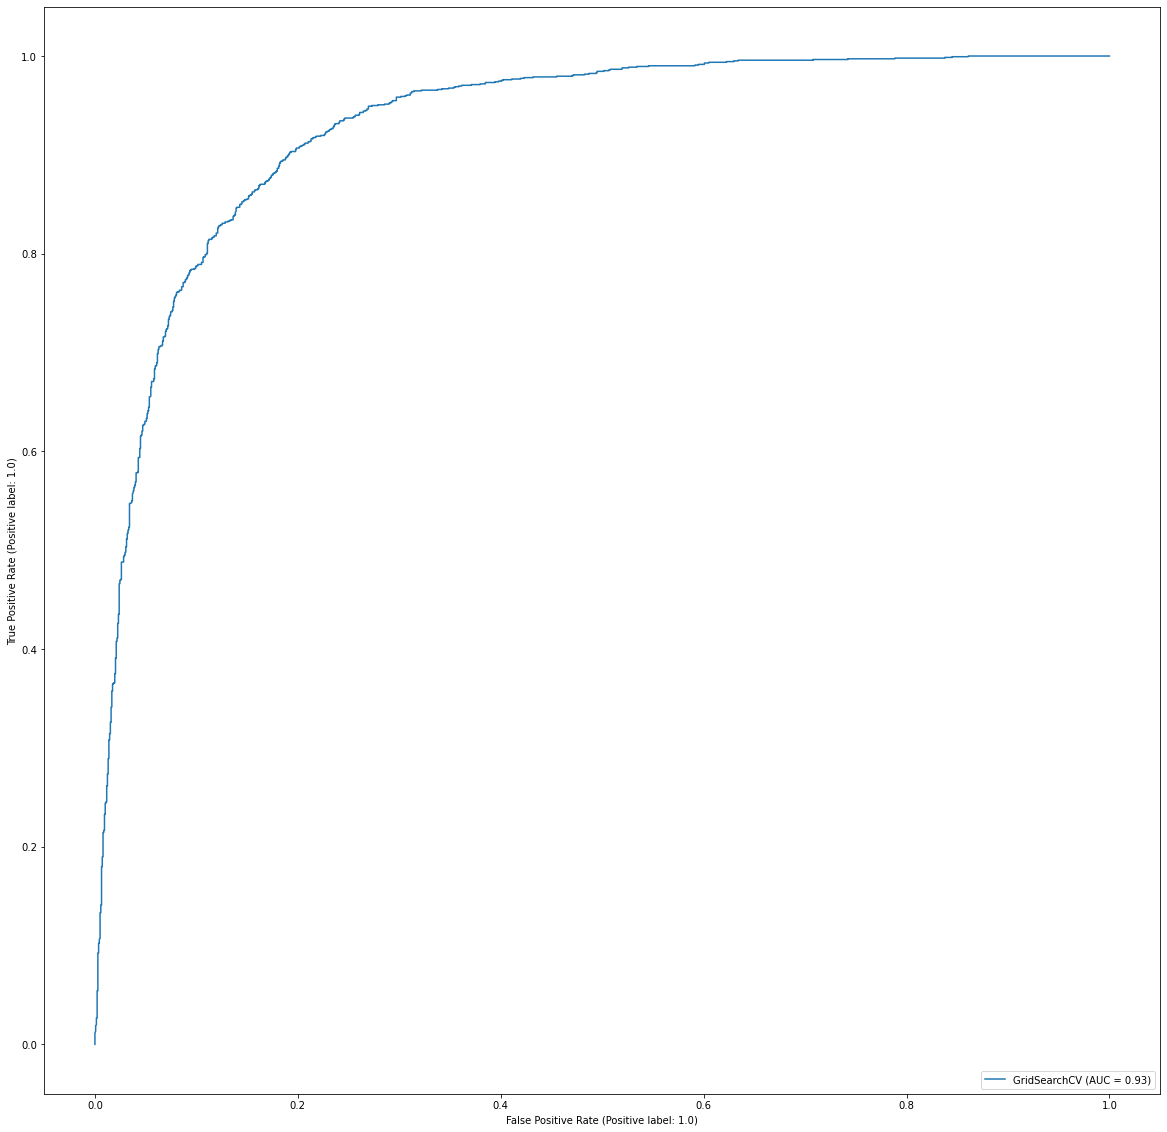

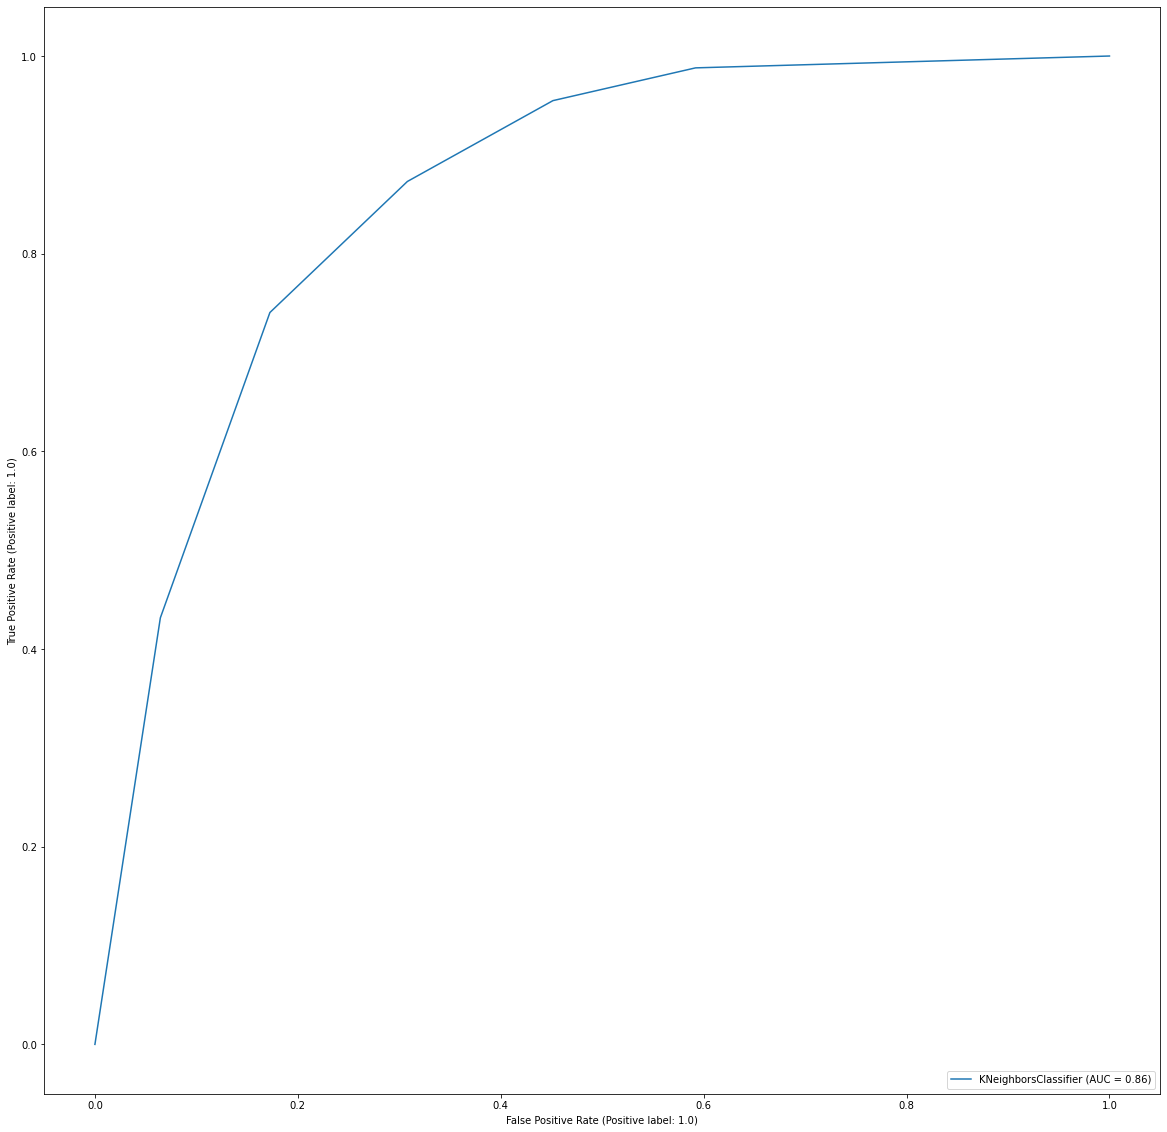

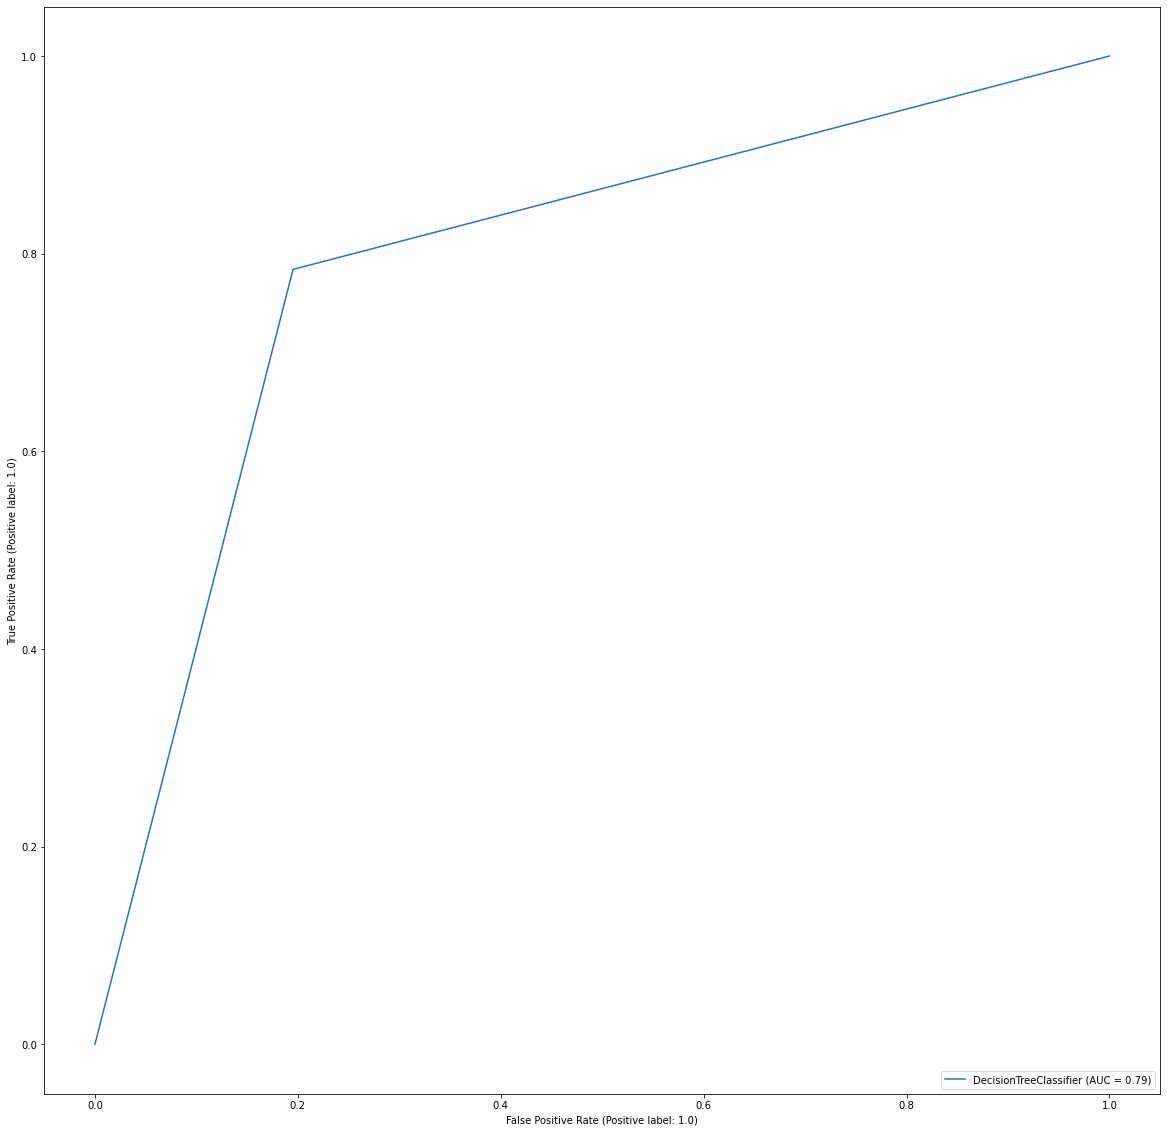

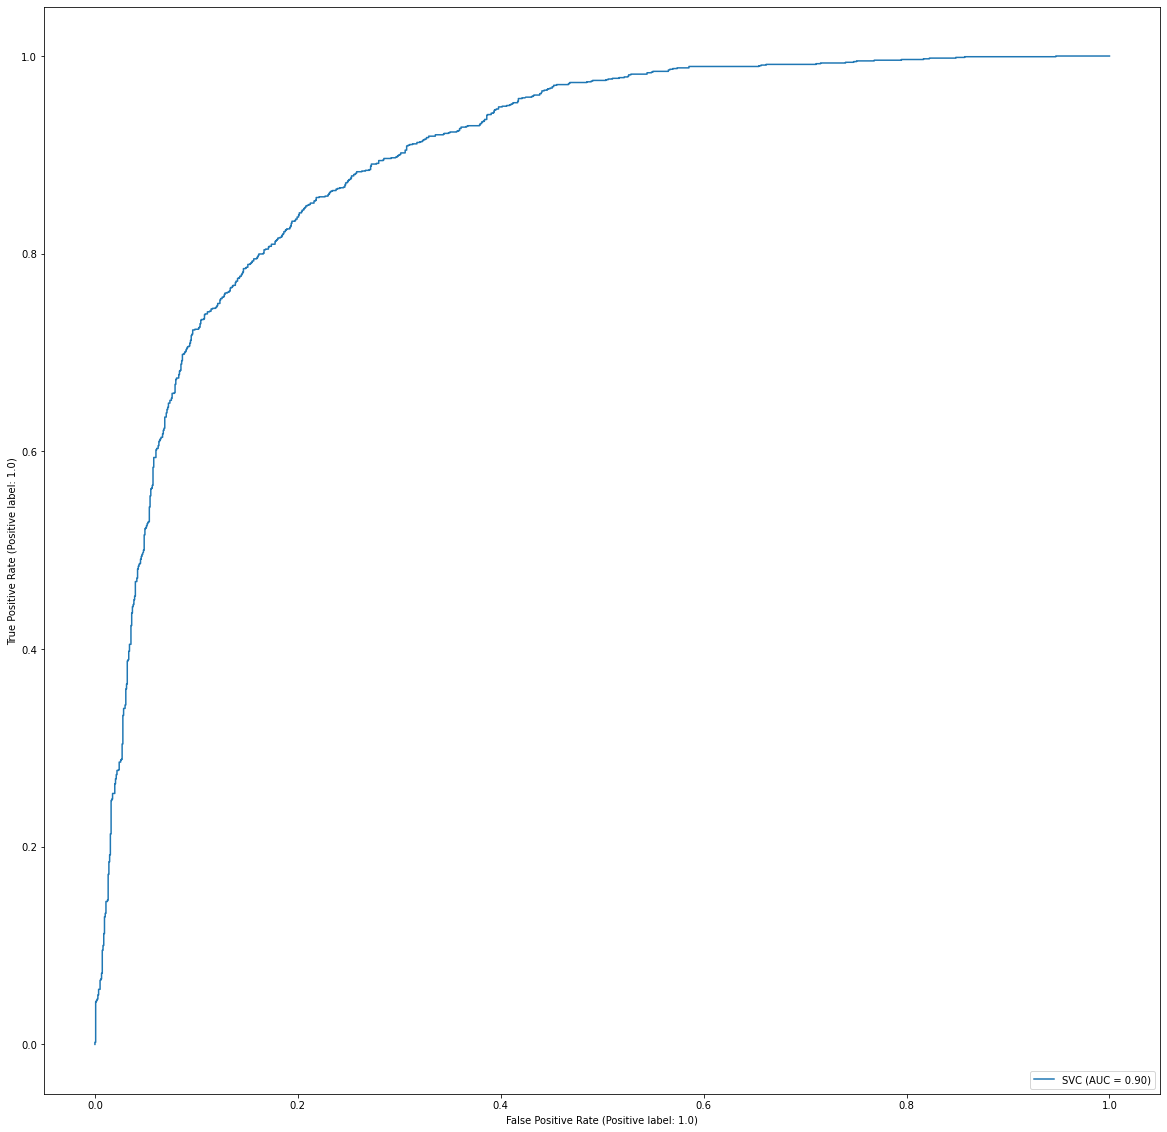

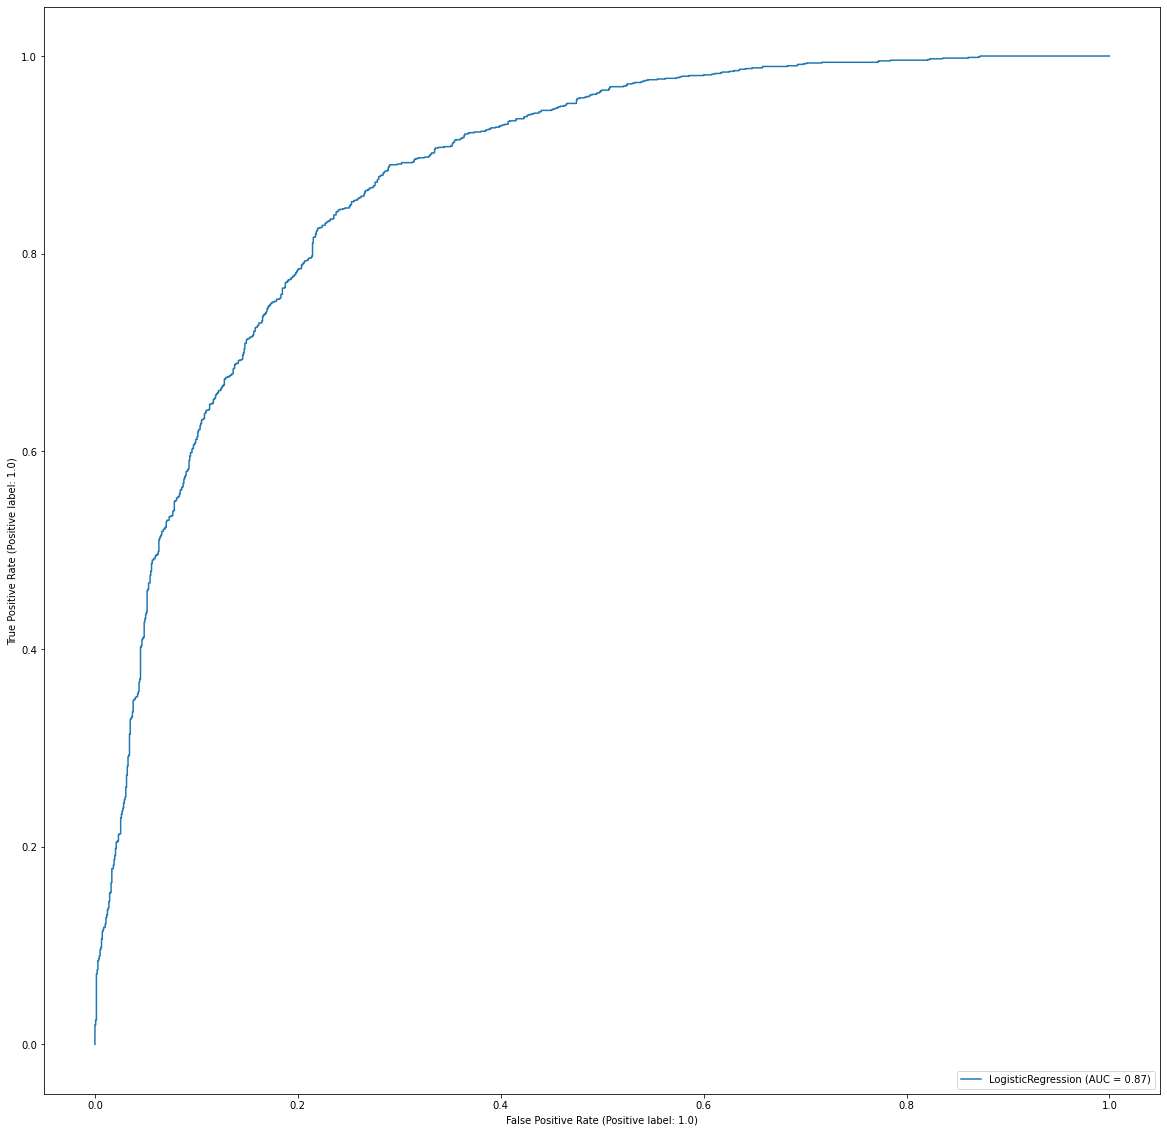

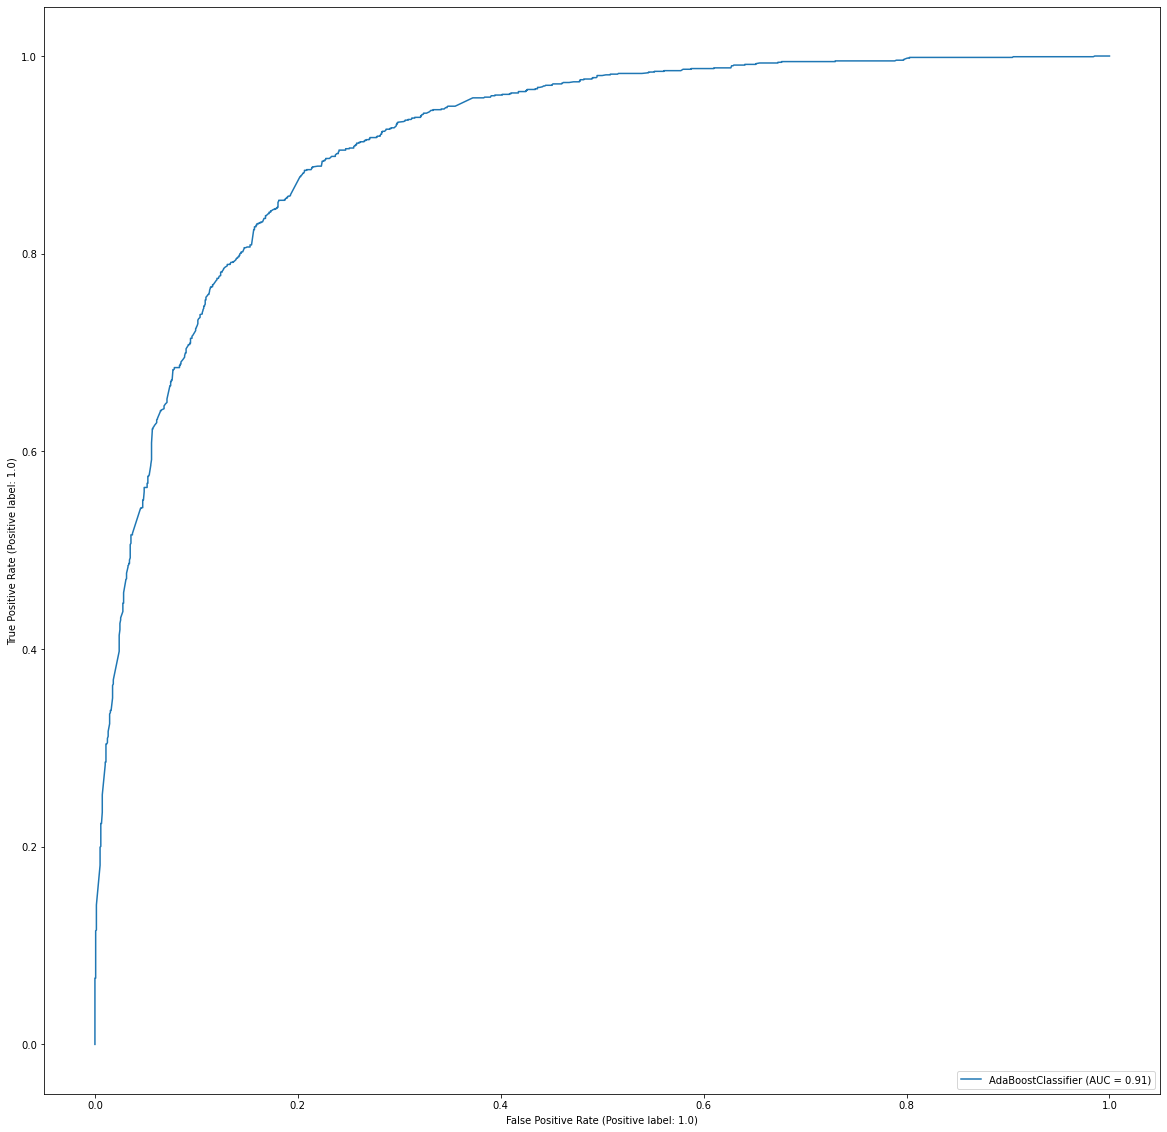

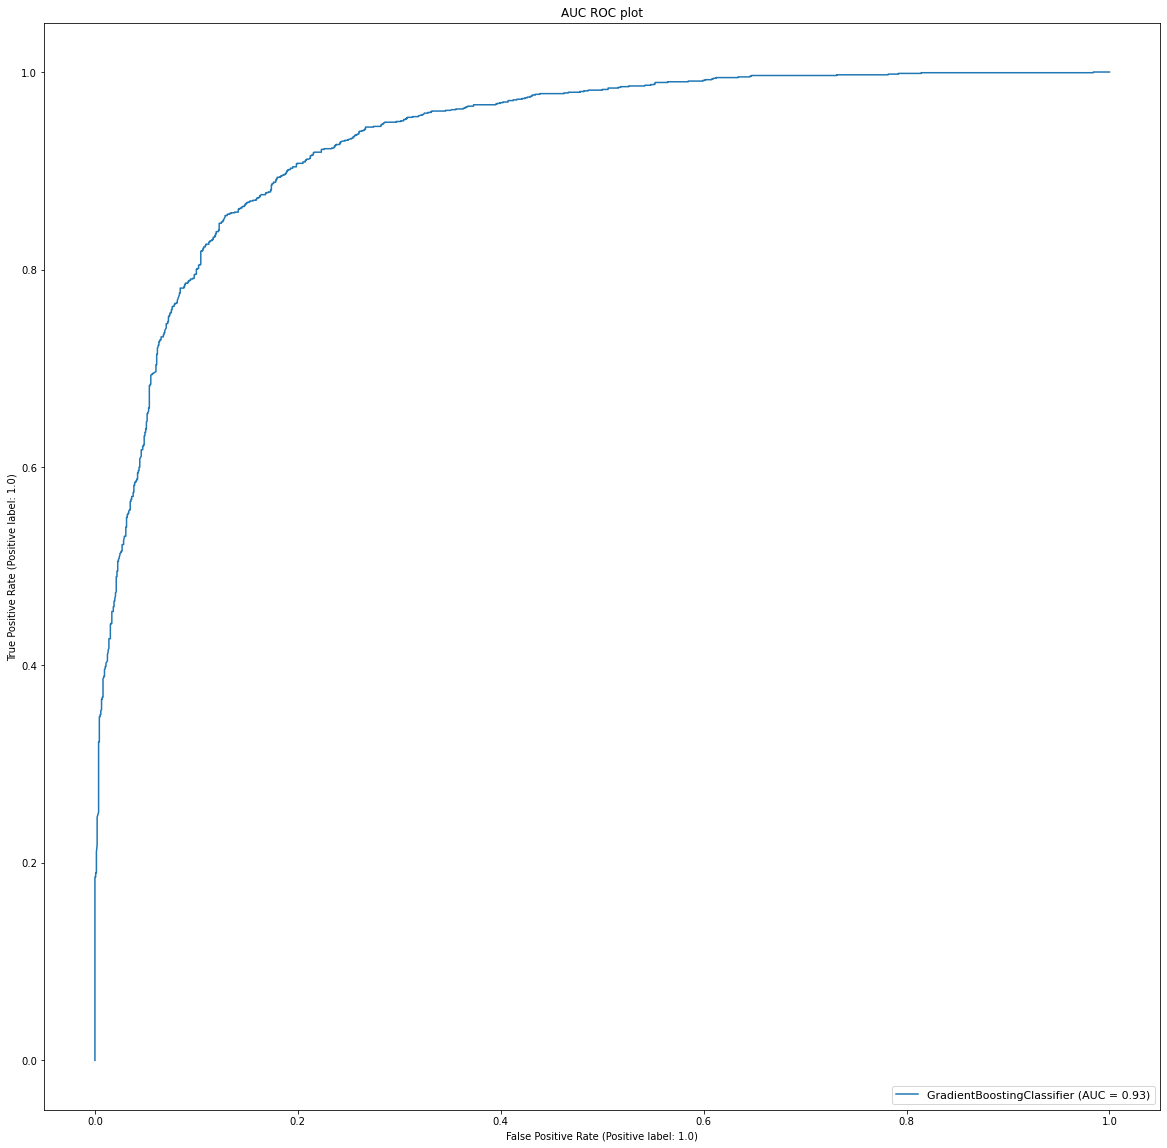

In [449]:
from sklearn.metrics import RocCurveDisplay

svc_disp=  RocCurveDisplay.from_estimator(RF, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gcv, x_test,y_test)
svc_disp = RocCurveDisplay.from_estimator(knn, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(dtc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(svc, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(lg, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(ada, x_test, y_test)
svc_disp = RocCurveDisplay.from_estimator(gb, x_test, y_test)
#svc_disp = RocCurveDisplay.from_estimator(RF, x_test, y_test)
#rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=svc_disp.ax_)
plt.legend(prop={'size':11}, loc='lower right')
plt.title("AUC ROC plot")


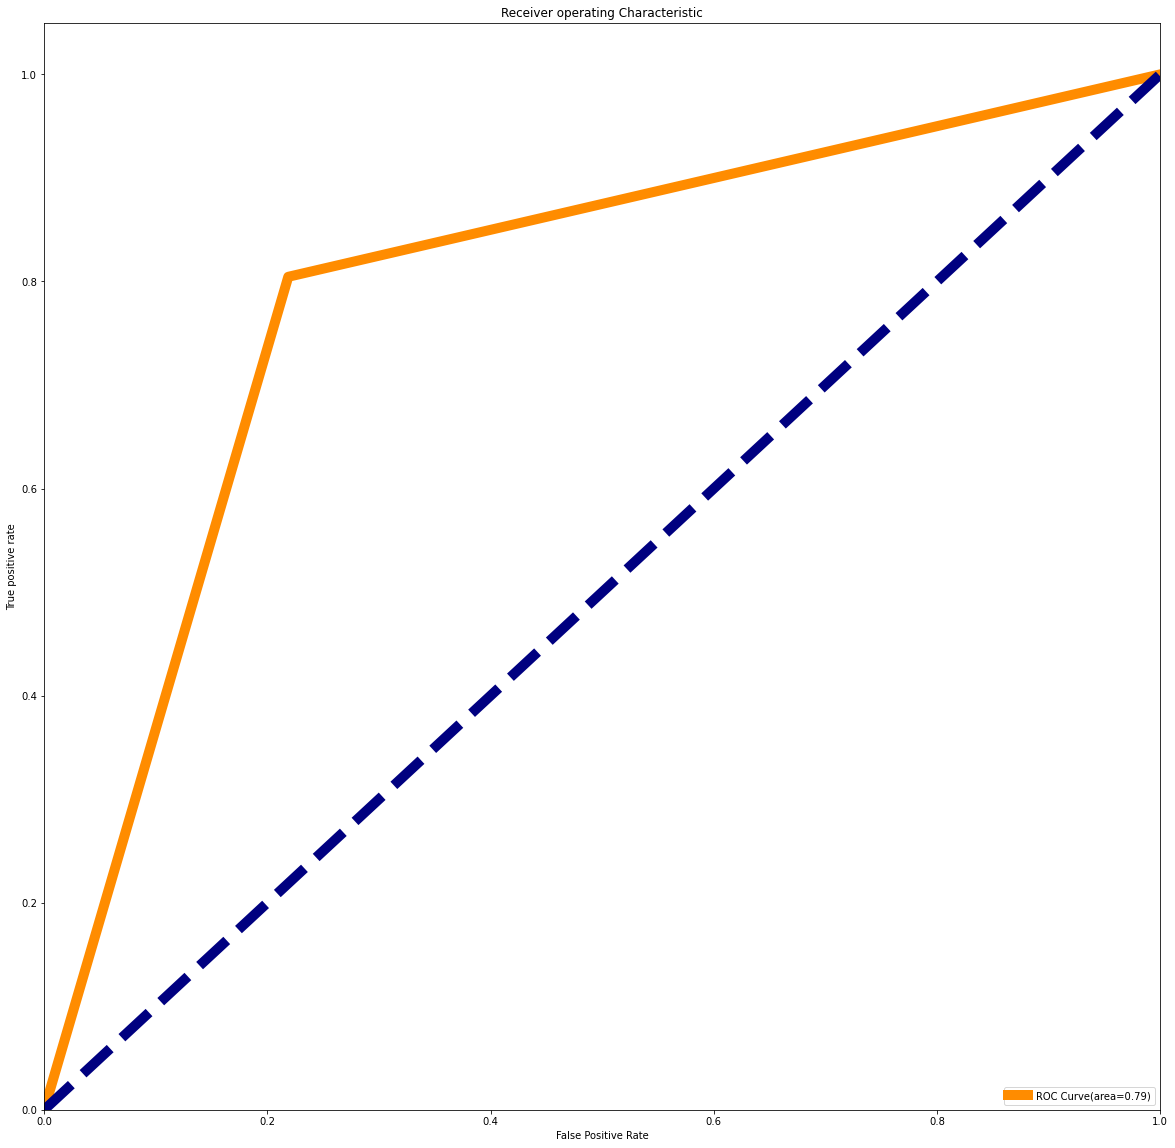

In [450]:
gsv=GridSearchCV
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_pred,y_test)
roc_auc=auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color='darkorange',lw=10,label='ROC Curve(area=%0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating Characteristic')
plt.legend(loc="lower right")
plt.show()